# Data collection block

In [1]:
import pandas as pd

Read the filtered data

In [464]:
full_df = pd.read_csv('filtered3_ORR_-OER.csv')
full_df.keys()
full_df = full_df.drop(['Unnamed: 0'], axis=1)
full_df = full_df.sort_values(by=['Publication Year'])
full_df = full_df.reset_index()
full_df = full_df.drop(['index'], axis=1)
#full_df = full_df.head()


/home/james/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (3,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Use the FumesAI for the Llama3 queries

In [58]:
import requests
import time

df_with_responses = pd.DataFrame()

total = len(full_df['Abstract'])
total_time = 0

for index, row in full_df.iterrows():
    start_time = time.time()
    print(index, 'of', total, 'remaining estimated time', (total-index)*(total_time/(index+1)))
    payload = { 
        'prompt': """{
        'systemPrompt': 'RolePlay as a bot seeking for catalysts', 
        'user': "For the text I will input next, output only the catalyst materials used for the oxygen reduction reaction. Do not output precursors, electrolytes, and other kinds of materials, only the catalyst. The output must be only the catalyst material names separated by semicolons. Do not repeat the material name more than once. If no catalyst was found, output 'None'",
        'Assistant': 'Hello, I will tell the catalysts of any text you input next',
        'user_text':""" + row['Abstract'] + "}",
        "temperature":0.75,
        "topP":0.9,
        "maxTokens": 1000
    }
    #print(payload)
    response = requests.post('https://fumes-api.onrender.com/llama3', json=payload, stream=True)
    filtered_response = response.text.replace(' YOU CAN BUY ME COFFE! https://buymeacoffee.com/mygx', '')
    print(filtered_response)
    row['response'] = filtered_response
    df_with_responses = df_with_responses.append(row)
    time.sleep(2.5)
    total_time = total_time + time.time() - start_time
    print('Time for this loop:', time.time() - start_time, 'average loop time:', (total_time/(index+1)))
    #for chunk in response.iter_content(chunk_size=1024):  
    #    if chunk:
    #        print(chunk.decode('utf-8'))

0 of 20237 remaining estimated time 0.0
Pt;Cu  
  

Time for this loop: 3.538191318511963 average loop time: 3.5381834506988525
1 of 20237 remaining estimated time 35799.34015417099
None  
  

Time for this loop: 3.543487787246704 average loop time: 3.5408324003219604
2 of 20237 remaining estimated time 47765.82908034325
None  
  

Time for this loop: 3.3702926635742188 average loop time: 3.4839839140574136
3 of 20237 remaining estimated time 52871.19788777828
noble-metal  
  

Time for this loop: 4.112133026123047 average loop time: 3.641019821166992
4 of 20237 remaining estimated time 58935.0032333374
Sr0.15La0.85MnO3  
  

Time for this loop: 3.6844801902770996 average loop time: 3.649710845947266
5 of 20237 remaining estimated time 61534.1248626709
Sr0.15La0.85MnO3  
  

Time for this loop: 4.1350743770599365 average loop time: 3.7306037743886313
6 of 20237 remaining estimated time 64691.867108276914
Gold  
  

Time for this loop: 3.389498710632324 average loop time: 3.681873457772

Pt  
  

Time for this loop: 3.268073558807373 average loop time: 3.666667452564946
54 of 20237 remaining estimated time 72658.81557338889
None  
  

Time for this loop: 3.310805320739746 average loop time: 3.660197132283991
55 of 20237 remaining estimated time 72550.98962154558
Pt; Pt-WO3  
  

Time for this loop: 4.885826826095581 average loop time: 3.682083261864526
56 of 20237 remaining estimated time 73004.47103913207
Pt  
  

Time for this loop: 3.3919546604156494 average loop time: 3.6769931400031375
57 of 20237 remaining estimated time 72922.38153827601
Copper  
  

Time for this loop: 3.3641390800476074 average loop time: 3.671598972945378
58 of 20237 remaining estimated time 72833.44659582639
None  
  

Time for this loop: 3.849320411682129 average loop time: 3.6746111158597268
59 of 20237 remaining estimated time 72910.53137755394
Pt/C; Pt  
  

Time for this loop: 3.535689115524292 average loop time: 3.672295618057251
60 of 20237 remaining estimated time 72881.22165790934
c

Pt(111)  
  

Time for this loop: 3.566666841506958 average loop time: 3.595499142733487
110 of 20237 remaining estimated time 71714.65979313206
Platinum;  
  

Time for this loop: 3.354391098022461 average loop time: 3.593326948784493
111 of 20237 remaining estimated time 71673.59015185067
None  
  

Time for this loop: 3.34641695022583 average loop time: 3.5911223398787633
112 of 20237 remaining estimated time 71631.76773528082
Ru-x(CO)(n)  
  

Time for this loop: 4.8405327796936035 average loop time: 3.6021790209069717
113 of 20237 remaining estimated time 71854.37122535706
None  
  

Time for this loop: 3.3755910396575928 average loop time: 3.6001913422032406
114 of 20237 remaining estimated time 71816.67950629359
None  
  

Time for this loop: 3.392298698425293 average loop time: 3.5983835220336915
115 of 20237 remaining estimated time 71782.4777714795
La0.6Ca0.4CoO3  
  

Time for this loop: 3.87430739402771 average loop time: 3.6007621164979606
116 of 20237 remaining estimated 

Pt; Pt/C  
  

Time for this loop: 3.440394163131714 average loop time: 3.596026208183982
165 of 20237 remaining estimated time 71744.62215879739
Laccase  
  

Time for this loop: 3.793605089187622 average loop time: 3.5972164122455093
166 of 20237 remaining estimated time 71767.396893951
Pt; Pt/C  
  

Time for this loop: 3.6356089115142822 average loop time: 3.5974462746146196
167 of 20237 remaining estimated time 71770.98038192307
Ni0.3Co2.7O4  
  

Time for this loop: 3.7947773933410645 average loop time: 3.598620826289767
168 of 20237 remaining estimated time 71793.37981628384
None  
  

Time for this loop: 3.759540319442749 average loop time: 3.5995729674954386
169 of 20237 remaining estimated time 71811.31130986495
Pt/C; Pt-Ni; Pt-Cr; Pt-Rh; Pt-Sn; Pt  
  

Time for this loop: 3.843747854232788 average loop time: 3.601009187978857
170 of 20237 remaining estimated time 71838.86978818242
Cu1.4Mn1.6O4  
  

Time for this loop: 3.546201229095459 average loop time: 3.600688626194558


Time for this loop: 3.430162191390991 average loop time: 3.583309531211853
218 of 20237 remaining estimated time 71406.71974503178
Pt/C; Pt:Ru/C; Pt:Mo/C; Pt:Ru:Mo/C  
  

Time for this loop: 3.7179152965545654 average loop time: 3.5839241323950084
219 of 20237 remaining estimated time 71416.88876736381
Rh(111)  
  

Time for this loop: 3.4650967121124268 average loop time: 3.5833839774131775
220 of 20237 remaining estimated time 71404.03328820592
PANI  
  

Time for this loop: 3.263143539428711 average loop time: 3.581934897608347
221 of 20237 remaining estimated time 71373.0539154362
Ni0.3Co2.7O4; NiCo3O4  
  

Time for this loop: 3.6114513874053955 average loop time: 3.5820678257727407
222 of 20237 remaining estimated time 71373.58489816499
None  
  

Time for this loop: 3.442660331726074 average loop time: 3.58144265546927
223 of 20237 remaining estimated time 71358.9978007291
None  
  

Time for this loop: 3.3513505458831787 average loop time: 3.5804154287491525
224 of 20237 remai

Pt; PtCo; PtFe  
  

Time for this loop: 3.591878652572632 average loop time: 3.5698119275299183
273 of 20237 remaining estimated time 71007.62413390362
None  
  

Time for this loop: 3.30230450630188 average loop time: 3.5688355952283763
274 of 20237 remaining estimated time 70985.59347849846
Pt; Pt + Ru  
  

Time for this loop: 3.516195058822632 average loop time: 3.5686441525545987
275 of 20237 remaining estimated time 70979.16850600035
Pt; CNT  
  

Time for this loop: 3.351012945175171 average loop time: 3.5678556146829026
276 of 20237 remaining estimated time 70960.8613545602
Pt  
  

Time for this loop: 3.2975635528564453 average loop time: 3.566879804383977
277 of 20237 remaining estimated time 70938.82405775056
None  
  

Time for this loop: 3.4021482467651367 average loop time: 3.5662872182379526
278 of 20237 remaining estimated time 70924.4028375969
None  
  

Time for this loop: 3.4037442207336426 average loop time: 3.565704597794454
279 of 20237 remaining estimated time 7

Pt;PANI  
  

Time for this loop: 3.370990514755249 average loop time: 3.5584501914861724
328 of 20237 remaining estimated time 70629.84995390217
FePc; FeTsPc; Pt  
  

Time for this loop: 3.81656551361084 average loop time: 3.55923471842131
329 of 20237 remaining estimated time 70642.52585077286
Ag-MnO2; Ag-MnO2/SWNT; Ag-MnO2/AB  
  

Time for this loop: 4.046572685241699 average loop time: 3.5607114575125953
330 of 20237 remaining estimated time 70668.93469774039
Pt-Ag/C; Pt/C; Ag/C  
  

Time for this loop: 3.6794843673706055 average loop time: 3.561070265006443
331 of 20237 remaining estimated time 70673.15064493145
Pb-Ru pyrochlore; platinum  
  

Time for this loop: 3.4780478477478027 average loop time: 3.560820169477578
332 of 20237 remaining estimated time 70665.27824980719
Pt  
  

Time for this loop: 3.319716691970825 average loop time: 3.5600961149633825
333 of 20237 remaining estimated time 70647.99692530833
Pt  
  

Time for this loop: 3.3849973678588867 average loop time:

MnO2; Pt/Ni  
  

Time for this loop: 3.6649529933929443 average loop time: 3.56912197083157
383 of 20237 remaining estimated time 70676.81284949183
None  
  

Time for this loop: 3.3674442768096924 average loop time: 3.568596719453732
384 of 20237 remaining estimated time 70663.33157866217
LaNiO3; La1-xSrxNi1-yFeyO3  
  

Time for this loop: 3.734863042831421 average loop time: 3.569028563932939
385 of 20237 remaining estimated time 70668.79972722987
None  
  

Time for this loop: 3.7147347927093506 average loop time: 3.5694060276209383
386 of 20237 remaining estimated time 70673.18789395622
Ce(dbp)(3)  
  

Time for this loop: 3.624210834503174 average loop time: 3.5695476279394263
387 of 20237 remaining estimated time 70672.90309394142
Platinum  
  

Time for this loop: 3.4782845973968506 average loop time: 3.5693124004246033
388 of 20237 remaining estimated time 70665.15514750346
N-doped carbon nanofiber;carbon nanofiber  
  

Time for this loop: 3.7678728103637695 average loop tim

None  
  

Time for this loop: 3.319460868835449 average loop time: 3.5719389075272687
437 of 20237 remaining estimated time 70562.91915815171
Pt;  
  

Time for this loop: 3.3544838428497314 average loop time: 3.57144241681382
438 of 20237 remaining estimated time 70549.91554395811
Pt-W2C/C; Pt/C  
  

Time for this loop: 3.6117746829986572 average loop time: 3.5715342779094374
439 of 20237 remaining estimated time 70548.53282579183
MnOx; Au  
  

Time for this loop: 3.5689005851745605 average loop time: 3.5715282759883187
440 of 20237 remaining estimated time 70545.21524509281
None  
  

Time for this loop: 3.4284510612487793 average loop time: 3.5712038221813382
441 of 20237 remaining estimated time 70535.60617868933
Ru/Se; Ru/S; RuxSey  
  

Time for this loop: 3.615473985671997 average loop time: 3.571303969594688
442 of 20237 remaining estimated time 70534.3820282891
None  
  

Time for this loop: 3.3805923461914062 average loop time: 3.5708734531703974
443 of 20237 remaining est

FeTMPP; silver; nickel; platinum  
  

Time for this loop: 3.513446092605591 average loop time: 3.5728244010995076
492 of 20237 remaining estimated time 70402.32364595783
Pt; Ebonex  
  

Time for this loop: 3.6420860290527344 average loop time: 3.572964878159653
493 of 20237 remaining estimated time 70401.81568281661
None  
  

Time for this loop: 3.4425463676452637 average loop time: 3.572700862942437
494 of 20237 remaining estimated time 70393.33650447239
Pt;SWCNT  
  

Time for this loop: 3.456623077392578 average loop time: 3.5724663479159577
495 of 20237 remaining estimated time 70385.43783684603
alpha-FePc;beta-FePc  
  

Time for this loop: 3.822556257247925 average loop time: 3.5729705450996274
496 of 20237 remaining estimated time 70392.0919905083
Ru; Ru2Se2O0.5; Ru selenide  
  

Time for this loop: 3.6640825271606445 average loop time: 3.573153855095447
497 of 20237 remaining estimated time 70392.42244677371
Co-Se; Co1-xSe  
  

Time for this loop: 3.4268341064453125 averag

La1-xSrxCo0.2Fe0.8O3-delta  
  

Time for this loop: 5.163328409194946 average loop time: 3.5901575960232526
547 of 20237 remaining estimated time 70561.20634477504
None  
  

Time for this loop: 3.4036641120910645 average loop time: 3.589817269440115
548 of 20237 remaining estimated time 70551.16920850186
Pt-MoOx  
  

Time for this loop: 3.505584239959717 average loop time: 3.589663829091251
549 of 20237 remaining estimated time 70544.8045553901
Pt; Pt-Co; Pt50Co50  
  

Time for this loop: 3.768016815185547 average loop time: 3.5899880955436014
550 of 20237 remaining estimated time 70547.82686085624
MnOx/C; Me-MnOx/C  
  

Time for this loop: 3.706631660461426 average loop time: 3.590199779036257
551 of 20237 remaining estimated time 70548.63539929234
Fe-SOD; MWCNTs  
  

Time for this loop: 3.5570967197418213 average loop time: 3.590139799791834
552 of 20237 remaining estimated time 70544.10466783732
RuNx;Pt  
  

Time for this loop: 3.480210065841675 average loop time: 3.589940999

Fe/N/C  
  

Time for this loop: 3.477644205093384 average loop time: 3.596875349812817
601 of 20237 remaining estimated time 70510.92170385981
ZrOxNy/C  
  

Time for this loop: 3.5686490535736084 average loop time: 3.596828449604123
602 of 20237 remaining estimated time 70506.60600000352
Ln(x)Sr(1-x)CoO(3-delta); Co3O4  
  

Time for this loop: 3.673267364501953 average loop time: 3.5969552001352136
603 of 20237 remaining estimated time 70505.69353455503
None  
  

Time for this loop: 3.4452264308929443 average loop time: 3.5967039694849228
604 of 20237 remaining estimated time 70497.37153036379
Pt/tungsten oxide; Hispec 4000  
  

Time for this loop: 3.727487802505493 average loop time: 3.596920131651823
605 of 20237 remaining estimated time 70498.21005755132
ruthenium selenium  
  

Time for this loop: 3.7384862899780273 average loop time: 3.5971537301249237
606 of 20237 remaining estimated time 70499.38925025688
Pt; Pd; Ir; Ru; Ag  
  

Time for this loop: 4.34343409538269 average

Ru-Se; Ru  
  

Time for this loop: 3.64448618888855 average loop time: 3.6791306968863684
655 of 20237 remaining estimated time 71934.91301175444
Pt  
  

Time for this loop: 3.31845760345459 average loop time: 3.678580880891986
656 of 20237 remaining estimated time 71920.65708075702
carbon nanotube; poly(o-phenylenediamine)-carbon nanotube  
  

Time for this loop: 3.8308839797973633 average loop time: 3.678812685985362
657 of 20237 remaining estimated time 71921.682555132
None  
  

Time for this loop: 3.4399354457855225 average loop time: 3.678449639071085
658 of 20237 remaining estimated time 71911.07813059071
La2NiO4+delta (LNO)  
  

Time for this loop: 4.851029872894287 average loop time: 3.6802289594467927
659 of 20237 remaining estimated time 71942.35359446135
Pt-Cu; Pt3Co  
  

Time for this loop: 3.5546939373016357 average loop time: 3.6800387451142975
660 of 20237 remaining estimated time 71935.12589810547
Pt  
  

Time for this loop: 3.514472246170044 average loop time: 3

None  
  

Time for this loop: 3.421626091003418 average loop time: 3.6836795209159314
710 of 20237 remaining estimated time 71830.0409331885
Fe; gamma iron; cementite  
  

Time for this loop: 3.598710536956787 average loop time: 3.68356000522018
711 of 20237 remaining estimated time 71824.17413290967
Pt3Co; Pt black  
  

Time for this loop: 3.4965639114379883 average loop time: 3.683297362890136
712 of 20237 remaining estimated time 71815.51652093422
Pt-Co/C; Pt/C; Pt-Co  
  

Time for this loop: 3.7510271072387695 average loop time: 3.683392346490483
713 of 20237 remaining estimated time 71813.83151157363
Pt;Pd  
  

Time for this loop: 3.9149324893951416 average loop time: 3.6837166233890866
714 of 20237 remaining estimated time 71816.61614242735
TaOxNy/Ti  
  

Time for this loop: 3.5043163299560547 average loop time: 3.6834657048845623
715 of 20237 remaining estimated time 71808.1864607414
None  
  

Time for this loop: 3.454009771347046 average loop time: 3.683145224715078
716 

GdBa1-xSrxCo2O5+delta  
  

Time for this loop: 5.064645290374756 average loop time: 3.696356923677037
763 of 20237 remaining estimated time 71888.63633544096
ZrO(x)N(y); Zr(2)ON(2)  
  

Time for this loop: 4.041719436645508 average loop time: 3.6968089598011598
764 of 20237 remaining estimated time 71893.8589645685
Pt; Ru; Mo; W; Pd; An  
  

Time for this loop: 3.6961491107940674 average loop time: 3.6968080894619813
765 of 20237 remaining estimated time 71890.27290505591
polycrystalline platinum  
  

Time for this loop: 3.5752785205841064 average loop time: 3.696649425334781
766 of 20237 remaining estimated time 71883.61811719848
Pt  
  

Time for this loop: 3.3503942489624023 average loop time: 3.6961979763448785
767 of 20237 remaining estimated time 71871.2702054251
Pt nanowires; Pt  
  

Time for this loop: 4.8836894035339355 average loop time: 3.69774418293188
768 of 20237 remaining estimated time 71897.76461648972
alumina; nano-carbon  
  

Time for this loop: 3.7514979839324

Time for this loop: 3.72698712348938 average loop time: 3.709593341338868
816 of 20237 remaining estimated time 71955.83111655814
Pt  
  

Time for this loop: 3.3026835918426514 average loop time: 3.7090952804943633
817 of 20237 remaining estimated time 71942.5733418861
Ru;Mo;Rh;Re  
  

Time for this loop: 3.487673044204712 average loop time: 3.7088245841285126
818 of 20237 remaining estimated time 71933.72605877744
Pt; PCoW11O395-  
  

Time for this loop: 3.640437364578247 average loop time: 3.7087410733522224
819 of 20237 remaining estimated time 71928.50936459449
Fe-N/C; Co-N/C; Pt  
  

Time for this loop: 3.5900585651397705 average loop time: 3.7085963295727242
820 of 20237 remaining estimated time 71922.1050471098
Pt; Pt-Fe  
  

Time for this loop: 3.4943251609802246 average loop time: 3.7083353316740344
821 of 20237 remaining estimated time 71913.44629516045
TaC0.58N0.42;  
  

Time for this loop: 3.812303304672241 average loop time: 3.7084618046916025
822 of 20237 remaining 

Pt; Pt3Ni; Pt3Co  
  

Time for this loop: 3.7263660430908203 average loop time: 3.71455504099528
870 of 20237 remaining estimated time 71857.19300423807
Cobalt-porphyrin; polyaniline  
  

Time for this loop: 4.519353628158569 average loop time: 3.7154790260214208
871 of 20237 remaining estimated time 71871.4508009378
Pt;Pt-SiO2;Pt-black  
  

Time for this loop: 3.6638216972351074 average loop time: 3.715419778036415
872 of 20237 remaining estimated time 71866.68807498369
Niobium oxides; Pt  
  

Time for this loop: 3.4789769649505615 average loop time: 3.715148932881918
873 of 20237 remaining estimated time 71857.83255882394
Pt; PtCo; PtNi; PtFe; PtCoFe  
  

Time for this loop: 4.022577285766602 average loop time: 3.715500675840836
874 of 20237 remaining estimated time 71861.01874106462
Pt/CNF  
  

Time for this loop: 3.5182442665100098 average loop time: 3.7152752314976283
875 of 20237 remaining estimated time 71853.04127080474
FeN4  
  

Time for this loop: 3.3423564434051514 av

  
  

Time for this loop: 3.614445447921753 average loop time: 3.7191679020485924
923 of 20237 remaining estimated time 71754.26859083732
Pt/Vulcan XC-72  
  

Time for this loop: 3.630418062210083 average loop time: 3.7190718454716007
924 of 20237 remaining estimated time 71748.7843520778
None  
  

Time for this loop: 3.3125569820404053 average loop time: 3.718632363242072
925 of 20237 remaining estimated time 71736.67503672902
Pt/C; PtRu/C  
  

Time for this loop: 3.5144007205963135 average loop time: 3.7184118032455444
926 of 20237 remaining estimated time 71728.78943675467
Hg; Au  
  

Time for this loop: 3.551023483276367 average loop time: 3.7182312263768598
927 of 20237 remaining estimated time 71721.67532079693
Fe/N/C  
  

Time for this loop: 3.4556517601013184 average loop time: 3.717948268970539
928 of 20237 remaining estimated time 71712.58663133733
Pt  
  

Time for this loop: 3.472013473510742 average loop time: 3.717683532394557
929 of 20237 remaining estimated time 7

Time for this loop: 3.9703285694122314 average loop time: 3.7662937697271
977 of 20237 remaining estimated time 72464.64743438674
Pt;CNx  
  

Time for this loop: 3.378429412841797 average loop time: 3.765897172847896
978 of 20237 remaining estimated time 72453.33049186549
Iron-based catalyst  
  

Time for this loop: 4.968880891799927 average loop time: 3.767125953083993
979 of 20237 remaining estimated time 72473.28373550737
RuxSey  
  

Time for this loop: 3.6826138496398926 average loop time: 3.767039711134774
980 of 20237 remaining estimated time 72467.93684299277
Pt;W18O49  
  

Time for this loop: 3.6076221466064453 average loop time: 3.766877200868395
981 of 20237 remaining estimated time 72461.12283065508
None  
  

Time for this loop: 3.375322103500366 average loop time: 3.7664784615491413
982 of 20237 remaining estimated time 72449.76501235036
PtZn; Pt  
  

Time for this loop: 3.750809907913208 average loop time: 3.766462505530729
983 of 20237 remaining estimated time 72445

Time for this loop: 3.4995779991149902 average loop time: 3.774000212101246
1029 of 20237 remaining estimated time 72420.61646620186
Nitrogen-doped carbon black  
  

Time for this loop: 3.471944570541382 average loop time: 3.773706947715537
1030 of 20237 remaining estimated time 72411.28712426333
PCoTMPP; CoTMPP  
  

Time for this loop: 3.6065304279327393 average loop time: 3.7735447925230927
1031 of 20237 remaining estimated time 72404.47386147255
RuxSey  
  

Time for this loop: 3.4626307487487793 average loop time: 3.7732435157594755
1032 of 20237 remaining estimated time 72394.99153456521
Pt-TiO(2)/C; Pt  
  

Time for this loop: 3.537642240524292 average loop time: 3.7730154356444103
1033 of 20237 remaining estimated time 72386.91396922346
Nb(2)O(5);  
  

Time for this loop: 3.4545986652374268 average loop time: 3.772707484215786
1034 of 20237 remaining estimated time 72377.30442633352
Pt1Co1/C; Pt3Co1/C; Pt1Co3/C  
  

Time for this loop: 3.8115148544311523 average loop time: 

Time for this loop: 4.398337125778198 average loop time: 3.769581681803653
1083 of 20237 remaining estimated time 72135.95999864239
Pt; Pt100-xNix; Pt100-xCox  
  

Time for this loop: 3.791588306427002 average loop time: 3.7696019769594677
1084 of 20237 remaining estimated time 72132.64363552062
Pt; Pt-Pd  
  

Time for this loop: 4.0432727336883545 average loop time: 3.769854203017626
1085 of 20237 remaining estimated time 72133.76496350832
Pd/C; Pt/C  
  

Time for this loop: 3.475689172744751 average loop time: 3.7695833268964707
1086 of 20237 remaining estimated time 72124.87696285761
Pt25Cu75; Pt20Cu20Co60; Pt  
  

Time for this loop: 3.756215810775757 average loop time: 3.769571023351464
1087 of 20237 remaining estimated time 72120.93648955444
Ru;RuxSey  
  

Time for this loop: 3.563464879989624 average loop time: 3.7693815820795646
1088 of 20237 remaining estimated time 72113.60702643053
Pt  
  

Time for this loop: 3.3107645511627197 average loop time: 3.7689604397976035
108

Fe-N/C  
  

Time for this loop: 3.3640530109405518 average loop time: 3.763297670434836
1137 of 20237 remaining estimated time 71815.82295213727
None  
  

Time for this loop: 3.350539445877075 average loop time: 3.7629349613022094
1138 of 20237 remaining estimated time 71805.19711315769
Pt  
  

Time for this loop: 3.9663619995117188 average loop time: 3.763113557507429
1139 of 20237 remaining estimated time 71804.90066625821
Pt-Ni alloy; Pt  
  

Time for this loop: 3.5110344886779785 average loop time: 3.7628924290339154
1140 of 20237 remaining estimated time 71796.97691295108
MnTTP; iron porphyrin; cobalt porphyrin; manganese porphyrin  
  

Time for this loop: 4.121378183364868 average loop time: 3.7632066087697704
1141 of 20237 remaining estimated time 71799.26678688097
Pt  
  

Time for this loop: 3.3654842376708984 average loop time: 3.7628583350657583
1142 of 20237 remaining estimated time 71788.91745846729
MoOx-Pt/C; TiOx-Pt/C; Pt/C  
  

Time for this loop: 4.15345740318298

Fe3O4; Fe-tetraphenylporphyrin  
  

Time for this loop: 3.756847858428955 average loop time: 3.7649307709782063
1190 of 20237 remaining estimated time 71650.42595284471
Pt;Pd3Co  
  

Time for this loop: 3.490954875946045 average loop time: 3.7647007266380124
1191 of 20237 remaining estimated time 71642.33694387683
Au  
  

Time for this loop: 3.330979347229004 average loop time: 3.764336860819951
1192 of 20237 remaining estimated time 71631.70180474823
Pt/Pd; Pt/C  
  

Time for this loop: 3.4948413372039795 average loop time: 3.764110950092658
1193 of 20237 remaining estimated time 71623.69230966712
Pd; Pd-NRs; Pd-NPs; Pt  
  

Time for this loop: 3.756234645843506 average loop time: 3.764104348530921
1194 of 20237 remaining estimated time 71619.85598011277
Pt/C; Pt-V/C  
  

Time for this loop: 3.5854992866516113 average loop time: 3.76395488284123
1195 of 20237 remaining estimated time 71613.30143016716
Ru  
  

Time for this loop: 3.6926121711730957 average loop time: 3.763895219

Time for this loop: 4.327347278594971 average loop time: 3.7582730819558026
1244 of 20237 remaining estimated time 71323.54660490737
polypyrrole; cobalt; platinum  
  

Time for this loop: 3.61841082572937 average loop time: 3.7581607380066533
1245 of 20237 remaining estimated time 71317.70543868124
La0.8Sr0.2-CoO3-delta; (La0.5Sr0.5)(2)CoO4 +/-delta  
  

Time for this loop: 4.176903963088989 average loop time: 3.758496803801094
1246 of 20237 remaining estimated time 71320.3733360299
alpha-MnO2; birnessite-type MnO2  
  

Time for this loop: 3.5521111488342285 average loop time: 3.7583312942394755
1247 of 20237 remaining estimated time 71313.52320767366
Pt-N-complex/C  
  

Time for this loop: 3.409672975540161 average loop time: 3.758051915237537
1248 of 20237 remaining estimated time 71304.5127921698
perovskite; pyrolyzed macrocycles  
  

Time for this loop: 3.6503982543945312 average loop time: 3.75796571839228
1249 of 20237 remaining estimated time 71299.16805838395
Chromate  
  

Time for this loop: 3.4591197967529297 average loop time: 3.751825243303568
1297 of 20237 remaining estimated time 71004.82467665327
Pt/C  
  

Time for this loop: 3.375364065170288 average loop time: 3.7515352075382813
1298 of 20237 remaining estimated time 70995.6291252091
polypyrrole; magnetite  
  

Time for this loop: 3.4875590801239014 average loop time: 3.7513319873369317
1299 of 20237 remaining estimated time 70988.07692605129
Pt  
  

Time for this loop: 3.4260811805725098 average loop time: 3.7510817903738753
1300 of 20237 remaining estimated time 70979.63614419916
None  
  

Time for this loop: 3.30951189994812 average loop time: 3.7507423775458135
1301 of 20237 remaining estimated time 70969.5076937258
Cobalt(II) 5,10,15,20-tetraphenyl-21H,23H-porphine  
  

Time for this loop: 5.094063997268677 average loop time: 3.751774109636767
1302 of 20237 remaining estimated time 70985.32254896068
Pt; SWCNT-Pt  
  

Time for this loop: 3.564577102661133 average loop time: 3.751630439

Au;Pt  
  

Time for this loop: 3.413864850997925 average loop time: 3.750719581356755
1350 of 20237 remaining estimated time 70787.40561781258
Pt/C  
  

Time for this loop: 3.455490827560425 average loop time: 3.7505010517326487
1351 of 20237 remaining estimated time 70779.5723579466
Pt;  
  

Time for this loop: 3.503458023071289 average loop time: 3.75031832230867
1352 of 20237 remaining estimated time 70772.41505595903
Pt  
  

Time for this loop: 3.959467649459839 average loop time: 3.750472893647943
1353 of 20237 remaining estimated time 70771.62293744122
Pd3Pt; Pd3Fe@Pd3Pt; Pd3Mn@Pd3Pt; Pd3Ni@Pd3Pt; Pd3Co@Pd3Pt; Pd3Cr@Pd3Pt; Pt  
  

Time for this loop: 5.543267726898193 average loop time: 3.7517969618871962
1354 of 20237 remaining estimated time 70792.89776413413
Pt;PdIr  
  

Time for this loop: 3.4793009757995605 average loop time: 3.7515958539674203
1355 of 20237 remaining estimated time 70785.39277234543
None  
  

Time for this loop: 3.346870183944702 average loop time: 3

RuNi/C; PtCo/C; CoN4/C; Pt/C; RuPt/C  
  

Time for this loop: 3.8944926261901855 average loop time: 3.75030000432423
1403 of 20237 remaining estimated time 70582.84176984607
Ir-V  
  

Time for this loop: 3.308063507080078 average loop time: 3.749985017328181
1404 of 20237 remaining estimated time 70573.20201793853
cobalt-iron-nitrogen  
  

Time for this loop: 3.518357276916504 average loop time: 3.749820153653834
1405 of 20237 remaining estimated time 70566.38794645849
Pt/Ru  
  

Time for this loop: 3.4585084915161133 average loop time: 3.749612957790261
1406 of 20237 remaining estimated time 70558.77755583273
Pt-Co/CB; Pt-Co  
  

Time for this loop: 3.6606950759887695 average loop time: 3.7495497564262927
1407 of 20237 remaining estimated time 70553.87701157988
None  
  

Time for this loop: 3.5292928218841553 average loop time: 3.7493933193724263
1408 of 20237 remaining estimated time 70547.22224920687
Pt;Pd-Au  
  

Time for this loop: 3.631842851638794 average loop time: 3.749

Platinum;Chromium  
  

Time for this loop: 3.3510921001434326 average loop time: 3.745773645383971
1456 of 20237 remaining estimated time 70301.09111752949
None  
  

Time for this loop: 3.577993869781494 average loop time: 3.745658487511074
1457 of 20237 remaining estimated time 70295.21984786163
Co(SALEN)/Y; Fe(SALEN)/Y; Mn(SALEN)/Y  
  

Time for this loop: 4.200865745544434 average loop time: 3.74597069690584
1458 of 20237 remaining estimated time 70297.3687866141
Pt; IrCo; Ir3Co  
  

Time for this loop: 3.503758192062378 average loop time: 3.7458046806275314
1459 of 20237 remaining estimated time 70290.54308714377
None  
  

Time for this loop: 3.695209264755249 average loop time: 3.7457700224771893
1460 of 20237 remaining estimated time 70286.18249116982
Pt  
  

Time for this loop: 3.379683017730713 average loop time: 3.7455194463148906
1461 of 20237 remaining estimated time 70277.77061161166
Ba-Nb-O-N/CB; Ba-Zr-O-N/CB; Ba-Nb-Zr-O-N/CB  
  

Time for this loop: 4.1577734947204

Time for this loop: 4.052267551422119 average loop time: 3.7412897251235324
1509 of 20237 remaining estimated time 70020.47206882073
CoTMPP; CoTMPP/C  
  

Time for this loop: 3.587462902069092 average loop time: 3.7411878497395294
1510 of 20237 remaining estimated time 70014.85740683586
Group 4 and 5 metal oxides;  
  

Time for this loop: 3.8176207542419434 average loop time: 3.741238431059549
1511 of 20237 remaining estimated time 70012.09591897613
Pt;  
  

Time for this loop: 3.4259212017059326 average loop time: 3.7410298831879145
1512 of 20237 remaining estimated time 70004.48529992919
MnOx; MnO2  
  

Time for this loop: 3.5367443561553955 average loop time: 3.740894858756762
1513 of 20237 remaining estimated time 69998.25079418898
Pt/NbxTi(1-x)O2; Pt/C  
  

Time for this loop: 3.7340457439422607 average loop time: 3.7408903315958604
1514 of 20237 remaining estimated time 69994.45820013367
Pt  
  

Time for this loop: 3.4600026607513428 average loop time: 3.7407049238878507
15

Pt-alloy; Pt  
  

Time for this loop: 3.4806230068206787 average loop time: 3.7577720324503483
1563 of 20237 remaining estimated time 70127.76752033715
Pb2Ru1.5Mn0.5O7-delta  
  

Time for this loop: 3.8951570987701416 average loop time: 3.757859870296
1564 of 20237 remaining estimated time 70125.67996675412
Pt-NiOx/C; Pt-CoOx/C; Pt-SnO2/C; Pt/C  
  

Time for this loop: 4.239745616912842 average loop time: 3.7581677814642083
1565 of 20237 remaining estimated time 70127.6987843276
Pt;WCx  
  

Time for this loop: 3.5193655490875244 average loop time: 3.7580152862677934
1566 of 20237 remaining estimated time 70121.12619011663
Pd3Pt1; Pt  
  

Time for this loop: 3.527472972869873 average loop time: 3.7578681595552172
1567 of 20237 remaining estimated time 70114.65402452162
La0.6Ca0.4CoO3; La0.6Ca0.4CoO3-Carbon  
  

Time for this loop: 4.382499933242798 average loop time: 3.7582665187667827
1568 of 20237 remaining estimated time 70118.35929746837
Pd/HPW-PDDA-MWCNT  
  

Time for this l

Time for this loop: 4.902629375457764 average loop time: 3.759284903316675
1615 of 20237 remaining estimated time 69962.08329414879
FeTMPP-Cl;Fe(phen)(3)  
  

Time for this loop: 3.8252360820770264 average loop time: 3.759325711591409
1616 of 20237 remaining estimated time 69959.1125455031
Pt; Pt20Ni80; Pt25Ni73Pd2  
  

Time for this loop: 4.0060107707977295 average loop time: 3.7594782657363788
1617 of 20237 remaining estimated time 69958.22110201136
Ag;  
  

Time for this loop: 3.6502063274383545 average loop time: 3.7594107265672814
1618 of 20237 remaining estimated time 69953.23393357205
Pt  
  

Time for this loop: 3.3412702083587646 average loop time: 3.759152451733736
1619 of 20237 remaining estimated time 69944.69793875747
Pt-W-Ru-Se; Pt; W-Ru-Se  
  

Time for this loop: 3.809619426727295 average loop time: 3.7591835999194485
1620 of 20237 remaining estimated time 69941.54728507996
FePc; CIFeTMPP  
  

Time for this loop: 3.783965826034546 average loop time: 3.7591988840344

Pt; Au-Pt; BOD  
  

Time for this loop: 3.7401087284088135 average loop time: 3.759867467611528
1668 of 20237 remaining estimated time 69775.1473829472
Pt50Au50/C; PtAuCe  
  

Time for this loop: 3.6116867065429688 average loop time: 3.7597786754530444
1669 of 20237 remaining estimated time 69769.76711021583
Pt@Au; Pt(2)@Au(1)/C; Pt(1)@Au(2)/C; Pt/C  
  

Time for this loop: 5.005573987960815 average loop time: 3.760524657386506
1670 of 20237 remaining estimated time 69779.87695623643
La0.6Ca0.4CoO3; La0.6Ca0.4CoO3-C  
  

Time for this loop: 4.250259637832642 average loop time: 3.7608177322316925
1671 of 20237 remaining estimated time 69781.5816445941
AuPd/C  
  

Time for this loop: 3.4578287601470947 average loop time: 3.7606365154519605
1672 of 20237 remaining estimated time 69774.48575759675
Pt/C  
  

Time for this loop: 3.4672906398773193 average loop time: 3.760461171230583
1673 of 20237 remaining estimated time 69767.4991509547
Pt-Pd  
  

Time for this loop: 3.4425632953643

platinum  
  

Time for this loop: 3.488748073577881 average loop time: 3.758475681492122
1722 of 20237 remaining estimated time 69547.78944407862
Pt3Sn;Pt-Sn  
  

Time for this loop: 3.44450306892395 average loop time: 3.7582934532342644
1723 of 20237 remaining estimated time 69540.68475826434
Pt/C  
  

Time for this loop: 3.3907976150512695 average loop time: 3.7580802848610135
1724 of 20237 remaining estimated time 69533.00794243564
Co3O4; CoO; Co2O4  
  

Time for this loop: 3.7228260040283203 average loop time: 3.7580598445560622
1725 of 20237 remaining estimated time 69528.89723532888
TiN  
  

Time for this loop: 3.5097451210021973 average loop time: 3.757915974768399
1726 of 20237 remaining estimated time 69522.50305907741
Pt;Nb-TiO2  
  

Time for this loop: 3.5065419673919678 average loop time: 3.7577704160145826
1727 of 20237 remaining estimated time 69516.07789441115
Pd; Pd0.75Co0.25; Pd0.5Co0.5  
  

Time for this loop: 4.135480880737305 average loop time: 3.757988995424

Time for this loop: 4.3538243770599365 average loop time: 3.7590849603733547
1775 of 20237 remaining estimated time 69361.14983428088
TaC0.58N0.42;  
  

Time for this loop: 3.6330862045288086 average loop time: 3.7590140112348505
1776 of 20237 remaining estimated time 69356.10580003267
FeN/C  
  

Time for this loop: 4.051229000091553 average loop time: 3.7591784507556114
1777 of 20237 remaining estimated time 69355.40471039686
Pt; PtAg  
  

Time for this loop: 3.46475887298584 average loop time: 3.759012857089563
1778 of 20237 remaining estimated time 69348.61460876385
Pt/CNT  
  

Time for this loop: 3.389521837234497 average loop time: 3.7588051579653916
1779 of 20237 remaining estimated time 69341.04806325007
Pt/C  
  

Time for this loop: 4.701605796813965 average loop time: 3.759334817361296
1780 of 20237 remaining estimated time 69347.08368825751
PtCo;Pt50Co50  
  

Time for this loop: 4.736868619918823 average loop time: 3.759883682089264
1781 of 20237 remaining estimated tim

Pt; PtW2  
  

Time for this loop: 3.5457046031951904 average loop time: 3.7589550192985723
1829 of 20237 remaining estimated time 69157.03260508679
NiMnOx; MnOx  
  

Time for this loop: 3.8156301975250244 average loop time: 3.7589859863448014
1830 of 20237 remaining estimated time 69153.8660528057
None  
  

Time for this loop: 3.4787304401397705 average loop time: 3.7588329214922136
1831 of 20237 remaining estimated time 69147.31397200697
CoTMPP/C  
  

Time for this loop: 3.6167337894439697 average loop time: 3.7587553541212624
1832 of 20237 remaining estimated time 69142.15094383336
PEDOT  
  

Time for this loop: 3.3718841075897217 average loop time: 3.758544291815209
1833 of 20237 remaining estimated time 69134.532543979
RGSs  
  

Time for this loop: 3.3691365718841553 average loop time: 3.7583319611741777
1834 of 20237 remaining estimated time 69126.8912105993
Pt3Fe; Pt3Ni; Pt3Co; Pt/carbon  
  

Time for this loop: 3.782829999923706 average loop time: 3.758345308875518
1835 o

PtRu; Pt/C  
  

Time for this loop: 3.964155912399292 average loop time: 3.756477453325001
1883 of 20237 remaining estimated time 68909.79143141714
Ag28Pd1; Ag18Pd1.5; Ag18Pd2; Pt nanoparticles; Pd nanoparticles  
  

Time for this loop: 4.14598274230957 average loop time: 3.7566841936921365
1884 of 20237 remaining estimated time 68909.84865404302
Pd-Pt-Ni;Pt  
  

Time for this loop: 3.5900685787200928 average loop time: 3.7565958004098987
1885 of 20237 remaining estimated time 68904.49202194902
Pt  
  

Time for this loop: 3.4600508213043213 average loop time: 3.7564385622455356
1886 of 20237 remaining estimated time 68897.872840052
CNx; Pt/Vulcan carbon  
  

Time for this loop: 3.6789283752441406 average loop time: 3.7563974833324214
1887 of 20237 remaining estimated time 68893.38434149149
Ag;Co;Zn  
  

Time for this loop: 4.758821487426758 average loop time: 3.7569284253453805
1888 of 20237 remaining estimated time 68899.38635761704
Pt; Pt(3)Co  
  

Time for this loop: 3.498710

Cu;Pt  
  

Time for this loop: 3.4910709857940674 average loop time: 3.7550596409257566
1937 of 20237 remaining estimated time 68682.13343542795
  
  

Time for this loop: 3.591252088546753 average loop time: 3.754975113706323
1938 of 20237 remaining estimated time 68676.85263324903
None  
  

Time for this loop: 3.6555960178375244 average loop time: 3.7549238576293913
1939 of 20237 remaining estimated time 68672.18045991966
Pd70Co20Au10; Pd70Co20Mo10; Pd70Co20Ni10; Pt  
  

Time for this loop: 4.0461297035217285 average loop time: 3.755073961400494
1940 of 20237 remaining estimated time 68671.1907507393
Pt-3 Y/C; PtY/C; Pt/C; Pt3Y/C-900; PtY/C-900  
  

Time for this loop: 4.4016876220703125 average loop time: 3.7554070923759544
1941 of 20237 remaining estimated time 68673.54766357178
None  
  

Time for this loop: 3.3569588661193848 average loop time: 3.755201915633912
1942 of 20237 remaining estimated time 68666.06062189734
Pt-TiO2  
  

Time for this loop: 3.5070035457611084 avera

None  
  

Time for this loop: 3.5641345977783203 average loop time: 3.755397799504815
1991 of 20237 remaining estimated time 68486.5901632941
Pt-Ni; Pt-Co; Pt  
  

Time for this loop: 3.991283655166626 average loop time: 3.7555162126280695
1992 of 20237 remaining estimated time 68485.01327265582
Pt/CNT; PFSA Pt/CNT  
  

Time for this loop: 3.663191080093384 average loop time: 3.755469885652411
1993 of 20237 remaining estimated time 68480.43211611247
Pt/C; Pt  
  

Time for this loop: 3.907496929168701 average loop time: 3.7555461246725788
1994 of 20237 remaining estimated time 68478.08588325279
Pt/carbon; Pt/activated carbon  
  

Time for this loop: 3.559023857116699 average loop time: 3.7554476138045616
1995 of 20237 remaining estimated time 68472.5532891736
(La(0.6)Sr(0.4))(Co(0.2)Fe(0.8))O(3-delta); (La(0.8)Sr(0.2))MnO(3);  
  

Time for this loop: 5.082796335220337 average loop time: 3.7561126151878037
1996 of 20237 remaining estimated time 68480.9411249008
AuPt  
  

Time for 

Ag/Mn3O4; Ag/C; Mn3O4/C; Pt/C  
  

Time for this loop: 4.076627969741821 average loop time: 3.7611359351995994
2042 of 20237 remaining estimated time 68400.37158699638
CuFe/C; Pt/C  
  

Time for this loop: 3.6828246116638184 average loop time: 3.7610976005149017
2043 of 20237 remaining estimated time 68395.93155896198
Pt/C; Hypermec (TM) K14  
  

Time for this loop: 3.6114959716796875 average loop time: 3.761024406744776
2044 of 20237 remaining estimated time 68390.85770817572
Carbon; Platinum  
  

Time for this loop: 3.4155006408691406 average loop time: 3.7608554433202395
2045 of 20237 remaining estimated time 68384.04259525087
None  
  

Time for this loop: 3.2951695919036865 average loop time: 3.760627831997876
2046 of 20237 remaining estimated time 68376.16145812061
Lanthanum strontium cobalt iron oxide  
  

Time for this loop: 3.5579257011413574 average loop time: 3.760528804618787
2047 of 20237 remaining estimated time 68370.61855613487
Pt;CNx  
  

Time for this loop: 3.52

a-MWCNT/FePc; Pt/C  
  

Time for this loop: 4.394211530685425 average loop time: 3.7603455727879926
2095 of 20237 remaining estimated time 68187.64158124232
Au;  
  

Time for this loop: 4.021503686904907 average loop time: 3.7604701679398995
2096 of 20237 remaining estimated time 68186.15775278436
Pt  
  

Time for this loop: 3.333230972290039 average loop time: 3.7602664263520174
2097 of 20237 remaining estimated time 68178.72047022483
Pyrolyzed Fe/N/C  
  

Time for this loop: 3.450667381286621 average loop time: 3.7601188546254365
2098 of 20237 remaining estimated time 68172.30195650242
Pt  
  

Time for this loop: 3.428854465484619 average loop time: 3.7599610317997163
2099 of 20237 remaining estimated time 68165.69787421431
Tantalum oxide; Tungsten oxide; Pt/C  
  

Time for this loop: 3.7023446559906006 average loop time: 3.759933592591967
2100 of 20237 remaining estimated time 68161.45773182534
IrO(2)  
  

Time for this loop: 3.464782238006592 average loop time: 3.75979310793

Pt; Pt/C  
  

Time for this loop: 4.007462501525879 average loop time: 3.7603551803382955
2149 of 20237 remaining estimated time 67985.66854637678
Pt NPs/MWNTs; Pt/C  
  

Time for this loop: 3.611185312271118 average loop time: 3.760285796010217
2150 of 20237 remaining estimated time 67980.67027602934
Pt  
  

Time for this loop: 3.874600410461426 average loop time: 3.7603389377762473
2151 of 20237 remaining estimated time 67977.88710574545
BSF5  
  

Time for this loop: 3.5370466709136963 average loop time: 3.760235174437881
2152 of 20237 remaining estimated time 67972.26750354572
Pt3Bi/C; PtBi/C; PtBi3/C; Pt/C  
  

Time for this loop: 3.762817859649658 average loop time: 3.760236371355283
2153 of 20237 remaining estimated time 67968.54531278319
N-CNTs; S-MWCNTs; P-MWCNTs  
  

Time for this loop: 3.7555172443389893 average loop time: 3.7602341771679226
2154 of 20237 remaining estimated time 67964.76181151607
PdCu; Pd  
  

Time for this loop: 4.045701503753662 average loop time: 3

  
  

Time for this loop: 3.476187229156494 average loop time: 3.760187961336922
2204 of 20237 remaining estimated time 67776.71781993755
  
  

Time for this loop: 3.4748592376708984 average loop time: 3.7600585573114236
2205 of 20237 remaining estimated time 67770.64092089496
  
  

Time for this loop: 3.386608839035034 average loop time: 3.7598892664325745
2206 of 20237 remaining estimated time 67763.84539142679
Pt/Co  
  

Time for this loop: 3.3119823932647705 average loop time: 3.7596863157672478
2207 of 20237 remaining estimated time 67756.44357388435
Pt-based alloy  
  

Time for this loop: 3.3502602577209473 average loop time: 3.759500884923382
2208 of 20237 remaining estimated time 67749.35786829259
  
  

Time for this loop: 3.4827568531036377 average loop time: 3.759375601993421
2209 of 20237 remaining estimated time 67743.35637384476
Pt/graphene; Pt/C  
  

Time for this loop: 3.4545657634735107 average loop time: 3.759237675860996
2210 of 20237 remaining estimated time 6

Pd; Pt  
  

Time for this loop: 3.4075088500976562 average loop time: 3.7561766097586786
2259 of 20237 remaining estimated time 67498.6632039184
Fe(III) TMPyP; Co(III) TMPyP; Mn(III) TMPyP; Cu(II) TMPyP; Fe(II) TMPyP; Co(II) TMPyP; Mn(II) TMPyP; Cu(I) TMPyP  
  

Time for this loop: 5.390564918518066 average loop time: 3.7568997879998873
2260 of 20237 remaining estimated time 67507.91672925926
  
  

Time for this loop: 3.3148233890533447 average loop time: 3.756704263168328
2261 of 20237 remaining estimated time 67500.66149526439
metal phthalocyanine  
  

Time for this loop: 3.8394775390625 average loop time: 3.7567408532826487
2262 of 20237 remaining estimated time 67497.57706009863
Au-PtCu;Pt black;Pt/C  
  

Time for this loop: 3.4957728385925293 average loop time: 3.756625531470939
2263 of 20237 remaining estimated time 67491.76327999847
Pt; PtCo  
  

Time for this loop: 3.554128408432007 average loop time: 3.7565360831708876
2264 of 20237 remaining estimated time 67486.4145358

AuNPs  
  

Time for this loop: 3.630312919616699 average loop time: 3.7549027434476105
2312 of 20237 remaining estimated time 67277.53239757974
AuPtPd  
  

Time for this loop: 3.5246284008026123 average loop time: 3.7548031844053753
2313 of 20237 remaining estimated time 67272.0079677412
Pd3Co@Pd/C; Pt  
  

Time for this loop: 4.46016788482666 average loop time: 3.7551080066784768
2314 of 20237 remaining estimated time 67273.72831954987
Pt;  
  

Time for this loop: 3.514211654663086 average loop time: 3.7550039448954373
2315 of 20237 remaining estimated time 67268.12319579581
  
  

Time for this loop: 3.587671995162964 average loop time: 3.7549316881028276
2316 of 20237 remaining estimated time 67263.08799838094
Fe-PEI  
  

Time for this loop: 3.7820510864257812 average loop time: 3.7549433897526345
2317 of 20237 remaining estimated time 67259.55681893823
Pd; Pd-Co  
  

Time for this loop: 3.775104522705078 average loop time: 3.754952084617022
2318 of 20237 remaining estimated t

PtFex; PtFe3; Pt  
  

Time for this loop: 3.6491682529449463 average loop time: 3.7542668372417847
2366 of 20237 remaining estimated time 67064.15769581379
t-CNFs; f-CNFs; oxygen-containing CNFs; nitrogen-containing CNFs  
  

Time for this loop: 3.846078395843506 average loop time: 3.754305623581906
2367 of 20237 remaining estimated time 67061.10980358881
Pt; Pt/Vulcan carbon  
  

Time for this loop: 3.4928343296051025 average loop time: 3.754195201739266
2368 of 20237 remaining estimated time 67055.39674706347
Pt-Pd; Pt; Pd  
  

Time for this loop: 3.591921806335449 average loop time: 3.7541267001311858
2369 of 20237 remaining estimated time 67050.43261386051
Pd/Cu-alloy-core@Pd-shell; Pd  
  

Time for this loop: 4.293218612670898 average loop time: 3.754354162256426
2370 of 20237 remaining estimated time 67050.75435949992
Pt; Au  
  

Time for this loop: 3.6041371822357178 average loop time: 3.7542908037830034
2371 of 20237 remaining estimated time 67045.88203010873
Pt  
  

Tim

Time for this loop: 3.6234636306762695 average loop time: 3.753228710938131
2418 of 20237 remaining estimated time 66851.13511521267
Pt5Gd; Pt  
  

Time for this loop: 4.042688608169556 average loop time: 3.753348369152894
2419 of 20237 remaining estimated time 66849.52605097057
Fe-AAPyr; Pt/C  
  

Time for this loop: 3.542510509490967 average loop time: 3.753261243508867
2420 of 20237 remaining estimated time 66844.23399130355
Fe-N-x/C; Fe3O4  
  

Time for this loop: 3.7523159980773926 average loop time: 3.753260850315496
2421 of 20237 remaining estimated time 66840.48668192557
Ru; Se/Ru  
  

Time for this loop: 3.534473180770874 average loop time: 3.753170514480818
2422 of 20237 remaining estimated time 66835.13769578304
hemin  
  

Time for this loop: 3.4791321754455566 average loop time: 3.753057412750899
2423 of 20237 remaining estimated time 66829.38349465923
Cu-BTC; Cu-bipy-BTC  
  

Time for this loop: 3.6794962882995605 average loop time: 3.7530270630967104
2424 of 20237 r

None  
  

Time for this loop: 3.2794880867004395 average loop time: 3.7517415174105873
2470 of 20237 remaining estimated time 66630.21574398613
Ag  
  

Time for this loop: 3.380591630935669 average loop time: 3.751591312407675
2471 of 20237 remaining estimated time 66623.80897012787
Fe2O3; Pt/C  
  

Time for this loop: 4.148508548736572 average loop time: 3.751751875028641
2472 of 20237 remaining estimated time 66622.9210400456
FePt; Pt  
  

Time for this loop: 3.7486305236816406 average loop time: 3.751750610832063
2473 of 20237 remaining estimated time 66619.15925023434
SrNb0.1Fe0.9O3-d  
  

Time for this loop: 4.071702480316162 average loop time: 3.7518799341582634
2474 of 20237 remaining estimated time 66617.71614185911
CoPP; POM  
  

Time for this loop: 3.587993860244751 average loop time: 3.7518137151544746
2475 of 20237 remaining estimated time 66612.80094556547
Pt; Pt2Co; Pt3Co; Pt5Co; Pt7Co; Pt9Co  
  

Time for this loop: 3.9884350299835205 average loop time: 3.75190927

TiOPc-Pt/NSWCNH; Pt/C-JM  
  

Time for this loop: 3.7234058380126953 average loop time: 3.750859426781151
2523 of 20237 remaining estimated time 66416.39951045219
Ir-PdCu/C; PdCu/C  
  

Time for this loop: 3.5736043453216553 average loop time: 3.750789196290985
2524 of 20237 remaining estimated time 66411.4170620076
PtNiCo; Pt  
  

Time for this loop: 3.492009401321411 average loop time: 3.7506867065051996
2525 of 20237 remaining estimated time 66405.8635937018
Au; Pt; Pd  
  

Time for this loop: 5.544305801391602 average loop time: 3.7513967670341004
2526 of 20237 remaining estimated time 66414.69570400349
Ru; N-CNTs  
  

Time for this loop: 3.52346134185791 average loop time: 3.751306564099335
2527 of 20237 remaining estimated time 66409.35932960974
La0.6Sr0.4Co0.2Fe0.8O3  
  

Time for this loop: 3.7783756256103516 average loop time: 3.7513172699114943
2528 of 20237 remaining estimated time 66405.80941205092
Pt/C; Pt  
  

Time for this loop: 4.050845623016357 average loop time

iron nanoparticles  
  

Time for this loop: 3.7332584857940674 average loop time: 3.7499075045084185
2577 of 20237 remaining estimated time 66197.67864500672
None  
  

Time for this loop: 3.390526294708252 average loop time: 3.7497680995517966
2578 of 20237 remaining estimated time 66191.47935433182
Pt; W18O49  
  

Time for this loop: 3.7224884033203125 average loop time: 3.749757519430225
2579 of 20237 remaining estimated time 66187.55424000662
Pt/NS-Ti4O7; Pt/XC-72  
  

Time for this loop: 4.0720508098602295 average loop time: 3.74988243727721
2580 of 20237 remaining estimated time 66186.02069860889
Pt; PtCo; CoNx  
  

Time for this loop: 8.41690182685852 average loop time: 3.7516906566279933
2581 of 20237 remaining estimated time 66214.19576005691
  
  

Time for this loop: 3.4433939456939697 average loop time: 3.751571252399595
2582 of 20237 remaining estimated time 66208.34818838503
Pt/NSWCNH; Pt/C  
  

Time for this loop: 4.3544416427612305 average loop time: 3.751804649114

PrBaCo2O5  
  

Time for this loop: 3.5594277381896973 average loop time: 3.7522512603195755
2631 of 20237 remaining estimated time 66037.03609355986
Cytochrome c oxidase  
  

Time for this loop: 3.536195993423462 average loop time: 3.7521691701875994
2632 of 20237 remaining estimated time 66031.85015218909
Au  
  

Time for this loop: 3.4963538646698 average loop time: 3.752072010934919
2633 of 20237 remaining estimated time 66026.39919011088
m-NiO; Pt  
  

Time for this loop: 4.047568082809448 average loop time: 3.752184193878348
2634 of 20237 remaining estimated time 66024.63206565086
PtNi;PtCu  
  

Time for this loop: 4.072395086288452 average loop time: 3.7523057140480636
2635 of 20237 remaining estimated time 66023.02900068514
Co25% Py/C;  
  

Time for this loop: 3.9033381938934326 average loop time: 3.7523630080526984
2636 of 20237 remaining estimated time 66020.29566904926
None  
  

Time for this loop: 3.786752939224243 average loop time: 3.752376046920302
2637 of 20237 re

Time for this loop: 3.7594902515411377 average loop time: 3.7518734822685422
2684 of 20237 remaining estimated time 65832.10762337173
Au; Pd  
  

Time for this loop: 3.5597984790802 average loop time: 3.7518019440897796
2685 of 20237 remaining estimated time 65827.1111077261
TDMAC-RGO  
  

Time for this loop: 4.1151933670043945 average loop time: 3.751937232706321
2686 of 20237 remaining estimated time 65825.74339304806
Pt;c-TiO2  
  

Time for this loop: 3.624476909637451 average loop time: 3.7518897943883567
2687 of 20237 remaining estimated time 65821.16973605007
Nitrogen-doped carbon nanowalls  
  

Time for this loop: 3.984937906265259 average loop time: 3.751976491617305
2688 of 20237 remaining estimated time 65818.94923515877
Pt  
  

Time for this loop: 3.338707208633423 average loop time: 3.7518228007409156
2689 of 20237 remaining estimated time 65812.51179122784
Platinum-graphene;Pt-C  
  

Time for this loop: 3.5261311531066895 average loop time: 3.751738897841216
2690 of 

N-GQDs; Pt/C  
  

Time for this loop: 3.5425102710723877 average loop time: 3.898647511253482
2739 of 20237 remaining estimated time 68193.6368766755
Platinum;Fe;Co  
  

Time for this loop: 3.533078908920288 average loop time: 3.8985140900542268
2740 of 20237 remaining estimated time 68187.41511575335
CB; FWCNTs; GMWCNTs; CNF  
  

Time for this loop: 3.7996439933776855 average loop time: 3.8984780167193795
2741 of 20237 remaining estimated time 68182.8961903762
platinum  
  

Time for this loop: 3.300429582595825 average loop time: 3.8982599076348268
2742 of 20237 remaining estimated time 68175.19377489008
Au-147@Pt-n  
  

Time for this loop: 3.5834567546844482 average loop time: 3.898145139021809
2743 of 20237 remaining estimated time 68169.29896617944
Pt  
  

Time for this loop: 3.3204116821289062 average loop time: 3.897934592413138
2744 of 20237 remaining estimated time 68161.72954463672
  
  

Time for this loop: 3.2501964569091797 average loop time: 3.8976986200648795
2745 o

  
  

Time for this loop: 3.536203622817993 average loop time: 3.8922085398377972
2793 of 20237 remaining estimated time 67871.38523715927
Pt;platinum  
  

Time for this loop: 3.3784115314483643 average loop time: 3.892024644631186
2794 of 20237 remaining estimated time 67864.2965790294
Pd; Pt  
  

Time for this loop: 3.4361226558685303 average loop time: 3.89186152882994
2795 of 20237 remaining estimated time 67857.57058528461
Manganese oxide; Pt  
  

Time for this loop: 6.320055723190308 average loop time: 3.8927299799837267
2796 of 20237 remaining estimated time 67868.83003653404
None  
  

Time for this loop: 3.3078129291534424 average loop time: 3.8925208551865795
2797 of 20237 remaining estimated time 67861.30154014571
BOMCs  
  

Time for this loop: 3.8808653354644775 average loop time: 3.892516687310023
2798 of 20237 remaining estimated time 67857.34642049967
  
  

Time for this loop: 3.4323513507843018 average loop time: 3.892352281361233
2799 of 20237 remaining estimated

  
  

Time for this loop: 3.221837043762207 average loop time: 3.8897703143121487
2845 of 20237 remaining estimated time 67627.11479165163
Pt;Ni  
  

Time for this loop: 3.3683860301971436 average loop time: 3.88958711366124
2846 of 20237 remaining estimated time 67620.04981349518
Ag/RGO; Ag/C  
  

Time for this loop: 3.379828691482544 average loop time: 3.8894080600698326
2847 of 20237 remaining estimated time 67613.05728604535
Mn-N-4; Fe-N-4; Co-N-4; Pt  
  

Time for this loop: 4.330599784851074 average loop time: 3.8895629705505423
2848 of 20237 remaining estimated time 67611.87037187954
  
  

Time for this loop: 3.551154613494873 average loop time: 3.8894441866715694
2849 of 20237 remaining estimated time 67605.92581415478
platinum; gold; glassy carbon  
  

Time for this loop: 3.97268009185791 average loop time: 3.889473390495568
2850 of 20237 remaining estimated time 67602.55364628459
Fe-Co-Cu; Fe-Co-Mn  
  

Time for this loop: 3.6175358295440674 average loop time: 3.889378

B-substituted graphyne  
  

Time for this loop: 3.4867355823516846 average loop time: 3.885227881027469
2898 of 20237 remaining estimated time 67342.72857262299
doped graphene  
  

Time for this loop: 3.4452178478240967 average loop time: 3.8850760988713793
2899 of 20237 remaining estimated time 67336.22200588637
Fe-NG  
  

Time for this loop: 3.4322543144226074 average loop time: 3.88491995104428
2900 of 20237 remaining estimated time 67329.64007398779
tyrosinase  
  

Time for this loop: 3.452965259552002 average loop time: 3.884771050769105
2901 of 20237 remaining estimated time 67323.18404745776
CoPc/C; Py-CoPc/C  
  

Time for this loop: 3.9268200397491455 average loop time: 3.8847855385380066
2902 of 20237 remaining estimated time 67319.55966766604
  
  

Time for this loop: 3.242368459701538 average loop time: 3.8845642419506916
2903 of 20237 remaining estimated time 67311.84957390925
Pt/GCG; Pt/GNS; Pt/C  
  

Time for this loop: 3.4662082195281982 average loop time: 3.88442

Time for this loop: 5.190852403640747 average loop time: 3.8798691527555045
2951 of 20237 remaining estimated time 67044.69885943188
La0.6Ca0.4Fe0.8Ni0.2O3  
  

Time for this loop: 4.090141773223877 average loop time: 3.8799403811373363
2952 of 20237 remaining estimated time 67042.05876344549
La0.8Sr0.2CoO3-delta; (La0.5Sr0.5)(2)CoO4 +/-delta; LSC113/214  
  

Time for this loop: 4.266844987869263 average loop time: 3.8800713999005767
2953 of 20237 remaining estimated time 67040.45158635011
B-G  
  

Time for this loop: 3.392584800720215 average loop time: 3.879906371710021
2954 of 20237 remaining estimated time 67033.72929372884
BaNb0.05Fe0.95O3-delta  
  

Time for this loop: 3.8403921127319336 average loop time: 3.8798929980967047
2955 of 20237 remaining estimated time 67029.62733208117
None  
  

Time for this loop: 3.2505931854248047 average loop time: 3.8796801067818163
2956 of 20237 remaining estimated time 67022.07869163904
Pt/C-N  
  

Time for this loop: 3.3714730739593506 a

MWCNT-N-Pt  
  

Time for this loop: 3.4086508750915527 average loop time: 3.8760783778684593
3004 of 20237 remaining estimated time 66774.2302469766
N-doped graphene  
  

Time for this loop: 3.577239751815796 average loop time: 3.8759789281994252
3005 of 20237 remaining estimated time 66768.64970613811
Pt; ITO  
  

Time for this loop: 3.6077022552490234 average loop time: 3.8758896789151036
3006 of 20237 remaining estimated time 66763.24506235543
PDA-HCS-Co; Pt-C  
  

Time for this loop: 3.8385062217712402 average loop time: 3.8758772443924228
3007 of 20237 remaining estimated time 66759.1636692455
Pd3Co;  
  

Time for this loop: 3.3788158893585205 average loop time: 3.8757119962668165
3008 of 20237 remaining estimated time 66752.45034460365
None  
  

Time for this loop: 3.298790216445923 average loop time: 3.8755202619844833
3009 of 20237 remaining estimated time 66745.28119204892
FeCo@Fe@Pd  
  

Time for this loop: 3.5481019020080566 average loop time: 3.875411483140483
3010 o

Time for this loop: 7.136867046356201 average loop time: 3.8707053215383627
3058 of 20237 remaining estimated time 66473.10927290213
Co; Pt  
  

Time for this loop: 3.418724298477173 average loop time: 3.87055756532121
3059 of 20237 remaining estimated time 66466.70960942203
  
  

Time for this loop: 3.212087869644165 average loop time: 3.870342377587861
3060 of 20237 remaining estimated time 66459.15234259055
Fe; Cu  
  

Time for this loop: 3.4332518577575684 average loop time: 3.8701995820323067
3061 of 20237 remaining estimated time 66452.8385017116
Pt; Ru  
  

Time for this loop: 3.308138608932495 average loop time: 3.8700160200030567
3062 of 20237 remaining estimated time 66445.82500475278
SN-OMCs; Pt/C  
  

Time for this loop: 3.799485921859741 average loop time: 3.8699929919695877
3063 of 20237 remaining estimated time 66441.56797971099
WO3/C  
  

Time for this loop: 3.6204240322113037 average loop time: 3.86991153770265
3064 of 20237 remaining estimated time 66436.3079688

Ag  
  

Time for this loop: 3.274951934814453 average loop time: 3.8654041446573015
3112 of 20237 remaining estimated time 66173.78190851962
FePt; FePtPd; FePtAu; Pt  
  

Time for this loop: 3.783482074737549 average loop time: 3.865377826856104
3113 of 20237 remaining estimated time 66169.47405290695
FePc; FePc/GNS; FePc/CNTs; FePc/AB  
  

Time for this loop: 3.8766849040985107 average loop time: 3.8653814560645805
3114 of 20237 remaining estimated time 66165.67886266822
py-B12/C; Pt/C  
  

Time for this loop: 4.720199346542358 average loop time: 3.86565587409618
3115 of 20237 remaining estimated time 66166.5186182914
Pt/Sn0.96Nb0.04O2-delta; Pt/Sn0.96Sb0.04O2-delta; Pt/CB  
  

Time for this loop: 4.332801580429077 average loop time: 3.865805790268258
3116 of 20237 remaining estimated time 66165.22690857547
Pt/C  
  

Time for this loop: 3.3179731369018555 average loop time: 3.8656300319705896
3117 of 20237 remaining estimated time 66158.36113574338
Co-Se; Co-W-Se  
  

Time for 

  
  

Time for this loop: 33.67237663269043 average loop time: 3.9469245954157617
3167 of 20237 remaining estimated time 67352.73579739485
  
  

Time for this loop: 3.3586184978485107 average loop time: 3.9467388910777643
3168 of 20237 remaining estimated time 67345.62804214659
  
  

Time for this loop: 33.66896152496338 average loop time: 3.9561179435828686
3169 of 20237 remaining estimated time 67501.7204235137
  
  

Time for this loop: 33.46049189567566 average loop time: 3.965425315640326
3170 of 20237 remaining estimated time 67656.57109512646
  
  

Time for this loop: 33.23797845840454 average loop time: 3.9746566452614633
3171 of 20237 remaining estimated time 67810.10585333225
Fe,N;doped carbon;Pt  
  

Time for this loop: 27.762709140777588 average loop time: 3.982156029039193
3172 of 20237 remaining estimated time 67934.07583989183
Pt; Pt/C  
  

Time for this loop: 5.14165472984314 average loop time: 3.9825214538670397
3173 of 20237 remaining estimated time 67936.335330

n-Ge  
  

Time for this loop: 3.7450175285339355 average loop time: 3.9761638300124993
3221 of 20237 remaining estimated time 67637.404847653
  
  

Time for this loop: 3.5708162784576416 average loop time: 3.9760380218962865
3222 of 20237 remaining estimated time 67631.29647190364
Nitrogen-doped carbon tubes  
  

Time for this loop: 5.107477188110352 average loop time: 3.976389071455366
3223 of 20237 remaining estimated time 67633.29908244204
GdBaCo2O5  
  

Time for this loop: 4.179488897323608 average loop time: 3.9764520656086373
3224 of 20237 remaining estimated time 67630.40182041923
Fe-N (X) /USPMC;Fe-N (X) /HCMSC;Fe-N (X) /KB  
  

Time for this loop: 4.241461515426636 average loop time: 3.9765342372332433
3225 of 20237 remaining estimated time 67627.83057386655
Pt/C;WOx-Pt/C  
  

Time for this loop: 4.941333532333374 average loop time: 3.976833305001185
3226 of 20237 remaining estimated time 67628.94763543113
  
  

Time for this loop: 3.2596778869628906 average loop time: 

Au;Mn3O4  
  

Time for this loop: 3.6950671672821045 average loop time: 3.9752836212129083
3275 of 20237 remaining estimated time 67408.17813320168
Pt; Au-modified Pd  
  

Time for this loop: 3.779766321182251 average loop time: 3.975223937969068
3276 of 20237 remaining estimated time 67403.1983650176
PdTi;Pt  
  

Time for this loop: 3.413031816482544 average loop time: 3.9750523791285524
3277 of 20237 remaining estimated time 67396.32188011482
Pt  
  

Time for this loop: 3.258986473083496 average loop time: 3.9748339311170318
3278 of 20237 remaining estimated time 67388.6507821755
FeCo alloy  
  

Time for this loop: 3.363999366760254 average loop time: 3.9746476425270947
3279 of 20237 remaining estimated time 67381.52530894948
9,10-anthraquinone (AQ)  
  

Time for this loop: 3.503936767578125 average loop time: 3.974504131660229
3280 of 20237 remaining estimated time 67375.12536380524
  
  

Time for this loop: 3.2749545574188232 average loop time: 3.974290917247434
3281 of 2023

Co-N-GX; Co-N-GS  
  

Time for this loop: 3.750826835632324 average loop time: 3.968871106966757
3328 of 20237 remaining estimated time 67089.4824484075
Pt;RuO(2)ns  
  

Time for this loop: 3.4435088634490967 average loop time: 3.968713291202017
3329 of 20237 remaining estimated time 67082.85327529305
hN-CCs  
  

Time for this loop: 3.5503592491149902 average loop time: 3.9685876574244228
3330 of 20237 remaining estimated time 67076.76835039591
Pt  
  

Time for this loop: 3.351041555404663 average loop time: 3.9684022618141737
3331 of 20237 remaining estimated time 67069.67364164031
laccase; copper  
  

Time for this loop: 3.325026273727417 average loop time: 3.9682091699928796
3332 of 20237 remaining estimated time 67062.44923324547
Pt  
  

Time for this loop: 3.522782564163208 average loop time: 3.9680755267871453
3333 of 20237 remaining estimated time 67056.22982397463
  
  

Time for this loop: 3.545954465866089 average loop time: 3.9679489142893316
3334 of 20237 remaining es

Au  
  

Time for this loop: 3.271369218826294 average loop time: 3.961854925319143
3383 of 20237 remaining estimated time 66753.37090692241
Pt/C  
  

Time for this loop: 3.39577054977417 average loop time: 3.9616876410817987
3384 of 20237 remaining estimated time 66746.59764327116
Ag;Co3O4  
  

Time for this loop: 3.7743635177612305 average loop time: 3.961632299845821
3385 of 20237 remaining estimated time 66741.71061578588
Ag/RG  
  

Time for this loop: 3.40193772315979 average loop time: 3.9614670012592916
3386 of 20237 remaining estimated time 66734.97135040272
iron porphyrin; ferrocene  
  

Time for this loop: 4.064915657043457 average loop time: 3.9614975420042655
3387 of 20237 remaining estimated time 66731.53132964828
Pt;WC  
  

Time for this loop: 3.471127510070801 average loop time: 3.9613528031385212
3388 of 20237 remaining estimated time 66725.13882906882
Molybdenum oxynitride; Vanadium oxynitride; Tungsten oxynitride  
  

Time for this loop: 4.22446084022522 average

La0.6Sr0.4Co0.2Fe0.8O3-delta (LSCF)  
  

Time for this loop: 3.9824111461639404 average loop time: 3.9576476905343143
3436 of 20237 remaining estimated time 66473.09277975556
LaNi0.6Fe0.4O3; Gd0.2Ce0.8O2  
  

Time for this loop: 4.216131925582886 average loop time: 3.95772289501431
3437 of 20237 remaining estimated time 66470.40497811469
None  
  

Time for this loop: 3.3633341789245605 average loop time: 3.957550005138857
3438 of 20237 remaining estimated time 66463.55049720687
  
  

Time for this loop: 3.391495943069458 average loop time: 3.9573854053044744
3439 of 20237 remaining estimated time 66456.83557317714
Pd  
  

Time for this loop: 3.80053448677063 average loop time: 3.957339807305225
3440 of 20237 remaining estimated time 66452.11926677483
Silver nanowire  
  

Time for this loop: 3.5813486576080322 average loop time: 3.957230537722742
3441 of 20237 remaining estimated time 66446.33393026881
Pt  
  

Time for this loop: 3.394780158996582 average loop time: 3.95706712784

Pt-Sn  
  

Time for this loop: 3.342599391937256 average loop time: 3.9517183607150628
3490 of 20237 remaining estimated time 66160.47023210085
N-doped porous carbon; Pt/C  
  

Time for this loop: 3.6117258071899414 average loop time: 3.9516209676387963
3491 of 20237 remaining estimated time 66154.89459672416
Pt; PtCux  
  

Time for this loop: 3.4590389728546143 average loop time: 3.9514799060007686
3492 of 20237 remaining estimated time 66148.588131329
  
  

Time for this loop: 3.539471387863159 average loop time: 3.9513619513966245
3493 of 20237 remaining estimated time 66142.66873727775
La0.8Ca0.2CoO3-delta;  
  

Time for this loop: 3.7212393283843994 average loop time: 3.951296087394937
3494 of 20237 remaining estimated time 66137.62147840901
Pt; PtWC  
  

Time for this loop: 3.3927087783813477 average loop time: 3.951136260789863
3495 of 20237 remaining estimated time 66131.00167537553
Pd3Pt1  
  

Time for this loop: 3.5388119220733643 average loop time: 3.951018317272243
3

Pt;  
  

Time for this loop: 3.3852500915527344 average loop time: 3.9469735733407885
3544 of 20237 remaining estimated time 65868.24401214455
FeO1.4/N-C;Pt/C  
  

Time for this loop: 3.7740066051483154 average loop time: 3.9469247799161797
3545 of 20237 remaining estimated time 65863.48916284526
hemin-doped poly (3,4-ethylenedioxythiophene) (PEDOT);hemin  
  

Time for this loop: 4.153912544250488 average loop time: 3.9469831508898965
3546 of 20237 remaining estimated time 65860.52258408531
Pt  
  

Time for this loop: 3.778179407119751 average loop time: 3.946935558776167
3547 of 20237 remaining estimated time 65855.78785971832
Pt  
  

Time for this loop: 3.359198570251465 average loop time: 3.9467699043242748
3548 of 20237 remaining estimated time 65849.08343962644
LT-Li1-xCoO2; LTLi0,5CoO2  
  

Time for this loop: 4.931681394577026 average loop time: 3.9470474204065833
3549 of 20237 remaining estimated time 65849.77289333612
Carbon alloy catalysts; nitrogen doped Carbon alloy c

La0.8Sr0.2CoO3; (La0.5Sr0.5)(2)CoO4  
  

Time for this loop: 4.710429668426514 average loop time: 3.9428586377877477
3597 of 20237 remaining estimated time 65590.93283347384
  
  

Time for this loop: 3.299778461456299 average loop time: 3.9426799035191604
3598 of 20237 remaining estimated time 65584.02300387046
Pt NPs  
  

Time for this loop: 3.326483726501465 average loop time: 3.9425086887653222
3599 of 20237 remaining estimated time 65577.23860268752
La0.6Sr0.4Co0.2Fe0.8O3-x; (La0.8Sr0.2)(0.95)MnO3-x  
  

Time for this loop: 4.189354419708252 average loop time: 3.9425772551695504
3600 of 20237 remaining estimated time 65574.44267129157
Pt-Ni  
  

Time for this loop: 3.6290359497070312 average loop time: 3.9424901828935366
3601 of 20237 remaining estimated time 65569.0581132991
La2NiO4  
  

Time for this loop: 3.6763720512390137 average loop time: 3.942416298197482
3602 of 20237 remaining estimated time 65563.89304027073
  
  

Time for this loop: 3.3349249362945557 average loo

Time for this loop: 3.7599868774414062 average loop time: 3.9405859848647786
3648 of 20237 remaining estimated time 65352.46630141375
Co-NMCVs; Co10-NMCV; Pt/C  
  

Time for this loop: 3.7367920875549316 average loop time: 3.9405301339856957
3649 of 20237 remaining estimated time 65347.60550259238
Ir;  
  

Time for this loop: 3.5041708946228027 average loop time: 3.940410581549553
3650 of 20237 remaining estimated time 65341.688483701146
Platinum  
  

Time for this loop: 3.43339467048645 average loop time: 3.9402717096255073
3651 of 20237 remaining estimated time 65335.45135499
None  
  

Time for this loop: 3.991243839263916 average loop time: 3.940285665182007
3652 of 20237 remaining estimated time 65331.74845023903
None  
  

Time for this loop: 3.3450653553009033 average loop time: 3.9401227231551745
3653 of 20237 remaining estimated time 65325.112647690796
Pt-Sn/C; Pt-Sn/C-300; Pt-Sn/C-500; Pt/C  
  

Time for this loop: 4.353903532028198 average loop time: 3.940235961834198
36

FeTSPc;GNs-FeTSPc  
  

Time for this loop: 3.6725525856018066 average loop time: 3.9368564607258554
3702 of 20237 remaining estimated time 65078.342339220544
Pt; Co-doped Pt; L-Co-doped Pt  
  

Time for this loop: 3.822725772857666 average loop time: 3.936825638232024
3703 of 20237 remaining estimated time 65073.90181011399
  
  

Time for this loop: 3.2591726779937744 average loop time: 3.936642685281535
3704 of 20237 remaining estimated time 65066.946845444974
  
  

Time for this loop: 3.3387739658355713 average loop time: 3.9364813154686478
3705 of 20237 remaining estimated time 65060.34895916057
gold nanoparticles  
  

Time for this loop: 3.3699376583099365 average loop time: 3.9363284424325293
3706 of 20237 remaining estimated time 65053.89181433613
Pr2CuO4  
  

Time for this loop: 3.7181570529937744 average loop time: 3.936269586929453
3707 of 20237 remaining estimated time 65048.98866237753
metal alloys;  
  

Time for this loop: 3.4097304344177246 average loop time: 3.9361

Sulfur-doped graphene; Nitrogen-doped graphene  
  

Time for this loop: 3.8641788959503174 average loop time: 3.9329492011771037
3756 of 20237 remaining estimated time 64801.68294036652
HNCS; Pt/C  
  

Time for this loop: 3.422574043273926 average loop time: 3.932813353065103
3757 of 20237 remaining estimated time 64795.51744753405
Pt/SnO2  
  

Time for this loop: 3.458216667175293 average loop time: 3.9326870620980294
3758 of 20237 remaining estimated time 64789.50967330297
Cu3N  
  

Time for this loop: 3.383467197418213 average loop time: 3.9325409522872237
3759 of 20237 remaining estimated time 64783.175660243185
(La0.8Sr0.2)MnO3;(La0.8Sr0.2)0.98CrxMn1-xO3  
  

Time for this loop: 4.454647779464722 average loop time: 3.932679806491162
3760 of 20237 remaining estimated time 64781.53603962944
NpGr-72; Pt/C  
  

Time for this loop: 3.6338186264038086 average loop time: 3.932600341683783
3761 of 20237 remaining estimated time 64776.300070828795
CoAPFP; ERGO-CoAPFP  
  

Time for t

UNG;Pt/C  
  

Time for this loop: 3.5179941654205322 average loop time: 3.928094708074735
3810 of 20237 remaining estimated time 64509.8800424984
Pt/C  
  

Time for this loop: 3.406709909439087 average loop time: 3.9279578961402657
3811 of 20237 remaining estimated time 64503.71073662696
Pt  
  

Time for this loop: 3.3417181968688965 average loop time: 3.9278041066177742
3812 of 20237 remaining estimated time 64497.26291737812
MWCNTs; MWCNTs-COOH; MWCNTs-OH  
  

Time for this loop: 4.018581390380859 average loop time: 3.9278279122423383
3813 of 20237 remaining estimated time 64493.73146034025
  
  

Time for this loop: 3.5697474479675293 average loop time: 3.927734024685968
3814 of 20237 remaining estimated time 64488.267584432746
gamma-MnOOH; Mn(OH)(4); beta-MnO2; alpha-Mn2O3; Mn3O4  
  

Time for this loop: 4.41279411315918 average loop time: 3.927861168875138
3815 of 20237 remaining estimated time 64486.432725300205
Pt; carbon-coated Pt  
  

Time for this loop: 3.65186643600463

Time for this loop: 3.560509443283081 average loop time: 3.925104909521011
3862 of 20237 remaining estimated time 64256.95463482685
Cu3Pt  
  

Time for this loop: 3.3900768756866455 average loop time: 3.9249664071986876
3863 of 20237 remaining estimated time 64250.76760158739
FePPc; Pt/C  
  

Time for this loop: 3.5029473304748535 average loop time: 3.924857187777079
3864 of 20237 remaining estimated time 64245.060167107884
Pt75Au25; PtAu/C; Pt/C  
  

Time for this loop: 3.6325747966766357 average loop time: 3.9247815631802303
3865 of 20237 remaining estimated time 64239.902820221076
Fe-PAN; Co-PAN; Pt/C  
  

Time for this loop: 3.8985776901245117 average loop time: 3.924774783297764
3866 of 20237 remaining estimated time 64235.87238699341
NG; Pt/C  
  

Time for this loop: 3.37377667427063 average loop time: 3.924632294467169
3867 of 20237 remaining estimated time 64229.62098342125
PrBaCo2-xFexO5+delta  
  

Time for this loop: 3.6924712657928467 average loop time: 3.9245722717311

iron; cobalt;rGO  
  

Time for this loop: 3.5373377799987793 average loop time: 3.9220563556651653
3915 of 20237 remaining estimated time 63999.456594103205
Sulfur-doped carbons  
  

Time for this loop: 3.6471800804138184 average loop time: 3.9219861605924775
3916 of 20237 remaining estimated time 63994.394351148534
Pt  
  

Time for this loop: 3.7533905506134033 average loop time: 3.921943117228886
3917 of 20237 remaining estimated time 63989.77524855235
MnOx; Mn3O4; Pt  
  

Time for this loop: 3.5566482543945312 average loop time: 3.921849880734532
3918 of 20237 remaining estimated time 63984.337336596924
Pt;Pt/ATO  
  

Time for this loop: 3.5239758491516113 average loop time: 3.9217483547154237
3919 of 20237 remaining estimated time 63978.76437427377
N-doped carbons; Pt/C  
  

Time for this loop: 3.458667039871216 average loop time: 3.9216302203888795
3920 of 20237 remaining estimated time 63972.92068346202
PANI-Fe-C; Pt/C  
  

Time for this loop: 8.515942335128784 average loo

Ag NCs  
  

Time for this loop: 3.399660110473633 average loop time: 3.9195909682735444
3969 of 20237 remaining estimated time 63747.8444346267
Co/N/C; Pt/C  
  

Time for this loop: 3.5529818534851074 average loop time: 3.919498621967037
3970 of 20237 remaining estimated time 63742.42805631958
  
  

Time for this loop: 3.3244218826293945 average loop time: 3.919348764707747
3971 of 20237 remaining estimated time 63736.07662229343
Pt; PtxY  
  

Time for this loop: 3.718825578689575 average loop time: 3.9192982788412474
3972 of 20237 remaining estimated time 63731.34135395461
Pt  
  

Time for this loop: 3.354923963546753 average loop time: 3.9191562247882406
3973 of 20237 remaining estimated time 63725.11729369526
GNS; N-GNS; S-GNS  
  

Time for this loop: 3.5989603996276855 average loop time: 3.919075650489684
3974 of 20237 remaining estimated time 63719.89310836558
SrNb0.1Co0.9O3-delta; SrNb0.1Co0.7Fe0.2O3-delta; SrNb0.1Co0.7Fe0.5O3-delta  
  

Time for this loop: 4.7859010696411

CNTs; AB; AC  
  

Time for this loop: 3.522249937057495 average loop time: 3.916549883808798
4022 of 20237 remaining estimated time 63491.070421051394
Fe-C3N4@C; FeNC; Pt/C  
  

Time for this loop: 3.7274985313415527 average loop time: 3.916502889637446
4023 of 20237 remaining estimated time 63486.39699327425
FePc;bi-FePc;FePPc  
  

Time for this loop: 3.611532688140869 average loop time: 3.916427100095787
4024 of 20237 remaining estimated time 63481.25691358619
  
  

Time for this loop: 3.210268259048462 average loop time: 3.916251655602307
4025 of 20237 remaining estimated time 63474.50177807104
nanocarbons  
  

Time for this loop: 3.670267343521118 average loop time: 3.9161905553053105
4026 of 20237 remaining estimated time 63469.600164045434
Pt-3-Fe/C; Pt-2-Fe/C; Pt-Fe/C; Pt/C  
  

Time for this loop: 3.9754936695098877 average loop time: 3.9162052801414964
4027 of 20237 remaining estimated time 63465.927489904214
Carbon Nanowalls; graphene  
  

Time for this loop: 7.2673599

Pt-rich/C; Pt/C  
  

Time for this loop: 3.7112600803375244 average loop time: 3.9145686036092373
4075 of 20237 remaining estimated time 63251.73587315871
  
  

Time for this loop: 3.256779193878174 average loop time: 3.914407220918601
4076 of 20237 remaining estimated time 63245.21860594904
Fe; activated amorphous-carbon  
  

Time for this loop: 4.011263847351074 average loop time: 3.9144309764695513
4077 of 20237 remaining estimated time 63241.692759105536
Fe-N;Pt  
  

Time for this loop: 3.4156129360198975 average loop time: 3.9143086554900055
4078 of 20237 remaining estimated time 63235.80699049985
PtCo/C; PtCoRu/C  
  

Time for this loop: 3.875572919845581 average loop time: 3.9142991576483506
4079 of 20237 remaining estimated time 63231.74401335331
  
  

Time for this loop: 3.494394063949585 average loop time: 3.914196238447638
4080 of 20237 remaining estimated time 63226.17201381079
Co-N-S/C; Co-salen/C  
  

Time for this loop: 3.8644015789031982 average loop time: 3.9141

Time for this loop: 4.051454782485962 average loop time: 3.9123058317936668
4128 of 20237 remaining estimated time 63008.07106125825
graphene quantum dots  
  

Time for this loop: 3.453113317489624 average loop time: 3.912194619025177
4129 of 20237 remaining estimated time 63002.37241698073
CuINPD/C  
  

Time for this loop: 3.494189977645874 average loop time: 3.91209340586212
4130 of 20237 remaining estimated time 62996.83501727268
AuNP;MoS2  
  

Time for this loop: 3.4182350635528564 average loop time: 3.9119738551324286
4131 of 20237 remaining estimated time 62991.00254413396
  
  

Time for this loop: 3.195451021194458 average loop time: 3.911800445626343
4132 of 20237 remaining estimated time 62984.30312184569
TaOx/CB  
  

Time for this loop: 3.6359856128692627 average loop time: 3.911733709118887
4133 of 20237 remaining estimated time 62979.32149014798
Pt  
  

Time for this loop: 3.532961368560791 average loop time: 3.911642084100942
4134 of 20237 remaining estimated time 62

Pt;ZrC  
  

Time for this loop: 3.635939836502075 average loop time: 3.909096265340866
4182 of 20237 remaining estimated time 62745.53682488145
Pd@Pt; Pt black  
  

Time for this loop: 3.6476874351501465 average loop time: 3.9090337707698275
4183 of 20237 remaining estimated time 62740.62920083462
Pt; NCNCs  
  

Time for this loop: 4.208162546157837 average loop time: 3.9091052627814205
4184 of 20237 remaining estimated time 62737.87207213183
PtNW/C; PtNVVIC  
  

Time for this loop: 3.4754538536071777 average loop time: 3.909001640663922
4185 of 20237 remaining estimated time 62732.304537959266
Pt/CNT  
  

Time for this loop: 3.5748584270477295 average loop time: 3.908921815650747
4186 of 20237 remaining estimated time 62727.11908472903
GQDs; MWCNTs; Pt  
  

Time for this loop: 3.7489075660705566 average loop time: 3.9088835971350315
4187 of 20237 remaining estimated time 62722.60141364141
palladium-tungsten; platinum  
  

Time for this loop: 3.5398340225219727 average loop time

AlN; Pt  
  

Time for this loop: 3.4213483333587646 average loop time: 3.9077010962588727
4235 of 20237 remaining estimated time 62516.271130969435
SCup;  
  

Time for this loop: 3.507533311843872 average loop time: 3.907606626367434
4236 of 20237 remaining estimated time 62510.8565802097
PtNFs;Pt  
  

Time for this loop: 3.5952770709991455 average loop time: 3.9075329103980785
4237 of 20237 remaining estimated time 62505.77420049706
Pt;CeOx  
  

Time for this loop: 3.385248899459839 average loop time: 3.9074096704440726
4238 of 20237 remaining estimated time 62499.89981865731
Ni0.75Pt0.25;Co0.75Pt0.25;Pt  
  

Time for this loop: 3.7667477130889893 average loop time: 3.9073764859969167
4239 of 20237 remaining estimated time 62495.46604915251
Pd; Pt  
  

Time for this loop: 3.370776414871216 average loop time: 3.9072499278581367
4240 of 20237 remaining estimated time 62489.53899712653
Pt0.62Pd0.38; Pt  
  

Time for this loop: 3.7530245780944824 average loop time: 3.90721356106996

None  
  

Time for this loop: 3.7353930473327637 average loop time: 3.903766636805091
4289 of 20237 remaining estimated time 62242.75813954293
PdPt alloy  
  

Time for this loop: 4.531535863876343 average loop time: 3.9039129684577176
4290 of 20237 remaining estimated time 62241.19167170811
Pd NPs;Pt NPs  
  

Time for this loop: 3.867499589920044 average loop time: 3.9039044810797168
4291 of 20237 remaining estimated time 62237.156740466016
NiCo2O4;Pt;Co3O4  
  

Time for this loop: 3.983924627304077 average loop time: 3.9039231238805128
4292 of 20237 remaining estimated time 62233.55431411585
Samaria-doped ceria (SDC)  
  

Time for this loop: 3.554579973220825 average loop time: 3.903841748038789
4293 of 20237 remaining estimated time 62228.35752266554
  
  

Time for this loop: 3.5406010150909424 average loop time: 3.9037571540254183
4294 of 20237 remaining estimated time 62223.10959642781
Ag/Cu37Pd63; Au/Cu40Pd60; Pt  
  

Time for this loop: 4.227031946182251 average loop time:

None  
  

Time for this loop: 3.4231977462768555 average loop time: 3.900199797744716
4343 of 20237 remaining estimated time 61975.50537918846
  
  

Time for this loop: 3.203455686569214 average loop time: 3.9000394041915842
4344 of 20237 remaining estimated time 61969.060813244745
Pt;Pd;Co;Fe;V;Ni;Ir  
  

Time for this loop: 3.7648675441741943 average loop time: 3.900008293015773
4345 of 20237 remaining estimated time 61964.67064861389
Pt; Pt/S-ZrO2  
  

Time for this loop: 4.098602771759033 average loop time: 3.9000539873472513
4346 of 20237 remaining estimated time 61961.500779759896
Nitrogen-doped hollow graphene microspheres; JM Pt/C 40 wt%  
  

Time for this loop: 4.0828258991241455 average loop time: 3.900096031339903
4347 of 20237 remaining estimated time 61958.272827149754
  
  

Time for this loop: 3.6084461212158203 average loop time: 3.9000289534469648
4348 of 20237 remaining estimated time 61953.31134965607
  
  

Time for this loop: 3.194058895111084 average loop tim

Pt-Zn/CA; Pt-based nanoparticles  
  

Time for this loop: 3.5536160469055176 average loop time: 3.8979380871622644
4396 of 20237 remaining estimated time 61733.19420093012
Nitrogen-doped carbon; Co; Ni  
  

Time for this loop: 3.550370216369629 average loop time: 3.897859039104931
4397 of 20237 remaining estimated time 61728.04850566599
Activated carbon  
  

Time for this loop: 3.4874956607818604 average loop time: 3.897765730987521
4398 of 20237 remaining estimated time 61722.677152731005
PtPdCo/C; Pt/C  
  

Time for this loop: 3.823896884918213 average loop time: 3.8977489376046437
4399 of 20237 remaining estimated time 61718.51754931103
  
  

Time for this loop: 3.277643918991089 average loop time: 3.8976080030744726
4400 of 20237 remaining estimated time 61712.39240096293
HCDMS;  
  

Time for this loop: 3.736722469329834 average loop time: 3.8975714453511063
4401 of 20237 remaining estimated time 61707.920067960265
AgNPs/rGO;Pt/C  
  

Time for this loop: 3.690027952194214 av

  
  

Time for this loop: 3.566293239593506 average loop time: 3.8970483070707074
4449 of 20237 remaining estimated time 61512.77247008356
Carbonized polypyrrole; graphene aerogel  
  

Time for this loop: 3.7881555557250977 average loop time: 3.89702383518219
4450 of 20237 remaining estimated time 61508.49315272848
Pt-on-Pd; PtPd; Pt; Pd; PtPd nanoparticles; Pt black; Pd black  
  

Time for this loop: 4.047192811965942 average loop time: 3.8970575722596053
4451 of 20237 remaining estimated time 61505.13256281598
PrBa0.94Co2O5+delta;  
  

Time for this loop: 3.779747247695923 average loop time: 3.897031220785691
4452 of 20237 remaining estimated time 61500.82361892987
  
  

Time for this loop: 3.5755062103271484 average loop time: 3.896959015473392
4453 of 20237 remaining estimated time 61495.79113141742
Co3W3C;Pd;Pt  
  

Time for this loop: 3.5979490280151367 average loop time: 3.896891881223746
4454 of 20237 remaining estimated time 61490.838804999425
Nd1.8Sr0.2CuO4-delta;  
  


  
  

Time for this loop: 3.5650711059570312 average loop time: 3.8955563283776695
4503 of 20237 remaining estimated time 61279.074770856176
  
  

Time for this loop: 3.22278094291687 average loop time: 3.8954069543477696
4504 of 20237 remaining estimated time 61272.833520053624
  
  

Time for this loop: 3.7591445446014404 average loop time: 3.8953767060439675
4505 of 20237 remaining estimated time 61268.46623599069
Fe; Co; Ni; Mn  
  

Time for this loop: 3.6138317584991455 average loop time: 3.8953142223281962
4506 of 20237 remaining estimated time 61263.59202788785
titanium-niobium oxides  
  

Time for this loop: 3.652864933013916 average loop time: 3.895260426906622
4507 of 20237 remaining estimated time 61258.85457945695
Pt  
  

Time for this loop: 3.6071033477783203 average loop time: 3.8951965044744266
4508 of 20237 remaining estimated time 61253.95798436531
NCNC; Pt/C  
  

Time for this loop: 4.154313087463379 average loop time: 3.895253969893854
4509 of 20237 remaining e

NCM-750;Pt/C  
  

Time for this loop: 3.7128143310546875 average loop time: 3.892191725409376
4556 of 20237 remaining estimated time 61020.06510437437
Nickel  
  

Time for this loop: 3.4343767166137695 average loop time: 3.892091259769057
4557 of 20237 remaining estimated time 61014.60174937163
Ag2O; Ag; Pt  
  

Time for this loop: 3.6634905338287354 average loop time: 3.8920411049351977
4558 of 20237 remaining estimated time 61009.9272435498
Nitrogen-doped single-wall carbon nanotubes  
  

Time for this loop: 3.6904172897338867 average loop time: 3.891996878232577
4559 of 20237 remaining estimated time 61005.34575713716
Ba0.5Sr0.5Fe0.8Cu0.2O3-delta  
  

Time for this loop: 4.563339710235596 average loop time: 3.8921441011261524
4560 of 20237 remaining estimated time 61003.765054702344
Ag;MnO  
  

Time for this loop: 3.520565986633301 average loop time: 3.8920626314657087
4561 of 20237 remaining estimated time 60998.59985780716
Pt  
  

Time for this loop: 3.3572070598602295 aver

Resorcinol-formaldehyde-based carbon aerogels; sulfur-doped carbon  
  

Time for this loop: 4.056676864624023 average loop time: 3.8922313836204645
4611 of 20237 remaining estimated time 60806.820261424655
Pt;Ni  
  

Time for this loop: 3.489910364151001 average loop time: 3.892144148699222
4612 of 20237 remaining estimated time 60801.56898236238
Pt  
  

Time for this loop: 3.2905423641204834 average loop time: 3.892013733076372
4613 of 20237 remaining estimated time 60795.643366936434
None  
  

Time for this loop: 3.647392511367798 average loop time: 3.891960714304659
4614 of 20237 remaining estimated time 60790.92691948644
  
  

Time for this loop: 3.370748519897461 average loop time: 3.891847774499416
4615 of 20237 remaining estimated time 60785.2746927764
Palladium oxide; Palladium  
  

Time for this loop: 3.6753861904144287 average loop time: 3.891800879554071
4616 of 20237 remaining estimated time 60780.65415343237
Graphene quantum dots; Graphene nanoribbons  
  

Time for 

Oxidized carbon nanotubes  
  

Time for this loop: 3.83914852142334 average loop time: 3.8920756551352413
4664 of 20237 remaining estimated time 60598.30140267783
doped carbon  
  

Time for this loop: 3.5984792709350586 average loop time: 3.892012717869504
4665 of 20237 remaining estimated time 60593.43309666249
GCN;Pt/C  
  

Time for this loop: 3.466611623764038 average loop time: 3.891921544197645
4666 of 20237 remaining estimated time 60588.12533998229
Boron-doped OLC  
  

Time for this loop: 3.7354648113250732 average loop time: 3.8918880190766543
4667 of 20237 remaining estimated time 60583.71515958199
CoNx;Pt  
  

Time for this loop: 3.4914915561676025 average loop time: 3.891802243064792
4668 of 20237 remaining estimated time 60578.491724734035
iron doped N-containing carbon materials;Pt/C  
  

Time for this loop: 4.450536251068115 average loop time: 3.891921910976133
4669 of 20237 remaining estimated time 60576.46612585587
PtAg  
  

Time for this loop: 3.463127613067627 

Time for this loop: 3.8973093032836914 average loop time: 3.890188453509339
4717 of 20237 remaining estimated time 60362.92790893581
FeNC/C-T  
  

Time for this loop: 3.9708824157714844 average loop time: 3.890205555418984
4718 of 20237 remaining estimated time 60359.30660492345
Pt0.55Co0.45/C; Pt/C  
  

Time for this loop: 3.7516086101531982 average loop time: 3.890176184022293
4719 of 20237 remaining estimated time 60354.964245263094
Pt/MoO3-C; Pt/MoO2*-C; Pt/C  
  

Time for this loop: 3.9074478149414062 average loop time: 3.8901798421548586
4720 of 20237 remaining estimated time 60351.13435343867
inverse opal carbons; Pt/C  
  

Time for this loop: 3.5217812061309814 average loop time: 3.89010180691697
4721 of 20237 remaining estimated time 60346.0371669081
Pt NTs/NG  
  

Time for this loop: 3.500576972961426 average loop time: 3.89001931436281
4722 of 20237 remaining estimated time 60340.87099419114
  
  

Time for this loop: 3.571547031402588 average loop time: 3.8899518829166

  
  

Time for this loop: 3.2560839653015137 average loop time: 3.8900047745887627
4769 of 20237 remaining estimated time 60157.97947307622
CuPt-NC; Pt/C  
  

Time for this loop: 3.492222309112549 average loop time: 3.8899213805888433
4770 of 20237 remaining estimated time 60152.80334297163
Pt;  
  

Time for this loop: 3.454726457595825 average loop time: 3.8898301626296194
4771 of 20237 remaining estimated time 60147.5063980597
VOxNy-CNTs; Pt/C  
  

Time for this loop: 3.945492744445801 average loop time: 3.8898418256942704
4772 of 20237 remaining estimated time 60143.800355662046
  
  

Time for this loop: 3.5440077781677246 average loop time: 3.8897693678689857
4773 of 20237 remaining estimated time 60138.7937155545
Tungsten carbide  
  

Time for this loop: 4.0671775341033936 average loop time: 3.8898065276958977
4774 of 20237 remaining estimated time 60135.481881565276
Co;Pt  
  

Time for this loop: 3.7353780269622803 average loop time: 3.889774185350428
4775 of 20237 remaini

SN-rGO; N-rGO; S-rGO  
  

Time for this loop: 3.537783622741699 average loop time: 3.8882318527952657
4822 of 20237 remaining estimated time 59924.666663957236
Pt/C; Pt/G  
  

Time for this loop: 3.539687395095825 average loop time: 3.888159584559125
4823 of 20237 remaining estimated time 59919.66810259742
Pt;  
  

Time for this loop: 3.3818490505218506 average loop time: 3.8880546265474796
4824 of 20237 remaining estimated time 59914.16594116097
B-doped OMC; N-doped OMC; P-doped OMC  
  

Time for this loop: 4.224087238311768 average loop time: 3.888124269277938
4825 of 20237 remaining estimated time 59911.35437710079
cobalt and nitrogen co-doped carbon nanotubes; platinum/carbon  
  

Time for this loop: 3.730398654937744 average loop time: 3.888091585668745
4826 of 20237 remaining estimated time 59906.96604794949
gamma-Fe2O3/N-CNTs; alpha-Fe2O3/N-CNTs; N-CNTs; CNTs; Pt/C  
  

Time for this loop: 4.1881725788116455 average loop time: 3.8881537514195226
4827 of 20237 remaining est

g-MoSe2; g-WSe2; Pt/C  
  

Time for this loop: 3.648005962371826 average loop time: 3.886537079348252
4873 of 20237 remaining estimated time 59700.5044036254
Pd; Pt  
  

Time for this loop: 4.09567403793335 average loop time: 3.8865799867671487
4874 of 20237 remaining estimated time 59697.28022832695
La0.6Sr1.4MnO4+delta; Pt/C  
  

Time for this loop: 3.956869125366211 average loop time: 3.886594403682611
4875 of 20237 remaining estimated time 59693.618384575435
Nitrogen-doped graphene;  
  

Time for this loop: 3.5973808765411377 average loop time: 3.8865350889220798
4876 of 20237 remaining estimated time 59688.824150614055
MnN4-gra; Pt  
  

Time for this loop: 3.759558916091919 average loop time: 3.8865090520845857
4877 of 20237 remaining estimated time 59684.54107793641
N-doped carbon;Pt/C  
  

Time for this loop: 3.5109469890594482 average loop time: 3.886432060163106
4878 of 20237 remaining estimated time 59679.47559720357
PtPb  
  

Time for this loop: 3.3828542232513428 ave

Time for this loop: 3.765982151031494 average loop time: 3.8846641053913378
4926 of 20237 remaining estimated time 59466.02024995494
Pt; Pd; Au; PtPd; PdAu; PtAu; PtPdAu  
  

Time for this loop: 3.9258856773376465 average loop time: 3.8846724705979674
4927 of 20237 remaining estimated time 59462.26686910714
Pd; Fe2MoC; Pt  
  

Time for this loop: 3.6206154823303223 average loop time: 3.8846188862989477
4928 of 20237 remaining estimated time 59457.56527765626
  
  

Time for this loop: 3.44335675239563 average loop time: 3.8845293614752614
4929 of 20237 remaining estimated time 59452.31372601797
Fe doped carbon nanospheres;  
  

Time for this loop: 3.6077303886413574 average loop time: 3.884473214381607
4930 of 20237 remaining estimated time 59447.573161269225
N-doped carbon; B-doped carbon; N,B-codoped carbon; S-doped carbon; P-doped carbon; Si-doped carbon; F-doped carbon; Cl-doped carbon; Br-doped carbon; I-doped carbon  
  

Time for this loop: 5.14250111579895 average loop time:

NIG;NG  
  

Time for this loop: 3.4260926246643066 average loop time: 3.8831976790771976
4979 of 20237 remaining estimated time 59237.932631097356
graphene; CNTs; GNRs; carbon nanoleaf networks  
  

Time for this loop: 4.178096771240234 average loop time: 3.8832568946133654
4980 of 20237 remaining estimated time 59234.95587166398
Pt;Pd;Au;Ag  
  

Time for this loop: 3.642568349838257 average loop time: 3.8832085717995226
4981 of 20237 remaining estimated time 59230.33871686301
  
  

Time for this loop: 3.194643974304199 average loop time: 3.883070360269474
4982 of 20237 remaining estimated time 59224.350680178155
None  
  

Time for this loop: 3.723442554473877 average loop time: 3.8830383248341604
4983 of 20237 remaining estimated time 59219.98220360796
RGNSECM;RGNCM  
  

Time for this loop: 3.6253373622894287 average loop time: 3.882986617939813
4984 of 20237 remaining estimated time 59215.31380121261
None  
  

Time for this loop: 3.4003381729125977 average loop time: 3.8828897

Pt/ATO; Pt/C  
  

Time for this loop: 3.472280979156494 average loop time: 3.880697688635658
5032 of 20237 remaining estimated time 58994.284531275276
None  
  

Time for this loop: 3.3847200870513916 average loop time: 3.880599142234131
5033 of 20237 remaining estimated time 58988.9089315594
  
  

Time for this loop: 3.2529244422912598 average loop time: 3.8804744538400775
5034 of 20237 remaining estimated time 58983.13616977008
None  
  

Time for this loop: 3.383427619934082 average loop time: 3.88037573412845
5035 of 20237 remaining estimated time 58977.758353447425
MoS2; Co(OH)2; Pt  
  

Time for this loop: 3.613802194595337 average loop time: 3.880322799737535
5036 of 20237 remaining estimated time 58973.07657766299
Nitrogen and phosphorus dual doped carbon;Pt-C  
  

Time for this loop: 3.6652417182922363 average loop time: 3.8802800983196453
5037 of 20237 remaining estimated time 58968.5504167503
T-MnO2; M-MnO2; B-MnO2  
  

Time for this loop: 4.058269739151001 average loop

rGO H2SO4;rGO N2H4  
  

Time for this loop: 3.707772970199585 average loop time: 3.8790393183247764
5085 of 20237 remaining estimated time 58763.6474783999
Pt; Pt@CB  
  

Time for this loop: 4.306729316711426 average loop time: 3.879123408682835
5086 of 20237 remaining estimated time 58761.04527590999
None  
  

Time for this loop: 3.6354448795318604 average loop time: 3.879075505116236
5087 of 20237 remaining estimated time 58756.443589243965
Nitrogen-doped carbon nanotubes  
  

Time for this loop: 3.6116573810577393 average loop time: 3.879022945444914
5088 of 20237 remaining estimated time 58751.77147564806
MnO2; Pt  
  

Time for this loop: 3.482819080352783 average loop time: 3.878945089178297
5089 of 20237 remaining estimated time 58746.71634835597
Fe/N/C; Fe/Fe3C; Pt  
  

Time for this loop: 3.9088544845581055 average loop time: 3.8789509640227133
5090 of 20237 remaining estimated time 58742.929401482
Pt-Pd/C; Pt3Pd/C; Pt/C  
  

Time for this loop: 3.6833689212799072 averag

FeSe2/C  
  

Time for this loop: 3.5290021896362305 average loop time: 3.8801734196439055
5138 of 20237 remaining estimated time 58575.33804707894
Ag;Co3O4  
  

Time for this loop: 4.09403657913208 average loop time: 3.8802150341990767
5139 of 20237 remaining estimated time 58572.089020853935
FeN(x); Fe(III)N/C-2; Fe(III)N/C-8  
  

Time for this loop: 4.1468305587768555 average loop time: 3.8802669036249244
5140 of 20237 remaining estimated time 58568.99469797529
  
  

Time for this loop: 3.5746638774871826 average loop time: 3.8802074580961476
5141 of 20237 remaining estimated time 58564.2201865273
Au;PPD  
  

Time for this loop: 3.5660276412963867 average loop time: 3.880146356326325
5142 of 20237 remaining estimated time 58559.42079662674
Pd nanocubes; Pd-Pt nanocubes; Pt nanoparticles  
  

Time for this loop: 4.456461429595947 average loop time: 3.8802584135506883
5143 of 20237 remaining estimated time 58557.23468144082
NBGHSs; Pt/C  
  

Time for this loop: 3.895979404449463

Mn0.6Cu0.4Co2O4/C; MnxCu1-xCo2O4/C; Pt/C  
  

Time for this loop: 4.5570456981658936 average loop time: 3.87899034424247
5191 of 20237 remaining estimated time 58352.04771625197
Sulfur, nitrogen co-doped carbon; Pt/C  
  

Time for this loop: 3.750692367553711 average loop time: 3.8789656325738493
5192 of 20237 remaining estimated time 58347.799922057755
NS-CNTs; Pt-C  
  

Time for this loop: 4.02264404296875 average loop time: 3.878993299042768
5193 of 20237 remaining estimated time 58344.34000112076
NCNTs; FeCl3  
  

Time for this loop: 3.7759552001953125 average loop time: 3.8789734598485883
5194 of 20237 remaining estimated time 58340.16553364255
Platinum  
  

Time for this loop: 4.002481460571289 average loop time: 3.8789972330998412
5195 of 20237 remaining estimated time 58336.64699684279
MnO2  
  

Time for this loop: 3.5808777809143066 average loop time: 3.878939857154373
5196 of 20237 remaining estimated time 58331.90808120466
SnO2-nanoislands/Pt3Co/C; Pt3Co/C; Pt/C  
  



Nitrogen doped graphene; graphitic N; pyridinic N; pyrrolic N  
  

Time for this loop: 4.05036187171936 average loop time: 3.8776752591792487
5243 of 20237 remaining estimated time 58130.775524380006
alpha-Ni(OH)(2);alpha-Ni(OH)(2)/GO  
  

Time for this loop: 3.8874335289001465 average loop time: 3.87767711875095
5244 of 20237 remaining estimated time 58126.92857755474
PdPt/Au  
  

Time for this loop: 3.546766519546509 average loop time: 3.8776140269378576
5245 of 20237 remaining estimated time 58122.108060382314
  
  

Time for this loop: 3.4276459217071533 average loop time: 3.8775282523307553
5246 of 20237 remaining estimated time 58116.947695254734
NSFe3O4;  
  

Time for this loop: 3.750246286392212 average loop time: 3.877503993058173
5247 of 20237 remaining estimated time 58112.709439620376
FePc; ZnPc  
  

Time for this loop: 3.4447503089904785 average loop time: 3.8774215314628147
5248 of 20237 remaining estimated time 58107.599002969044
Pt; Pt-on-ZrC; ALD-Pt/ZrC; CW-Pt/ZrC

iron(III)-1,10-phenanthroline complex; Fe-N; Fe@Fe3O4; N-C  
  

Time for this loop: 4.312479496002197 average loop time: 3.878119497461292
5295 of 20237 remaining estimated time 57935.91990313402
rGO/Co3O4  
  

Time for this loop: 3.643336534500122 average loop time: 3.8780751643854328
5296 of 20237 remaining estimated time 57931.38232596078
Fe-N-C; Pt/N-GT  
  

Time for this loop: 3.906439781188965 average loop time: 3.878080518240746
5297 of 20237 remaining estimated time 57927.587018971535
Pt-3-Ni/C; Pt-2-Ni/C; Pt-Ni/C; Pt/C  
  

Time for this loop: 4.198969841003418 average loop time: 3.878141085261802
5298 of 20237 remaining estimated time 57924.61637405221
U3O8/rGO; Pt/C  
  

Time for this loop: 3.7858386039733887 average loop time: 3.8781236654678635
5299 of 20237 remaining estimated time 57920.4808597939
Pt; PtxY  
  

Time for this loop: 3.6244957447052 average loop time: 3.8780758099286063
5300 of 20237 remaining estimated time 57915.89084632881
FeN/G; HD-FeN/G; Pt/C  
 

  
  

Time for this loop: 3.3041536808013916 average loop time: 3.8779695701081884
5347 of 20237 remaining estimated time 57732.169784681515
Pt-Cu; Pt  
  

Time for this loop: 4.363709449768066 average loop time: 3.8780603954037716
5348 of 20237 remaining estimated time 57729.64660364326
cobalt(III) complex; graphene  
  

Time for this loop: 3.6274595260620117 average loop time: 3.878013544293024
5349 of 20237 remaining estimated time 57725.07389684624
MnOx; Mn3O4; Mn2O3; MnOOH; alpha-MnO2; beta-MnO2; delta-MnO2; gamma-MnO2  
  

Time for this loop: 4.73752236366272 average loop time: 3.878174198943878
5350 of 20237 remaining estimated time 57723.58984363197
N-doped porous carbon; Pt/C  
  

Time for this loop: 3.572226047515869 average loop time: 3.8781170219467014
5351 of 20237 remaining estimated time 57718.8634322732
Pt;Cu0.76Ni0.24  
  

Time for this loop: 3.4165241718292236 average loop time: 3.878030773992852
5352 of 20237 remaining estimated time 57713.70449381077
HNCS71; F

Pt80Co20; Pt100-xCox  
  

Time for this loop: 4.033958673477173 average loop time: 3.8768969528497115
5399 of 20237 remaining estimated time 57514.744135090245
Co2FeO4; MWCNT  
  

Time for this loop: 3.551504611968994 average loop time: 3.8768366937284116
5400 of 20237 remaining estimated time 57509.97602928746
None  
  

Time for this loop: 3.460395336151123 average loop time: 3.876759588133514
5401 of 20237 remaining estimated time 57504.958154908025
Pt; Pt/TiN; Pt/C  
  

Time for this loop: 3.661604881286621 average loop time: 3.8767197583614124
5402 of 20237 remaining estimated time 57500.49331812048
Pt-Pd-Ru; Pt-Pd; Pt/C  
  

Time for this loop: 3.5935676097869873 average loop time: 3.8766673506574896
5403 of 20237 remaining estimated time 57495.84201342825
rGO-TADPyCu;  
  

Time for this loop: 3.6588857173919678 average loop time: 3.8766270496508177
5404 of 20237 remaining estimated time 57491.37035790028
B-3DrGO; Pt/C  
  

Time for this loop: 3.621413230895996 average loop

planar-N; Fe-containing nanoparticles; reduced graphene oxide  
  

Time for this loop: 3.9404172897338867 average loop time: 3.8738488212107565
5452 of 20237 remaining estimated time 57264.351455596705
FeTPPc/Gr;Pt/C  
  

Time for this loop: 3.5160903930664062 average loop time: 3.8737832123525378
5453 of 20237 remaining estimated time 57259.510459345955
Co(III)F-16 Pc(Me-2 Npy)(NO2); CoF16Pc  
  

Time for this loop: 4.661725759506226 average loop time: 3.8739276816218076
5454 of 20237 remaining estimated time 57257.77460890603
Cu; Ru; Rh; Pd; Ag; Os; Ir; Au; Pt  
  

Time for this loop: 4.281517505645752 average loop time: 3.8740023991473764
5455 of 20237 remaining estimated time 57255.00758746188
Pt;MnFe2O4  
  

Time for this loop: 3.6203598976135254 average loop time: 3.873955909545121
5456 of 20237 remaining estimated time 57250.44918146783
PtCu; PtCuAg  
  

Time for this loop: 3.587512969970703 average loop time: 3.8739034174037807
5457 of 20237 remaining estimated time 57245

NG/Co NPs; Pt/C  
  

Time for this loop: 3.3875105381011963 average loop time: 3.8711079881461554
5504 of 20237 remaining estimated time 57022.67376519939
Fe-N-C  
  

Time for this loop: 3.3680055141448975 average loop time: 3.8710165967083756
5505 of 20237 remaining estimated time 57017.4591077745
microporous carbon  
  

Time for this loop: 3.4147861003875732 average loop time: 3.8709337350631947
5506 of 20237 remaining estimated time 57012.370261629716
Pt/CB  
  

Time for this loop: 3.8068959712982178 average loop time: 3.870922105810658
5507 of 20237 remaining estimated time 57008.33064280693
  
  

Time for this loop: 3.267514705657959 average loop time: 3.870812553682445
5508 of 20237 remaining estimated time 57002.84900206272
N-doped carbon; Cu2+  
  

Time for this loop: 3.3747127056121826 average loop time: 3.8707224999003844
5509 of 20237 remaining estimated time 56997.654698863436
N-RGO/ND  
  

Time for this loop: 3.694711685180664 average loop time: 3.8706905550186517
5

  
  

Time for this loop: 3.182511329650879 average loop time: 3.867939412304238
5557 of 20237 remaining estimated time 56771.13442462826
Pt  
  

Time for this loop: 3.333569288253784 average loop time: 3.867843266827205
5558 of 20237 remaining estimated time 56765.8579532036
PtNi/C;Pt/C;PVC  
  

Time for this loop: 3.5637855529785156 average loop time: 3.8677885691496425
5559 of 20237 remaining estimated time 56761.18993441407
Cu2O;  
  

Time for this loop: 3.548208475112915 average loop time: 3.8677310896005563
5560 of 20237 remaining estimated time 56756.4812018512
zirconia  
  

Time for this loop: 3.2074856758117676 average loop time: 3.8676123606646327
5561 of 20237 remaining estimated time 56750.873848874464
Pd; Pd(poly); PdO; PdOH  
  

Time for this loop: 3.776986598968506 average loop time: 3.8675960658994866
5562 of 20237 remaining estimated time 56746.769683528844
CNTs  
  

Time for this loop: 3.2125346660614014 average loop time: 3.8674783115654394
5563 of 20237 remai

Nitrogen-doped graphene  
  

Time for this loop: 4.169877290725708 average loop time: 3.865213641168387
5610 of 20237 remaining estimated time 56526.40392154084
CuPPyPhen/C;FePPyPhen/C;PPyPhen/C  
  

Time for this loop: 3.858926773071289 average loop time: 3.8652125196519798
5611 of 20237 remaining estimated time 56522.52479170419
BNCf-NA; Pt/C  
  

Time for this loop: 3.629798650741577 average loop time: 3.865170570458163
5612 of 20237 remaining estimated time 56518.048664820766
Pt  
  

Time for this loop: 3.3965015411376953 average loop time: 3.8650870722456876
5613 of 20237 remaining estimated time 56512.96511628002
Nitrogen-doped carbon nanomaterial  
  

Time for this loop: 3.793642520904541 average loop time: 3.865074345086196
5614 of 20237 remaining estimated time 56508.91643454483
Co3O4; CoxC; Pt  
  

Time for this loop: 3.7872824668884277 average loop time: 3.865060489939879
5615 of 20237 remaining estimated time 56504.85128687743
op-LN; LSCF-NP; Pt/C; Ir/C  
  

Time for

NiT; Fe3O4; CSs  
  

Time for this loop: 3.898343801498413 average loop time: 3.8630977027705096
5662 of 20237 remaining estimated time 56294.70646993423
  
  

Time for this loop: 3.2279744148254395 average loop time: 3.8629855485680706
5663 of 20237 remaining estimated time 56289.21156290577
Pt/C; Pt-alloy/C  
  

Time for this loop: 3.270029067993164 average loop time: 3.8628808587452785
5664 of 20237 remaining estimated time 56283.82563838647
NiCo2O4; Pt  
  

Time for this loop: 3.3052515983581543 average loop time: 3.8627824237045734
5665 of 20237 remaining estimated time 56278.531050853075
Nitrogen-doped single-walled carbon nanotubes (SWCNTs);  
  

Time for this loop: 4.723689794540405 average loop time: 3.8629343652321264
5666 of 20237 remaining estimated time 56276.88425241355
heteroatom-doped carbon; metal-nitrogen-carbon nanostructures; carbon/nonprecious metal-based hybrids  
  

Time for this loop: 4.656635761260986 average loop time: 3.863074421020166
5667 of 20237 rem

None  
  

Time for this loop: 3.219597816467285 average loop time: 3.860336065792975
5715 of 20237 remaining estimated time 56049.992824641624
Pt-based icosahedral nanocages; Pt/C  
  

Time for this loop: 3.843323230743408 average loop time: 3.860333088230136
5716 of 20237 remaining estimated time 56046.09164968845
iron(III) porphyrin;Pt  
  

Time for this loop: 3.5995285511016846 average loop time: 3.8602874679792296
5717 of 20237 remaining estimated time 56041.57141630447
h-BNNS/Cu(111); Pt(111); h-BN/Cu(111)  
  

Time for this loop: 4.426826238632202 average loop time: 3.8603865468614624
5718 of 20237 remaining estimated time 56039.15179263068
NCNPs  
  

Time for this loop: 3.1954798698425293 average loop time: 3.8602702832342883
5719 of 20237 remaining estimated time 56033.6061740982
Co@N-CNTs  
  

Time for this loop: 3.327209711074829 average loop time: 3.860177089951255
5720 of 20237 remaining estimated time 56028.3956407593
Pseudomonas aeruginosa  
  

Time for this loop: 

Iron-inserted N-doped carbon; graphitic nitrogen  
  

Time for this loop: 3.508671522140503 average loop time: 3.8584454817397353
5767 of 20237 remaining estimated time 55822.02656007342
  
  

Time for this loop: 3.198855400085449 average loop time: 3.8583311275701746
5768 of 20237 remaining estimated time 55816.51615760107
Pt;IrFe;IrCo;IrNi;IrCu  
  

Time for this loop: 3.581989049911499 average loop time: 3.8582832252034946
5769 of 20237 remaining estimated time 55811.967240943944
CuS; nano-CuS  
  

Time for this loop: 3.56793212890625 average loop time: 3.8582329032739278
5770 of 20237 remaining estimated time 55807.38342146955
(Fe,Mo)-N/C; Pt/C  
  

Time for this loop: 3.686652898788452 average loop time: 3.8582031709485607
5771 of 20237 remaining estimated time 55803.09749937726
Au;TiO2  
  

Time for this loop: 3.6399428844451904 average loop time: 3.8581653562421527
5772 of 20237 remaining estimated time 55798.69474451112
La0.8Sr0.2MnO3; Pt; La0.6Sr0.4Co0.2Fe0.8O3-8  
  

T

fluorinated graphene  
  

Time for this loop: 3.381082057952881 average loop time: 3.856447267130819
5819 of 20237 remaining estimated time 55592.70304513862
Laccase  
  

Time for this loop: 3.406907320022583 average loop time: 3.856370025770771
5820 of 20237 remaining estimated time 55587.735504234064
Pt/OGCB  
  

Time for this loop: 3.2508113384246826 average loop time: 3.8562659946140854
5821 of 20237 remaining estimated time 55582.381981555154
SNC-x; Pt/C  
  

Time for this loop: 3.9424357414245605 average loop time: 3.856280794302568
5822 of 20237 remaining estimated time 55578.74131848737
CNTs@TiO2-ZA-[Cu(phen(NO2))(BTC)]; Pt/C  
  

Time for this loop: 3.9365320205688477 average loop time: 3.8562945751273383
5823 of 20237 remaining estimated time 55575.085941667414
N-doped ordered mesoporous carbons; iron; cobalt  
  

Time for this loop: 3.7635176181793213 average loop time: 3.8562786439126664
5824 of 20237 remaining estimated time 55571.00237040516
Nitrogen/sulfur doped gr

  
  

Time for this loop: 3.1896722316741943 average loop time: 3.854556462403721
5871 of 20237 remaining estimated time 55365.12786672924
N doped alpha Gy; N doped beta Gy; N doped gamma Gy; N doped delta Gy; N doped RGy; N doped 6,6,12Gy; N doped Gdy; B doped Gy; B doped Gdy  
  

Time for this loop: 4.99332857131958 average loop time: 3.8547503941309227
5872 of 20237 remaining estimated time 55364.06092720038
Pt; Pt-alloy; Pt/C  
  

Time for this loop: 3.6064717769622803 average loop time: 3.854708118696909
5873 of 20237 remaining estimated time 55359.60129721148
SWNTs  
  

Time for this loop: 4.079994440078735 average loop time: 3.8547464710212216
5874 of 20237 remaining estimated time 55356.29961033087
WS2/RGO  
  

Time for this loop: 3.3516805171966553 average loop time: 3.8546608418809605
5875 of 20237 remaining estimated time 55351.21752725993
Fe/N/G; Fe/N/C  
  

Time for this loop: 3.6590020656585693 average loop time: 3.854627542953413
5876 of 20237 remaining estimated t

CoTRP;  
  

Time for this loop: 3.253648281097412 average loop time: 3.8523346708080077
5924 of 20237 remaining estimated time 55129.160073039864
La0.8Sr0.2MnO3;La0.8Sr0.2Mn1-xNixO3 (x = 0.2 and 0.4);Pt/C;La0.8Sr0.2Mn0.6Ni0.4O3  
  

Time for this loop: 5.643449068069458 average loop time: 3.8526369677917867
5925 of 20237 remaining estimated time 55129.63570317054
LiCoO2  
  

Time for this loop: 3.3743858337402344 average loop time: 3.8525562627147347
5926 of 20237 remaining estimated time 55124.63051058898
  
  

Time for this loop: 3.1739704608917236 average loop time: 3.8524417709455494
5927 of 20237 remaining estimated time 55119.142072571194
5,15-bis(pyrid-3-yl)-3,7,13,17-tetramethyl-2,8,12,18-tetraethylporphine; [5,15-bis(pyrid-3-yl)-3,7,13,17-tetramethyl-2,8,12, 18-tetraethylporphinato]cobalt(II); bispyridine[5,15-bis(pyrid-3-yl)-3,7,13,17-tetramethyl-2,8,12,18-tetraethyl-porphinato]cobalt(III); [5,15-bis(pyrid-4-yl)-3,7,13,17-tetramethyl-2,8,12,18-tetraethylporphinato]cobalt(

  
  

Time for this loop: 3.5309088230133057 average loop time: 3.851589785757215
5974 of 20237 remaining estimated time 54926.030934319715
Co/CoO-NGA;Pt/C  
  

Time for this loop: 3.6121082305908203 average loop time: 3.8515497039252247
5975 of 20237 remaining estimated time 54921.60997613032
Pt;MnOx;MoOx  
  

Time for this loop: 3.4788150787353516 average loop time: 3.8514873308829034
5976 of 20237 remaining estimated time 54916.87125556453
PtCoFe;  
  

Time for this loop: 3.426327705383301 average loop time: 3.8514161974326293
5977 of 20237 remaining estimated time 54912.00775642386
PtCuNi; PtCu  
  

Time for this loop: 3.712538719177246 average loop time: 3.8513929648477525
5978 of 20237 remaining estimated time 54907.82730294327
B-doped graphene; N-doped graphene; B,N co-doped graphene  
  

Time for this loop: 3.6516308784484863 average loop time: 3.851359553112994
5979 of 20237 remaining estimated time 54903.50178512315
Fe/N/C  
  

Time for this loop: 3.506612539291382 ave

Pt3Co/C;RuO2  
  

Time for this loop: 3.58302640914917 average loop time: 3.849409064501178
6026 of 20237 remaining estimated time 54694.875734422385
Pt  
  

Time for this loop: 3.317521333694458 average loop time: 3.849320812883594
6027 of 20237 remaining estimated time 54689.77462221869
Pt;MWCNT/Pt  
  

Time for this loop: 3.294262170791626 average loop time: 3.8492287318280933
6028 of 20237 remaining estimated time 54684.61928225038
PtCuCoNi;Pt/C  
  

Time for this loop: 3.4288957118988037 average loop time: 3.849159012190401
6029 of 20237 remaining estimated time 54679.78178396652
Pt/C; Pt-based  
  

Time for this loop: 3.7396092414855957 average loop time: 3.8491408435068717
6030 of 20237 remaining estimated time 54675.676687302905
PtCu; Pt  
  

Time for this loop: 3.481458902359009 average loop time: 3.8490798773012083
6031 of 20237 remaining estimated time 54670.963745439476
CoNx; cobalt/nitrogen co-doped porous carbon nanosheets  
  

Time for this loop: 3.829729318618774

Au; Ir; Pt; Ni; Rh  
  

Time for this loop: 4.005150318145752 average loop time: 3.8472370616147766
6078 of 20237 remaining estimated time 54464.06870171792
  
  

Time for this loop: 3.2099978923797607 average loop time: 3.8471322342015584
6079 of 20237 remaining estimated time 54458.739668836875
None  
  

Time for this loop: 3.308509588241577 average loop time: 3.8470436438525977
6080 of 20237 remaining estimated time 54453.64067512071
Pd;MoS2  
  

Time for this loop: 3.467562675476074 average loop time: 3.8469812386209608
6081 of 20237 remaining estimated time 54448.912473370154
PtNPs; S-GN  
  

Time for this loop: 3.5924363136291504 average loop time: 3.846939385584098
6082 of 20237 remaining estimated time 54444.47526416221
  
  

Time for this loop: 3.523078441619873 average loop time: 3.8468861443891
6083 of 20237 remaining estimated time 54439.876976426305
Pd; PdO; PdOx  
  

Time for this loop: 3.7005417346954346 average loop time: 3.8468620892734138
6084 of 20237 remainin

N-GN; Pt/C  
  

Time for this loop: 3.4355151653289795 average loop time: 3.8453056927022886
6130 of 20237 remaining estimated time 54236.87962887144
Fe3O4  
  

Time for this loop: 3.221270799636841 average loop time: 3.8452039082274703
6131 of 20237 remaining estimated time 54231.6008554956
N-CDs; Pt/C  
  

Time for this loop: 3.510653257369995 average loop time: 3.84514934893768
6132 of 20237 remaining estimated time 54226.98828752795
SrCoO3-delta  
  

Time for this loop: 3.3532721996307373 average loop time: 3.8450691461679734
6133 of 20237 remaining estimated time 54222.014211267226
SN-OMC; Pt/C; FeCl3  
  

Time for this loop: 3.621063470840454 average loop time: 3.845032626695574
6134 of 20237 remaining estimated time 54217.65625977516
NiCo2O4; NiCo2S4  
  

Time for this loop: 3.685885429382324 average loop time: 3.8450066850160134
6135 of 20237 remaining estimated time 54213.447524333096
Ni@Pt  
  

Time for this loop: 3.431718587875366 average loop time: 3.8449393294392227

Pt  
  

Time for this loop: 3.5585811138153076 average loop time: 3.8431544836026728
6183 of 20237 remaining estimated time 54002.959009526
Fe-N-C;  
  

Time for this loop: 3.3205466270446777 average loop time: 3.8430699728824496
6184 of 20237 remaining estimated time 53997.93045141845
Pt; PtAu  
  

Time for this loop: 3.3954570293426514 average loop time: 3.842997601307874
6185 of 20237 remaining estimated time 53993.072613285076
PANI; PBA  
  

Time for this loop: 3.358717203140259 average loop time: 3.842919313903769
6186 of 20237 remaining estimated time 53988.13180927562
Pt;  
  

Time for this loop: 3.6733808517456055 average loop time: 3.8428919104549446
6187 of 20237 remaining estimated time 53983.905965139886
LaCoO3; La0.7Sr0.3CoO3; Pt  
  

Time for this loop: 4.140086650848389 average loop time: 3.8429399369297754
6188 of 20237 remaining estimated time 53980.73971889751
N-doped olympicene/graphene hybrids; Pt(111)  
  

Time for this loop: 3.7363007068634033 average loop 

Co3O4; N-GNRs  
  

Time for this loop: 3.5786328315734863 average loop time: 3.840755180986819
6236 of 20237 remaining estimated time 53765.79144944395
  
  

Time for this loop: 3.1910641193389893 average loop time: 3.8406510126787596
6237 of 20237 remaining estimated time 53760.494569587034
Co9S8  
  

Time for this loop: 3.3583548069000244 average loop time: 3.8405736960367958
6238 of 20237 remaining estimated time 53755.573733542165
None  
  

Time for this loop: 3.4832303524017334 average loop time: 3.840516419455798
6239 of 20237 remaining estimated time 53750.93352722824
(FeP)(n)-CNTs  
  

Time for this loop: 4.319259166717529 average loop time: 3.8405931399800837
6240 of 20237 remaining estimated time 53748.168691728846
lambda-MnO2;  
  

Time for this loop: 3.3987481594085693 average loop time: 3.8405223418802543
6241 of 20237 remaining estimated time 53743.33936233621
Palladium  
  

Time for this loop: 3.2282137870788574 average loop time: 3.8404242459186873
6242 of 20237 

Mo2C; Pt  
  

Time for this loop: 3.443693161010742 average loop time: 3.83918700274317
6288 of 20237 remaining estimated time 53544.30418571332
Pt-Ni; Pt/C  
  

Time for this loop: 3.8332998752593994 average loop time: 3.8391860658479127
6289 of 20237 remaining estimated time 53540.45389712293
B doped RGy  
  

Time for this loop: 5.154299974441528 average loop time: 3.839395145202479
6290 of 20237 remaining estimated time 53539.53224081611
alpha-Fe2O3; Fe3O4; alpha-FeOOH; gamma-FeOOH  
  

Time for this loop: 3.773510694503784 average loop time: 3.8393846715961386
6291 of 20237 remaining estimated time 53535.54876697897
Iron-nitrogen-GNF edges; graphitic carbon  
  

Time for this loop: 3.5164875984191895 average loop time: 3.839333351902801
6292 of 20237 remaining estimated time 53530.99580528436
FeN-uCNT;Pt/C  
  

Time for this loop: 3.3567938804626465 average loop time: 3.8392566720764605
6293 of 20237 remaining estimated time 53526.08938004245
LSM; GDC  
  

Time for this loop

polyacrylonitrile/carbon black; CoTMPP/Vulcan XC72; FeTMPPCl/Vulcan XC72  
  

Time for this loop: 4.333431243896484 average loop time: 3.8370999185618984
6341 of 20237 remaining estimated time 53311.93297220427
nitrogen-doped graphene; boron-doped graphene; sulfur-doped graphene; phosphorus-doped graphene; nitrogen-phosphorus dually-doped graphene; sulfur-phosphorus dually-doped graphene  
  

Time for this loop: 4.467723369598389 average loop time: 3.837199353637924
6342 of 20237 remaining estimated time 53309.47923525507
Nitrogen-doped biocarbon/graphene-like composite; Nitrogen-doped graphene-like sheet; Pt/C  
  

Time for this loop: 4.555333137512207 average loop time: 3.837312569325793
6343 of 20237 remaining estimated time 53307.2167365672
Co-20Pt/C; Ni-20Pt/C  
  

Time for this loop: 3.9427666664123535 average loop time: 3.8373291909995326
6344 of 20237 remaining estimated time 53303.61224181725
Pt  
  

Time for this loop: 3.303029775619507 average loop time: 3.8372449820392

Fe-containing nitrogen-doped carbon nanotubes;Pt/C  
  

Time for this loop: 3.7295494079589844 average loop time: 3.8362758390184597
6391 of 20237 remaining estimated time 53108.76533662609
  
  

Time for this loop: 3.5267295837402344 average loop time: 3.8362274108377656
6392 of 20237 remaining estimated time 53104.26057742661
Ag4Bi2O5  
  

Time for this loop: 3.2279157638549805 average loop time: 3.8361322571745355
6393 of 20237 remaining estimated time 53099.10914802895
Pt/C; RuFePt; RuCoPt; RuNiPt; RuCuPt  
  

Time for this loop: 3.8364756107330322 average loop time: 3.836132309792524
6394 of 20237 remaining estimated time 53095.275642712106
Co/Co9S8/NPGC; Co9S8; Pt/C  
  

Time for this loop: 4.1870574951171875 average loop time: 3.8361871838662847
6395 of 20237 remaining estimated time 53092.200856644486
Au  
  

Time for this loop: 3.4372434616088867 average loop time: 3.8361248089195117
6396 of 20237 remaining estimated time 53087.50337028462
nano-silver  
  

Time for this

Fe; Co; Ni; Cu; Cr; Mn; Zn  
  

Time for this loop: 3.537888765335083 average loop time: 3.8342051847538987
6444 of 20237 remaining estimated time 52876.986497777034
None  
  

Time for this loop: 3.278404951095581 average loop time: 3.834118946325511
6445 of 20237 remaining estimated time 52871.964944502746
Fe-N/C  
  

Time for this loop: 6.509364366531372 average loop time: 3.8345339696968783
6446 of 20237 remaining estimated time 52873.855392255915
graphitic carbon coated cobalt nanoparticles;Pt/C  
  

Time for this loop: 3.546995162963867 average loop time: 3.83448936829405
6447 of 20237 remaining estimated time 52869.40776712656
ZnCo2O4;Pt/C  
  

Time for this loop: 3.461444616317749 average loop time: 3.8344315129977007
6448 of 20237 remaining estimated time 52864.77750097887
Pt-2 nm/CB; Pt-3 nm/CB; Pt-4 nm/CB  
  

Time for this loop: 4.087303876876831 average loop time: 3.834470723392169
6449 of 20237 remaining estimated time 52861.48548415694
CoOOH  
  

Time for this loop

Time for this loop: 3.4793381690979004 average loop time: 3.8324359721811536
6496 of 20237 remaining estimated time 52653.397183091125
Pt-free  
  

Time for this loop: 3.9213197231292725 average loop time: 3.8324496520011446
6497 of 20237 remaining estimated time 52649.75451609214
Fe-N-C  
  

Time for this loop: 3.388715982437134 average loop time: 3.8323813634272463
6498 of 20237 remaining estimated time 52644.985830700236
CoPc; CCoPc-700; CCoPc-900; CCoPc-900-OV  
  

Time for this loop: 4.16037392616272 average loop time: 3.832431830595339
6499 of 20237 remaining estimated time 52641.84849664358
  
  

Time for this loop: 3.1784534454345703 average loop time: 3.8323312175457294
6500 of 20237 remaining estimated time 52636.63599142701
N-doped graphene  
  

Time for this loop: 3.2325010299682617 average loop time: 3.8322389491831883
6501 of 20237 remaining estimated time 52631.538291768346
Graphene  
  

Time for this loop: 3.2502388954162598 average loop time: 3.832149437375158
65

Pt/C; Pt/SnO2/VGCF-H; PtxCoy/Nb-SnO2/VGCF-H  
  

Time for this loop: 4.302287340164185 average loop time: 3.83017483436892
6549 of 20237 remaining estimated time 52419.42894457722
Fe-C/NG-10%-700-AL  
  

Time for this loop: 3.484936475753784 average loop time: 3.8301221252397726
6550 of 20237 remaining estimated time 52414.879256514556
Pt-ML/WC(0001); Pd-ML/WC(0001); Au-ML/WC(0001)  
  

Time for this loop: 4.170553207397461 average loop time: 3.8301740907527275
6551 of 20237 remaining estimated time 52411.762031773505
Fe2O3  
  

Time for this loop: 3.7676687240600586 average loop time: 3.830164549806325
6552 of 20237 remaining estimated time 52407.80311515035
  
  

Time for this loop: 3.5900208950042725 average loop time: 3.8301279023824057
6553 of 20237 remaining estimated time 52403.47334860606
Pt@NCNC; Pt/NCNC  
  

Time for this loop: 3.792973518371582 average loop time: 3.8301222324735114
6554 of 20237 remaining estimated time 52399.56745544659
Ni;  
  

Time for this loop: 3

  
  

Time for this loop: 3.526238441467285 average loop time: 3.8281750405959842
6601 of 20237 remaining estimated time 52193.08800793619
  
  

Time for this loop: 3.26912784576416 average loop time: 3.828090361124528
6602 of 20237 remaining estimated time 52188.1071803885
Pt  
  

Time for this loop: 3.339496374130249 average loop time: 3.8280163643559812
6603 of 20237 remaining estimated time 52183.27214749988
PtCu3; PtAu  
  

Time for this loop: 3.398822069168091 average loop time: 3.827951373258264
6604 of 20237 remaining estimated time 52178.560017720505
(La0.85Sr0.15)(0.9)MnO3; Ce0.8Gd0.2O2  
  

Time for this loop: 4.335930824279785 average loop time: 3.8280282805310697
6605 of 20237 remaining estimated time 52175.78208309385
CNOs; MWCNTs; GNFs; GC  
  

Time for this loop: 4.236046552658081 average loop time: 3.8280900443932016
6606 of 20237 remaining estimated time 52172.797605598214
gamma-MnO2; MnO2  
  

Time for this loop: 3.5518250465393066 average loop time: 3.8280482

MoO2; Mo2C  
  

Time for this loop: 3.521777629852295 average loop time: 3.826387199649768
6655 of 20237 remaining estimated time 51962.182954215015
Pt; Pt/C; Pt/RSO  
  

Time for this loop: 3.48154616355896 average loop time: 3.826335389740192
6656 of 20237 remaining estimated time 51957.65479002218
Au  
  

Time for this loop: 3.4758222103118896 average loop time: 3.826282735484775
6657 of 20237 remaining estimated time 51953.11526438251
None  
  

Time for this loop: 3.2767021656036377 average loop time: 3.826200190160539
6658 of 20237 remaining estimated time 51948.17001360876
NDC  
  

Time for this loop: 3.3252689838409424 average loop time: 3.82612496296696
6659 of 20237 remaining estimated time 51943.32427798413
Au NPs; MWCNTs  
  

Time for this loop: 3.4701993465423584 average loop time: 3.8260715199304416
6660 of 20237 remaining estimated time 51938.77441131913
  
  

Time for this loop: 3.523848295211792 average loop time: 3.826026146842488
6661 of 20237 remaining estimat

Co/Zn bimetallic ZIF; cobalt zeolitic imidazolate frameworks  
  

Time for this loop: 3.8666493892669678 average loop time: 3.8245265756862716
6707 of 20237 remaining estimated time 51738.13051945728
CNx; Pt/C  
  

Time for this loop: 3.3262217044830322 average loop time: 3.824452289492869
6708 of 20237 remaining estimated time 51733.30284463778
None  
  

Time for this loop: 3.242271661758423 average loop time: 3.8243655126449125
6709 of 20237 remaining estimated time 51728.30636941878
Ta/CB  
  

Time for this loop: 3.381844997406006 average loop time: 3.8242995625281297
6710 of 20237 remaining estimated time 51723.59174837638
AuNi; Pt/C  
  

Time for this loop: 3.5725982189178467 average loop time: 3.8242620559229685
6711 of 20237 remaining estimated time 51719.26192828171
PtFe; Pt  
  

Time for this loop: 3.48093318939209 average loop time: 3.824210903499635
6712 of 20237 remaining estimated time 51714.74765045675
Nitrogen doped carbon  
  

Time for this loop: 3.22534990310668

Time for this loop: 3.555290460586548 average loop time: 3.8221240368115126
6760 of 20237 remaining estimated time 51503.14683540529
Pt; Pt-Ni/SG; Pt-Ni/SG-DA; Pt-Ni/SG-PHT  
  

Time for this loop: 4.04667854309082 average loop time: 3.8221572491389515
6761 of 20237 remaining estimated time 51499.77390644925
Porous carbon  
  

Time for this loop: 3.7986841201782227 average loop time: 3.822153777139704
6762 of 20237 remaining estimated time 51495.906662387504
Pt/C  
  

Time for this loop: 3.3675711154937744 average loop time: 3.82208656006164
6763 of 20237 remaining estimated time 51491.18065055583
AB7  
  

Time for this loop: 3.3683207035064697 average loop time: 3.822019473854992
6764 of 20237 remaining estimated time 51486.45653556889
nitrogen-doped activated graphene; carbon nanotubes  
  

Time for this loop: 3.574566125869751 average loop time: 3.821982894398421
6765 of 20237 remaining estimated time 51482.14348038942
Pd-RGO-CoFe2O4  
  

Time for this loop: 3.581946849822998 

Pt-Ni; Pt-Ni-Ir; Pt/C  
  

Time for this loop: 3.6293911933898926 average loop time: 3.8202453899299544
6812 of 20237 remaining estimated time 51279.26657552081
Pt  
  

Time for this loop: 3.445955276489258 average loop time: 3.8201904512792018
6813 of 20237 remaining estimated time 51274.71060731483
Pt; Pd  
  

Time for this loop: 3.497645616531372 average loop time: 3.8201431146912257
6814 of 20237 remaining estimated time 51270.25677596496
Pt  
  

Time for this loop: 3.250166654586792 average loop time: 3.8200594783091666
6815 of 20237 remaining estimated time 51265.3158944035
Fe-N-C; FeNxCy  
  

Time for this loop: 4.392014741897583 average loop time: 3.8201433910240588
6816 of 20237 remaining estimated time 51262.62352612079
La2NiO4; Ni  
  

Time for this loop: 3.4512557983398438 average loop time: 3.82008927722157
6817 of 20237 remaining estimated time 51258.07894541463
cobalt; Pt  
  

Time for this loop: 3.6556379795074463 average loop time: 3.820065156180476
6818 of 2023

Fe-N/C; Fe3O4; Pt/C  
  

Time for this loop: 3.5625851154327393 average loop time: 3.818374713516569
6866 of 20237 remaining estimated time 51048.05339006213
NiCo2O4;MnNiCoO4  
  

Time for this loop: 3.4655773639678955 average loop time: 3.8183233368530427
6867 of 20237 remaining estimated time 51043.5498478816
Pt-Ni; Pt-Ni@Ni-NR; Pt  
  

Time for this loop: 3.5148978233337402 average loop time: 3.8182791562780225
6868 of 20237 remaining estimated time 51039.14259843487
Pt/Pd3Al(111); Pt/Pt3Al(111); Pt(111)  
  

Time for this loop: 3.846120595932007 average loop time: 3.818283208750415
6869 of 20237 remaining estimated time 51035.380122357994
Pd@Pt; Pt/C  
  

Time for this loop: 3.5643720626831055 average loop time: 3.8182462485423083
6870 of 20237 remaining estimated time 51031.069500989775
Pt  
  

Time for this loop: 3.2447879314422607 average loop time: 3.8181627868929384
6871 of 20237 remaining estimated time 51026.137505214974
Nitrogen-doped carbon xerogel;Pt/C  
  

Time fo

Au/CNTs  
  

Time for this loop: 3.468160629272461 average loop time: 3.816104354162437
6920 of 20237 remaining estimated time 50811.71895042879
MnO2; MnOOH  
  

Time for this loop: 3.288092613220215 average loop time: 3.816028062189061
6921 of 20237 remaining estimated time 50806.88870100464
N and S co-doped graphene-like carbon materials  
  

Time for this loop: 4.96186375617981 average loop time: 3.8161935966781577
6922 of 20237 remaining estimated time 50805.278057877455
  
  

Time for this loop: 3.3574955463409424 average loop time: 3.8161273386959533
6923 of 20237 remaining estimated time 50800.58144410107
Nitrogen-doped graphene  
  

Time for this loop: 3.518625259399414 average loop time: 3.8160843708692846
6924 of 20237 remaining estimated time 50796.194979385764
Carbon nanosheets;  
  

Time for this loop: 3.4971463680267334 average loop time: 3.8160383139448477
6925 of 20237 remaining estimated time 50791.76748397259
N-doped carbon; Fe  
  

Time for this loop: 3.411494

Pt-PGR;Pt/C  
  

Time for this loop: 3.4289095401763916 average loop time: 3.813932082855802
6973 of 20237 remaining estimated time 50580.7413478673
nitrobenzene molecular doped graphene; graphene  
  

Time for this loop: 3.55002498626709 average loop time: 3.8138942405696854
6974 of 20237 remaining estimated time 50576.42717227249
-MnO2;acetylene black;graphite  
  

Time for this loop: 3.422847032546997 average loop time: 3.813838175565111
6975 of 20237 remaining estimated time 50571.87143682668
None  
  

Time for this loop: 3.3001627922058105 average loop time: 3.813764540153906
6976 of 20237 remaining estimated time 50567.08284524281
FeNC;Pt/C  
  

Time for this loop: 3.5792226791381836 average loop time: 3.813730922865461
6977 of 20237 remaining estimated time 50562.82496467707
Mn2O3 doped MnO;rGO  
  

Time for this loop: 3.882239580154419 average loop time: 3.813740739920789
6978 of 20237 remaining estimated time 50559.14296430933
Nitrogen-doped graphitic materials  
  

Tim

MnOx;C-Cu  
  

Time for this loop: 3.728372812271118 average loop time: 3.812697182072164
7027 of 20237 remaining estimated time 50358.563336673695
SnPi@GO; mesoSnPi; bulkSnPi; bulkSnO  
  

Time for this loop: 3.8819191455841064 average loop time: 3.812707030644251
7028 of 20237 remaining estimated time 50354.882272749644
Titanium oxide nanoparticles;brookite-like TiO6;oxygen vacancies in TiO-type cubic structure  
  

Time for this loop: 3.7999677658081055 average loop time: 3.8127052174097513
7029 of 20237 remaining estimated time 50351.04718146101
MnS  
  

Time for this loop: 3.3496615886688232 average loop time: 3.8126393496905417
7030 of 20237 remaining estimated time 50346.36624609327
  
  

Time for this loop: 3.213888168334961 average loop time: 3.812554190193093
7031 of 20237 remaining estimated time 50341.43071096932
None  
  

Time for this loop: 3.414886951446533 average loop time: 3.812497638089665
7032 of 20237 remaining estimated time 50336.87305257633
CoNx; Co-HNCS-0

carbon black; polytetrafluoroethylene  
  

Time for this loop: 3.967268466949463 average loop time: 3.8114674254685643
7079 of 20237 remaining estimated time 50144.20486900685
FePc; 16(Cl) FePc  
  

Time for this loop: 3.9675307273864746 average loop time: 3.811489467331245
7080 of 20237 remaining estimated time 50140.684904035385
Pt; Pd; Ag; Pt3Ni; Pt3Co; PtCu  
  

Time for this loop: 3.945089340209961 average loop time: 3.811508333795809
7081 of 20237 remaining estimated time 50137.12312492466
C-NbN  
  

Time for this loop: 3.2283337116241455 average loop time: 3.8114259868515172
7082 of 20237 remaining estimated time 50132.23003324842
  
  

Time for this loop: 3.5148422718048096 average loop time: 3.8113841134983826
7083 of 20237 remaining estimated time 50127.86942022975
N-doped amorphous carbon  
  

Time for this loop: 3.493100166320801 average loop time: 3.8113391814361113
7084 of 20237 remaining estimated time 50123.46866496715
Pt/Pd/C  
  

Time for this loop: 3.242411136

MWCNTs; carbon black; activated carbon  
  

Time for this loop: 3.5878021717071533 average loop time: 3.8097622366150747
7133 of 20237 remaining estimated time 49916.12643378076
PdSnCo; Pd black; PdSn; PdCo  
  

Time for this loop: 3.6225662231445312 average loop time: 3.8097359956330132
7134 of 20237 remaining estimated time 49911.97439888718
LaCoO3; LaCo0.5Cu0.5O3-delta; La0.5Sr0.5Co0.5Cu0.5O3-delta  
  

Time for this loop: 4.5125367641448975 average loop time: 3.809834495355971
7135 of 20237 remaining estimated time 49909.45653971809
  
  

Time for this loop: 3.5296080112457275 average loop time: 3.8097952250474774
7136 of 20237 remaining estimated time 49905.13381091834
  
  

Time for this loop: 3.261491537094116 average loop time: 3.809718398799311
7137 of 20237 remaining estimated time 49900.31924631857
BCN graphene;t-BN  
  

Time for this loop: 3.4313058853149414 average loop time: 3.8096653841964065
7138 of 20237 remaining estimated time 49895.81669993674
Pt; Au  
  

Tim

Fe-M-LA/C  
  

Time for this loop: 3.4301679134368896 average loop time: 3.807672244441433
7186 of 20237 remaining estimated time 49687.016043050804
Cu-N/C  
  

Time for this loop: 3.3937935829162598 average loop time: 3.807614656355213
7187 of 20237 remaining estimated time 49682.45844249932
Co-N-4-MC; Pt/C  
  

Time for this loop: 3.5660510063171387 average loop time: 3.8075810489418376
7188 of 20237 remaining estimated time 49678.213836935734
BaCo0.4Fe0.4Zr0.2O3-delta  
  

Time for this loop: 4.172609567642212 average loop time: 3.807631824026189
7189 of 20237 remaining estimated time 49675.07016784365
  
  

Time for this loop: 3.250774383544922 average loop time: 3.8075543741523306
7190 of 20237 remaining estimated time 49670.25367844189
AuCu/C  
  

Time for this loop: 3.3463997840881348 average loop time: 3.80749024397938
7191 of 20237 remaining estimated time 49665.611088121426
ZnO/ZnCo2O4/C@rGO; ZnO/ZnCo2O4/C; Pt/C  
  

Time for this loop: 4.079673767089844 average loop t

Pt; Pt10Pd90  
  

Time for this loop: 3.4291131496429443 average loop time: 3.806260022920771
7239 of 20237 remaining estimated time 49466.93438458469
NHPC;Pt/C  
  

Time for this loop: 3.8796324729919434 average loop time: 3.80627015638088
7240 of 20237 remaining estimated time 49463.2612803165
N,P-doped porous carbon; Pt-C  
  

Time for this loop: 3.8555006980895996 average loop time: 3.8062769543843085
7241 of 20237 remaining estimated time 49459.544813774
La0.7Sr0.3Cr0.5Fe0.5O3-delta  
  

Time for this loop: 4.019553184509277 average loop time: 3.8063064034029255
7242 of 20237 remaining estimated time 49456.122642538256
CoSe; N-doped rGO  
  

Time for this loop: 3.529280185699463 average loop time: 3.806268155204481
7243 of 20237 remaining estimated time 49451.82087581583
Fe-N-C; Pt/C  
  

Time for this loop: 3.472928524017334 average loop time: 3.80622213832059
7244 of 20237 remaining estimated time 49447.41826055716
CoNx;  
  

Time for this loop: 3.4196584224700928 average

Time for this loop: 3.695427179336548 average loop time: 3.8059506914347816
7291 of 20237 remaining estimated time 49265.080679612634
Pt; Nitrogen-doped graphene  
  

Time for this loop: 3.5635178089141846 average loop time: 3.805917444427917
7292 of 20237 remaining estimated time 49260.84585379495
FlueBNPC; Pt/C  
  

Time for this loop: 3.7868573665618896 average loop time: 3.8059148301022967
7293 of 20237 remaining estimated time 49257.00754911383
Pt/C;  
  

Time for this loop: 3.376797676086426 average loop time: 3.805855997725974
7294 of 20237 remaining estimated time 49252.44171877584
Pt(111); Pt  
  

Time for this loop: 3.4427664279937744 average loop time: 3.805806224455647
7295 of 20237 remaining estimated time 49247.993232541376
LSCF; Pd; Ag; Rh  
  

Time for this loop: 3.9639203548431396 average loop time: 3.805827894917967
7296 of 20237 remaining estimated time 49244.469272059934
  
  

Time for this loop: 3.3916032314300537 average loop time: 3.8057711277985646
7297 of

F  
  

Time for this loop: 3.2975544929504395 average loop time: 3.8052535488785653
7345 of 20237 remaining estimated time 49050.650651304975
Nitrogen-doped porous carbons  
  

Time for this loop: 3.555898427963257 average loop time: 3.8052196035974526
7346 of 20237 remaining estimated time 49046.40929558658
NiCo2O4; rGO  
  

Time for this loop: 3.7510194778442383 average loop time: 3.8052122257705676
7347 of 20237 remaining estimated time 49042.51041522477
Au/Ni  
  

Time for this loop: 3.3948426246643066 average loop time: 3.8051563773586103
7348 of 20237 remaining estimated time 49037.986896863746
None  
  

Time for this loop: 3.313845157623291 average loop time: 3.805089522387839
7349 of 20237 remaining estimated time 49033.321656539294
N-doped MoS2;Pt  
  

Time for this loop: 3.520731210708618 average loop time: 3.805050833371221
7350 of 20237 remaining estimated time 49029.0194747604
C-NbN  
  

Time for this loop: 3.41763973236084 average loop time: 3.804998130672498
7351 

None  
  

Time for this loop: 3.6068084239959717 average loop time: 3.804189723000136
7398 of 20237 remaining estimated time 48835.390692380526
Fe; MIL-5 DCD-800  
  

Time for this loop: 3.643714189529419 average loop time: 3.804168033251844
7399 of 20237 remaining estimated time 48831.30949342625
TiO2;rGO;Pt/C  
  

Time for this loop: 3.662034511566162 average loop time: 3.8041488251492783
7400 of 20237 remaining estimated time 48827.26019003723
PtNi; PtNiIr  
  

Time for this loop: 4.113746881484985 average loop time: 3.8041906563305656
7401 of 20237 remaining estimated time 48823.99431906813
CP900; Pt/C  
  

Time for this loop: 3.701777935028076 average loop time: 3.8041768196111625
7402 of 20237 remaining estimated time 48820.013963097124
10Co/G  
  

Time for this loop: 3.816631317138672 average loop time: 3.8041785012608074
7403 of 20237 remaining estimated time 48816.23277025884
Nitrogen-doped porous nanocarbons; Pt/C  
  

Time for this loop: 3.7946765422821045 average loo

imine-rich nitrogen-doped graphene nanosheets  
  

Time for this loop: 3.6016671657562256 average loop time: 3.8036647141499738
7451 of 20237 remaining estimated time 48627.13077948078
Pd0.8Cr0.2/C; Pd/C; Pd0.61Cr0.39  
  

Time for this loop: 4.434258460998535 average loop time: 3.803749334089102
7452 of 20237 remaining estimated time 48624.4102215383
  
  

Time for this loop: 3.3450088500976562 average loop time: 3.8036877821071764
7453 of 20237 remaining estimated time 48619.821082899456
NPMCS  
  

Time for this loop: 3.418656587600708 average loop time: 3.803636126969882
7454 of 20237 remaining estimated time 48615.35856134292
defect-rich graphene/carbon quantum dot composite;  
  

Time for this loop: 3.6810505390167236 average loop time: 3.8036196826049578
7455 of 20237 remaining estimated time 48611.346146417214
NSGA;Pt  
  

Time for this loop: 3.663729429244995 average loop time: 3.8036009196367897
7456 of 20237 remaining estimated time 48607.30413390277
carbonaceous; plati

NP-PC-950-10; Pt/C  
  

Time for this loop: 4.114433526992798 average loop time: 3.8038586233177685
7502 of 20237 remaining estimated time 48435.68319855714
La0.7Sr0.3Cr0.5Fe0.5O3-delta  
  

Time for this loop: 4.165212392807007 average loop time: 3.8039067837614606
7503 of 20237 remaining estimated time 48432.49390059856
NGC900; Pt/C  
  

Time for this loop: 3.3890559673309326 average loop time: 3.803851498946198
7504 of 20237 remaining estimated time 48427.98751301251
Pt4PdCu0.4; Pt/C  
  

Time for this loop: 3.7421674728393555 average loop time: 3.8038432791580923
7505 of 20237 remaining estimated time 48424.080387684175
Fe-N-C; Co-N-C; Cu-N-C; Pt  
  

Time for this loop: 4.268354892730713 average loop time: 3.8039051637375096
7506 of 20237 remaining estimated time 48421.06565823952
CoNi2S4; Co-S  
  

Time for this loop: 3.534043788909912 average loop time: 3.803869214883034
7507 of 20237 remaining estimated time 48416.80555097175
Carbon-based platinum group metal-free  
  

T

Fe-S-N HPCNRs; Pt/C  
  

Time for this loop: 3.477548122406006 average loop time: 3.8033812045419872
7555 of 20237 remaining estimated time 48228.09683615553
Nitrogen-doped graphene  
  

Time for this loop: 3.519230604171753 average loop time: 3.803343597671353
7556 of 20237 remaining estimated time 48223.81797334977
Pt; Pt3Ni3; Pt7Ni3; Pt6Ni2Au2; Pt6Co2Au2; Pt6Cu2Au2  
  

Time for this loop: 4.9227540493011475 average loop time: 3.803491725766408
7557 of 20237 remaining estimated time 48221.89399313315
None  
  

Time for this loop: 3.9358677864074707 average loop time: 3.8035092397037715
7558 of 20237 remaining estimated time 48218.313878587476
Cu-N-C  
  

Time for this loop: 3.3040294647216797 average loop time: 3.8034431615476967
7559 of 20237 remaining estimated time 48213.6740882919
PtNi; Pt/C  
  

Time for this loop: 3.911452531814575 average loop time: 3.803457447807625
7560 of 20237 remaining estimated time 48210.05307470981
Co-0.25-N-0.32/C-800  
  

Time for this loop: 

Cu1.5Mn1.5O4; polyaniline  
  

Time for this loop: 3.78728985786438 average loop time: 3.802876048095595
7608 of 20237 remaining estimated time 48020.209806745384
Pt; PtNi; Pt/C  
  

Time for this loop: 3.4387807846069336 average loop time: 3.8028281966432633
7609 of 20237 remaining estimated time 48015.804071091916
Pt/MWCNT; Pt/C  
  

Time for this loop: 3.457404375076294 average loop time: 3.8027828052698704
7610 of 20237 remaining estimated time 48011.42949009402
CoN3 embedded graphene; Pt  
  

Time for this loop: 3.4611408710479736 average loop time: 3.802737916601329
7611 of 20237 remaining estimated time 48007.06134581566
Cu(3,3'-diaminobenzidine); Pt  
  

Time for this loop: 3.9540486335754395 average loop time: 3.802757793799614
7612 of 20237 remaining estimated time 48003.510852598665
Graphdiyne (GDY); N-doped GDY; Pt/C  
  

Time for this loop: 3.7911086082458496 average loop time: 3.8027562627525535
7613 of 20237 remaining estimated time 47999.690097097904
Au-Pd  
  

T

Fe2N; Pt  
  

Time for this loop: 3.446547269821167 average loop time: 3.8025185726952615
7660 of 20237 remaining estimated time 47818.033525664854
  
  

Time for this loop: 3.459399700164795 average loop time: 3.8024737841154637
7661 of 20237 remaining estimated time 47813.669130452276
NCF-800; Pt/C  
  

Time for this loop: 3.542858123779297 average loop time: 3.802439899956144
7662 of 20237 remaining estimated time 47809.44192963715
N-HPC; Pt/C  
  

Time for this loop: 3.4061312675476074 average loop time: 3.8023881820137095
7663 of 20237 remaining estimated time 47804.99058349521
Heteroatom-doped GDY  
  

Time for this loop: 3.6469438076019287 average loop time: 3.802367898765835
7664 of 20237 remaining estimated time 47800.93451726357
Co0.85Se; Ni0.85Se  
  

Time for this loop: 3.5659379959106445 average loop time: 3.8023370526308184
7665 of 20237 remaining estimated time 47796.745711948366
VGCF-Xs; CBs  
  

Time for this loop: 3.57114839553833 average loop time: 3.802306894

Fe-N-CA-800; Pt/C  
  

Time for this loop: 3.667860746383667 average loop time: 3.8010585785035755
7713 of 20237 remaining estimated time 47598.28646040445
macrocyclic cathode  
  

Time for this loop: 3.3944029808044434 average loop time: 3.801005861133005
7714 of 20237 remaining estimated time 47593.8266003427
Co@Co3O4-rGO; Pt/C  
  

Time for this loop: 4.069463491439819 average loop time: 3.801040657108972
7715 of 20237 remaining estimated time 47590.46254544811
None  
  

Time for this loop: 3.7010254859924316 average loop time: 3.801027694194659
7716 of 20237 remaining estimated time 47586.500509074955
TiO2; Mn; Al; V  
  

Time for this loop: 3.47147536277771 average loop time: 3.8009849886704528
7717 of 20237 remaining estimated time 47582.1661690561
edge-rich nitrogen doped porous carbon  
  

Time for this loop: 3.5315299034118652 average loop time: 3.800950075221451
7718 of 20237 remaining estimated time 47577.9294504366
LSM  
  

Time for this loop: 4.7789716720581055 aver

Fe; Co  
  

Time for this loop: 3.4383034706115723 average loop time: 3.800143075609465
7766 of 20237 remaining estimated time 47385.482637074616
NCNT; Pt/C  
  

Time for this loop: 3.8425819873809814 average loop time: 3.8001485389679024
7767 of 20237 remaining estimated time 47381.75188799966
NPCN-900; Pt/C  
  

Time for this loop: 3.484210729598999 average loop time: 3.80010786652565
7768 of 20237 remaining estimated time 47377.4459344212
Pt-Pd/C; Pt/C  
  

Time for this loop: 3.4495110511779785 average loop time: 3.8000627380031804
7769 of 20237 remaining estimated time 47373.08451057456
PtFe/C; Au-PtFe/C; Cr-PtFe/C; Pt/C  
  

Time for this loop: 4.050837993621826 average loop time: 3.8000950121664787
7770 of 20237 remaining estimated time 47369.68803173332
PtNi; Pt  
  

Time for this loop: 3.4025468826293945 average loop time: 3.800043853457378
7771 of 20237 remaining estimated time 47365.251547673535
  
  

Time for this loop: 3.569775104522705 average loop time: 3.80001422

N-CNTs; Pt/C  
  

Time for this loop: 3.6385295391082764 average loop time: 3.8012704232690706
7819 of 20237 remaining estimated time 47198.13977649852
SA-Fe/NHPC; Pt/C  
  

Time for this loop: 4.136343955993652 average loop time: 3.8013132707237283
7820 of 20237 remaining estimated time 47194.87173273858
Pt; N,F-Carbon  
  

Time for this loop: 3.555262804031372 average loop time: 3.801281809608675
7821 of 20237 remaining estimated time 47190.68110574027
Pt; Ag75Cu25; Ag75Fe25; Ag75Co25; Ag50Cu50  
  

Time for this loop: 4.443897485733032 average loop time: 3.801363963813801
7822 of 20237 remaining estimated time 47187.90089521584
Pt7Sn3P/C; PtSn; Pt7Sn3/C; Pt/C  
  

Time for this loop: 3.763291597366333 average loop time: 3.801359096268902
7823 of 20237 remaining estimated time 47184.04037018477
Nd(2-x)SrxNi(1-y)O(4 +/-delta); Nd2NiO4 +/-delta; Nd1.95Sr0.05Ni0.95Co0.05O4 +/-delta  
  

Time for this loop: 4.694836616516113 average loop time: 3.801473292409764
7824 of 20237 remain

Nitrogen-doped porous activated carbon (PAC); Pt/C  
  

Time for this loop: 4.159684181213379 average loop time: 3.8008395771816694
7870 of 20237 remaining estimated time 46999.01113091283
Fe2N; Fe3C; Fe-N-4/C; Fe-N-x/C  
  

Time for this loop: 4.181175231933594 average loop time: 3.800887897529258
7871 of 20237 remaining estimated time 46995.808986306554
Nitrogen-doped highly ordered pyrolytic graphite  
  

Time for this loop: 4.3160223960876465 average loop time: 3.800953335666317
7872 of 20237 remaining estimated time 46992.8183793581
Pt; CuPt  
  

Time for this loop: 3.4932942390441895 average loop time: 3.8009142571932233
7873 of 20237 remaining estimated time 46988.53556200815
yeast-SiO2  
  

Time for this loop: 3.5110580921173096 average loop time: 3.800877444690213
7874 of 20237 remaining estimated time 46984.28083310527
S-CN  
  

Time for this loop: 3.5855510234832764 average loop time: 3.8008501008654396
7875 of 20237 remaining estimated time 46980.14321442689
NrGO  
  

None  
  

Time for this loop: 3.3875017166137695 average loop time: 3.8006728189035486
7922 of 20237 remaining estimated time 46799.37824419077
NCMs; NCNTs-t  
  

Time for this loop: 4.659499406814575 average loop time: 3.8007812149127775
7923 of 20237 remaining estimated time 46796.91341654392
Pt/carbon aerogel  
  

Time for this loop: 3.5175130367279053 average loop time: 3.80074546603107
7924 of 20237 remaining estimated time 46792.67373978022
N-doped carbons; Pt/C  
  

Time for this loop: 3.572038173675537 average loop time: 3.8007166062845417
7925 of 20237 remaining estimated time 46788.51894251313
Pt; Pt alloys  
  

Time for this loop: 3.5021297931671143 average loop time: 3.8006789335962683
7926 of 20237 remaining estimated time 46784.255720199064
Pt NPs;  
  

Time for this loop: 3.8335318565368652 average loop time: 3.8006830771874403
7927 of 20237 remaining estimated time 46780.507266368084
FeN2; FeN4; Pt  
  

Time for this loop: 3.99180006980896 average loop time: 3.80

  
  

Time for this loop: 3.5489261150360107 average loop time: 3.800640400428112
7976 of 20237 remaining estimated time 46593.810198119725
Fe3O4; N-doped carbon  
  

Time for this loop: 3.4860215187072754 average loop time: 3.8006009589584155
7977 of 20237 remaining estimated time 46589.52727453426
platinum single-atom electrocatalyst  
  

Time for this loop: 3.6402955055236816 average loop time: 3.8005808647726673
7978 of 20237 remaining estimated time 46585.4815781323
PtNi; PtNiRu  
  

Time for this loop: 3.4582912921905518 average loop time: 3.800537965100187
7979 of 20237 remaining estimated time 46581.156406978014
Fe-Mn-AAPyr; Fe-AAPyr; Fe-Co-AAPyr; Fe-Ni-AAPyr; Co-Mn-AAPyr; Co-Ni-AAPyr; Co-AAPyr  
  

Time for this loop: 4.8239758014678955 average loop time: 3.8006662147983272
7980 of 20237 remaining estimated time 46578.92883628231
edge-selective sulfonated graphene  
  

Time for this loop: 3.9578301906585693 average loop time: 3.8006859062578635
7981 of 20237 remaining es

Mn2O3;  
  

Time for this loop: 4.13901424407959 average loop time: 3.800377530753464
8028 of 20237 remaining estimated time 46393.03037033198
non-noble metal-based; heteroatom-doped carbon nanomaterials  
  

Time for this loop: 3.927356719970703 average loop time: 3.8003933451098186
8029 of 20237 remaining estimated time 46389.424223357564
Pd-Co/gCN; palladium; cobalt  
  

Time for this loop: 3.7002692222595215 average loop time: 3.8003808758178654
8030 of 20237 remaining estimated time 46385.47282896311
None  
  

Time for this loop: 3.2783493995666504 average loop time: 3.800315873142851
8031 of 20237 remaining estimated time 46380.88031656227
None  
  

Time for this loop: 3.381192684173584 average loop time: 3.800263690877246
8032 of 20237 remaining estimated time 46376.44438744719
Fe-N/C;Pt/C  
  

Time for this loop: 3.621952772140503 average loop time: 3.8002414928639525
8033 of 20237 remaining estimated time 46372.37444463499
Pt-Au  
  

Time for this loop: 3.46187067031860

Pt13; Pt10Ni3; Pt8Ni5  
  

Time for this loop: 3.7237982749938965 average loop time: 3.7999331432108834
8080 of 20237 remaining estimated time 46190.070629115064
None  
  

Time for this loop: 3.7699553966522217 average loop time: 3.799929432962779
8081 of 20237 remaining estimated time 46186.22677727284
  
  

Time for this loop: 3.3361406326293945 average loop time: 3.7998720467075855
8082 of 20237 remaining estimated time 46181.73058140784
BC-HT; Pt/C; BC-HT-NP-HT  
  

Time for this loop: 3.8242955207824707 average loop time: 3.7998750675554898
8083 of 20237 remaining estimated time 46177.96859709972
Ru/C; Ru-based chalcogenide  
  

Time for this loop: 3.7149267196655273 average loop time: 3.7998645586698494
8084 of 20237 remaining estimated time 46174.042199946154
a-MnO2/CNTs-OH;a-MnO2/C  
  

Time for this loop: 4.106843948364258 average loop time: 3.7999025269946567
8085 of 20237 remaining estimated time 46170.70484572049
Au@NCNC; AuNPs  
  

Time for this loop: 3.598842620849

Fe-N-C; Pt  
  

Time for this loop: 3.459467887878418 average loop time: 3.7992240997693436
8133 of 20237 remaining estimated time 45980.154974163386
Pt; Pd; Ni  
  

Time for this loop: 3.632770299911499 average loop time: 3.799203634994869
8134 of 20237 remaining estimated time 45976.10925733069
None  
  

Time for this loop: 3.304725408554077 average loop time: 3.799142850038825
8135 of 20237 remaining estimated time 45971.57568626681
FePc;CoPc;Pt  
  

Time for this loop: 3.622954845428467 average loop time: 3.799121193917452
8136 of 20237 remaining estimated time 45967.51567628777
None  
  

Time for this loop: 3.672727584838867 average loop time: 3.799105660019071
8137 of 20237 remaining estimated time 45963.52977911768
transition metals  
  

Time for this loop: 3.6192708015441895 average loop time: 3.7990835610347755
8138 of 20237 remaining estimated time 45959.464491505394
Co3O4; HCN-Co3O4  
  

Time for this loop: 3.6997878551483154 average loop time: 3.799071360284712
8139 

Nitrogen doped carbons;Pt/C  
  

Time for this loop: 3.6161510944366455 average loop time: 3.7982244559139273
8187 of 20237 remaining estimated time 45763.01497653105
Fe-N-C; Pt; AC  
  

Time for this loop: 3.593203544616699 average loop time: 3.7981994159639783
8188 of 20237 remaining estimated time 45758.91622896989
  
  

Time for this loop: 3.272716999053955 average loop time: 3.7981352459337705
8189 of 20237 remaining estimated time 45754.34614954938
Fe3C@ Fe/N-G; Pt/C  
  

Time for this loop: 4.118545770645142 average loop time: 3.7981743673119643
8190 of 20237 remaining estimated time 45751.020397830456
Ni/Co-MOF; Ni-MOF; ZIF-67  
  

Time for this loop: 3.6465489864349365 average loop time: 3.798155855308768
8191 of 20237 remaining estimated time 45747.00040064793
Ce2O2S/CeO2; Ce-species/NSC; Pt/C  
  

Time for this loop: 3.9411118030548096 average loop time: 3.798173305171076
8192 of 20237 remaining estimated time 45743.41354799899
TM-OMC/CNT  
  

Time for this loop: 3.52

BiOCl; BiOI; BiOBr  
  

Time for this loop: 3.5772695541381836 average loop time: 3.79739257189834
8240 of 20237 remaining estimated time 45551.790555142645
FeN4-C-8  
  

Time for this loop: 3.4751832485198975 average loop time: 3.7973534727310647
8241 of 20237 remaining estimated time 45547.52531733139
Fe-N-doped carbon;  
  

Time for this loop: 3.4029595851898193 average loop time: 3.797305620257584
8242 of 20237 remaining estimated time 45543.155174250314
NDWNTs;Pt-C  
  

Time for this loop: 3.496443510055542 average loop time: 3.797269120546679
8243 of 20237 remaining estimated time 45538.92127508871
Ag; Pt;(PrBa)(0.95)Mn2O5+delta  
  

Time for this loop: 3.7697763442993164 average loop time: 3.7972657848827356
8244 of 20237 remaining estimated time 45535.085136805974
ZrCxNyOz;  
  

Time for this loop: 3.9502203464508057 average loop time: 3.7972843352630687
8245 of 20237 remaining estimated time 45531.511430532875
N-3DrGO; Pt/C  
  

Time for this loop: 3.518211603164673 ave

Time for this loop: 3.4883761405944824 average loop time: 3.7976775550347734
8292 of 20237 remaining estimated time 45357.78832876293
Co3O4; Co  
  

Time for this loop: 3.630552291870117 average loop time: 3.7976574017460205
8293 of 20237 remaining estimated time 45353.7510867527
CuPt; Pt  
  

Time for this loop: 3.495476245880127 average loop time: 3.797620967264086
8294 of 20237 remaining estimated time 45349.51946191899
None  
  

Time for this loop: 3.2827603816986084 average loop time: 3.7975588977300956
8295 of 20237 remaining estimated time 45344.981812773236
Rh-Sn  
  

Time for this loop: 3.375481367111206 average loop time: 3.797508019806679
8296 of 20237 remaining estimated time 45340.577910375774
Ni3S2; Pd/C; Pt  
  

Time for this loop: 3.580681562423706 average loop time: 3.797481885886816
8297 of 20237 remaining estimated time 45336.4695172334
Ru  
  

Time for this loop: 3.5451576709747314 average loop time: 3.797451477419701
8298 of 20237 remaining estimated time 453

Time for this loop: 3.8549065589904785 average loop time: 3.7965798837400038
8345 of 20237 remaining estimated time 45143.518328744845
NNO; NO  
  

Time for this loop: 3.350174903869629 average loop time: 3.79652639564324
8346 of 20237 remaining estimated time 45139.086901039365
CuCe-LDH; Cu-Ce-O; Pt/C  
  

Time for this loop: 3.7080259323120117 average loop time: 3.79651579217624
8347 of 20237 remaining estimated time 45135.165417182376
Co-CeO2; Pt/C  
  

Time for this loop: 3.5188119411468506 average loop time: 3.796482525548126
8348 of 20237 remaining estimated time 45130.97454421194
Pt/WO3; Pt-Pd/WO3; Pt-Ru/WO3  
  

Time for this loop: 3.755444049835205 average loop time: 3.796477609400921
8349 of 20237 remaining estimated time 45127.12072764551
Co/N, P-GA-900; Pt/C  
  

Time for this loop: 3.904080629348755 average loop time: 3.7964904951335425
8350 of 20237 remaining estimated time 45123.478506250474
  
  

Time for this loop: 3.2631349563598633 average loop time: 3.79642662

Fe/N/C; Fe-N-4  
  

Time for this loop: 3.5908865928649902 average loop time: 3.795848315260075
8398 of 20237 remaining estimated time 44933.69768070593
Nitrogen doped carbogel; Boron nitrogen co-doped carbogel  
  

Time for this loop: 3.7634963989257812 average loop time: 3.795844462673243
8399 of 20237 remaining estimated time 44929.857319750954
Fe-N-C;  
  

Time for this loop: 3.5995044708251953 average loop time: 3.7958210880983443
8400 of 20237 remaining estimated time 44925.78591197344
Chlorinated iron phthalocyanine  
  

Time for this loop: 4.070892572402954 average loop time: 3.795853830181322
8401 of 20237 remaining estimated time 44922.378668382946
Pt;Pt/NC  
  

Time for this loop: 3.315479040145874 average loop time: 3.795796655666485
8402 of 20237 remaining estimated time 44917.90732277372
Carbonized polyaniline-diphenyl phosphite  
  

Time for this loop: 3.506181001663208 average loop time: 3.7957621891555595
8403 of 20237 remaining estimated time 44913.70478576407
P

Pt-Ni  
  

Time for this loop: 3.339245319366455 average loop time: 3.7950486812647983
8450 of 20237 remaining estimated time 44726.945676402334
Co/Co2P/NC; Pt/C  
  

Time for this loop: 3.616809844970703 average loop time: 3.7950275895892056
8451 of 20237 remaining estimated time 44722.90314591365
  
  

Time for this loop: 3.542018175125122 average loop time: 3.7949976529829095
8452 of 20237 remaining estimated time 44718.75643216504
  
  

Time for this loop: 3.2874526977539062 average loop time: 3.7949376090467295
8453 of 20237 remaining estimated time 44714.25503520952
CNx; CNx-Cl  
  

Time for this loop: 3.5092086791992188 average loop time: 3.7949038102662334
8454 of 20237 remaining estimated time 44710.06296814747
Platinum nanotube  
  

Time for this loop: 3.4336419105529785 average loop time: 3.7948610820691306
8455 of 20237 remaining estimated time 44705.765774464875
BCN; h-BN  
  

Time for this loop: 3.7282657623291016 average loop time: 3.7948532058252065
8456 of 20237

  
  

Time for this loop: 3.5616440773010254 average loop time: 3.7941918374229484
8503 of 20237 remaining estimated time 44515.81171375687
PtPd; Pt  
  

Time for this loop: 3.494560480117798 average loop time: 3.7941566026390214
8504 of 20237 remaining estimated time 44511.605222476894
Fe-MOG-MF-C; Fe-MOG-MFN-C  
  

Time for this loop: 4.137970209121704 average loop time: 3.794197026762382
8505 of 20237 remaining estimated time 44508.28632734401
CANHCS-950  
  

Time for this loop: 3.4379501342773438 average loop time: 3.7941551441701193
8506 of 20237 remaining estimated time 44504.00192455446
alpha-Fe2O3;RGO  
  

Time for this loop: 3.9260520935058594 average loop time: 3.794170647961168
8507 of 20237 remaining estimated time 44500.390668414715
Au;Pt  
  

Time for this loop: 3.7441534996032715 average loop time: 3.794164768591362
8508 of 20237 remaining estimated time 44496.52860740806
sp-N-doped graphdiyne; Pt/C  
  

Time for this loop: 3.6856343746185303 average loop time: 3.

PtPdAu MNs; PtPd MNs; Pt/C  
  

Time for this loop: 3.8399581909179688 average loop time: 3.793873574258569
8555 of 20237 remaining estimated time 44314.851100204534
MnO2; h-MnO2/rGO; Pt/C  
  

Time for this loop: 4.0110862255096436 average loop time: 3.793898960734818
8556 of 20237 remaining estimated time 44311.354780121335
  
  

Time for this loop: 3.250615358352661 average loop time: 3.793835469965095
8557 of 20237 remaining estimated time 44306.820444101264
  
  

Time for this loop: 3.26585054397583 average loop time: 3.7937737743440536
8558 of 20237 remaining estimated time 44302.30719787457
Au-ML/Mo2C; Pt/C; Pt(100); Pt(111)  
  

Time for this loop: 4.397820234298706 average loop time: 3.7938443479282804
8559 of 20237 remaining estimated time 44299.338534090675
graphene; graphite  
  

Time for this loop: 3.4249937534332275 average loop time: 3.793801257237096
8560 of 20237 remaining estimated time 44295.04262624516
Fe-N-C;  
  

Time for this loop: 3.5233612060546875 avera

N-doped graphene  
  

Time for this loop: 3.454240560531616 average loop time: 3.792590358861302
8609 of 20237 remaining estimated time 44095.11871366468
heteroatom-doped carbon nanospheres; platinum  
  

Time for this loop: 3.6731319427490234 average loop time: 3.792576483871602
8610 of 20237 remaining estimated time 44091.16585278896
Ti/A-Li0.25TiO2; Ti/A400-TiO2;  
  

Time for this loop: 4.044088840484619 average loop time: 3.7926056914151776
8611 of 20237 remaining estimated time 44087.71383878667
  
  

Time for this loop: 3.5979859828948975 average loop time: 3.7925830920020536
8612 of 20237 remaining estimated time 44083.65958019733
Copper metallopolymer; Copper  
  

Time for this loop: 3.543489456176758 average loop time: 3.792554170651039
8613 of 20237 remaining estimated time 44079.5318888792
Pt-based nanocatalysts; Pt  
  

Time for this loop: 3.8064191341400146 average loop time: 3.7925557795715688
8614 of 20237 remaining estimated time 44075.75906730382
PtFe; PtM; Pt  

None  
  

Time for this loop: 3.361132860183716 average loop time: 3.791847271171681
8662 of 20237 remaining estimated time 43885.5657166041
LAC; GNP-NPT  
  

Time for this loop: 4.148923397064209 average loop time: 3.7918884890137017
8663 of 20237 remaining estimated time 43882.25189200019
Cu; Ag  
  

Time for this loop: 3.528210163116455 average loop time: 3.7918580545392833
8664 of 20237 remaining estimated time 43878.10884818772
Pt; Pd; Ir; Rh; Ru  
  

Time for this loop: 3.6615402698516846 average loop time: 3.791843014236688
8665 of 20237 remaining estimated time 43874.14398579187
  
  

Time for this loop: 3.5635533332824707 average loop time: 3.7918166705155083
8666 of 20237 remaining estimated time 43870.04837646704
SrMnO(3); LaMnO(3); CaMnO(3); YMnO(3)  
  

Time for this loop: 4.164801359176636 average loop time: 3.7918597047574054
8667 of 20237 remaining estimated time 43866.75543000718
Pt  
  

Time for this loop: 3.4996254444122314 average loop time: 3.791825988653567

PtNPs/TiO(2)NRs; Pt/C  
  

Time for this loop: 3.8087430000305176 average loop time: 3.7920787977411683
8714 of 20237 remaining estimated time 43691.11008803684
  
  

Time for this loop: 3.578826665878296 average loop time: 3.7920543274247502
8715 of 20237 remaining estimated time 43687.037104924755
NiCo alloy; metal oxides; carbon black  
  

Time for this loop: 3.688612699508667 average loop time: 3.7920424587248442
8716 of 20237 remaining estimated time 43683.10933707711
FeCo; FeCo@N-GCNT-FD; Pt/C  
  

Time for this loop: 3.7686634063720703 average loop time: 3.7920397760890774
8717 of 20237 remaining estimated time 43679.2874040492
N-doped MC; N-doped SC; Pt  
  

Time for this loop: 3.519878387451172 average loop time: 3.792008557131488
8718 of 20237 remaining estimated time 43675.136803962836
PtAu/TiO2 NWs; Pt/C  
  

Time for this loop: 3.6610403060913086 average loop time: 3.7919935353483982
8719 of 20237 remaining estimated time 43671.17280372769
CoN4; Co  
  

Time for thi

Pt;PtPb  
  

Time for this loop: 3.476036548614502 average loop time: 3.7918389489763324
8766 of 20237 remaining estimated time 43491.22323038441
GA; erGO  
  

Time for this loop: 3.3829658031463623 average loop time: 3.7917923104930282
8767 of 20237 remaining estimated time 43486.89750735396
Co3O4; NiO; MnO2  
  

Time for this loop: 4.218278408050537 average loop time: 3.791840950965229
8768 of 20237 remaining estimated time 43483.66450707332
Co-NCNT/Ng; Pt/C  
  

Time for this loop: 3.7219128608703613 average loop time: 3.7918329757925777
8769 of 20237 remaining estimated time 43479.78221512744
mrGO;P50  
  

Time for this loop: 3.614297389984131 average loop time: 3.791812731575395
8770 of 20237 remaining estimated time 43475.75926580677
Pt-based bimetallic nanomaterials  
  

Time for this loop: 3.619119882583618 average loop time: 3.791793041769638
8771 of 20237 remaining estimated time 43471.742712893174
Fe-N-C  
  

Time for this loop: 3.443039894104004 average loop time: 3.

TiO2  
  

Time for this loop: 3.3998310565948486 average loop time: 3.791005617583578
8819 of 20237 remaining estimated time 43280.79446558952
Fe-ABZIM; Fe-BZIM  
  

Time for this loop: 3.678299903869629 average loop time: 3.7909928386173553
8820 of 20237 remaining estimated time 43276.858565187635
FeS; N, S-dual-doped carbon; Fe-Nx  
  

Time for this loop: 3.7758922576904297 average loop time: 3.7909911259976714
8821 of 20237 remaining estimated time 43273.04900920529
AC; NPC@AC; NPC  
  

Time for this loop: 3.9748353958129883 average loop time: 3.791011964672143
8822 of 20237 remaining estimated time 43269.49685027023
La2CuO4; La1.8Ce0.2NiO4  
  

Time for this loop: 3.8498740196228027 average loop time: 3.791018635456786
8823 of 20237 remaining estimated time 43265.78295547715
PTM-CORF  
  

Time for this loop: 3.3418610095977783 average loop time: 3.790967732992155
8824 of 20237 remaining estimated time 43261.412038085735
Pt  
  

Time for this loop: 3.3175463676452637 average 

PdNi; Ni; Pd; Pd black  
  

Time for this loop: 4.1315696239471436 average loop time: 3.790469724260394
8871 of 20237 remaining estimated time 43077.62288065893
Pt69Co31; Pt85Co15; Pt19Co81; Pt  
  

Time for this loop: 3.9303719997406006 average loop time: 3.790485492474975
8872 of 20237 remaining estimated time 43074.01257096693
M-N-C; Pt/C; SAEs  
  

Time for this loop: 3.5584704875946045 average loop time: 3.7904593432942466
8873 of 20237 remaining estimated time 43069.92593392591
TiC;CNT  
  

Time for this loop: 3.5077743530273438 average loop time: 3.7904274872839383
8874 of 20237 remaining estimated time 43065.77450955241
Co;Pt  
  

Time for this loop: 4.199114084243774 average loop time: 3.7904735356989043
8875 of 20237 remaining estimated time 43062.50819901106
CoPc; Vitamin B-12; CoPc-Py-CNT  
  

Time for this loop: 3.9385619163513184 average loop time: 3.7904902190547527
8876 of 20237 remaining estimated time 43058.908217322634
LSCF; NiO  
  

Time for this loop: 3.4515

Pt-M; Cu-M  
  

Time for this loop: 3.48160719871521 average loop time: 3.789791834669656
8924 of 20237 remaining estimated time 42869.11122561495
platinum; gold; ruthenium  
  

Time for this loop: 3.4804110527038574 average loop time: 3.7897571697288535
8925 of 20237 remaining estimated time 42864.930310660675
PtCu; Pt75Cu25  
  

Time for this loop: 3.5662477016448975 average loop time: 3.7897321287356442
8926 of 20237 remaining estimated time 42860.858309080126
LaFe0.8Cu0.2O3-delta; BaFe0.8Cu0.2O3-delta  
  

Time for this loop: 4.209085702896118 average loop time: 3.7897791040695514
8927 of 20237 remaining estimated time 42857.600770782556
Pt/FeN-GnPs  
  

Time for this loop: 3.6994779109954834 average loop time: 3.789768987899399
8928 of 20237 remaining estimated time 42853.697562832305
PtCu/CNT; Pt/C  
  

Time for this loop: 3.5271434783935547 average loop time: 3.7897395745866014
8929 of 20237 remaining estimated time 42849.57618724058
Co; Ni; Sn  
  

Time for this loop: 3.

Pd8Ni2/C; Pd/C  
  

Time for this loop: 3.976229190826416 average loop time: 3.789605714489466
8977 of 20237 remaining estimated time 42666.20750929205
N-doped graphene;  
  

Time for this loop: 3.6323776245117188 average loop time: 3.789588201282337
8978 of 20237 remaining estimated time 42662.22169571882
CoAuPd  
  

Time for this loop: 3.5614559650421143 average loop time: 3.789562793388201
8979 of 20237 remaining estimated time 42658.14704846237
Ag-Ni  
  

Time for this loop: 4.2482030391693115 average loop time: 3.789613866248481
8980 of 20237 remaining estimated time 42654.9332997868
EDTAFeNa-KB-HT1  
  

Time for this loop: 3.979480028152466 average loop time: 3.7896350065088393
8981 of 20237 remaining estimated time 42651.38256494539
Co; Ni; Pt  
  

Time for this loop: 4.063276529312134 average loop time: 3.7896654704343873
8982 of 20237 remaining estimated time 42647.93671379227
Pt; PtCeO2@CN  
  

Time for this loop: 3.692871570587158 average loop time: 3.7896546946725906

Fe2O3/Mn2O3; PtRu/C  
  

Time for this loop: 4.220330715179443 average loop time: 3.7964277948123937
9030 of 20237 remaining estimated time 42541.855127566865
  
  

Time for this loop: 3.419464111328125 average loop time: 3.7963860530471
9031 of 20237 remaining estimated time 42537.59193527857
MNCs;  
  

Time for this loop: 3.742793321609497 average loop time: 3.796380118657468
9032 of 20237 remaining estimated time 42533.73000347151
AuNPs  
  

Time for this loop: 3.642282247543335 average loop time: 3.7963630585104053
9033 of 20237 remaining estimated time 42529.74344413376
CuFeO2; CNTs  
  

Time for this loop: 3.8385050296783447 average loop time: 3.7963677227483905
9034 of 20237 remaining estimated time 42526.00027004784
  
  

Time for this loop: 3.526395559310913 average loop time: 3.796337841331596
9035 of 20237 remaining estimated time 42521.8701488291
Pt;  
  

Time for this loop: 32.77114939689636 average loop time: 3.799544437736893
9036 of 20237 remaining estimated time

Pt; TiN; TiC  
  

Time for this loop: 3.61932110786438 average loop time: 3.800169711383835
9084 of 20237 remaining estimated time 42378.62759648041
Co-CoO@NC/NC; Pt/C  
  

Time for this loop: 3.8337156772613525 average loop time: 3.80017340326283
9085 of 20237 remaining estimated time 42374.86952576542
Au@Ag;  
  

Time for this loop: 3.8285107612609863 average loop time: 3.8001765214790733
9086 of 20237 remaining estimated time 42371.10505125404
NHPCs;Pt/C  
  

Time for this loop: 3.568880319595337 average loop time: 3.800151067295916
9087 of 20237 remaining estimated time 42367.022023104706
PtNi; Pt/C; P-PtNi  
  

Time for this loop: 3.7302706241607666 average loop time: 3.8001433772782627
9088 of 20237 remaining estimated time 42363.137076537176
Pt34.5Cu65.5; Pt; Pt/C  
  

Time for this loop: 3.6971538066864014 average loop time: 3.8001320452852236
9089 of 20237 remaining estimated time 42359.211548865984
FeCo-ISAs/CN; Pt  
  

Time for this loop: 3.560838460922241 average loo

defect-rich graphene oxide  
  

Time for this loop: 3.3650264739990234 average loop time: 3.7995455492607557
9136 of 20237 remaining estimated time 42174.13888370927
Ni0.8Co0.15Al0.05LiO2  
  

Time for this loop: 4.209249019622803 average loop time: 3.7995903885206666
9137 of 20237 remaining estimated time 42170.83792044626
Pt/C; Pt3Co/C  
  

Time for this loop: 3.7834744453430176 average loop time: 3.7995886241980052
9138 of 20237 remaining estimated time 42167.019670760405
  
  

Time for this loop: 3.2772164344787598 average loop time: 3.799531464921605
9139 of 20237 remaining estimated time 42162.58671846609
N-POMC  
  

Time for this loop: 3.4291818141937256 average loop time: 3.7994909445879497
9140 of 20237 remaining estimated time 42158.338502409504
S-Fe/Z8/2-AT  
  

Time for this loop: 3.5360748767852783 average loop time: 3.799462126923943
9141 of 20237 remaining estimated time 42154.22020579104
Fe/Fe3C@NC  
  

Time for this loop: 3.491818428039551 average loop time: 3.7

Cu-I; Cu-0  
  

Time for this loop: 3.5856592655181885 average loop time: 3.7991934612257148
9188 of 20237 remaining estimated time 41972.72034233604
Pt  
  

Time for this loop: 3.4772651195526123 average loop time: 3.7991584264514677
9189 of 20237 remaining estimated time 41968.53503729703
Platinum; Mn-doped ZnO; Fe-doped ZnO; Co-doped ZnO; Ni-doped ZnO; 15% MD ZnO  
  

Time for this loop: 4.36803936958313 average loop time: 3.7992203280248633
9190 of 20237 remaining estimated time 41965.420541433705
nitrogen-doped carbons  
  

Time for this loop: 3.483043909072876 average loop time: 3.79918592685118
9191 of 20237 remaining estimated time 41961.242277181336
None  
  

Time for this loop: 3.3271260261535645 average loop time: 3.7991345706869977
9192 of 20237 remaining estimated time 41956.87683401748
FePc; MnPc  
  

Time for this loop: 3.4558207988739014 average loop time: 3.7990972248317236
9193 of 20237 remaining estimated time 41952.66620636557
Pt;C  
  

Time for this loop: 3.

Pd3Pb; Pt/C; Pd/C  
  

Time for this loop: 3.980133295059204 average loop time: 3.798159918606043
9241 of 20237 remaining estimated time 41760.047468404184
OA-Pt/CB; TEC10V30E  
  

Time for this loop: 4.3309595584869385 average loop time: 3.798217567833077
9242 of 20237 remaining estimated time 41756.883992993266
None  
  

Time for this loop: 3.341334581375122 average loop time: 3.798168136923135
9243 of 20237 remaining estimated time 41752.54329044228
Pt/BDDP; Pt/C  
  

Time for this loop: 3.4933173656463623 average loop time: 3.7981351580727107
9244 of 20237 remaining estimated time 41748.38352446262
None  
  

Time for this loop: 3.279222011566162 average loop time: 3.7980790283436257
9245 of 20237 remaining estimated time 41743.9693772949
rGO  
  

Time for this loop: 3.5074846744537354 average loop time: 3.7980475985537145
9246 of 20237 remaining estimated time 41739.826789838655
PdCe; Pd/C; Pd  
  

Time for this loop: 3.6435275077819824 average loop time: 3.798030887666465
9

Time for this loop: 4.021368503570557 average loop time: 3.797985703365597
9293 of 20237 remaining estimated time 41560.68328074289
Co, N-codoped carbon; Pt/C  
  

Time for this loop: 4.003432750701904 average loop time: 3.7980078079635313
9294 of 20237 remaining estimated time 41557.12804938273
Pt; Pt3Sn  
  

Time for this loop: 3.3615238666534424 average loop time: 3.79796084831837
9295 of 20237 remaining estimated time 41552.81715397749
Cu-SOCBP/C  
  

Time for this loop: 3.432093620300293 average loop time: 3.797921490264021
9296 of 20237 remaining estimated time 41548.58951233748
Ag@N-C; Pt/C  
  

Time for this loop: 3.7808358669281006 average loop time: 3.797919651943214
9297 of 20237 remaining estimated time 41544.77237094318
None  
  

Time for this loop: 3.307508945465088 average loop time: 3.7978669075741256
9298 of 20237 remaining estimated time 41540.398431655274
La2O2CO3-La0.7Sr0.3MnO3; La2O2CO3; La0.7Sr0.3MnO3; Pt  
  

Time for this loop: 5.222732067108154 average lo

NiO;Mn2O3  
  

Time for this loop: 3.487635850906372 average loop time: 3.797240081771601
9347 of 20237 remaining estimated time 41347.52087640518
  
  

Time for this loop: 3.506589889526367 average loop time: 3.7972089888501688
9348 of 20237 remaining estimated time 41343.38598104637
LaMnO3  
  

Time for this loop: 8.414119958877563 average loop time: 3.797702828273759
9349 of 20237 remaining estimated time 41344.96599976402
None  
  

Time for this loop: 3.632887125015259 average loop time: 3.7976852002373356
9350 of 20237 remaining estimated time 41340.9772800876
CeNiOx@CN-4; Pt/C  
  

Time for this loop: 3.596565008163452 average loop time: 3.7976636916682653
9351 of 20237 remaining estimated time 41336.94635650977
  
  

Time for this loop: 3.234590530395508 average loop time: 3.797603482334302
9352 of 20237 remaining estimated time 41332.49426296519
Fe; MnO2  
  

Time for this loop: 3.3555150032043457 average loop time: 3.7975562147491058
9353 of 20237 remaining estimated ti

Time for this loop: 3.609196662902832 average loop time: 3.7972074987533246
9400 of 20237 remaining estimated time 41145.96043415635
  
  

Time for this loop: 3.6231865882873535 average loop time: 3.7971889872003675
9401 of 20237 remaining estimated time 41141.96352624072
M-N-C  
  

Time for this loop: 3.727632999420166 average loop time: 3.7971815884912097
9402 of 20237 remaining estimated time 41138.0870500121
N-doped carbon; S-doped carbon; B-doped carbon; P-doped carbon; Fe-doped carbon; Co-doped carbon  
  

Time for this loop: 4.340307235717773 average loop time: 3.797239348645744
9403 of 20237 remaining estimated time 41134.91644445479
NiCo@GC;Pt/C  
  

Time for this loop: 3.454547882080078 average loop time: 3.7972029070558064
9404 of 20237 remaining estimated time 41130.725344225706
PANI@CNTs-SPS; nitrogen-doped carbons; nitrogen-doped CNTs; Pt/C  
  

Time for this loop: 4.23179292678833 average loop time: 3.797249114671836
9405 of 20237 remaining estimated time 41127.4294

  
  

Time for this loop: 3.4038877487182617 average loop time: 3.796791840946436
9453 of 20237 remaining estimated time 40940.27228371911
Pt; PtCu-alloy  
  

Time for this loop: 3.459089517593384 average loop time: 3.796756119664537
9454 of 20237 remaining estimated time 40936.09120965541
Fe3C-Fe,N/C;Pt/C  
  

Time for this loop: 3.692547559738159 average loop time: 3.796745097555224
9455 of 20237 remaining estimated time 40932.17648515241
Fe-N-C; FeOx/FePc; FePc; Pt/C  
  

Time for this loop: 3.794870615005493 average loop time: 3.796744898718021
9456 of 20237 remaining estimated time 40928.37845586495
Nitrogen-doped ordered mesoporous carbon  
  

Time for this loop: 3.620849132537842 average loop time: 3.796726298581801
9457 of 20237 remaining estimated time 40924.38208176334
  
  

Time for this loop: 3.2849109172821045 average loop time: 3.7966721835310855
9458 of 20237 remaining estimated time 40920.00296987959
Fe/N/C; Fe3C; Fe-Nx  
  

Time for this loop: 3.615277051925659 

Time for this loop: 4.601722002029419 average loop time: 3.796242400191845
9506 of 20237 remaining estimated time 40733.192198331366
N-doped OMCS; Ru  
  

Time for this loop: 3.425434112548828 average loop time: 3.796203395953449
9507 of 20237 remaining estimated time 40728.978334411535
CoPc-CNT-S; CoPc-CNT-R  
  

Time for this loop: 4.015656471252441 average loop time: 3.7962264761385116
9508 of 20237 remaining estimated time 40725.43058203342
NiCo2O4;  
  

Time for this loop: 3.456040620803833 average loop time: 3.7961907003414543
9509 of 20237 remaining estimated time 40721.251442744375
  
  

Time for this loop: 3.4304542541503906 average loop time: 3.7961522414731927
9510 of 20237 remaining estimated time 40717.04359653357
Fe-N-C; Fe-Nx/C  
  

Time for this loop: 3.49954891204834 average loop time: 3.7961210556028266
9511 of 20237 remaining estimated time 40712.91382901888
Mn; Pt  
  

Time for this loop: 3.3984782695770264 average loop time: 3.7960792493679825
9512 of 20237 r

alpha-MnO2  
  

Time for this loop: 3.7154593467712402 average loop time: 3.795744388843508
9559 of 20237 remaining estimated time 40526.718944051725
Co2P  
  

Time for this loop: 3.674748182296753 average loop time: 3.795731731663189
9560 of 20237 remaining estimated time 40522.78891351666
ZnS;rGO  
  

Time for this loop: 3.399583339691162 average loop time: 3.7956902973572837
9561 of 20237 remaining estimated time 40518.551715651556
Pt; GNR  
  

Time for this loop: 3.5636751651763916 average loop time: 3.7956660325695246
9562 of 20237 remaining estimated time 40514.49786590119
Cu-II complexes  
  

Time for this loop: 3.4757027626037598 average loop time: 3.795632573459533
9563 of 20237 remaining estimated time 40510.34593455989
PdCu; Pd  
  

Time for this loop: 3.814879894256592 average loop time: 3.795634585312349
9564 of 20237 remaining estimated time 40506.57261195255
graphitic-N; pyridinic-N  
  

Time for this loop: 3.455458641052246 average loop time: 3.7955990199574114
9

Time for this loop: 3.610480546951294 average loop time: 3.794698591188644
9612 of 20237 remaining estimated time 40314.47834927892
La0.7Sr0.3Mn1-xNixO3-delta; La0.7Sr0.3Mn0.9Ni0.1O3-delta  
  

Time for this loop: 4.514939069747925 average loop time: 3.7947735141842247
9613 of 20237 remaining estimated time 40311.48038076199
laccase; multi-walled carbon nanotube  
  

Time for this loop: 3.6361145973205566 average loop time: 3.794757010635676
9614 of 20237 remaining estimated time 40307.511139092094
Fe-N-C; Fe metallic particles  
  

Time for this loop: 3.67179536819458 average loop time: 3.7947442214190183
9615 of 20237 remaining estimated time 40303.58137977972
  
  

Time for this loop: 3.33449125289917 average loop time: 3.7946963576528674
9616 of 20237 remaining estimated time 40299.27915781353
  
  

Time for this loop: 3.247462034225464 average loop time: 3.7946394540743706
9617 of 20237 remaining estimated time 40294.88103855571
MnPd3; Ag-Co; Pd2NiAg; PdCo; G-Cu3Pd; Pt  
  



[{Co-3(mu(3)-OH)(BTB)(2)(BPE)(2)}{Co0.5N(C5H5)}];  
  

Time for this loop: 4.80898380279541 average loop time: 3.7943616316018516
9664 of 20237 remaining estimated time 40113.634699521215
CoPc  
  

Time for this loop: 3.49338436126709 average loop time: 3.79433048998699
9665 of 20237 remaining estimated time 40109.51196477104
Mn3O4;Pt  
  

Time for this loop: 3.5791776180267334 average loop time: 3.7943082306909433
9666 of 20237 remaining estimated time 40105.4831773998
  
  

Time for this loop: 3.6063995361328125 average loop time: 3.794288791963501
9667 of 20237 remaining estimated time 40101.484244693944
Si-GN4  
  

Time for this loop: 3.411701202392578 average loop time: 3.7942492187541035
9668 of 20237 remaining estimated time 40097.272571356
carbon aerogel  
  

Time for this loop: 3.3266687393188477 average loop time: 3.7942008594160233
9669 of 20237 remaining estimated time 40092.96813477158
Fe3N; Fe3C  
  

Time for this loop: 3.552934169769287 average loop time: 3.794175

None  
  

Time for this loop: 3.3737423419952393 average loop time: 3.7939680930676745
9717 of 20237 remaining estimated time 39908.43726515353
Mo2C; Fe-N-doped carbon; Pt/C  
  

Time for this loop: 3.7231478691101074 average loop time: 3.793960804972636
9718 of 20237 remaining estimated time 39904.56745442479
Pt  
  

Time for this loop: 3.6720731258392334 average loop time: 3.7939482630372403
9719 of 20237 remaining estimated time 39900.64240389415
Fe@N-4; Fe  
  

Time for this loop: 3.450709104537964 average loop time: 3.7939129496798105
9720 of 20237 remaining estimated time 39896.4779158653
Pt/ATO; Pt/HSAC  
  

Time for this loop: 3.6587271690368652 average loop time: 3.7938990425443024
9721 of 20237 remaining estimated time 39892.53858295612
PtNi; Pt  
  

Time for this loop: 3.5037384033203125 average loop time: 3.7938691961056557
9722 of 20237 remaining estimated time 39888.4316931533
Pt-alloy; Pt  
  

Time for this loop: 3.9063878059387207 average loop time: 3.79388076788

Pt; TaC  
  

Time for this loop: 3.4066221714019775 average loop time: 3.793236496260613
9770 of 20237 remaining estimated time 39699.74297309749
  
  

Time for this loop: 3.281783103942871 average loop time: 3.793184151682172
9771 of 20237 remaining estimated time 39695.402758303455
PtFe-CIC  
  

Time for this loop: 3.419421911239624 average loop time: 3.7931459027628796
9772 of 20237 remaining estimated time 39691.210143991106
CND-CONH2; CND-COOH  
  

Time for this loop: 3.7059242725372314 average loop time: 3.7931369773248416
9773 of 20237 remaining estimated time 39687.324415510164
  
  

Time for this loop: 3.594754934310913 average loop time: 3.7931166798492284
9774 of 20237 remaining estimated time 39683.319731255186
graphene oxide; graphene  
  

Time for this loop: 3.318882942199707 average loop time: 3.793068164401042
9775 of 20237 remaining estimated time 39679.019901191205
NC-NPC; Pt/C  
  

Time for this loop: 3.4980342388153076 average loop time: 3.7930379843068005
97

Transition metal oxides; perovskite-type catalysts; spinel-type catalysts; double perovskite oxides; pyrochlore oxides; Ruddlesden-Popper oxides; LiCoO2-related oxides; Mn-based mullite oxides  
  

Time for this loop: 5.588376522064209 average loop time: 3.792749412551959
9824 of 20237 remaining estimated time 39489.879897571955
Pt;FePc  
  

Time for this loop: 4.072251558303833 average loop time: 3.79277786002511
9825 of 20237 remaining estimated time 39486.38410818875
  
  

Time for this loop: 3.3711745738983154 average loop time: 3.7927349525582104
9826 of 20237 remaining estimated time 39482.14546107528
PANI/Ag/Ag2MoO4  
  

Time for this loop: 3.611811399459839 average loop time: 3.7927165411126884
9827 of 20237 remaining estimated time 39478.16187723289
Pt; CoO  
  

Time for this loop: 3.5381035804748535 average loop time: 3.792690633417486
9828 of 20237 remaining estimated time 39474.10030951962
Nitrogen-doped graphene; Nitrogen and sulfur co-doped graphene  
  

Time for th

N-CNN-F  
  

Time for this loop: 3.4637465476989746 average loop time: 3.7928627343074965
9877 of 20237 remaining estimated time 39290.07999080616
Co/N-CNSNs  
  

Time for this loop: 3.552610158920288 average loop time: 3.7928384116700506
9878 of 20237 remaining estimated time 39286.035981972746
Pt-based alloy  
  

Time for this loop: 3.4140803813934326 average loop time: 3.7928000712566066
9879 of 20237 remaining estimated time 39281.846840187456
Co-N-C; Pt/C  
  

Time for this loop: 3.588996171951294 average loop time: 3.7927794418836895
9880 of 20237 remaining estimated time 39277.84118959043
  
  

Time for this loop: 3.352973222732544 average loop time: 3.792734930865401
9881 of 20237 remaining estimated time 39273.58828679214
None  
  

Time for this loop: 3.4112563133239746 average loop time: 3.7926963267840734
9882 of 20237 remaining estimated time 39269.396632981545
MoO2/RGO  
  

Time for this loop: 3.3822054862976074 average loop time: 3.7926547911610307
9883 of 20237 re

Co9S8; N-C  
  

Time for this loop: 3.742851495742798 average loop time: 3.7925875067830925
9930 of 20237 remaining estimated time 39086.26325283098
MnO2; Mn3+/4+  
  

Time for this loop: 3.6899123191833496 average loop time: 3.79257716744607
9931 of 20237 remaining estimated time 39082.364897013766
PtPdAg; Pt/C  
  

Time for this loop: 3.5312492847442627 average loop time: 3.7925508548499978
9932 of 20237 remaining estimated time 39078.301973851274
Fe; Os; Ir; Pt  
  

Time for this loop: 3.550417423248291 average loop time: 3.7925264775591003
9933 of 20237 remaining estimated time 39074.25904252368
SrTiO3; Fe-doped SrTiO3  
  

Time for this loop: 4.247992277145386 average loop time: 3.792572324679655
9934 of 20237 remaining estimated time 39070.93960906968
Co-Cu-N-S-Cs; Pt/C  
  

Time for this loop: 4.125383377075195 average loop time: 3.792605822879463
9935 of 20237 remaining estimated time 39067.492878005985
CuS@MnO  
  

Time for this loop: 3.50490403175354 average loop time:

Time for this loop: 4.002298355102539 average loop time: 3.792028111541222
9983 of 20237 remaining estimated time 38879.561678795006
N-doped carbon; polyaniline; polypyrrole  
  

Time for this loop: 3.7112057209014893 average loop time: 3.79202001563345
9984 of 20237 remaining estimated time 38875.687421469505
Co-Phen/C; Co-Bipyr/C  
  

Time for this loop: 8.566365480422974 average loop time: 3.792498166739015
9985 of 20237 remaining estimated time 38876.79768535978
La1-xBaxMnO3  
  

Time for this loop: 3.786179304122925 average loop time: 3.7924975333461153
9986 of 20237 remaining estimated time 38872.99946453486
core-shell nanostructured catalysts  
  

Time for this loop: 3.627415895462036 average loop time: 3.7924810030014653
9987 of 20237 remaining estimated time 38869.03831738088
A-Co/r-GO; Pt/C  
  

Time for this loop: 3.871701955795288 average loop time: 3.792488933922436
9988 of 20237 remaining estimated time 38865.32788154021
Co3O4; Pt  
  

Time for this loop: 3.50962615

ORR electrocatalyst  
  

Time for this loop: 3.443118095397949 average loop time: 3.7921916874112793
10037 of 20237 remaining estimated time 38676.50181896588
Pt;mPHCNFs;Pt/mPHCNFs;Pt/CNFs;Pt/C  
  

Time for this loop: 3.934974431991577 average loop time: 3.7922059110399022
10038 of 20237 remaining estimated time 38672.85544120471
CoFe2O4; Pt  
  

Time for this loop: 3.5018160343170166 average loop time: 3.7921769841043393
10039 of 20237 remaining estimated time 38668.769029226336
  
  

Time for this loop: 3.5685813426971436 average loop time: 3.792154712957215
10040 of 20237 remaining estimated time 38664.750537254076
  
  

Time for this loop: 3.490525007247925 average loop time: 3.7921246726512194
10041 of 20237 remaining estimated time 38660.65288320801
PANI-Fe/PA-N1050  
  

Time for this loop: 3.6294069290161133 average loop time: 3.7921084683151793
10042 of 20237 remaining estimated time 38656.696332747226
transition metal oxides  
  

Time for this loop: 3.4780828952789307 

F-MC; Pt-C  
  

Time for this loop: 4.552887439727783 average loop time: 3.7928396033021214
10088 of 20237 remaining estimated time 38489.71373802326
CoPx; Co  
  

Time for this loop: 3.586963176727295 average loop time: 3.7928191967295968
10089 of 20237 remaining estimated time 38485.714587083065
Sr2.7Ca0.3Nd0.3Fe1.4Co0.6O7.delta; Sr(2.7-x)Ca(x)Ln(0.3)Fe(2-y)Co(y)O(7-delta)  
  

Time for this loop: 5.294344186782837 average loop time: 3.7929680094137654
10090 of 20237 remaining estimated time 38483.43237443778
Pd-Cu/C;  
  

Time for this loop: 3.562840223312378 average loop time: 3.7929452035722666
10091 of 20237 remaining estimated time 38479.40879505227
Co@NPC; Co@NPC-acid pickling; Pt-C  
  

Time for this loop: 3.7594878673553467 average loop time: 3.7929418868031997
10092 of 20237 remaining estimated time 38475.582958170366
N/C  
  

Time for this loop: 3.938889503479004 average loop time: 3.792956346446455
10093 of 20237 remaining estimated time 38471.93743383348
  
  

Time

PtPdIr  
  

Time for this loop: 3.366572856903076 average loop time: 3.7927696757762814
10141 of 20237 remaining estimated time 38288.02707942706
Fe; Fe3C  
  

Time for this loop: 3.4623920917510986 average loop time: 3.792737100091918
10142 of 20237 remaining estimated time 38283.90623680271
Pt; Pt4.31Ga  
  

Time for this loop: 3.5476694107055664 average loop time: 3.79271293821789
10143 of 20237 remaining estimated time 38279.87037979898
P-CNTs; CNTs  
  

Time for this loop: 3.842442035675049 average loop time: 3.792717839876184
10144 of 20237 remaining estimated time 38276.1278802796
Ag/MMT/PEDOT; Ag/MMT/PANI; Ag/MMT/PPY; Ag/C; Pt/C  
  

Time for this loop: 4.413565397262573 average loop time: 3.792779036682189
10145 of 20237 remaining estimated time 38272.953445446976
Pt3Ni; Pt/C  
  

Time for this loop: 3.5059914588928223 average loop time: 3.7927507699746106
10146 of 20237 remaining estimated time 38268.87620075203
None  
  

Time for this loop: 3.2716007232666016 average 

  
  

Time for this loop: 3.608910083770752 average loop time: 3.7924950770918286
10194 of 20237 remaining estimated time 38084.29210748637
BaCo0.7Nb0.2Ta0.1O3-delta;BCNT  
  

Time for this loop: 3.949385404586792 average loop time: 3.7925104655255986
10195 of 20237 remaining estimated time 38080.65486627777
  
  

Time for this loop: 3.2705135345458984 average loop time: 3.7924592686241962
10196 of 20237 remaining estimated time 38076.34907636968
PGM-free  
  

Time for this loop: 3.4333653450012207 average loop time: 3.7924240521850616
10197 of 20237 remaining estimated time 38072.20381679898
FeCo/N-C CNFs; Pt/C  
  

Time for this loop: 3.5406599044799805 average loop time: 3.792399363953545
10198 of 20237 remaining estimated time 38068.16430981595
PtNiMo/C; PtNi  
  

Time for this loop: 3.6102960109710693 average loop time: 3.792381508465619
10199 of 20237 remaining estimated time 38064.193432411026
CNTs  
  

Time for this loop: 3.420623540878296 average loop time: 3.7923450610

BaFe0.5Sn0.2Bi0.3O3-d;  
  

Time for this loop: 4.047041654586792 average loop time: 3.791674081344098
10247 of 20237 remaining estimated time 37875.127856383144
PdCu  
  

Time for this loop: 3.341526508331299 average loop time: 3.7916301553087437
10248 of 20237 remaining estimated time 37870.8981785435
cerium oxide; cobalt oxide  
  

Time for this loop: 3.540875196456909 average loop time: 3.7916056884650615
10249 of 20237 remaining estimated time 37866.862927841095
platinum oxide  
  

Time for this loop: 3.338413953781128 average loop time: 3.791561474009258
10250 of 20237 remaining estimated time 37862.63052575722
Graphite  
  

Time for this loop: 3.377777338027954 average loop time: 3.7915211069724606
10251 of 20237 remaining estimated time 37858.43662852135
Platinum; Carbon black  
  

Time for this loop: 3.760582685470581 average loop time: 3.791518088690341
10252 of 20237 remaining estimated time 37854.61570280454
iron-nitrogen-doped carbon  
  

Time for this loop: 3.58054

Pd; Pd-Ni oxide; Pd black  
  

Time for this loop: 3.8415019512176514 average loop time: 3.791076197093153
10299 of 20237 remaining estimated time 37672.05741028004
Pt2CuNi  
  

Time for this loop: 3.44767165184021 average loop time: 3.79104285550349
10300 of 20237 remaining estimated time 37667.93577399507
(La,Sr)CoO3;(La,Sr)(2)CoO4;(La0.8Sr0.2)CoO3;(La0.5Sr0.5)(2)CoO4  
  

Time for this loop: 5.407322645187378 average loop time: 3.791199759989847
10301 of 20237 remaining estimated time 37665.70430576433
gold nanoparticle-coated carbon fiber  
  

Time for this loop: 3.888720750808716 average loop time: 3.7912092252139606
10302 of 20237 remaining estimated time 37662.00785674679
(AD)Fe-N-C; Pt  
  

Time for this loop: 3.7206547260284424 average loop time: 3.7912023766786165
10303 of 20237 remaining estimated time 37658.1493435036
HRP;GOx  
  

Time for this loop: 4.008212327957153 average loop time: 3.7912234368948092
10304 of 20237 remaining estimated time 37654.56803454235
In-Co

Pt  
  

Time for this loop: 3.4267916679382324 average loop time: 3.7915104015671304
10352 of 20237 remaining estimated time 37475.460201619986
Platinum;  
  

Time for this loop: 3.351113796234131 average loop time: 3.791467862809486
10353 of 20237 remaining estimated time 37471.248994568356
Pt;CTO  
  

Time for this loop: 3.970595359802246 average loop time: 3.7914851619074974
10354 of 20237 remaining estimated time 37467.629192857035
COP-B3; COP-B4; COP-B5; COP-B6  
  

Time for this loop: 3.8799166679382324 average loop time: 3.7914937004151983
10355 of 20237 remaining estimated time 37463.922792622005
Silver oxide  
  

Time for this loop: 3.3600594997406006 average loop time: 3.79145203948067
10356 of 20237 remaining estimated time 37459.72040237864
Pt/IrO2Nb2O5-rGO;Pt/Nb2O5  
  

Time for this loop: 3.887652635574341 average loop time: 3.7914613274127413
10357 of 20237 remaining estimated time 37456.02142150763
  
  

Time for this loop: 3.486356735229492 average loop time: 3.

Typha orientalis-derived nitrogen-containing carbon sheets; Pt/C  
  

Time for this loop: 3.6665985584259033 average loop time: 3.7913329951937103
10403 of 20237 remaining estimated time 37280.38505606187
Pt  
  

Time for this loop: 3.299260377883911 average loop time: 3.791285698159939
10404 of 20237 remaining estimated time 37276.129404819745
NiCo2O4;Pt/C  
  

Time for this loop: 4.334886312484741 average loop time: 3.791337941828283
10405 of 20237 remaining estimated time 37272.852438151
alpha-MnO2; beta-MnO2  
  

Time for this loop: 5.666408061981201 average loop time: 3.7915181323653937
10406 of 20237 remaining estimated time 37270.83309167976
PtFe;  
  

Time for this loop: 3.912379503250122 average loop time: 3.7915297451928334
10407 of 20237 remaining estimated time 37267.15642508844
Co-GO-C/N; Co-GO(50)-C/N(2.5); Pt/C  
  

Time for this loop: 4.11248517036438 average loop time: 3.791560582020574
10408 of 20237 remaining estimated time 37263.66866968583
CNT-VB12;VB12  
  


None  
  

Time for this loop: 3.326303005218506 average loop time: 3.79143390134718
10456 of 20237 remaining estimated time 37080.468655043194
Pt-Ni; Pt/C  
  

Time for this loop: 3.461261749267578 average loop time: 3.791402326346561
10457 of 20237 remaining estimated time 37076.36914880537
  
  

Time for this loop: 3.5540449619293213 average loop time: 3.7913796295511446
10458 of 20237 remaining estimated time 37072.356517239394
  
  

Time for this loop: 3.4115006923675537 average loop time: 3.791343308119715
10459 of 20237 remaining estimated time 37068.21072196983
Ni3C; Ni-CP  
  

Time for this loop: 3.8357064723968506 average loop time: 3.7913475488157617
10460 of 20237 remaining estimated time 37064.46153720601
Ag-GDC  
  

Time for this loop: 3.8337202072143555 average loop time: 3.7913515985769863
10461 of 20237 remaining estimated time 37060.71047742789
Ni2Co3@ht-CN; Pt/C  
  

Time for this loop: 3.612367630004883 average loop time: 3.7913344896357
10462 of 20237 remaini

Time for this loop: 3.4278008937835693 average loop time: 3.7906514245239356
10509 of 20237 remaining estimated time 36871.94845100788
  
  

Time for this loop: 3.566676378250122 average loop time: 3.790630111458413
10510 of 20237 remaining estimated time 36867.95120155831
iron sulfide; platinum  
  

Time for this loop: 3.6754679679870605 average loop time: 3.790619154478183
10511 of 20237 remaining estimated time 36864.054708298754
None  
  

Time for this loop: 3.4053845405578613 average loop time: 3.7905825067600705
10512 of 20237 remaining estimated time 36859.90841815624
nitrogen-doped graphene oxide  
  

Time for this loop: 3.47798752784729 average loop time: 3.7905527719203587
10513 of 20237 remaining estimated time 36855.829415599816
C-700; Pt/C  
  

Time for this loop: 3.656926393508911 average loop time: 3.7905400618641507
10514 of 20237 remaining estimated time 36851.91598859772
NB/GO; Pt/C  
  

Time for this loop: 3.4721834659576416 average loop time: 3.790509784828182

CaMnO3;La-doped CaMnO3  
  

Time for this loop: 4.0016093254089355 average loop time: 3.790322916670941
10561 of 20237 remaining estimated time 36671.69217240849
Pd@PtCu concave octahedral; Pd@PtCu octahedron; Pt/C;  
  

Time for this loop: 4.232924222946167 average loop time: 3.790364821240252
10562 of 20237 remaining estimated time 36668.30792537775
Pt71Co29; Pt48Co52; Pt79Co21; Pt black  
  

Time for this loop: 3.816352128982544 average loop time: 3.7903672809640554
10563 of 20237 remaining estimated time 36664.542041109125
Bi0.5Sr0.5Fe1-xTaxO3-delta; Bi0.5Sr0.5Fe0.9Ta0.1O3-delta; Bi0.5Sr0.5FeO3-delta  
  

Time for this loop: 4.846405744552612 average loop time: 3.7904672460861164
10564 of 20237 remaining estimated time 36661.719232236115
Ag(0); Ag(I)  
  

Time for this loop: 3.543538808822632 average loop time: 3.7904438731910717
10565 of 20237 remaining estimated time 36657.70341093983
Fe; Co  
  

Time for this loop: 3.3749732971191406 average loop time: 3.7904045504646366
1

Time for this loop: 3.6688334941864014 average loop time: 3.7900944805432815
10613 of 20237 remaining estimated time 36472.43269988545
carbon; fullerene  
  

Time for this loop: 3.4426450729370117 average loop time: 3.7900617449032468
10614 of 20237 remaining estimated time 36468.3283008157
NH2-G-F;(NH2)(7.0)-C-100-F-2.8;Pt/C  
  

Time for this loop: 4.449391841888428 average loop time: 3.790123857263681
10615 of 20237 remaining estimated time 36465.13650857055
Activated carbon  
  

Time for this loop: 3.375368118286133 average loop time: 3.790084787639533
10616 of 20237 remaining estimated time 36460.97121181101
  
  

Time for this loop: 3.407444477081299 average loop time: 3.7900487467361685
10617 of 20237 remaining estimated time 36456.8351265984
Fe2Pc; Pt  
  

Time for this loop: 3.4373245239257812 average loop time: 3.790015526737595
10618 of 20237 remaining estimated time 36452.72624505443
N-doped carbons; Pt/C  
  

Time for this loop: 4.013709306716919 average loop time: 3

N-C  
  

Time for this loop: 3.6274943351745605 average loop time: 3.7899956778299626
10665 of 20237 remaining estimated time 36274.43736823826
Pt-Pd; Pt3Pd1; Pt2Pd1; Pt1Pd1  
  

Time for this loop: 3.9768457412719727 average loop time: 3.790013195425356
10666 of 20237 remaining estimated time 36270.815691907366
N-doped carbon; Pt/C  
  

Time for this loop: 3.6821062564849854 average loop time: 3.7900030788624757
10667 of 20237 remaining estimated time 36266.92954631637
Ag; N-C  
  

Time for this loop: 3.8074560165405273 average loop time: 3.7900047135075963
10668 of 20237 remaining estimated time 36263.155857598285
Fe3C;  
  

Time for this loop: 3.5513975620269775 average loop time: 3.7899823483536736
10669 of 20237 remaining estimated time 36259.15255692902
CENC; Ce  
  

Time for this loop: 3.807039737701416 average loop time: 3.7899839463586993
10670 of 20237 remaining estimated time 36255.3785349135
MoS2; Pt  
  

Time for this loop: 3.7423133850097656 average loop time: 3.78

PCN-222  
  

Time for this loop: 3.4274730682373047 average loop time: 3.7893783336789957
10718 of 20237 remaining estimated time 36067.72720367162
WP pyrolyzed at 800 degrees C; WP pyrolyzed at 900 degrees C; WP pyrolyzed at 1000 degrees C  
  

Time for this loop: 4.84627103805542 average loop time: 3.7894769330802767
10719 of 20237 remaining estimated time 36064.87687429603
  
  

Time for this loop: 3.589017152786255 average loop time: 3.7894582327844493
10720 of 20237 remaining estimated time 36060.91011054108
  
  

Time for this loop: 3.299461841583252 average loop time: 3.78941252789561
10721 of 20237 remaining estimated time 36056.686432315706
None  
  

Time for this loop: 3.2876644134521484 average loop time: 3.789365731119954
10722 of 20237 remaining estimated time 36052.4524570254
Fe;Co;Fe/2Co-N-GVC  
  

Time for this loop: 3.69482684135437 average loop time: 3.7893569139939327
10723 of 20237 remaining estimated time 36048.57987988004
Fe;Pt  
  

Time for this loop: 3.37

Time for this loop: 5.015152931213379 average loop time: 3.789274402691904
10770 of 20237 remaining estimated time 35869.730247512896
Fe-N/CF-CS-2;Pt/C  
  

Time for this loop: 3.9437646865844727 average loop time: 3.7892887451756954
10771 of 20237 remaining estimated time 35866.077387412246
CoNASS; Pt/C  
  

Time for this loop: 3.650592565536499 average loop time: 3.7892758688916075
10772 of 20237 remaining estimated time 35862.16689678495
Co-N-C  
  

Time for this loop: 3.3803176879882812 average loop time: 3.789237906051348
10773 of 20237 remaining estimated time 35858.01903465176
Iron/Nitrogen-doped carbon; gamma-iron; Fe-N-C; N-doped carbon; Fe-doped carbon  
  

Time for this loop: 4.33865761756897 average loop time: 3.789288900525667
10774 of 20237 remaining estimated time 35854.71297325066
N-doped carbon; Pt/C  
  

Time for this loop: 4.00159764289856 average loop time: 3.7893086033796766
10775 of 20237 remaining estimated time 35851.11075592041
Fe-N co-doped carbon; Pt/C  

Fe-N-C;  
  

Time for this loop: 3.4860949516296387 average loop time: 3.7887370117840966
10823 of 20237 remaining estimated time 35663.8750358249
Vulcan XC-72 carbon  
  

Time for this loop: 3.5096518993377686 average loop time: 3.7887112274050097
10824 of 20237 remaining estimated time 35659.844267278495
  
  

Time for this loop: 3.4154818058013916 average loop time: 3.7886767483418313
10825 of 20237 remaining estimated time 35655.731723363446
Mn/N-rGO; manganese-nitrogen co-doped rGO; metalloporphyrins; Pt  
  

Time for this loop: 4.227551698684692 average loop time: 3.788717286062179
10826 of 20237 remaining estimated time 35652.325166017734
Fe;Mn  
  

Time for this loop: 3.3912503719329834 average loop time: 3.788680574752358
10827 of 20237 remaining estimated time 35648.19168124861
CoAuPd; AuPd  
  

Time for this loop: 3.627887487411499 average loop time: 3.7886657243203006
10828 of 20237 remaining estimated time 35644.26393977325
  
  

Time for this loop: 3.58256149291992

  
  

Time for this loop: 3.606743574142456 average loop time: 3.7887132386174693
10875 of 20237 remaining estimated time 35466.67203676095
MgMn2O4; Mn2O3; Pt/C  
  

Time for this loop: 4.504882574081421 average loop time: 3.788779086665925
10876 of 20237 remaining estimated time 35463.50031859173
MnO2; Pt/C  
  

Time for this loop: 3.722158193588257 average loop time: 3.788772961119469
10877 of 20237 remaining estimated time 35459.65485771125
PtNi; Pt/C  
  

Time for this loop: 3.6487979888916016 average loop time: 3.788760092859431
10878 of 20237 remaining estimated time 35455.74630970483
CoxCuyPdz; Pd; Co2.7Pd97.3; Cu5.61Pd94.39  
  

Time for this loop: 4.009353399276733 average loop time: 3.7887803692953126
10879 of 20237 remaining estimated time 35452.14792686775
  
  

Time for this loop: 3.611476421356201 average loop time: 3.788764072319164
10880 of 20237 remaining estimated time 35448.207317400214
PtCo  
  

Time for this loop: 3.8523054122924805 average loop time: 3.7887

Time for this loop: 3.4769246578216553 average loop time: 3.788595825411914
10928 of 20237 remaining estimated time 35264.81152452776
Pt@MoS2/NrGO;Pt@NrGO;Pt-C  
  

Time for this loop: 3.781156063079834 average loop time: 3.788595144021586
10929 of 20237 remaining estimated time 35261.0172287688
Pt;Mn2O3  
  

Time for this loop: 3.6760761737823486 average loop time: 3.788584848968457
10930 of 20237 remaining estimated time 35257.13346808062
Fe/N/C; Pt  
  

Time for this loop: 3.6843206882476807 average loop time: 3.7885753099659465
10931 of 20237 remaining estimated time 35253.25676302512
  
  

Time for this loop: 3.443819046020508 average loop time: 3.7885437728806464
10932 of 20237 remaining estimated time 35249.17540348908
  
  

Time for this loop: 3.223395824432373 average loop time: 3.7884920796350996
10933 of 20237 remaining estimated time 35244.9065911356
Pd/FGP; Au/FGP; PdAu/FGP; Pt/C  
  

Time for this loop: 3.9255080223083496 average loop time: 3.788504610206432
10934 o

Co-N-C; Pt/C  
  

Time for this loop: 3.693626642227173 average loop time: 3.789099323469484
10982 of 20237 remaining estimated time 35064.92129377347
zirconium oxide;oxygen vacancies  
  

Time for this loop: 3.4634897708892822 average loop time: 3.789069676240763
10983 of 20237 remaining estimated time 35060.85849962904
MnO2/C; Co3O4  
  

Time for this loop: 4.857918977737427 average loop time: 3.78916698527093
10984 of 20237 remaining estimated time 35057.970383977765
  
  

Time for this loop: 3.4277870655059814 average loop time: 3.7891340871914223
10985 of 20237 remaining estimated time 35053.877507102225
Pt/C;CTO  
  

Time for this loop: 3.75661563873291 average loop time: 3.7891311265939183
10986 of 20237 remaining estimated time 35050.06162233495
Cu2-xSe  
  

Time for this loop: 3.3833229541778564 average loop time: 3.7890941906400664
10987 of 20237 remaining estimated time 35045.9314999274
Fe-S,N-C  
  

Time for this loop: 3.7177281379699707 average loop time: 3.78908769

Co-C3N4;Pt/C  
  

Time for this loop: 4.056664705276489 average loop time: 3.789747211476176
11035 of 20237 remaining estimated time 34870.09388586821
LaSrCoO3  
  

Time for this loop: 3.851107597351074 average loop time: 3.7897527708701353
11036 of 20237 remaining estimated time 34866.35591567901
carbon  
  

Time for this loop: 3.4293718338012695 average loop time: 3.789720117802787
11037 of 20237 remaining estimated time 34862.266411464225
CoMn2O4/rGO;  
  

Time for this loop: 4.231431484222412 average loop time: 3.7897601344486493
11038 of 20237 remaining estimated time 34858.84540056549
  
  

Time for this loop: 3.393897771835327 average loop time: 3.789724272676909
11039 of 20237 remaining estimated time 34854.7264430659
Pd  
  

Time for this loop: 3.6814687252044678 average loop time: 3.7897144651715307
11040 of 20237 remaining estimated time 34850.84715654882
Cu97P3-x-yOxNy; Pt/C; IrO2  
  

Time for this loop: 4.645254850387573 average loop time: 3.7897919522993657
11041 

BaCo0.4Fe0.4Zr0.1Y0.1O3-delta; Ba0.95Co0.4Fe0.4Zr0.1Y0.1O3-delta; Ba0.9Co0.4Fe0.4Zr0.1Y0.1O3-delta  
  

Time for this loop: 6.773198366165161 average loop time: 3.789862524367656
11089 of 20237 remaining estimated time 34666.53616350387
CrP; Pt/C  
  

Time for this loop: 3.979343891143799 average loop time: 3.789879609573199
11090 of 20237 remaining estimated time 34662.9031888392
None  
  

Time for this loop: 3.8907742500305176 average loop time: 3.789888705932979
11091 of 20237 remaining estimated time 34659.19712050121
Ag; graphene  
  

Time for this loop: 3.3241302967071533 average loop time: 3.7898467133460474
11092 of 20237 remaining estimated time 34655.02386756082
Co/N-CNT; Pt/C  
  

Time for this loop: 3.6429026126861572 average loop time: 3.7898334662692688
11093 of 20237 remaining estimated time 34651.113523731365
CoO  
  

Time for this loop: 3.2498340606689453 average loop time: 3.7897847903533437
11094 of 20237 remaining estimated time 34646.87930959871
Pt  
  

Time

Cu-BTT  
  

Time for this loop: 3.472195625305176 average loop time: 3.7895789193931573
11141 of 20237 remaining estimated time 34466.9161504007
  
  

Time for this loop: 3.247406482696533 average loop time: 3.7895302585715815
11142 of 20237 remaining estimated time 34462.68465874867
Pt; MgO  
  

Time for this loop: 3.3549740314483643 average loop time: 3.789491259858091
11143 of 20237 remaining estimated time 34458.54112361779
CoSMe-0.5-800; Pt/C  
  

Time for this loop: 3.614748954772949 average loop time: 3.789475578951134
11144 of 20237 remaining estimated time 34454.609676151034
Fe3C; FeNx; SrCN2; SrC2; g-C3N4  
  

Time for this loop: 4.642829895019531 average loop time: 3.7895521467498945
11145 of 20237 remaining estimated time 34451.516909913575
carbonaceous  
  

Time for this loop: 3.534803628921509 average loop time: 3.789529290401206
11146 of 20237 remaining estimated time 34447.52020661617
  
  

Time for this loop: 3.570934772491455 average loop time: 3.78950967970071

  
  

Time for this loop: 3.3091530799865723 average loop time: 3.789716339852592
11193 of 20237 remaining estimated time 34271.132741413014
G/hBN; Pt/C  
  

Time for this loop: 3.550224781036377 average loop time: 3.789694944662517
11194 of 20237 remaining estimated time 34267.150177670715
Fe-Co-N-OMC; Pt/C  
  

Time for this loop: 4.150455951690674 average loop time: 3.7897271693418366
11195 of 20237 remaining estimated time 34263.6524441577
Co-N-C  
  

Time for this loop: 3.3629775047302246 average loop time: 3.7896890525691806
11196 of 20237 remaining estimated time 34259.51874582621
Pt;Rh@Co@Pt-skin;Pt/C;PtCo;CoRh;PtRh  
  

Time for this loop: 4.633111238479614 average loop time: 3.7897643778082877
11197 of 20237 remaining estimated time 34256.41054781277
FeN; Fe2N; nitrogen-doped graphene  
  

Time for this loop: 4.1499183177948 average loop time: 3.789796539663651
11198 of 20237 remaining estimated time 34252.91208007653
titanium nitride  
  

Time for this loop: 3.9705708

graphite; carbon black  
  

Time for this loop: 3.7088840007781982 average loop time: 3.7894973836291967
11246 of 20237 remaining estimated time 34068.341602068
Co-doped NiO;  
  

Time for this loop: 3.5942888259887695 average loop time: 3.7894800265142523
11247 of 20237 remaining estimated time 34064.396684323445
  
  

Time for this loop: 3.377199411392212 average loop time: 3.7894433722811436
11248 of 20237 remaining estimated time 34060.278354804796
  
  

Time for this loop: 3.292351007461548 average loop time: 3.789399181792912
11249 of 20237 remaining estimated time 34056.09236863505
  
  

Time for this loop: 3.5931427478790283 average loop time: 3.7893817362467446
11250 of 20237 remaining estimated time 34052.146806155615
Fe-2;  
  

Time for this loop: 4.484671592712402 average loop time: 3.789443533745419
11251 of 20237 remaining estimated time 34048.913293170364
Pt  
  

Time for this loop: 3.7156002521514893 average loop time: 3.789436970598707
11252 of 20237 remaining e

Pt; Pt/Pd; Pd  
  

Time for this loop: 3.817917823791504 average loop time: 3.789117791228763
11299 of 20237 remaining estimated time 33864.13772642587
AlNiCuPtPdAu np-HEA; Pt/C  
  

Time for this loop: 4.466215372085571 average loop time: 3.789177710820088
11300 of 20237 remaining estimated time 33860.884663133365
Pt; TiN  
  

Time for this loop: 3.3648571968078613 average loop time: 3.7891401631063553
11301 of 20237 remaining estimated time 33856.760589139565
EP derived biochar; Pt/C  
  

Time for this loop: 4.491533041000366 average loop time: 3.7892023101145766
11302 of 20237 remaining estimated time 33853.52728365523
Pt  
  

Time for this loop: 8.406569242477417 average loop time: 3.789610817570987
11303 of 20237 remaining estimated time 33853.387964292066
Fe(1,2,3-triazolate)(2); Cu(1,2,3-triazolate)(2); Pt/C  
  

Time for this loop: 5.731786489486694 average loop time: 3.7897826301781574
11304 of 20237 remaining estimated time 33851.133619880784
MOF derivatives  
  

Time 

Time for this loop: 4.162792921066284 average loop time: 3.789850088292077
11351 of 20237 remaining estimated time 33673.64130529238
EHC@citrate; EHC@glycine  
  

Time for this loop: 3.833474636077881 average loop time: 3.7898539305993415
11352 of 20237 remaining estimated time 33669.88618621992
N-CNFs;Pt  
  

Time for this loop: 4.006978750228882 average loop time: 3.789873054917348
11353 of 20237 remaining estimated time 33666.26681278515
Pt; Ni; Sn; NiSn  
  

Time for this loop: 3.7639806270599365 average loop time: 3.7898707737779036
11354 of 20237 remaining estimated time 33662.45727306987
NCNCs; Pt/C  
  

Time for this loop: 3.485146999359131 average loop time: 3.789843936619492
11355 of 20237 remaining estimated time 33658.4296504572
Pt;graphene  
  

Time for this loop: 4.0911688804626465 average loop time: 3.7898704696180285
11356 of 20237 remaining estimated time 33654.87602003487
Nitrogen-doped porous carbon; Pt/C  
  

Time for this loop: 4.131464958190918 average loop 

N-doped carbon materials;  
  

Time for this loop: 3.7246251106262207 average loop time: 3.790122021188613
11403 of 20237 remaining estimated time 33479.00195324973
None  
  

Time for this loop: 3.451674461364746 average loop time: 3.790092342571391
11404 of 20237 remaining estimated time 33474.950292738715
Ba0.5Sr0.5Co0.7Fe0.2Ni0.1O3  
  

Time for this loop: 5.005025625228882 average loop time: 3.7901988683171255
11405 of 20237 remaining estimated time 33472.10154293889
  
  

Time for this loop: 3.245654344558716 average loop time: 3.7901511259420113
11406 of 20237 remaining estimated time 33467.890357672455
alpha-FeOOH; RGO  
  

Time for this loop: 3.646146297454834 average loop time: 3.7901385011478177
11407 of 20237 remaining estimated time 33463.98932883043
PN-Gra  
  

Time for this loop: 3.399271011352539 average loop time: 3.7901042380055405
11408 of 20237 remaining estimated time 33459.89729690063
MOF-derived hollow carbon materials  
  

Time for this loop: 4.19378280639

Pt; PtAg; Pt75Ag25  
  

Time for this loop: 4.259500980377197 average loop time: 3.791041386382437
11455 of 20237 remaining estimated time 33290.01929900812
N-ACGNRs; N-ZZGNRs  
  

Time for this loop: 9.152859926223755 average loop time: 3.7915094216567513
11456 of 20237 remaining estimated time 33290.33830119946
Fe-N; Pt  
  

Time for this loop: 3.686248302459717 average loop time: 3.791500233538417
11457 of 20237 remaining estimated time 33286.46671166031
NiO; NiCo2O4  
  

Time for this loop: 4.329471111297607 average loop time: 3.791547184444926
11458 of 20237 remaining estimated time 33283.087941882266
Mn2O3  
  

Time for this loop: 3.932691812515259 average loop time: 3.791559501305562
11459 of 20237 remaining estimated time 33279.4050869888
  
  

Time for this loop: 3.3868801593780518 average loop time: 3.7915241883687325
11460 of 20237 remaining estimated time 33275.304197106685
  
  

Time for this loop: 3.370236396789551 average loop time: 3.7914874293439915
11461 of 202

L1(0) CoPt  
  

Time for this loop: 3.520158052444458 average loop time: 3.7915902220841295
11507 of 20237 remaining estimated time 33097.70632817238
Al; Ni; Ag  
  

Time for this loop: 3.375440835952759 average loop time: 3.79155405986048
11508 of 20237 remaining estimated time 33093.59968469135
FeNC-900-800-A; FeNxC  
  

Time for this loop: 4.0669636726379395 average loop time: 3.791577989214643
11509 of 20237 remaining estimated time 33090.017547146905
Fe3Se4/FeSe/NPGC; Pt/C  
  

Time for this loop: 4.438358783721924 average loop time: 3.7916341815794374
11510 of 20237 remaining estimated time 33086.7168964842
AOB700  
  

Time for this loop: 3.35595440864563 average loop time: 3.791596332088083
11511 of 20237 remaining estimated time 33082.595595399485
  
  

Time for this loop: 3.627366065979004 average loop time: 3.7915820655017534
11512 of 20237 remaining estimated time 33078.680112875896
Pt/C; Pt@Au  
  

Time for this loop: 3.7015011310577393 average loop time: 3.791574240

Co/N-CNT; Pt/C  
  

Time for this loop: 3.5539028644561768 average loop time: 3.791470907448072
11560 of 20237 remaining estimated time 32895.7474110367
Pt; Pd; Ag  
  

Time for this loop: 3.7754950523376465 average loop time: 3.791469525037036
11561 of 20237 remaining estimated time 32891.944521414785
UiO-66-NO2; CoCNT; Pt/C; cobalt phthalocyanine  
  

Time for this loop: 4.646418809890747 average loop time: 3.791543469155171
11562 of 20237 remaining estimated time 32888.79503558573
CuxP; CoP  
  

Time for this loop: 3.6638855934143066 average loop time: 3.7915324284359624
11563 of 20237 remaining estimated time 32884.90830705843
  
  

Time for this loop: 3.549548387527466 average loop time: 3.791511502223871
11564 of 20237 remaining estimated time 32880.93587104368
N-C-Fe-ethanol; Pt/C  
  

Time for this loop: 3.656900644302368 average loop time: 3.7914998621637563
11565 of 20237 remaining estimated time 32877.043999323156
NPC;  
  

Time for this loop: 3.538534164428711 averag

Boron-doped graphene aerogel (BGA);  
  

Time for this loop: 4.287875652313232 average loop time: 3.792015156367742
11613 of 20237 remaining estimated time 32699.522939727005
Pd-Pt nanocrystals  
  

Time for this loop: 3.5154473781585693 average loop time: 3.791991342503827
11614 of 20237 remaining estimated time 32695.526164202456
iron(II) phthalocyanine  
  

Time for this loop: 8.766981840133667 average loop time: 3.792419666531678
11615 of 20237 remaining estimated time 32695.427433503068
Fe-Nx  
  

Time for this loop: 3.5367040634155273 average loop time: 3.7923976518726876
11616 of 20237 remaining estimated time 32691.44581056419
Raney nickel;iron complex  
  

Time for this loop: 3.827684164047241 average loop time: 3.792400688848818
11617 of 20237 remaining estimated time 32687.680158057752
Fe-N-C; Fe-N4  
  

Time for this loop: 3.853637456893921 average loop time: 3.7924059590449493
11618 of 20237 remaining estimated time 32683.933745846956
None  
  

Time for this loop: 3

Pt/C  
  

Time for this loop: 3.724355459213257 average loop time: 3.792451563532185
11666 of 20237 remaining estimated time 32502.31627900633
iron-decorated nitrogen/sulfur co-doped hierarchically porous carbon;Pt/C  
  

Time for this loop: 4.5791544914245605 average loop time: 3.792518992815143
11667 of 20237 remaining estimated time 32499.102210680794
poly(EDOT-F); Co3O4; Pt  
  

Time for this loop: 3.665132761001587 average loop time: 3.7925080743234862
11668 of 20237 remaining estimated time 32495.21670287325
MnO2;C  
  

Time for this loop: 3.523405075073242 average loop time: 3.792485012555758
11669 of 20237 remaining estimated time 32491.227182128925
Pt;Au  
  

Time for this loop: 3.458798408508301 average loop time: 3.792456418464811
11670 of 20237 remaining estimated time 32487.19031605264
PtNi/GNPs; PtFe/GNPs; PtCu/GNPs  
  

Time for this loop: 3.901097536087036 average loop time: 3.792465726531121
11671 of 20237 remaining estimated time 32483.478149122413
  
  

Time f

  
  

Time for this loop: 3.3795864582061768 average loop time: 3.7937606479308164
11718 of 20237 remaining estimated time 32316.28912654917
Fe-N-C  
  

Time for this loop: 3.382340908050537 average loop time: 3.7937255404957613
11719 of 20237 remaining estimated time 32312.196905294946
Bi4NbO8Cl; Bi4NbO8Br; Pt  
  

Time for this loop: 3.8705766201019287 average loop time: 3.793732097226198
11720 of 20237 remaining estimated time 32308.459577572325
gamma-MnS; alpha-MnS; MnO2  
  

Time for this loop: 4.189262390136719 average loop time: 3.7937658421568736
11721 of 20237 remaining estimated time 32304.95375160389
  
  

Time for this loop: 3.6478610038757324 average loop time: 3.7937533945541824
11722 of 20237 remaining estimated time 32301.054562190526
  
  

Time for this loop: 3.383747100830078 average loop time: 3.793718419566777
11723 of 20237 remaining estimated time 32296.96361577938
Pt3Co; Pt/C  
  

Time for this loop: 4.513625383377075 average loop time: 3.7937798236507234


Pt  
  

Time for this loop: 3.5510141849517822 average loop time: 3.7938025289152173
11772 of 20237 remaining estimated time 32111.81059461062
  
  

Time for this loop: 3.4473190307617188 average loop time: 3.7937730980194853
11773 of 20237 remaining estimated time 32107.768264036986
CoP  
  

Time for this loop: 3.4513864517211914 average loop time: 3.7937440175404262
11774 of 20237 remaining estimated time 32103.728957546926
Os; Ru; Rh; Ir; Pt  
  

Time for this loop: 5.324697732925415 average loop time: 3.793874034253908
11775 of 20237 remaining estimated time 32101.03587523447
Ag3SbS3;Pt/C  
  

Time for this loop: 4.021145582199097 average loop time: 3.7938933332410194
11776 of 20237 remaining estimated time 32097.405829693085
  
  

Time for this loop: 3.438699722290039 average loop time: 3.7938631727141376
11777 of 20237 remaining estimated time 32093.357353503157
Birnessite; Cu2+/Birnessite  
  

Time for this loop: 3.903693914413452 average loop time: 3.793872497202808
1177

Pt;Ni2SbTe2;NiSb;NiTe2;NiSe2;Co2SbTe;Ni2SbSe2  
  

Time for this loop: 4.862847089767456 average loop time: 3.794325347420529
11825 of 20237 remaining estimated time 31915.165865557257
  
  

Time for this loop: 3.3324532508850098 average loop time: 3.7942862913488797
11826 of 20237 remaining estimated time 31911.043616388597
None  
  

Time for this loop: 3.3352975845336914 average loop time: 3.79424748221546
11827 of 20237 remaining estimated time 31906.923521802884
Cp2Co  
  

Time for this loop: 3.3790578842163086 average loop time: 3.794212379586991
11828 of 20237 remaining estimated time 31902.834670096643
Pt;  
  

Time for this loop: 3.518674850463867 average loop time: 3.794189085610893
11829 of 20237 remaining estimated time 31898.845167249034
PtAg; Pt  
  

Time for this loop: 4.030747413635254 average loop time: 3.794209081644943
11830 of 20237 remaining estimated time 31895.21961924371
  
  

Time for this loop: 3.395498514175415 average loop time: 3.7941753805645946
1183

Pt42Co12Ni1; Pt  
  

Time for this loop: 3.748730182647705 average loop time: 3.7950641736143553
11877 of 20237 remaining estimated time 31724.065441029463
MnCo2O4; CoMn2O4  
  

Time for this loop: 3.890247344970703 average loop time: 3.79507218645285
11878 of 20237 remaining estimated time 31720.337894865916
  
  

Time for this loop: 3.578793525695801 average loop time: 3.7950539790236273
11879 of 20237 remaining estimated time 31716.391202036662
Pt  
  

Time for this loop: 3.351804256439209 average loop time: 3.7950166678187824
11880 of 20237 remaining estimated time 31712.28490870999
Pt  
  

Time for this loop: 3.541844606399536 average loop time: 3.7949953584114757
11881 of 20237 remaining estimated time 31708.312389670427
N doped carbon; N, S co-doped carbon; Pt/C  
  

Time for this loop: 3.913201332092285 average loop time: 3.79500530623282
11882 of 20237 remaining estimated time 31704.60104532026
gamma-CoFePH; Pt/C  
  

Time for this loop: 4.399201393127441 average loop t

  
  

Time for this loop: 3.4513235092163086 average loop time: 3.7955288895416834
11931 of 20237 remaining estimated time 31523.02084599379
Pt-Ni@Pt-D/G; Pt/C  
  

Time for this loop: 3.7838571071624756 average loop time: 3.79552791085053
11932 of 20237 remaining estimated time 31519.217729237418
iron porphyrin  
  

Time for this loop: 3.461181163787842 average loop time: 3.795499891304944
11933 of 20237 remaining estimated time 31515.19008590829
  
  

Time for this loop: 3.7811529636383057 average loop time: 3.7954986885362323
11934 of 20237 remaining estimated time 31511.385139562255
MnO2; Pt/C  
  

Time for this loop: 4.1705591678619385 average loop time: 3.7955301132170187
11935 of 20237 remaining estimated time 31507.851045923006
Fe3C@b-NCNTs; Pt/C  
  

Time for this loop: 4.2935380935668945 average loop time: 3.795571835766529
11936 of 20237 remaining estimated time 31504.402364800102
MnO2-A; MnO2-B  
  

Time for this loop: 3.575637102127075 average loop time: 3.795553410

Fe-N-C;Pt/C  
  

Time for this loop: 3.9959449768066406 average loop time: 3.7953907076995175
11985 of 20237 remaining estimated time 31316.951107745535
  
  

Time for this loop: 3.6596014499664307 average loop time: 3.795379378213601
11986 of 20237 remaining estimated time 31313.06277986069
None  
  

Time for this loop: 3.6354920864105225 average loop time: 3.7953660392458906
11987 of 20237 remaining estimated time 31309.157897700537
Ppy/MoO2  
  

Time for this loop: 3.51188588142395 average loop time: 3.7953423915165523
11988 of 20237 remaining estimated time 31305.16801224364
LaMnO3; La1-xCexMnO3; La0.9Ce0.1MnO3  
  

Time for this loop: 4.483149290084839 average loop time: 3.7953997607505174
11989 of 20237 remaining estimated time 31301.84634616763
  
  

Time for this loop: 3.57147479057312 average loop time: 3.795381084335556
11990 of 20237 remaining estimated time 31297.897469115072
RGO/TiO2; Pt/C  
  

Time for this loop: 3.6632909774780273 average loop time: 3.795370067988

None  
  

Time for this loop: 3.624168634414673 average loop time: 3.7951282381635107
12038 of 20237 remaining estimated time 31113.671803353285
Pt-based; MOFs; COFs; POPs  
  

Time for this loop: 3.8419971466064453 average loop time: 3.7951321306790273
12039 of 20237 remaining estimated time 31109.909113186462
None  
  

Time for this loop: 4.0034825801849365 average loop time: 3.7951494349791757
12040 of 20237 remaining estimated time 31106.25634241613
Fe-N-3; Fe-N-4; Fe/DVG-N-4  
  

Time for this loop: 3.7690176963806152 average loop time: 3.7951472640760255
12041 of 20237 remaining estimated time 31102.44393144298
  
  

Time for this loop: 3.2796151638031006 average loop time: 3.7951044523325934
12042 of 20237 remaining estimated time 31098.29850069215
Mn-N-C;Pt/C  
  

Time for this loop: 3.4916415214538574 average loop time: 3.7950792521879264
12043 of 20237 remaining estimated time 31094.29745292335
Pt/C  
  

Time for this loop: 3.3872389793395996 average loop time: 3.79504

Pt;Pt/NG-TiON  
  

Time for this loop: 3.650808095932007 average loop time: 3.7950556785829606
12090 of 20237 remaining estimated time 30915.761478470922
Fe-N-C; AC  
  

Time for this loop: 3.4084036350250244 average loop time: 3.7950236989787096
12091 of 20237 remaining estimated time 30911.706463801518
  
  

Time for this loop: 3.6525051593780518 average loop time: 3.7950119124198647
12092 of 20237 remaining estimated time 30907.815971749795
  
  

Time for this loop: 3.5806798934936523 average loop time: 3.7949941880470526
12093 of 20237 remaining estimated time 30903.877149622596
O-Pd-Fe@NC/C; Pt/C; Ir/C  
  

Time for this loop: 3.8897483348846436 average loop time: 3.795002022380176
12094 of 20237 remaining estimated time 30900.14647018735
PtNi(35); Pt21Ni; Pt2.1Ni  
  

Time for this loop: 3.8250486850738525 average loop time: 3.7950045044927765
12095 of 20237 remaining estimated time 30896.372200821956
Co/Zn-NCNF  
  

Time for this loop: 3.653536081314087 average loop time:

Pt;AuCu;Pt/C  
  

Time for this loop: 4.22745680809021 average loop time: 3.7953011437675013
12143 of 20237 remaining estimated time 30716.637881941242
Fe3C;Pt  
  

Time for this loop: 3.5068187713623047 average loop time: 3.7952773882191484
12144 of 20237 remaining estimated time 30712.650863754825
None  
  

Time for this loop: 3.2905821800231934 average loop time: 3.7952358319465884
12145 of 20237 remaining estimated time 30708.519861386278
Co@FLG; Co-N-x  
  

Time for this loop: 3.479001522064209 average loop time: 3.7952097953101975
12146 of 20237 remaining estimated time 30704.51450107191
  
  

Time for this loop: 3.364006757736206 average loop time: 3.7951742961709565
12147 of 20237 remaining estimated time 30700.43264739149
Pt  
  

Time for this loop: 3.421459674835205 average loop time: 3.79514353215243
12148 of 20237 remaining estimated time 30696.389163852673
La0.5Ba0.5CoO3-delta  
  

Time for this loop: 3.7649102210998535 average loop time: 3.7951410424906546
12149 of

Pt; N-doped C; Mn; Fe; Co  
  

Time for this loop: 4.195482492446899 average loop time: 3.7949745197028713
12196 of 20237 remaining estimated time 30512.888236230538
  
  

Time for this loop: 3.474087953567505 average loop time: 3.7949482104891077
12197 of 20237 remaining estimated time 30508.882269193196
Pt/C; Fe-N-C; N/P-doped carbon nanomaterials  
  

Time for this loop: 4.171124696731567 average loop time: 3.794979049077013
12198 of 20237 remaining estimated time 30505.335728200364
Pt3Ni; Pt3Co; Pt  
  

Time for this loop: 3.6869077682495117 average loop time: 3.7949701893064796
12199 of 20237 remaining estimated time 30501.470056204365
Pd(II)  
  

Time for this loop: 3.863370656967163 average loop time: 3.794975795335457
12200 of 20237 remaining estimated time 30497.720653942713
Cu(II)BTAH-O-2; Cu(II)BTAH  
  

Time for this loop: 4.058528423309326 average loop time: 3.794997395594465
12201 of 20237 remaining estimated time 30494.099759484994
Fe-N(PIL)/C; Pt/C  
  

Time for 

Pt/C; Mo-PtFe/C-H  
  

Time for this loop: 4.0373215675354 average loop time: 3.7951783886089747
12247 of 20237 remaining estimated time 30320.999535034287
CuAg; Cu; Ag  
  

Time for this loop: 3.578662157058716 average loop time: 3.795160710363899
12248 of 20237 remaining estimated time 30317.063648633386
CN-800; Vulcan XC-72R; Pt/C  
  

Time for this loop: 3.574352264404297 average loop time: 3.795142683148608
12249 of 20237 remaining estimated time 30313.1250101541
Pd; Pd-NCs-3; Pt  
  

Time for this loop: 3.600724697113037 average loop time: 3.7951268095288957
12250 of 20237 remaining estimated time 30309.203607004678
NS-HMCS; Pt/C  
  

Time for this loop: 3.402906894683838 average loop time: 3.7950947936647093
12251 of 20237 remaining estimated time 30305.153334072005
  
  

Time for this loop: 3.2994513511657715 average loop time: 3.7950543389770277
12252 of 20237 remaining estimated time 30301.03574657269
iron-porphyrin  
  

Time for this loop: 3.4833998680114746 average l

Fe-N-C  
  

Time for this loop: 3.34083890914917 average loop time: 3.7949674814503367
12300 of 20237 remaining estimated time 30118.20826545299
Co5.47N; Co0.72Fe0.28; FeCo@NCs-0.15; Pt/C  
  

Time for this loop: 4.154345750808716 average loop time: 3.794996696239118
12301 of 20237 remaining estimated time 30114.64563521632
PdxCu4-x;  
  

Time for this loop: 3.9399542808532715 average loop time: 3.795008479046872
12302 of 20237 remaining estimated time 30110.94463494893
Fe-n@C-60; Pt(111)  
  

Time for this loop: 3.671532392501831 average loop time: 3.794998442226529
12303 of 20237 remaining estimated time 30107.070508177243
Pt;  
  

Time for this loop: 3.6907310485839844 average loop time: 3.7949899673965724
12304 of 20237 remaining estimated time 30103.208791656776
Mn; Pt  
  

Time for this loop: 3.9546265602111816 average loop time: 3.7950029394676026
12305 of 20237 remaining estimated time 30099.51719499599
Fe/N-C@CNEs; N-C@CNEs  
  

Time for this loop: 4.1588051319122314 av

Pd3Ni/C; Pd4-xNix/C; Pt/C; Pd/C; PdNi/C; PdNi3/C  
  

Time for this loop: 4.219759702682495 average loop time: 3.794726096386177
12353 of 20237 remaining estimated time 29915.198848867025
Pt,N-doped carbon  
  

Time for this loop: 3.4538817405700684 average loop time: 3.7946985052379567
12354 of 20237 remaining estimated time 29911.18714250374
graphene-supported Ni single-atom  
  

Time for this loop: 3.970595359802246 average loop time: 3.7947127416132918
12355 of 20237 remaining estimated time 29907.505149092514
Pt; Pt alloy; Pt on NbOx/C  
  

Time for this loop: 3.6486032009124756 average loop time: 3.7947009160087193
12356 of 20237 remaining estimated time 29903.61774928896
CaMnO3; SrMnO3; BaMnO3  
  

Time for this loop: 3.843801975250244 average loop time: 3.794704889126307
12357 of 20237 remaining estimated time 29899.854856908736
  
  

Time for this loop: 3.5243093967437744 average loop time: 3.7946830076545472
12358 of 20237 remaining estimated time 29895.888264675068
BaC

Time for this loop: 3.580233097076416 average loop time: 3.794679485776164
12405 of 20237 remaining estimated time 29717.534123237914
carbon dots; carbon nanotubes  
  

Time for this loop: 3.4344258308410645 average loop time: 3.794650446594136
12406 of 20237 remaining estimated time 29713.512555181696
Pt/TOMS; Pt/C  
  

Time for this loop: 3.5658419132232666 average loop time: 3.7946320043963393
12407 of 20237 remaining estimated time 29709.574012815145
  
  

Time for this loop: 3.240495443344116 average loop time: 3.7945873437198343
12408 of 20237 remaining estimated time 29705.430259319517
Fe-N-4  
  

Time for this loop: 3.428701877593994 average loop time: 3.7945578576325505
12409 of 20237 remaining estimated time 29701.405372165693
Undoped carbon composite; N-doped carbon composite  
  

Time for this loop: 3.821850299835205 average loop time: 3.7945600565549924
12410 of 20237 remaining estimated time 29697.628522484894
Pt; titanium tungsten carbide  
  

Time for this loop: 3

SDC-BZCFY  
  

Time for this loop: 3.7676281929016113 average loop time: 3.7948420539449286
12457 of 20237 remaining estimated time 29521.501307225684
Graphene oxide  
  

Time for this loop: 4.011393785476685 average loop time: 3.794859435972078
12458 of 20237 remaining estimated time 29517.842163908263
Co-2/NC; CoNi/NC  
  

Time for this loop: 3.752241373062134 average loop time: 3.794856014733177
12459 of 20237 remaining estimated time 29514.02119093473
NiCo alloy;  
  

Time for this loop: 5.625592947006226 average loop time: 3.795002943306061
12460 of 20237 remaining estimated time 29511.369401375236
  
  

Time for this loop: 3.675445079803467 average loop time: 3.794993348244478
12461 of 20237 remaining estimated time 29507.50028780302
Nitrogen-doped carbon; pure graphite; pyridinic N-doped armchair edge; graphitic N  
  

Time for this loop: 5.454863548278809 average loop time: 3.795126541623945
12462 of 20237 remaining estimated time 29504.741284390144
Y3-xCaxFe5O12-delta; g

Cu  
  

Time for this loop: 3.509084463119507 average loop time: 3.795619548548896
12508 of 20237 remaining estimated time 29333.998271812783
NF@CB; Pt/C; RuO2  
  

Time for this loop: 3.8101601600646973 average loop time: 3.7956207103890875
12509 of 20237 remaining estimated time 29330.212121121887
platinum; titanium carbide  
  

Time for this loop: 4.0643205642700195 average loop time: 3.7956421886988396
12510 of 20237 remaining estimated time 29326.58294084165
Fe;  
  

Time for this loop: 3.4838528633117676 average loop time: 3.7956172669308335
12511 of 20237 remaining estimated time 29322.595259182595
Co corroles;  
  

Time for this loop: 3.390118360519409 average loop time: 3.7955848575591125
12512 of 20237 remaining estimated time 29318.54979016603
  
  

Time for this loop: 3.7914884090423584 average loop time: 3.795584529650199
12513 of 20237 remaining estimated time 29314.75216329854
cobalt oxides  
  

Time for this loop: 3.422067403793335 average loop time: 3.7955546811

Fe-N-C; Fe-N-PQS-900; Pt/C  
  

Time for this loop: 4.003443479537964 average loop time: 3.795797051294681
12561 of 20237 remaining estimated time 29134.218747001643
MnO; MnO2; N-carbon  
  

Time for this loop: 3.566330909729004 average loop time: 3.7957787841126676
12562 of 20237 remaining estimated time 29130.283247252173
Fe-N-C; Fe3O4; Pt/C  
  

Time for this loop: 4.088231563568115 average loop time: 3.7958020625728945
12563 of 20237 remaining estimated time 29126.666579837674
  
  

Time for this loop: 3.359706163406372 average loop time: 3.7957673521035797
12564 of 20237 remaining estimated time 29122.604952150163
Pt; Pt/MXenes  
  

Time for this loop: 3.5701727867126465 average loop time: 3.7957493973119867
12565 of 20237 remaining estimated time 29118.671933126774
Ni-N-4-B; Ni-N-4-2B-2  
  

Time for this loop: 3.9714913368225098 average loop time: 3.7957633824062333
12566 of 20237 remaining estimated time 29114.983941298848
Pt3Sn; Pt/C  
  

Time for this loop: 3.458893060

Time for this loop: 3.9761695861816406 average loop time: 3.795974070704693
12613 of 20237 remaining estimated time 28938.2119987124
Co-4(L)(4)  
  

Time for this loop: 5.207478284835815 average loop time: 3.7960859697595044
12614 of 20237 remaining estimated time 28935.26944629973
Pt  
  

Time for this loop: 3.328667640686035 average loop time: 3.7960489165721505
12615 of 20237 remaining estimated time 28931.19144604111
Pt; FeNC  
  

Time for this loop: 3.525775194168091 average loop time: 3.7960274930081943
12616 of 20237 remaining estimated time 28927.232623722128
CoPd2Se2  
  

Time for this loop: 3.535083770751953 average loop time: 3.7960068105073437
12617 of 20237 remaining estimated time 28923.27949062167
  
  

Time for this loop: 3.955766201019287 average loop time: 3.796019471226413
12618 of 20237 remaining estimated time 28919.58042066533
  
  

Time for this loop: 3.584533452987671 average loop time: 3.796002711402566
12619 of 20237 remaining estimated time 28915.657217

Fe-N/C; M-N/C  
  

Time for this loop: 4.228622198104858 average loop time: 3.796003535481665
12666 of 20237 remaining estimated time 28737.273915567217
Co@CoOx/HNCNTs  
  

Time for this loop: 3.7265748977661133 average loop time: 3.795998053909468
12667 of 20237 remaining estimated time 28733.436898559776
  
  

Time for this loop: 3.309476137161255 average loop time: 3.795959647800179
12668 of 20237 remaining estimated time 28729.35070628779
Pt-Co-Cu/C; Pt-Co/C; Pt/C  
  

Time for this loop: 3.6808269023895264 average loop time: 3.795950559802322
12669 of 20237 remaining estimated time 28725.4864526979
NSGAs; platinum/carbon  
  

Time for this loop: 3.5993714332580566 average loop time: 3.7959350439913178
12670 of 20237 remaining estimated time 28721.57358178271
Pr5Mo3O16; Pr6O11  
  

Time for this loop: 3.667419195175171 average loop time: 3.7959249009650278
12671 of 20237 remaining estimated time 28717.701389100966
  
  

Time for this loop: 3.5872886180877686 average loop tim

C3N7; C3N6; g-C3N4  
  

Time for this loop: 3.9957590103149414 average loop time: 3.796087991873586
12719 of 20237 remaining estimated time 28536.745891653816
BPyTTz-COP:Br; BPyTTz-COP:F; BPyTTz-COP:Cl; BPyTTz-COP:I  
  

Time for this loop: 4.52664589881897 average loop time: 3.796145425183968
12720 of 20237 remaining estimated time 28533.381970701386
VECP  
  

Time for this loop: 3.392711877822876 average loop time: 3.7961137106223504
12721 of 20237 remaining estimated time 28529.347952083564
[Co-III(L-Pyr)(3)]; [Co-III(L-Anc)(3)]; [Co-III(L-Ph)(3)]; [Co-III(L-Me)(3)]  
  

Time for this loop: 4.7896130084991455 average loop time: 3.7961918030908097
12722 of 20237 remaining estimated time 28526.13913178444
Pt; Ru  
  

Time for this loop: 3.8621034622192383 average loop time: 3.7961969830597626
12723 of 20237 remaining estimated time 28522.382333781574
ZIF-67; Cal-CoZIF-XE2B/PFDS  
  

Time for this loop: 3.8363184928894043 average loop time: 3.796200135825228
12724 of 20237 remain

Pt; Fe-N/C  
  

Time for this loop: 3.696610927581787 average loop time: 3.796382458896441
12771 of 20237 remaining estimated time 28341.572224885775
MnCo2O4; CoFe2O4; MnFe2O4; NiCo2O4; NiFe2O4  
  

Time for this loop: 4.406317472457886 average loop time: 3.7964302140121506
12772 of 20237 remaining estimated time 28338.132777417693
PrBaCo2O5+delta  
  

Time for this loop: 3.470536947250366 average loop time: 3.7964046992776277
12773 of 20237 remaining estimated time 28334.1463910278
WO3/Ppy; Pt/C  
  

Time for this loop: 3.5353944301605225 average loop time: 3.7963842657300364
12774 of 20237 remaining estimated time 28330.197973517028
Co@C-T; Co@C-600; Pt/C  
  

Time for this loop: 3.727537155151367 average loop time: 3.7963788753666288
12775 of 20237 remaining estimated time 28326.36184024878
  
  

Time for this loop: 3.391573667526245 average loop time: 3.7963471900095547
12776 of 20237 remaining estimated time 28322.329546093184
  
  

Time for this loop: 3.423274040222168 ave

NiCo/NCNTs; Pt/C  
  

Time for this loop: 4.354452133178711 average loop time: 3.796599080561848
12824 of 20237 remaining estimated time 28141.994505531748
  
  

Time for this loop: 3.243457078933716 average loop time: 3.796555950153641
12825 of 20237 remaining estimated time 28137.878715894272
Pd(3)Au(1); Pd  
  

Time for this loop: 4.179470777511597 average loop time: 3.7965858039331013
12826 of 20237 remaining estimated time 28134.303856081217
BCFZY; BCFZYF  
  

Time for this loop: 4.540024042129517 average loop time: 3.7966437615617417
12827 of 20237 remaining estimated time 28130.937169783578
Pt  
  

Time for this loop: 3.2743613719940186 average loop time: 3.796603046922175
12828 of 20237 remaining estimated time 28126.83936166217
Gold  
  

Time for this loop: 3.8540940284729004 average loop time: 3.796607527824656
12829 of 20237 remaining estimated time 28123.076417366974
Few-layer graphene structures with nitrogen doping  
  

Time for this loop: 4.627534866333008 average

Cu/FeN4;  
  

Time for this loop: 3.975712537765503 average loop time: 3.7974529047694423
12877 of 20237 remaining estimated time 27947.083069009983
AuNPs/rGO  
  

Time for this loop: 4.678055047988892 average loop time: 3.7975212847303395
12878 of 20237 remaining estimated time 27943.789248537076
None  
  

Time for this loop: 3.3504221439361572 average loop time: 3.7974865688875195
12879 of 20237 remaining estimated time 27939.736771221116
Pt-RE nanoalloys  
  

Time for this loop: 4.598346471786499 average loop time: 3.797548746914597
12880 of 20237 remaining estimated time 27936.39715611621
Pr5Mo3O16; Pr6O11  
  

Time for this loop: 4.382034778594971 average loop time: 3.797594122242163
12881 of 20237 remaining estimated time 27932.93382553572
Pt  
  

Time for this loop: 4.044792175292969 average loop time: 3.7976133111581505
12882 of 20237 remaining estimated time 27929.2778180366
PCNs-800-10  
  

Time for this loop: 3.493345260620117 average loop time: 3.7975896930487307
128

PtCuNi/C; PtCu/C; Pt/C  
  

Time for this loop: 4.127569198608398 average loop time: 3.7991044319960383
12929 of 20237 remaining estimated time 27761.707945779635
Pt-Co; PtCo; PtCo2; Co N C  
  

Time for this loop: 3.790759325027466 average loop time: 3.7991037861284873
12930 of 20237 remaining estimated time 27757.904582210525
Co9-xNixS8; Pt  
  

Time for this loop: 3.868774175643921 average loop time: 3.7991091734516163
12931 of 20237 remaining estimated time 27754.145294944497
Pt; Pt/VACNF  
  

Time for this loop: 3.8386154174804688 average loop time: 3.7991122278384
12932 of 20237 remaining estimated time 27750.368956051745
Pt; Pt/C; ALD-Pt/TiN  
  

Time for this loop: 3.7424476146698 average loop time: 3.799107845906342
12933 of 20237 remaining estimated time 27746.53830030644
Fe-N-C  
  

Time for this loop: 4.6279144287109375 average loop time: 3.799171925107202
12934 of 20237 remaining estimated time 27743.207586253946
Au  
  

Time for this loop: 3.831484794616699 average

Time for this loop: 7.055291175842285 average loop time: 3.8035557711069314
12980 of 20237 remaining estimated time 27600.27786128808
None  
  

Time for this loop: 8.26290774345398 average loop time: 3.8038992988852964
12981 of 20237 remaining estimated time 27598.967207850153
metal-free carbonous materials; single-atom catalysts; nanocomposites; MOF-derived single atom electrocatalysts; MOF-derived metal-free electrocatalysts; MOF-derived nanocomposite electrocatalysts  
  

Time for this loop: 8.239599466323853 average loop time: 3.804240979319672
12982 of 20237 remaining estimated time 27597.642465920475
Fe-N-C; Fe3C; Fe-N-x  
  

Time for this loop: 8.486269474029541 average loop time: 3.804601606506968
12983 of 20237 remaining estimated time 27596.454469801978
  
  

Time for this loop: 3.5837931632995605 average loop time: 3.804584599760529
12984 of 20237 remaining estimated time 27592.526984458033
Sm0.5Sr0.5CoO3-delta; La0.6Sr0.4Co0.2Fe0.8O3-delta  
  

Time for this loop: 7.80

Co(porphyrin); Co(N2O2)  
  

Time for this loop: 4.268032550811768 average loop time: 3.8134791451118124
13032 of 20237 remaining estimated time 27474.00904462479
Au NPs  
  

Time for this loop: 4.077343225479126 average loop time: 3.813499390424958
13033 of 20237 remaining estimated time 27470.341855851057
PdNC; PdNC-Pt; Pd/C; Pt/C  
  

Time for this loop: 4.247471332550049 average loop time: 3.813532685435987
13034 of 20237 remaining estimated time 27466.768616284546
Rh1Sn2/SWNTs;  
  

Time for this loop: 3.578490972518921 average loop time: 3.81351465328379
13035 of 20237 remaining estimated time 27462.825680193415
Fe3C; MC@N-C  
  

Time for this loop: 3.6881637573242188 average loop time: 3.8135050370050156
13036 of 20237 remaining estimated time 27458.94337814862
grap-N; sp-N(I) GDY; sp-N(II) GDY  
  

Time for this loop: 4.077040672302246 average loop time: 3.8135252508949242
13037 of 20237 remaining estimated time 27455.275856005777
  
  

Time for this loop: 3.313481330871

Time for this loop: 3.5749759674072266 average loop time: 3.814068720656859
13085 of 20237 remaining estimated time 27276.13495555967
Co-Ni NOF; Pt/C  
  

Time for this loop: 3.594886064529419 average loop time: 3.8140519707461262
13086 of 20237 remaining estimated time 27272.201568102195
  
  

Time for this loop: 3.651097059249878 average loop time: 3.814039518609626
13087 of 20237 remaining estimated time 27268.298940809585
Fe-PANI/C;  
  

Time for this loop: 3.371969699859619 average loop time: 3.81400574129849
13088 of 20237 remaining estimated time 27264.243896323445
NCO;  
  

Time for this loop: 3.472745180130005 average loop time: 3.813979668416517
13089 of 20237 remaining estimated time 27260.243986367634
Co-NOPC; Pt/C  
  

Time for this loop: 4.018471717834473 average loop time: 3.8139952898936205
13090 of 20237 remaining estimated time 27256.54209530398
Pt/C; Se/Pt/C  
  

Time for this loop: 3.59934663772583 average loop time: 3.8139788927072855
13091 of 20237 remaining

Zn-N-C; Pt/C  
  

Time for this loop: 3.635615110397339 average loop time: 3.814261065395472
13137 of 20237 remaining estimated time 27079.192272363543
Pd; Pd/NbO2  
  

Time for this loop: 3.9268574714660645 average loop time: 3.8142696351361867
13138 of 20237 remaining estimated time 27075.439290441438
Pt/MoN; Pt/alpha-MoC  
  

Time for this loop: 4.267741680145264 average loop time: 3.8143041480103803
13139 of 20237 remaining estimated time 27071.8704216612
Fe-N-x; Fe-, S-, and N-doped carbon nanotubes (CNTs)  
  

Time for this loop: 5.619216680526733 average loop time: 3.8144415074650375
13140 of 20237 remaining estimated time 27069.031330432914
Cu-II complex of 3,5-diamino-1,2,4-triazole;Cu  
  

Time for this loop: 5.0154054164886475 average loop time: 3.8145328975415067
13141 of 20237 remaining estimated time 27065.865790563344
Mn3O4; Pt  
  

Time for this loop: 3.67912220954895 average loop time: 3.814522593356289
13142 of 20237 remaining estimated time 27061.978601978077
P

LaSrCoO4 +/-delta; La0.5Sr0.5CoO3-delta  
  

Time for this loop: 5.304980278015137 average loop time: 3.8148163456995987
13189 of 20237 remaining estimated time 26884.787179501804
Fe3O4/MWCNTs;CB  
  

Time for this loop: 4.175611972808838 average loop time: 3.814843698918051
13190 of 20237 remaining estimated time 26881.165550403606
La0.68Sr0.4Co0.8Fe0.2O3-delta  
  

Time for this loop: 4.287794828414917 average loop time: 3.8148795525612513
13191 of 20237 remaining estimated time 26877.60375599065
platinum  
  

Time for this loop: 3.2793540954589844 average loop time: 3.814838957341965
13192 of 20237 remaining estimated time 26873.503348398615
Ni3B  
  

Time for this loop: 5.31947135925293 average loop time: 3.8149530046190203
13193 of 20237 remaining estimated time 26870.492241104173
Co-N-C; Fe-N-C  
  

Time for this loop: 3.658936023712158 average loop time: 3.814941179360226
13194 of 20237 remaining estimated time 26866.59445259055
  
  

Time for this loop: 3.540089368820190

Nitrogen-doped carbon;  
  

Time for this loop: 3.5045900344848633 average loop time: 3.814907888767988
13241 of 20237 remaining estimated time 26687.080101556996
platinum; diporphyrin complexes; diporphyrin anthracene  
  

Time for this loop: 4.092250823974609 average loop time: 3.8149288321816117
13242 of 20237 remaining estimated time 26683.412122046633
NS-PCMs  
  

Time for this loop: 3.8543200492858887 average loop time: 3.814931806243007
13243 of 20237 remaining estimated time 26679.618432427706
Fe-clusters/NAC; Pt  
  

Time for this loop: 3.3290042877197266 average loop time: 3.814895115313448
13244 of 20237 remaining estimated time 26675.547380455166
  
  

Time for this loop: 3.2996788024902344 average loop time: 3.8148562158625636
13245 of 20237 remaining estimated time 26671.46096097424
Fe3O4; Fe/NHPCS-800; Pt/C  
  

Time for this loop: 3.9147491455078125 average loop time: 3.814863756724252
13246 of 20237 remaining estimated time 26667.69925893349
Sr-doped LaMnO3 (LSM)

Pt-Fe/CNEs; Pt-Fe/CNFs-900; Pt/C  
  

Time for this loop: 3.9756853580474854 average loop time: 3.8151077279941252
13294 of 20237 remaining estimated time 26486.300605485365
Pyridinic-N dominated porous carbon nanosheets;Pt/C  
  

Time for this loop: 3.8035647869110107 average loop time: 3.8151068592752986
13295 of 20237 remaining estimated time 26482.47990434716
Fe-N-4/CNT; Pt/C  
  

Time for this loop: 3.7588179111480713 average loop time: 3.815102625176508
13296 of 20237 remaining estimated time 26478.635847534893
  
  

Time for this loop: 3.6115317344665527 average loop time: 3.8150873150674527
13297 of 20237 remaining estimated time 26474.714937393317
Pt  
  

Time for this loop: 8.415373086929321 average loop time: 3.8154332528241257
13298 of 20237 remaining estimated time 26473.300568255294
O-Pt-Fe@NC/C;  
  

Time for this loop: 3.4070537090301514 average loop time: 3.8154025446768944
13299 of 20237 remaining estimated time 26469.272534452884
NPC-1000; Pt/C; NiFe-layered do

PtNiN; PtM; PtNi; Pt/C  
  

Time for this loop: 4.066172122955322 average loop time: 3.8152418730365585
13347 of 20237 remaining estimated time 26285.047145279932
Hexanediamine (HDA); Platinum  
  

Time for this loop: 3.5059008598327637 average loop time: 3.8152186975066162
13348 of 20237 remaining estimated time 26281.072692477253
FeNZ  
  

Time for this loop: 3.389204740524292 average loop time: 3.8151867833688686
13349 of 20237 remaining estimated time 26277.038098933615
La0.6Sr0.4Co0.2Fe0.8O3-delta (LSCF); LaCrO3  
  

Time for this loop: 4.339146614074707 average loop time: 3.8152260307962083
13350 of 20237 remaining estimated time 26273.49362213677
Cu@NC-700;  
  

Time for this loop: 3.3834924697875977 average loop time: 3.8151936931437245
13351 of 20237 remaining estimated time 26269.456168847857
Pt-Ce; Pt/C; PtCe/C-800  
  

Time for this loop: 5.822497844696045 average loop time: 3.815344029072161
13352 of 20237 remaining estimated time 26266.67639357753
N-hG; Pt/C  
  

T

Time for this loop: 3.4789297580718994 average loop time: 3.8156910856582633
13398 of 20237 remaining estimated time 26093.563763256687
Pt/C; Pt/C/PANI  
  

Time for this loop: 3.5523226261138916 average loop time: 3.8156714293127387
13399 of 20237 remaining estimated time 26089.614102205163
Pt-SENS; Pt/C; Pt-Ir  
  

Time for this loop: 3.689225435256958 average loop time: 3.815661992510753
13400 of 20237 remaining estimated time 26085.73434620302
Zn-N-C; Zn-S-N-C  
  

Time for this loop: 4.4410951137542725 average loop time: 3.8157086626254535
13401 of 20237 remaining estimated time 26082.238127272016
Pd; AuPd  
  

Time for this loop: 3.675466537475586 average loop time: 3.8156981980012543
13402 of 20237 remaining estimated time 26078.351328143217
Pt/C  
  

Time for this loop: 3.339674234390259 average loop time: 3.8156626813671246
13403 of 20237 remaining estimated time 26074.293357214014
Fe-N-PC; Pt/C  
  

Time for this loop: 3.9475436210632324 average loop time: 3.81567251977

Ru-Sn oxides; Ru; Sn  
  

Time for this loop: 3.475217819213867 average loop time: 3.8157460504495986
13451 of 20237 remaining estimated time 25891.727805941046
PtCo;TKK-PtCo  
  

Time for this loop: 3.6394214630126953 average loop time: 3.8157329422854045
13452 of 20237 remaining estimated time 25887.823554325714
  
  

Time for this loop: 3.248929262161255 average loop time: 3.8156908097022937
13453 of 20237 remaining estimated time 25883.722441837588
Pt;  
  

Time for this loop: 3.4021308422088623 average loop time: 3.8156600703770645
13454 of 20237 remaining estimated time 25879.698688266377
Pt; Pt-Au; Pt-Ir  
  

Time for this loop: 4.104741096496582 average loop time: 3.8156815548892893
13455 of 20237 remaining estimated time 25876.029151847648
La0.6Sr0.4TiO3-P@CNTs; Pt/C; IrO2  
  

Time for this loop: 3.7855262756347656 average loop time: 3.8156793134001292
13456 of 20237 remaining estimated time 25872.198698341486
Cobalt sulfide; Selenium-doped cobalt sulfide; Pt/C  
  

Ti

Fe-N-C-M; Pt/C  
  

Time for this loop: 3.740913152694702 average loop time: 3.815143074555317
13503 of 20237 remaining estimated time 25689.270977868888
Pt;FeNSC  
  

Time for this loop: 3.2987091541290283 average loop time: 3.815104830992448
13504 of 20237 remaining estimated time 25685.198783323387
Pt  
  

Time for this loop: 3.300166368484497 average loop time: 3.815066700341833
13505 of 20237 remaining estimated time 25681.127425262843
None  
  

Time for this loop: 3.6221084594726562 average loop time: 3.8150524130648513
13506 of 20237 remaining estimated time 25677.21662125842
Co-NC/Ti3C2-800; Pt/C  
  

Time for this loop: 4.2152605056762695 average loop time: 3.815082042215666
13507 of 20237 remaining estimated time 25673.6013814416
CoN4; CoN4Sx; CoN4Ox  
  

Time for this loop: 5.161466598510742 average loop time: 3.815181714792311
13508 of 20237 remaining estimated time 25670.457369633314
Pt; Pd; Fe; Co; Ni; Cu  
  

Time for this loop: 3.8451483249664307 average loop tim

Time for this loop: 3.6784300804138184 average loop time: 3.815410517942681
13555 of 20237 remaining estimated time 25492.692395360322
S-doped CoN4-G; CoN(4)S1-G  
  

Time for this loop: 4.220708847045898 average loop time: 3.8154404155797894
13556 of 20237 remaining estimated time 25489.07713638114
Co; Fe  
  

Time for this loop: 3.404613971710205 average loop time: 3.815410111500396
13557 of 20237 remaining estimated time 25485.05969974632
  
  

Time for this loop: 3.35265851020813 average loop time: 3.8153759797144504
13558 of 20237 remaining estimated time 25481.016760284445
H-2-TP-COF; Co-TP-COF; Ni-TP-COF; Mn-TP-COF  
  

Time for this loop: 4.041328430175781 average loop time: 3.815392643628689
13559 of 20237 remaining estimated time 25477.31307768674
Pt/C  
  

Time for this loop: 3.720426082611084 average loop time: 3.815385639667511
13560 of 20237 remaining estimated time 25473.451342952085
Au NPs  
  

Time for this loop: 3.9709625244140625 average loop time: 3.8153971116

N-doped graphenic foams; Pt/C  
  

Time for this loop: 4.322403430938721 average loop time: 3.815384799666015
13608 of 20237 remaining estimated time 25290.327347322043
Mn-doped TiO2;TiO2  
  

Time for this loop: 3.5817527770996094 average loop time: 3.815367631711111
13609 of 20237 remaining estimated time 25286.398598568096
Co-N-CNTs; Pt/C  
  

Time for this loop: 3.7523937225341797 average loop time: 3.8153630041883413
13610 of 20237 remaining estimated time 25282.552983423044
Pd/Fe2O3  
  

Time for this loop: 3.431302070617676 average loop time: 3.8153347867283673
13611 of 20237 remaining estimated time 25278.55108202989
silver  
  

Time for this loop: 3.4700162410736084 average loop time: 3.8153094175875695
13612 of 20237 remaining estimated time 25274.568105732626
Pt; PtCu; PtPd; PtAu  
  

Time for this loop: 3.7411980628967285 average loop time: 3.8153039728667815
13613 of 20237 remaining estimated time 25270.717149770644
M1Ag21;  
  

Time for this loop: 3.407251834869384

None  
  

Time for this loop: 3.801506757736206 average loop time: 3.8149204811449455
13660 of 20237 remaining estimated time 25088.89533572488
PtCu/C; Pt/C  
  

Time for this loop: 3.518862247467041 average loop time: 3.814898808872828
13661 of 20237 remaining estimated time 25084.93832248609
N-CNT;Pt/C  
  

Time for this loop: 3.717852830886841 average loop time: 3.814891704981087
13662 of 20237 remaining estimated time 25081.077132616876
PCN; TP-PCN  
  

Time for this loop: 3.8524913787841797 average loop time: 3.8148944565486063
13663 of 20237 remaining estimated time 25077.280741940896
Ti3C2Tx; N-doped graphene; Pt/C  
  

Time for this loop: 3.7954680919647217 average loop time: 3.814893034498362
13664 of 20237 remaining estimated time 25073.456914519844
  
  

Time for this loop: 3.6207733154296875 average loop time: 3.8148788284130077
13665 of 20237 remaining estimated time 25069.54907935119
None  
  

Time for this loop: 3.320833206176758 average loop time: 3.8148426765336

Time for this loop: 3.9948768615722656 average loop time: 3.814973528811301
13713 of 20237 remaining estimated time 24887.0724494564
3D Co-N-C; Pt/C  
  

Time for this loop: 3.5955069065093994 average loop time: 3.8149575251818084
13714 of 20237 remaining estimated time 24883.153502350673
Co porphyrins  
  

Time for this loop: 3.3440773487091064 average loop time: 3.8149231908445675
13715 of 20237 remaining estimated time 24879.11504302928
Fe-N-C; Fe@ZrO2/NC  
  

Time for this loop: 3.6467831134796143 average loop time: 3.814910931658835
13716 of 20237 remaining estimated time 24875.220593877893
None  
  

Time for this loop: 3.30380916595459 average loop time: 3.814873670779069
13717 of 20237 remaining estimated time 24871.163170020318
electrocatalyst  
  

Time for this loop: 3.3865272998809814 average loop time: 3.8148424451770717
13718 of 20237 remaining estimated time 24867.145161724602
Ag-Cu;Pt  
  

Time for this loop: 3.3914825916290283 average loop time: 3.8148115853611952


Time for this loop: 4.26983642578125 average loop time: 3.8144873914790676
13766 of 20237 remaining estimated time 24681.754959878956
Ag-Pt  
  

Time for this loop: 3.498703718185425 average loop time: 3.814464453250882
13767 of 20237 remaining estimated time 24677.79248021097
PN-MWNT; Pt/C  
  

Time for this loop: 3.4335193634033203 average loop time: 3.8144367832142834
13768 of 20237 remaining estimated time 24673.79943850988
None  
  

Time for this loop: 3.283475875854492 average loop time: 3.8143982206591596
13769 of 20237 remaining estimated time 24669.736004390386
Gold; LSCF  
  

Time for this loop: 3.3994390964508057 average loop time: 3.8143680852136495
13770 of 20237 remaining estimated time 24665.727141489053
Rh3Se4;Pt  
  

Time for this loop: 3.543102741241455 average loop time: 3.8143483865634176
13771 of 20237 remaining estimated time 24661.78581821122
CoSAs/N-CNS; Pt/C  
  

Time for this loop: 3.539203643798828 average loop time: 3.8143284076041963
13772 of 20237 re

platinum  
  

Time for this loop: 4.173077583312988 average loop time: 3.8146165797430553
13818 of 20237 remaining estimated time 24484.251915404297
Co; CoZn-NCNTs; Pt  
  

Time for this loop: 3.8301358222961426 average loop time: 3.814617702331063
13819 of 20237 remaining estimated time 24480.44490730797
IrCo-N-C; Pt/C; Ir/C  
  

Time for this loop: 3.806492805480957 average loop time: 3.8146171139739184
13820 of 20237 remaining estimated time 24476.626918567556
  
  

Time for this loop: 3.4555137157440186 average loop time: 3.8145911311130347
13821 of 20237 remaining estimated time 24472.646011597062
Fe3C/Fe3O4; Pt/C  
  

Time for this loop: 3.605762004852295 average loop time: 3.814576022256871
13822 of 20237 remaining estimated time 24468.734908222177
TiO2-x  
  

Time for this loop: 3.5347158908843994 average loop time: 3.8145557759010456
13823 of 20237 remaining estimated time 24464.790885464183
Pd17Se15 NPs/C; Pd17Se4 NPs/C; Pd/C; Pt/C  
  

Time for this loop: 4.4840602874

Fe-N-C; Co-N-C  
  

Time for this loop: 3.7017340660095215 average loop time: 3.814537982402337
13871 of 20237 remaining estimated time 24281.59826621578
CoNi  
  

Time for this loop: 3.4936416149139404 average loop time: 3.814514849322065
13872 of 20237 remaining estimated time 24277.636897934804
N-doped graphene quantum dots; S-doped graphene quantum dots; N/S-codoped graphene quantum dots  
  

Time for this loop: 4.849233865737915 average loop time: 3.814589434004136
13873 of 20237 remaining estimated time 24274.297406873735
  
  

Time for this loop: 3.611269474029541 average loop time: 3.8145747788446993
13874 of 20237 remaining estimated time 24270.389974414567
CoFe@Fe3N-CNT  
  

Time for this loop: 3.7742388248443604 average loop time: 3.8145718712677827
13875 of 20237 remaining estimated time 24266.557303938684
NPCF-700/900  
  

Time for this loop: 3.5327746868133545 average loop time: 3.8145515625605357
13876 of 20237 remaining estimated time 24262.61395860593
Pt-based; c

Ni0.7Cu0.3-N-C; Ni1-xCux-N-C  
  

Time for this loop: 3.7950615882873535 average loop time: 3.815042922630877
13923 of 20237 remaining estimated time 24086.45103783684
beta CD-DSC-950-1;Pt/C  
  

Time for this loop: 3.523554563522339 average loop time: 3.8150219879969547
13924 of 20237 remaining estimated time 24082.504242267132
RuCu@C2N;PdCu@C2N;Ru3Cu(110);PdCu(110)  
  

Time for this loop: 4.273435115814209 average loop time: 3.815054907807328
13925 of 20237 remaining estimated time 24078.897393347837
Ag; Ag/GO  
  

Time for this loop: 3.6127893924713135 average loop time: 3.815040383019804
13926 of 20237 remaining estimated time 24074.99107718074
Fe-N-C; CNT/Fe-N-C  
  

Time for this loop: 3.646660566329956 average loop time: 3.815028292386215
13927 of 20237 remaining estimated time 24071.100148411573
PdCo@Pt  
  

Time for this loop: 3.3356964588165283 average loop time: 3.814993877064422
13928 of 20237 remaining estimated time 24067.06840741786
  
  

Time for this loop: 3.88

N-doped carbons; porous carbons with heteroatoms  
  

Time for this loop: 4.147221565246582 average loop time: 3.8148444500549537
13975 of 20237 remaining estimated time 23886.846690666967
Pt/C; Pt/NbB2  
  

Time for this loop: 4.099899530410767 average loop time: 3.8148648457044048
13976 of 20237 remaining estimated time 23883.159929469766
Mn-N-C  
  

Time for this loop: 3.548112630844116 average loop time: 3.8148457601771995
13977 of 20237 remaining estimated time 23879.22599294459
M-N-x/C;Pt  
  

Time for this loop: 3.6286373138427734 average loop time: 3.8148324381624583
13978 of 20237 remaining estimated time 23875.32816577391
CoFe alloy; NC@CoFe,N-CNP; Pt/C  
  

Time for this loop: 3.89371657371521 average loop time: 3.8148380807817506
13979 of 20237 remaining estimated time 23871.549037378438
None  
  

Time for this loop: 3.3330020904541016 average loop time: 3.814803614312828
13980 of 20237 remaining estimated time 23867.518953027684
La oxide; Ce oxide; Pr oxide; Sm oxide

Fe-N-C;Zn/FeSA-PC  
  

Time for this loop: 3.9364871978759766 average loop time: 3.8149219782207804
14027 of 20237 remaining estimated time 23688.976671984812
Sn1-N-C; Pt/C  
  

Time for this loop: 3.8132216930389404 average loop time: 3.814921856555362
14028 of 20237 remaining estimated time 23685.16138695112
Sulfur and nitrogen dual doped graphene  
  

Time for this loop: 4.051473617553711 average loop time: 3.8149387177402017
14029 of 20237 remaining estimated time 23681.451524124634
Fe-N/C; Co-N/C; Ni-N/C; Mn-N/C  
  

Time for this loop: 3.7119412422180176 average loop time: 3.8149313761520114
14030 of 20237 remaining estimated time 23677.591411617897
None  
  

Time for this loop: 3.4804489612579346 average loop time: 3.814907536878104
14031 of 20237 remaining estimated time 23673.628936395882
  
  

Time for this loop: 3.585693359375 average loop time: 3.8148912013494574
14032 of 20237 remaining estimated time 23669.71306621302
La0.6Sr0.4Co0.2Fe0.8O3; La0.6-xBixSr0.4Co0.2Fe0.

Co-N-C; M-N-C  
  

Time for this loop: 3.6202080249786377 average loop time: 3.814778902337788
14079 of 20237 remaining estimated time 23489.74005669833
rGO/Fe3O4/SiO2  
  

Time for this loop: 3.670428991317749 average loop time: 3.8147686498239635
14080 of 20237 remaining estimated time 23485.86254695571
Pt-RE  
  

Time for this loop: 4.195821046829224 average loop time: 3.814795710791428
14081 of 20237 remaining estimated time 23482.214743139797
Fe3O4; Fe-N-X/C; Pt/C  
  

Time for this loop: 4.117894411087036 average loop time: 3.8148172342579163
14082 of 20237 remaining estimated time 23478.53280425385
Ni-MOF-74; Ni-N-C; Pt/C  
  

Time for this loop: 3.7202930450439453 average loop time: 3.8148105218652075
14083 of 20237 remaining estimated time 23474.67707113023
Pt  
  

Time for this loop: 3.3024179935455322 average loop time: 3.814774140245838
14084 of 20237 remaining estimated time 23470.63880958405
Co-SACs  
  

Time for this loop: 3.4614264965057373 average loop time: 3.8

Pt;  
  

Time for this loop: 3.3836114406585693 average loop time: 3.8140999531616013
14133 of 20237 remaining estimated time 23279.6189324008
  
  

Time for this loop: 3.93060302734375 average loop time: 3.8141081954931226
14134 of 20237 remaining estimated time 23275.855518204036
PdSe2  
  

Time for this loop: 6.411532402038574 average loop time: 3.8142919533658373
14135 of 20237 remaining estimated time 23273.163007538267
Fe/N/C; N/C  
  

Time for this loop: 4.03407621383667 average loop time: 3.8143075007500458
14136 of 20237 remaining estimated time 23269.44394974229
Pt;Co  
  

Time for this loop: 3.90527606010437 average loop time: 3.814313935079964
14137 of 20237 remaining estimated time 23265.66927510081
(Mn0.6Mg0.4)(0.8)Sc0.2Co2O4; MnCo2O4  
  

Time for this loop: 4.3092076778411865 average loop time: 3.814348939234439
14138 of 20237 remaining estimated time 23262.06882257343
SGC-900  
  

Time for this loop: 3.3631184101104736 average loop time: 3.814317024886435
14139 

Time for this loop: 4.174931049346924 average loop time: 3.8140417352711617
14186 of 20237 remaining estimated time 23077.139785594176
Co;  
  

Time for this loop: 3.3631184101104736 average loop time: 3.814009950538598
14187 of 20237 remaining estimated time 23073.13384325917
CuN2C2  
  

Time for this loop: 3.484328508377075 average loop time: 3.813986713445318
14188 of 20237 remaining estimated time 23069.17966545921
Pt-Ni alloying nanoparticles  
  

Time for this loop: 3.4820985794067383 average loop time: 3.8139633225524254
14189 of 20237 remaining estimated time 23065.224603960225
FeNC-900-8  
  

Time for this loop: 3.466888904571533 average loop time: 3.8139388630808533
14190 of 20237 remaining estimated time 23061.263127944356
Pt oxide; Pt  
  

Time for this loop: 3.752640962600708 average loop time: 3.813934543203177
14191 of 20237 remaining estimated time 23057.423456193428
Fe-N-C  
  

Time for this loop: 3.3456637859344482 average loop time: 3.8139015473467386
14192 of 

Pt/C  
  

Time for this loop: 3.7220094203948975 average loop time: 3.813719849070806
14240 of 20237 remaining estimated time 22869.271946679124
Fe@NCS; Fe2+@NCS-A  
  

Time for this loop: 3.62270450592041 average loop time: 3.813706435712567
14241 of 20237 remaining estimated time 22865.378186525213
Pt; FeP/PANI  
  

Time for this loop: 4.166580677032471 average loop time: 3.81373121229187
14242 of 20237 remaining estimated time 22861.713385743
Mn; Fe; Co; Cu; ZnO; Cu0.18Ni0.91; Co0.52Cu0.48  
  

Time for this loop: 4.371786117553711 average loop time: 3.8137703928344497
14243 of 20237 remaining estimated time 22858.134866653716
Pt; Co3O4; CoO  
  

Time for this loop: 3.5730690956115723 average loop time: 3.8137534940654527
14244 of 20237 remaining estimated time 22854.220209436542
Pd3Pb; Pd3Pb/Ga-2 NC; Pt/C  
  

Time for this loop: 3.9577367305755615 average loop time: 3.813763601246864
14245 of 20237 remaining estimated time 22850.46739425603
Nitrogen-doped carbon materials;  

Ag; PPy  
  

Time for this loop: 3.522512674331665 average loop time: 3.813309669494629
14293 of 20237 remaining estimated time 22664.72695330765
NPC;Pt/C  
  

Time for this loop: 3.9396262168884277 average loop time: 3.8133185061271564
14294 of 20237 remaining estimated time 22660.96653375826
Carbon nanoparticles (CNPs)  
  

Time for this loop: 3.7845561504364014 average loop time: 3.813316493669812
14295 of 20237 remaining estimated time 22657.141635701817
Pt  
  

Time for this loop: 3.4945714473724365 average loop time: 3.8132941971194763
14296 of 20237 remaining estimated time 22653.196242249494
Fe-N-C; N-doped carbon  
  

Time for this loop: 3.631814479827881 average loop time: 3.813281503100241
14297 of 20237 remaining estimated time 22649.307928378472
  
  

Time for this loop: 3.609908103942871 average loop time: 3.8132672787613093
14298 of 20237 remaining estimated time 22645.41055190711
  
  

Time for this loop: 3.3117334842681885 average loop time: 3.8132322036483854
1

Pt  
  

Time for this loop: 3.3867201805114746 average loop time: 3.8126680061461045
14347 of 20237 remaining estimated time 22455.049417187718
Pt  
  

Time for this loop: 3.650871515274048 average loop time: 3.812656729142248
14348 of 20237 remaining estimated time 22451.170718320263
S,N-GQD/TiO2/C-800  
  

Time for this loop: 3.707505464553833 average loop time: 3.8126494005686964
14349 of 20237 remaining estimated time 22447.315288689908
  
  

Time for this loop: 3.5830485820770264 average loop time: 3.812633400096295
14350 of 20237 remaining estimated time 22443.408825751852
  
  

Time for this loop: 3.270914316177368 average loop time: 3.8125956518858883
14351 of 20237 remaining estimated time 22439.374396492603
Pt/C; Pt/x-SnO2/C  
  

Time for this loop: 3.646979570388794 average loop time: 3.812584111888539
14352 of 20237 remaining estimated time 22435.49426725814
None  
  

Time for this loop: 3.459524631500244 average loop time: 3.81255951310121
14353 of 20237 remaining e

  
  

Time for this loop: 3.3115055561065674 average loop time: 3.8127868636118043
14400 of 20237 remaining estimated time 22253.691527657124
PtCo; Pt  
  

Time for this loop: 3.7122082710266113 average loop time: 3.8127798790087692
14401 of 20237 remaining estimated time 22249.838353524818
FeNx;Pt  
  

Time for this loop: 3.9633429050445557 average loop time: 3.8127903328589507
14402 of 20237 remaining estimated time 22246.08693961848
None  
  

Time for this loop: 3.321686267852783 average loop time: 3.812756235083217
14403 of 20237 remaining estimated time 22242.07560861382
Co3O4; NEGF  
  

Time for this loop: 3.9995083808898926 average loop time: 3.8127691999338493
14404 of 20237 remaining estimated time 22238.338842988996
  
  

Time for this loop: 3.3107666969299316 average loop time: 3.812734350269348
14405 of 20237 remaining estimated time 22234.323216489927
N-Gr  
  

Time for this loop: 3.440992593765259 average loop time: 3.8127085452905285
14406 of 20237 remaining estim

ENHPC-5; Pt/C  
  

Time for this loop: 4.185458183288574 average loop time: 3.8126832426600665
14452 of 20237 remaining estimated time 22054.846483056193
platinum-based  
  

Time for this loop: 3.6489310264587402 average loop time: 3.812671912233615
14453 of 20237 remaining estimated time 22050.96863852303
Pt(111); Pt(111)-M-ad  
  

Time for this loop: 3.8956127166748047 average loop time: 3.8126776500313677
14454 of 20237 remaining estimated time 22047.189515309532
platinum-group metals  
  

Time for this loop: 3.371525764465332 average loop time: 3.812647130570994
14455 of 20237 remaining estimated time 22043.20075560586
heme-copper  
  

Time for this loop: 3.80537486076355 average loop time: 3.8126466270468153
14456 of 20237 remaining estimated time 22039.38556700862
macroporous graphene aerogel  
  

Time for this loop: 3.528907299041748 average loop time: 3.8126270003014353
14457 of 20237 remaining estimated time 22035.45985479377
platinum  
  

Time for this loop: 3.28585839

  
  

Time for this loop: 3.471529960632324 average loop time: 3.812520910994179
14505 of 20237 remaining estimated time 21851.863356244263
Pt3Co; Pt3Ni; Pt3Cu; Pt  
  

Time for this loop: 4.078612327575684 average loop time: 3.8125392541414653
14506 of 20237 remaining estimated time 21848.156319316302
NP-C  
  

Time for this loop: 3.3624939918518066 average loop time: 3.812508231053438
14507 of 20237 remaining estimated time 21844.166396624103
NCAL; NCAL(r)  
  

Time for this loop: 3.48774790763855 average loop time: 3.812485845745645
14508 of 20237 remaining estimated time 21840.22601835384
MnO2; Pt/C  
  

Time for this loop: 3.4634816646575928 average loop time: 3.8124617909783702
14509 of 20237 remaining estimated time 21836.27612279449
CuO  
  

Time for this loop: 3.4034993648529053 average loop time: 3.8124336056344514
14510 of 20237 remaining estimated time 21832.302621107294
La-0.5(Ba0.75Ca0.25)(0.5)Co0.8Fe0.2O3-delta  
  

Time for this loop: 4.13144850730896 average loo

metal complexes  
  

Time for this loop: 3.2891273498535156 average loop time: 3.811883643427169
14558 of 20237 remaining estimated time 21646.20031719701
Pt; Pt/SnO2  
  

Time for this loop: 3.592458486557007 average loop time: 3.81186857155714
14559 of 20237 remaining estimated time 21642.303225280197
None  
  

Time for this loop: 3.6364998817443848 average loop time: 3.8118565265621456
14560 of 20237 remaining estimated time 21638.423345843723
Fe/Co/N-MCF; Pt/C  
  

Time for this loop: 3.642439126968384 average loop time: 3.811844891092376
14561 of 20237 remaining estimated time 21634.545814750516
N doped polymer composites  
  

Time for this loop: 3.4086833000183105 average loop time: 3.8118172047999743
14562 of 20237 remaining estimated time 21630.577224712408
  
  

Time for this loop: 3.370323657989502 average loop time: 3.8117868882454107
14563 of 20237 remaining estimated time 21626.59376690886
Pt/C; Pt@C4N; Ru@C4N  
  

Time for this loop: 3.6094164848327637 average loop

HNCS  
  

Time for this loop: 6.824299573898315 average loop time: 3.8126966934672812
14609 of 20237 remaining estimated time 21456.388280567546
oxygen-rich nanoporous carbon; nitrogen-rich nanoporous carbon  
  

Time for this loop: 3.795633316040039 average loop time: 3.81269552508582
14610 of 20237 remaining estimated time 21452.56937130943
None  
  

Time for this loop: 3.2985682487487793 average loop time: 3.8126603368942305
14611 of 20237 remaining estimated time 21448.559081985106
PtPx@Pt; PtP1.4@Pt; Pt/C  
  

Time for this loop: 4.791461944580078 average loop time: 3.812727322684162
14612 of 20237 remaining estimated time 21445.123552297133
SrCO3/Fe3C; Pt/C  
  

Time for this loop: 3.847651720046997 average loop time: 3.8127297122465595
14613 of 20237 remaining estimated time 21441.324624276152
cobalt sulfide; selenium-doped cobalt sulfide; Pt/C  
  

Time for this loop: 3.93147873878479 average loop time: 3.8127378375745264
14614 of 20237 remaining estimated time 21437.5579

Pt; Pt-Co  
  

Time for this loop: 3.321101427078247 average loop time: 3.812556787773415
14661 of 20237 remaining estimated time 21257.366722512936
Fe-N-C; Fe-N-x; Pt  
  

Time for this loop: 4.005869388580322 average loop time: 3.8125699719503294
14662 of 20237 remaining estimated time 21253.628021394103
Co3Fe7  
  

Time for this loop: 3.7436118125915527 average loop time: 3.812565268659172
14663 of 20237 remaining estimated time 21249.789595912694
  
  

Time for this loop: 3.2996926307678223 average loop time: 3.812530293320933
14664 of 20237 remaining estimated time 21245.782485173662
Pt-based nanocatalysts  
  

Time for this loop: 6.129911422729492 average loop time: 3.8126883141140135
14665 of 20237 remaining estimated time 21242.85074544919
MoO2; beta-MnO2  
  

Time for this loop: 3.4845428466796875 average loop time: 3.8126659390546935
14666 of 20237 remaining estimated time 21238.913772890384
IrCo-N-C; Pt/C; Ir/C  
  

Time for this loop: 3.7028589248657227 average loop 

carbonaceous  
  

Time for this loop: 3.27949595451355 average loop time: 3.8121067881786725
14713 of 20237 remaining estimated time 21056.646738601863
Pt  
  

Time for this loop: 3.2751410007476807 average loop time: 3.812070294228264
14714 of 20237 remaining estimated time 21052.63344574407
OAC  
  

Time for this loop: 3.5686392784118652 average loop time: 3.8120537508194277
14715 of 20237 remaining estimated time 21048.7303852233
FeS;Pt/C  
  

Time for this loop: 3.8425917625427246 average loop time: 3.8120558255066785
14716 of 20237 remaining estimated time 21044.930141261862
FeOx; Fe-N-C; Hemin/NPC-900; Pt/C  
  

Time for this loop: 4.070587635040283 average loop time: 3.8120733920975596
14717 of 20237 remaining estimated time 21041.215402600817
None  
  

Time for this loop: 3.2715017795562744 average loop time: 3.8120366631520963
14718 of 20237 remaining estimated time 21037.20099205491
Pt-Ni; Pt; Pt3Ni; PtNi; PtNi3  
  

Time for this loop: 4.723592281341553 average loop t

CuN2C2  
  

Time for this loop: 3.4791903495788574 average loop time: 3.8117771002071814
14766 of 20237 remaining estimated time 20852.82029660308
Pt-Cu; Pt/C  
  

Time for this loop: 3.4757540225982666 average loop time: 3.811754344771757
14767 of 20237 remaining estimated time 20848.884409437138
  
  

Time for this loop: 3.275399923324585 average loop time: 3.8117180256130636
14768 of 20237 remaining estimated time 20844.874392750058
NHPCs; Pt/C  
  

Time for this loop: 3.5399537086486816 average loop time: 3.8116996242775802
14769 of 20237 remaining estimated time 20840.962416670623
Pt;Pd  
  

Time for this loop: 3.566948890686035 average loop time: 3.811683053072837
14770 of 20237 remaining estimated time 20837.06048198996
Co-SA-N-C; Co-NP-CoN4  
  

Time for this loop: 3.671469211578369 average loop time: 3.811673560128636
14771 of 20237 remaining estimated time 20833.19726755375
None  
  

Time for this loop: 3.5188865661621094 average loop time: 3.8116537393866405
14772 of 

m-Co3O4/3DG; m-Co3O4; Pt/C; 3D graphene  
  

Time for this loop: 3.97265887260437 average loop time: 3.8118776265611722
14818 of 20237 remaining estimated time 20655.170933990685
Pt; Co@Pd-Pt-n  
  

Time for this loop: 3.5624475479125977 average loop time: 3.8118607943192675
14819 of 20237 remaining estimated time 20651.26821669982
Pt  
  

Time for this loop: 3.2834949493408203 average loop time: 3.8118251416364664
14820 of 20237 remaining estimated time 20647.263589573377
Acta 4020; Pd/C; Pt/C  
  

Time for this loop: 3.670522451400757 average loop time: 3.8118156067201077
14821 of 20237 remaining estimated time 20643.400477977888
Fe-x-CNT@NHC; Pt/C  
  

Time for this loop: 4.650480508804321 average loop time: 3.8118721887402938
14822 of 20237 remaining estimated time 20639.89538446126
  
  

Time for this loop: 3.2717337608337402 average loop time: 3.811835749126965
14823 of 20237 remaining estimated time 20635.886592593022
PtCo;Pt  
  

Time for this loop: 3.40752911567688 aver

Pt  
  

Time for this loop: 3.5439534187316895 average loop time: 3.811782164961975
14871 of 20237 remaining estimated time 20452.647759430638
S-doped Fe-N-C  
  

Time for this loop: 3.4716951847076416 average loop time: 3.8117592969269056
14872 of 20237 remaining estimated time 20448.713647267337
None  
  

Time for this loop: 3.6484017372131348 average loop time: 3.8117483129804635
14873 of 20237 remaining estimated time 20444.843322754678
Pt-black  
  

Time for this loop: 3.269423484802246 average loop time: 3.811711851284519
14874 of 20237 remaining estimated time 20440.836392176123
SnPt; Pt  
  

Time for this loop: 3.404514789581299 average loop time: 3.811684476275404
14875 of 20237 remaining estimated time 20436.878254006933
Cu/N-C  
  

Time for this loop: 3.746286392211914 average loop time: 3.81168007959631
14876 of 20237 remaining estimated time 20433.043349082778
  
  

Time for this loop: 3.4156761169433594 average loop time: 3.8116534607075647
14877 of 20237 remaining

  
  

Time for this loop: 3.5231804847717285 average loop time: 3.811070447055938
14925 of 20237 remaining estimated time 20243.04989651012
Pt-NPs;  
  

Time for this loop: 3.5354652404785156 average loop time: 3.8110519818832835
14926 of 20237 remaining estimated time 20239.14111027828
  
  

Time for this loop: 3.3004260063171387 average loop time: 3.8110177732403634
14927 of 20237 remaining estimated time 20235.14876870001
BM2-C-6-50(T); Co-N-x; ZIF-8; ZIF-67  
  

Time for this loop: 4.270601749420166 average loop time: 3.81104855959694
14928 of 20237 remaining estimated time 20231.501530825473
  
  

Time for this loop: 3.3956427574157715 average loop time: 3.8110207338024584
14929 of 20237 remaining estimated time 20227.54313887777
Mn; Fe; Co; Ni; Cu; Nb  
  

Time for this loop: 3.6389951705932617 average loop time: 3.811009211246391
14930 of 20237 remaining estimated time 20223.67131802177
Fe-N/C; Pt/C  
  

Time for this loop: 3.7989518642425537 average loop time: 3.81100840

Mg(OH)(2)  
  

Time for this loop: 3.9742565155029297 average loop time: 3.8110609042626193
14977 of 20237 remaining estimated time 20044.841981447655
N-doped sumanene;  
  

Time for this loop: 3.7671499252319336 average loop time: 3.8110579721184914
14978 of 20237 remaining estimated time 20041.015845203885
ZIF-67  
  

Time for this loop: 3.4355194568634033 average loop time: 3.8110329007997366
14979 of 20237 remaining estimated time 20037.073314768673
ReS2/NRGO  
  

Time for this loop: 4.159703969955444 average loop time: 3.8110561761264012
14980 of 20237 remaining estimated time 20033.38497577528
Fe-N-C; Pt  
  

Time for this loop: 3.683523416519165 average loop time: 3.811047662729638
14981 of 20237 remaining estimated time 20029.529519811364
BaCo0.9Ce0.01Y0.09O3-delta; BaCe0.78Y0.22O3-delta  
  

Time for this loop: 4.339540958404541 average loop time: 3.8110829375484347
14982 of 20237 remaining estimated time 20025.904172541723
CeO2; CeO2/BC; Pt/C  
  

Time for this loop: 3

Fe2Co2Ni2/N-CNTs;Pt/C  
  

Time for this loop: 4.475521087646484 average loop time: 3.810997019430241
15029 of 20237 remaining estimated time 19846.35194010173
Pt  
  

Time for this loop: 3.3674263954162598 average loop time: 3.8109675066358473
15030 of 20237 remaining estimated time 19842.38762158236
EN-PCNS; Pt/C  
  

Time for this loop: 3.5109283924102783 average loop time: 3.8109475448217056
15031 of 20237 remaining estimated time 19838.47308113329
MnO2; Ag  
  

Time for this loop: 3.6565747261047363 average loop time: 3.810937274764864
15032 of 20237 remaining estimated time 19834.60902279995
  
  

Time for this loop: 3.342336654663086 average loop time: 3.8109061028566744
15033 of 20237 remaining estimated time 19830.636218960208
MoCS(x)1000  
  

Time for this loop: 4.086560487747192 average loop time: 3.810924437827247
15034 of 20237 remaining estimated time 19826.9210445712
  
  

Time for this loop: 3.3636672496795654 average loop time: 3.810894689759742
15035 of 20237 r

Pt; polymeric polyaniline  
  

Time for this loop: 3.4748423099517822 average loop time: 3.8110060418808573
15081 of 20237 remaining estimated time 19648.24430436099
FeS; Fe-S, N-C-950  
  

Time for this loop: 3.607433319091797 average loop time: 3.8109925437425685
15082 of 20237 remaining estimated time 19644.364059077074
PtZn; Pt  
  

Time for this loop: 3.7835121154785156 average loop time: 3.8109907207996105
15083 of 20237 remaining estimated time 19640.54401070956
  
  

Time for this loop: 3.372065544128418 average loop time: 3.8109616216472655
15084 of 20237 remaining estimated time 19636.583420953175
gamma-MnO2; Mn3(O4)  
  

Time for this loop: 3.8062751293182373 average loop time: 3.81096131053238
15085 of 20237 remaining estimated time 19632.77119548261
3D-PGM  
  

Time for this loop: 3.830585479736328 average loop time: 3.8109626109729975
15086 of 20237 remaining estimated time 19628.967271161473
Few layer graphene  
  

Time for this loop: 3.8504638671875 average loop 

FeNC  
  

Time for this loop: 3.5274479389190674 average loop time: 3.810845345002713
15134 of 20237 remaining estimated time 19445.45890993302
Pt@NHCS;Pt  
  

Time for this loop: 6.132081031799316 average loop time: 3.8109987133833925
15135 of 20237 remaining estimated time 19442.43083503225
CuO;  
  

Time for this loop: 3.5624353885650635 average loop time: 3.810982291088548
15136 of 20237 remaining estimated time 19438.536408359043
Fe-N/C  
  

Time for this loop: 3.6671905517578125 average loop time: 3.8109727914183553
15137 of 20237 remaining estimated time 19434.67731753654
Pd-Co; Pd  
  

Time for this loop: 3.7633566856384277 average loop time: 3.8109696455716238
15138 of 20237 remaining estimated time 19430.85064167302
La1.6Sr0.4Cu0.6Ni0.4O4+delta;  
  

Time for this loop: 4.2349302768707275 average loop time: 3.810997649711318
15139 of 20237 remaining estimated time 19427.182764198034
cell-PP-NS-700-Ta-900; Pt/C  
  

Time for this loop: 3.7394306659698486 average loop ti

  
  

Time for this loop: 3.27081036567688 average loop time: 3.8107974122822883
15187 of 20237 remaining estimated time 19243.25984439506
Fe3N; Pt  
  

Time for this loop: 4.586310625076294 average loop time: 3.8108484727915006
15188 of 20237 remaining estimated time 19239.707168834004
PEDOT/PSS-CNTs  
  

Time for this loop: 3.727532148361206 average loop time: 3.8108429870138334
15189 of 20237 remaining estimated time 19235.868964252386
Fe@HAP; Fe/HAP  
  

Time for this loop: 3.5693774223327637 average loop time: 3.8108270903493793
15190 of 20237 remaining estimated time 19231.97823031061
  
  

Time for this loop: 3.2955515384674072 average loop time: 3.810793170196953
15191 of 20237 remaining estimated time 19227.996587581543
Pt; Pt alloys; Pt-M  
  

Time for this loop: 3.6048684120178223 average loop time: 3.810779614941957
15192 of 20237 remaining estimated time 19224.117746787993
Fe/N co-doped mesoporous carbon nanosheets; Pt/C  
  

Time for this loop: 4.243471384048462 av

Time for this loop: 3.2625420093536377 average loop time: 3.8108317558358165
15239 of 20237 remaining estimated time 19045.28734289079
Fe3C; Pt  
  

Time for this loop: 3.5748655796051025 average loop time: 3.81081627216239
15240 of 20237 remaining estimated time 19041.399476334285
  
  

Time for this loop: 3.5516717433929443 average loop time: 3.8107992686215413
15241 of 20237 remaining estimated time 19037.5040479394
Pt-Ni/C; Pt/C  
  

Time for this loop: 3.656085252761841 average loop time: 3.8107891177086204
15242 of 20237 remaining estimated time 19033.64288013602
None  
  

Time for this loop: 3.6666789054870605 average loop time: 3.810779663159263
15243 of 20237 remaining estimated time 19029.785210000657
Ni; Fe; Mo; Cu; Pd; Ru  
  

Time for this loop: 3.7429733276367188 average loop time: 3.8107752147636775
15244 of 20237 remaining estimated time 19025.952552815383
None  
  

Time for this loop: 3.7309975624084473 average loop time: 3.810769981288566
15245 of 20237 remainin

Pt;  
  

Time for this loop: 3.6196813583374023 average loop time: 3.8108542129814453
15292 of 20237 remaining estimated time 18843.44184137783
Pt; Pd  
  

Time for this loop: 3.6315348148345947 average loop time: 3.810842486459294
15293 of 20237 remaining estimated time 18839.573344773526
CPM-B1 carbonized material  
  

Time for this loop: 3.570066452026367 average loop time: 3.8108267429780067
15294 of 20237 remaining estimated time 18835.6850170463
Pt; Pt75+XNi25-X; Pt3Ni; Pt skin-Pt3Ni  
  

Time for this loop: 4.643170595169067 average loop time: 3.8108811619157845
15295 of 20237 remaining estimated time 18832.143440766376
  
  

Time for this loop: 3.3371407985687256 average loop time: 3.8108501899441913
15296 of 20237 remaining estimated time 18828.17986671334
PtNiNWs; PtNiNTs; Pt/C  
  

Time for this loop: 3.8364953994750977 average loop time: 3.810851866025165
15297 of 20237 remaining estimated time 18824.37762539283
Fe/Co;Pt  
  

Time for this loop: 3.461406707763672 ave

Pt  
  

Time for this loop: 3.4590442180633545 average loop time: 3.8107033482776167
15346 of 20237 remaining estimated time 18636.93562734285
  
  

Time for this loop: 3.40173602104187 average loop time: 3.8106766998274613
15347 of 20237 remaining estimated time 18632.99494897788
Fe-1/NC;Pt/C  
  

Time for this loop: 3.5452475547790527 average loop time: 3.810659405431432
15348 of 20237 remaining estimated time 18629.10005285372
Mo-doped CoS;  
  

Time for this loop: 3.4417884349823 average loop time: 3.8106353728419693
15349 of 20237 remaining estimated time 18625.17225712891
Pt5La; Pt/C  
  

Time for this loop: 3.462805986404419 average loop time: 3.8106127126519764
15350 of 20237 remaining estimated time 18621.25121590181
NPCN@Co-NCNTs; Pt/C; Co  
  

Time for this loop: 4.11163067817688 average loop time: 3.810632320531657
15351 of 20237 remaining estimated time 18617.53672828455
Zn-N4P/C; Pt/C  
  

Time for this loop: 3.5871362686157227 average loop time: 3.810617761974722


Fe-3(HHTT)(2);Co-3(HHTT)(2);Rh-3(HHTT)(2);Ir-3(HHTT)(2)  
  

Time for this loop: 4.523514270782471 average loop time: 3.8107153348953693
15400 of 20237 remaining estimated time 18431.233241561527
MnO2/GO; Pt/C  
  

Time for this loop: 3.9376118183135986 average loop time: 3.810723573958268
15401 of 20237 remaining estimated time 18427.46269287114
  
  

Time for this loop: 3.358304023742676 average loop time: 3.810694199493219
15402 of 20237 remaining estimated time 18423.510278061072
Ba0.5Sr0.5Co0.8Fe0.2O3-delta  
  

Time for this loop: 4.724526882171631 average loop time: 3.8107535272405215
15403 of 20237 remaining estimated time 18419.986680611175
Pt/Co; Pt/C  
  

Time for this loop: 4.442173719406128 average loop time: 3.810794517502355
15404 of 20237 remaining estimated time 18416.37434515944
alpha-Fe2O3; A-C3N4  
  

Time for this loop: 5.301967620849609 average loop time: 3.8108913150943358
15405 of 20237 remaining estimated time 18413.03157120761
Be; Graphene  
  

Time for

Time for this loop: 4.107312202453613 average loop time: 3.8117882903629865
15453 of 20237 remaining estimated time 18234.41518917333
Fe-N-C; Fe-N-4; FeSA-FeNC@NSC; Pt/C  
  

Time for this loop: 4.727447748184204 average loop time: 3.8118475406062204
15454 of 20237 remaining estimated time 18230.887099447686
  
  

Time for this loop: 3.4434945583343506 average loop time: 3.8118237062859635
15455 of 20237 remaining estimated time 18226.961606513083
Fe0.5Co@NC-F127; Fe0.5Co@NC; Pt/C  
  

Time for this loop: 4.855618953704834 average loop time: 3.811891239190447
15456 of 20237 remaining estimated time 18223.472959642015
MnO2/CeO2; Pt/C  
  

Time for this loop: 5.759491443634033 average loop time: 3.812017239350169
15457 of 20237 remaining estimated time 18220.263633075298
La0.6Sr0.4Co0.2Fe0.8O3-delta;  
  

Time for this loop: 4.7027459144592285 average loop time: 3.812074861438266
15458 of 20237 remaining estimated time 18216.72729682196
LSCF; NiO  
  

Time for this loop: 3.95946311

Time for this loop: 3.2954540252685547 average loop time: 3.812204766035157
15505 of 20237 remaining estimated time 18038.18957399581
M-N-C; Fe-Nx  
  

Time for this loop: 3.507509231567383 average loop time: 3.8121851154654838
15506 of 20237 remaining estimated time 18034.284729240295
BaCe0.16Y0.04Fe0.8O3-delta  
  

Time for this loop: 3.889641523361206 average loop time: 3.812190109982192
15507 of 20237 remaining estimated time 18030.49648748297
Mn-NC; Pt/C  
  

Time for this loop: 4.48128080368042 average loop time: 3.8122332544710513
15508 of 20237 remaining estimated time 18026.888635281706
  
  

Time for this loop: 3.4629926681518555 average loop time: 3.812210735542046
15509 of 20237 remaining estimated time 18022.97026013424
Fe-N-C; Pt/C  
  

Time for this loop: 3.7983994483947754 average loop time: 3.812209844650721
15510 of 20237 remaining estimated time 18019.15415912243
NHCS@B1P2; Pt/C  
  

Time for this loop: 3.9936349391937256 average loop time: 3.8122215407951128
1

Time for this loop: 3.6514575481414795 average loop time: 3.812284670307051
15557 of 20237 remaining estimated time 17840.3454841705
SFMSc;  
  

Time for this loop: 3.8643364906311035 average loop time: 3.812288015555992
15558 of 20237 remaining estimated time 17836.549169639962
  
  

Time for this loop: 3.3665809631347656 average loop time: 3.812259368889129
15559 of 20237 remaining estimated time 17832.603199814523
PtCu  
  

Time for this loop: 3.874337911605835 average loop time: 3.8122633581756014
15560 of 20237 remaining estimated time 17828.80991578139
FeNi-NCF; Pt/C  
  

Time for this loop: 4.332965850830078 average loop time: 3.812296819858491
15561 of 20237 remaining estimated time 17825.154427799313
  
  

Time for this loop: 3.3940815925598145 average loop time: 3.8122699446856494
15562 of 20237 remaining estimated time 17821.216816182678
LaSrNi1-yFeyO4+delta; La2-xSrxNi0.7Fe0.3O4+delta  
  

Time for this loop: 4.706974029541016 average loop time: 3.8123274334658315
155

Fe3O4; Fe3C; NiO  
  

Time for this loop: 4.102956056594849 average loop time: 3.8127987229617877
15610 of 20237 remaining estimated time 17640.689602124196
metal-free doped carbons  
  

Time for this loop: 4.139142990112305 average loop time: 3.8128196273437416
15611 of 20237 remaining estimated time 17636.9738174862
  
  

Time for this loop: 3.36700701713562 average loop time: 3.8127910712117754
15612 of 20237 remaining estimated time 17633.029250777035
pyrolytic carbons  
  

Time for this loop: 3.45223331451416 average loop time: 3.812767977367287
15613 of 20237 remaining estimated time 17629.109997134517
Pt-PC-300; Pt/C  
  

Time for this loop: 3.9661245346069336 average loop time: 3.8127777986891735
15614 of 20237 remaining estimated time 17625.34294670455
Pt; PtPd; SnPd  
  

Time for this loop: 3.5842063426971436 average loop time: 3.812763160350725
15615 of 20237 remaining estimated time 17621.4628312825
Co-N  
  

Time for this loop: 3.531458854675293 average loop time: 3

Time for this loop: 3.9880614280700684 average loop time: 3.813092631474161
15663 of 20237 remaining estimated time 17439.972246050227
Pt-Co;  
  

Time for this loop: 3.475346326828003 average loop time: 3.8130710691792
15664 of 20237 remaining estimated time 17436.060869832105
(La0.3Ca0.7)1-xFe0.7Cr0.3O3-delta  
  

Time for this loop: 5.689674377441406 average loop time: 3.8131908647328414
15665 of 20237 remaining estimated time 17432.795783524492
Fe-N-C/NG; Fe-NC/NG; Fe-NC/NG-3  
  

Time for this loop: 4.632303953170776 average loop time: 3.8132431504066826
15666 of 20237 remaining estimated time 17429.221889641485
CNTNaOH+N; PtMo/CNTNaOH; 60Pt/C  
  

Time for this loop: 4.32674765586853 average loop time: 3.8132759261208897
15667 of 20237 remaining estimated time 17425.5587363307
  
  

Time for this loop: 3.3637571334838867 average loop time: 3.8132472354476477
15668 of 20237 remaining estimated time 17421.614695432792
Fe-N-C; Fe-N-4  
  

Time for this loop: 4.421645641326904 

pi-conjugated COF  
  

Time for this loop: 3.62599515914917 average loop time: 3.8126325970760333
15717 of 20237 remaining estimated time 17232.002946154917
Pd3Pb  
  

Time for this loop: 3.3745572566986084 average loop time: 3.8126047258386784
15718 of 20237 remaining estimated time 17228.06468374766
PdNi-alloy; Pt/C  
  

Time for this loop: 3.624788999557495 average loop time: 3.812592777134133
15719 of 20237 remaining estimated time 17224.198410465608
  
  

Time for this loop: 3.315739870071411 average loop time: 3.812561170275278
15720 of 20237 remaining estimated time 17220.2433708045
  
  

Time for this loop: 3.4381771087646484 average loop time: 3.812537355069918
15721 of 20237 remaining estimated time 17216.32357918132
Pt  
  

Time for this loop: 3.3115878105163574 average loop time: 3.8125054916949117
15722 of 20237 remaining estimated time 17212.36749997009
Co@N-C-FNP-Baijiu; Pt/C  
  

Time for this loop: 4.40151834487915 average loop time: 3.8125429532079536
15723 of 

Fe;Pt  
  

Time for this loop: 3.6550376415252686 average loop time: 3.8119077397076135
15771 of 20237 remaining estimated time 17022.900585622614
  
  

Time for this loop: 3.3708455562591553 average loop time: 3.8118797743982573
15772 of 20237 remaining estimated time 17018.964130798107
Fe; Co; Pt  
  

Time for this loop: 3.5314855575561523 average loop time: 3.811861996673974
15773 of 20237 remaining estimated time 17015.073206357058
Ba0.5Sr0.5Co0.8Fe0.2O3-delta; Ba0.5Sr0.5ScCo0.8Fe0.2O3-delta  
  

Time for this loop: 5.1739912033081055 average loop time: 3.811948349059603
15774 of 20237 remaining estimated time 17011.64702064972
PANAGr  
  

Time for this loop: 3.5722742080688477 average loop time: 3.811933155377202
15775 of 20237 remaining estimated time 17007.767592377553
Pb(NiWMnNbZrTi)(1/6)O-3  
  

Time for this loop: 4.572674751281738 average loop time: 3.8119813763738644
15776 of 20237 remaining estimated time 17004.17106940357
CoFe-LDH  
  

Time for this loop: 3.4817483

None  
  

Time for this loop: 3.576388120651245 average loop time: 3.811354184097965
15825 of 20237 remaining estimated time 16814.63212424501
TiO2/graphene  
  

Time for this loop: 3.763005256652832 average loop time: 3.8113511278462684
15826 of 20237 remaining estimated time 16810.807597734278
Fe/N-F/CC-C  
  

Time for this loop: 3.4560959339141846 average loop time: 3.811328681336129
15827 of 20237 remaining estimated time 16806.897571659432
Pt  
  

Time for this loop: 3.4249093532562256 average loop time: 3.8113042672746316
15828 of 20237 remaining estimated time 16802.978916049175
Pt-1-FeOx/CN; Pt  
  

Time for this loop: 4.087930917739868 average loop time: 3.811321742807714
15829 of 20237 remaining estimated time 16799.244946892595
  
  

Time for this loop: 3.3315300941467285 average loop time: 3.8112914333747145
15830 of 20237 remaining estimated time 16795.300367705633
acetylene black  
  

Time for this loop: 3.4354374408721924 average loop time: 3.8112676913676053
1583

Fe-ZIF/CN-UC; Pt/C  
  

Time for this loop: 3.674882173538208 average loop time: 3.8108229675888827
15877 of 20237 remaining estimated time 16614.14171041327
LSM; ScSZ  
  

Time for this loop: 4.135868549346924 average loop time: 3.8108434386270775
15878 of 20237 remaining estimated time 16610.420420973103
HDCFs  
  

Time for this loop: 3.398887872695923 average loop time: 3.810817494741637
15879 of 20237 remaining estimated time 16606.496827056217
  
  

Time for this loop: 3.394423246383667 average loop time: 3.8107912730209774
15880 of 20237 remaining estimated time 16602.572074532593
PtNi; PtNiMo; PtNiCo  
  

Time for this loop: 3.8987417221069336 average loop time: 3.810796810633199
15881 of 20237 remaining estimated time 16598.785709353
Pt  
  

Time for this loop: 3.3547303676605225 average loop time: 3.8107680942651654
15882 of 20237 remaining estimated time 16594.850166368746
Pt; Ni  
  

Time for this loop: 3.94291353225708 average loop time: 3.810776413759206
15883 of 20

Carbon dots; Anthraquinone  
  

Time for this loop: 3.6908371448516846 average loop time: 3.8109692004012654
15931 of 20237 remaining estimated time 16409.003372322215
None  
  

Time for this loop: 3.3189940452575684 average loop time: 3.8109383202514966
15932 of 20237 remaining estimated time 16405.059776253853
Zn-SiNT(7, 0); V-CNT(10, 0); Cr-C-48  
  

Time for this loop: 4.204552412033081 average loop time: 3.8109630235341476
15933 of 20237 remaining estimated time 16401.35545798199
Fe; Pt  
  

Time for this loop: 3.666081190109253 average loop time: 3.8109539305982736
15934 of 20237 remaining estimated time 16397.505674267202
Fe-N-C; Pt  
  

Time for this loop: 3.615508794784546 average loop time: 3.810941665150882
15935 of 20237 remaining estimated time 16393.642261410605
h-BN  
  

Time for this loop: 3.4536826610565186 average loop time: 3.81091924632589
15936 of 20237 remaining estimated time 16389.735206107915
Ag-MnxOy; MnO2  
  

Time for this loop: 3.627805233001709 aver

Time for this loop: 5.25597620010376 average loop time: 3.8108386028128454
15983 of 20237 remaining estimated time 16210.293195431386
Pd; PdAg; Pt  
  

Time for this loop: 3.4901506900787354 average loop time: 3.8108185393077596
15984 of 20237 remaining estimated time 16206.397333928782
Fe-pyridinic N-C; Fe-N-C  
  

Time for this loop: 3.630681037902832 average loop time: 3.8108072696270554
15985 of 20237 remaining estimated time 16202.538901514514
activated carbon  
  

Time for this loop: 3.438380241394043 average loop time: 3.810783972135253
15986 of 20237 remaining estimated time 16198.629364573322
TaOx; Pt  
  

Time for this loop: 3.6466522216796875 average loop time: 3.810773705111858
15987 of 20237 remaining estimated time 16194.775250212593
carbon-based SMACs  
  

Time for this loop: 3.5289292335510254 average loop time: 3.810756076268026
15988 of 20237 remaining estimated time 16190.889877927872
P-graphene; single phosphorus atom-doped graphene; P, N-graphene; P, X-graphen

Pt;Mn-N-x/C;3D Mn-N-x/CS  
  

Time for this loop: 3.7153639793395996 average loop time: 3.8104421862299964
16037 of 20237 remaining estimated time 16002.859311036033
TiN; Ti0.8Zr0.2OxNy  
  

Time for this loop: 6.124737024307251 average loop time: 3.8105864865269385
16038 of 20237 remaining estimated time 15999.655047807784
  
  

Time for this loop: 3.312462568283081 average loop time: 3.810555429126833
16039 of 20237 remaining estimated time 15995.714390246796
Co/NPC@TiO2-x; Pt/C  
  

Time for this loop: 7.371673822402954 average loop time: 3.8107774436622486
16040 of 20237 remaining estimated time 15992.835871457473
CuN3; CuN4P(II); CuN4S2(II)  
  

Time for this loop: 6.5023839473724365 average loop time: 3.8109452386767733
16041 of 20237 remaining estimated time 15989.729417708817
  
  

Time for this loop: 3.3390378952026367 average loop time: 3.8109158213009873
16042 of 20237 remaining estimated time 15985.79537394984
  
  

Time for this loop: 3.474431037902832 average loop 

Co@h-ZIF-800; Pt/C  
  

Time for this loop: 3.7450296878814697 average loop time: 3.8109386896331388
16090 of 20237 remaining estimated time 15802.980584281264
La(0.6S)r(0.4C)oO(3)  
  

Time for this loop: 3.828068971633911 average loop time: 3.810939753257823
16091 of 20237 remaining estimated time 15799.174352961632
  
  

Time for this loop: 3.3731706142425537 average loop time: 3.810912548651187
16092 of 20237 remaining estimated time 15795.250954939995
Zn-SAs/UNCNS; Zn-N3C-C-8; Zn-N4-C10; Zn-N2C2-C8  
  

Time for this loop: 4.307450294494629 average loop time: 3.8109434024605986
16093 of 20237 remaining estimated time 15791.568190413114
  
  

Time for this loop: 3.391967535018921 average loop time: 3.810917369027871
16094 of 20237 remaining estimated time 15787.64969494554
Fe-N-C; Pt/C  
  

Time for this loop: 3.6145081520080566 average loop time: 3.810905165448623
16095 of 20237 remaining estimated time 15783.78853119803
O-G; LIG  
  

Time for this loop: 3.547780752182007 a

Pt4; Pt3Ni; Pt2Ni2; PtNi3  
  

Time for this loop: 4.051262855529785 average loop time: 3.814127344495264
16143 of 20237 remaining estimated time 15614.070113641834
graphite felt  
  

Time for this loop: 3.4936916828155518 average loop time: 3.8141074955492944
16144 of 20237 remaining estimated time 15610.17504574475
None  
  

Time for this loop: 3.4798409938812256 average loop time: 3.814086791139226
16145 of 20237 remaining estimated time 15606.276517163506
Fe1-NC; Fe20-NC  
  

Time for this loop: 3.5874242782592773 average loop time: 3.814072752506866
16146 of 20237 remaining estimated time 15602.405297958954
Fe-N-C; Co-ZnO-C; Co-N-C; Co-NC  
  

Time for this loop: 3.8474068641662598 average loop time: 3.814074815977038
16147 of 20237 remaining estimated time 15598.5999603138
Co; B-C  
  

Time for this loop: 3.423445463180542 average loop time: 3.8140506250361628
16148 of 20237 remaining estimated time 15594.687270866325
Pd; FeCoNC  
  

Time for this loop: 4.743458986282349 a

TaIrTe4; Pt  
  

Time for this loop: 3.5556445121765137 average loop time: 3.815062580111587
16195 of 20237 remaining estimated time 15419.530832056971
None  
  

Time for this loop: 3.607503652572632 average loop time: 3.815049764314502
16196 of 20237 remaining estimated time 15415.664278363094
Au  
  

Time for this loop: 3.574920892715454 average loop time: 3.815034938534226
16197 of 20237 remaining estimated time 15411.789630431718
  
  

Time for this loop: 3.9876272678375244 average loop time: 3.815045592637397
16198 of 20237 remaining estimated time 15408.017919009464
  
  

Time for this loop: 3.4034910202026367 average loop time: 3.815020186068489
16199 of 20237 remaining estimated time 15404.100582238922
Fe; Co; Mn; M-N-C  
  

Time for this loop: 3.6029164791107178 average loop time: 3.815007092879142
16200 of 20237 remaining estimated time 15400.23300228629
  
  

Time for this loop: 3.351928472518921 average loop time: 3.8149785092344812
16201 of 20237 remaining estimated

Fe-N-C; Pt/C  
  

Time for this loop: 3.923002243041992 average loop time: 3.822251565068001
16249 of 20237 remaining estimated time 15242.20120215325
PtNi  
  

Time for this loop: 3.4565296173095703 average loop time: 3.822229058764531
16250 of 20237 remaining estimated time 15238.289516400868
Pt; PtNi  
  

Time for this loop: 3.467655658721924 average loop time: 3.8222072398975793
16251 of 20237 remaining estimated time 15234.380615574955
AgNPs  
  

Time for this loop: 3.405210018157959 average loop time: 3.8221815812919284
16252 of 20237 remaining estimated time 15230.456457930124
NO-CX  
  

Time for this loop: 3.4800586700439453 average loop time: 3.8221605310937057
16253 of 20237 remaining estimated time 15226.550710328174
CoFe; FeNC; Pt/C  
  

Time for this loop: 3.6689207553863525 average loop time: 3.8221511028636437
16254 of 20237 remaining estimated time 15222.691292238793
  
  

Time for this loop: 3.337315082550049 average loop time: 3.8221212755530036
16255 of 20237 

La0.6Sr0.4CoO3_delta  
  

Time for this loop: 3.6908376216888428 average loop time: 3.822275337420012
16302 of 20237 remaining estimated time 15039.730883070217
Fe-N-x/C; CeO2-Fe3O4@Fe-N/C  
  

Time for this loop: 4.018145322799683 average loop time: 3.822287351465193
16303 of 20237 remaining estimated time 15035.956159111036
  
  

Time for this loop: 3.2821552753448486 average loop time: 3.822254222306817
16304 of 20237 remaining estimated time 15032.003873759491
O-C@Ni; Pt/C  
  

Time for this loop: 3.4294333457946777 average loop time: 3.8222301298326893
16305 of 20237 remaining estimated time 15028.087184688906
non-Pt  
  

Time for this loop: 3.3064839839935303 average loop time: 3.8221985002565892
16306 of 20237 remaining estimated time 15024.140917232973
Pt5La; Pt  
  

Time for this loop: 3.4401051998138428 average loop time: 3.8221750686029337
16307 of 20237 remaining estimated time 15020.226928855322
ZnN3P; Co2P; Pt/C; Zn-PNC; Co-PNC  
  

Time for this loop: 3.8103885650

Pt  
  

Time for this loop: 3.5023350715637207 average loop time: 3.8220676313450186
16354 of 20237 remaining estimated time 14840.18117817382
NiO-CuO/G;Pt/C  
  

Time for this loop: 3.5366528034210205 average loop time: 3.8220501797529436
16355 of 20237 remaining estimated time 14836.291656764133
Ba0.5Sr0.5Co0.6Fe0.2Zr0.1Y0.1O3-delta; Ba0.5Sr0.5Co0.7Fe0.2Zr0.07Y0.03O3-delta; Ba0.6Sr0.4Co0.3Fe0.2Zr0.4Y0.1O3-delta  
  

Time for this loop: 5.966943979263306 average loop time: 3.822181317473309
16356 of 20237 remaining estimated time 14832.97881008566
bimetallic catalysts;d-metals  
  

Time for this loop: 3.4849295616149902 average loop time: 3.8221606988884123
16357 of 20237 remaining estimated time 14829.076922647322
PtFe; Pt  
  

Time for this loop: 3.4428372383117676 average loop time: 3.8221375096440386
16358 of 20237 remaining estimated time 14825.165105429129
None  
  

Time for this loop: 3.671024799346924 average loop time: 3.8221282720114
16359 of 20237 remaining estimated 

platinum group metal; transition metal; carbon-based  
  

Time for this loop: 3.569631576538086 average loop time: 3.8221626256015933
16406 of 20237 remaining estimated time 14641.81255174372
  
  

Time for this loop: 3.2716400623321533 average loop time: 3.822129071053083
16407 of 20237 remaining estimated time 14637.862170366965
  
  

Time for this loop: 3.4106996059417725 average loop time: 3.8221039957444534
16408 of 20237 remaining estimated time 14633.944321090135
Fe/N/C; Fe-NC(Zn2+); Pt/C  
  

Time for this loop: 3.775737762451172 average loop time: 3.8221011697951774
16409 of 20237 remaining estimated time 14630.111687282584
Co@B-1-2-gamma-GY; Pd@B-3-2-gamma-GY  
  

Time for this loop: 4.267632961273193 average loop time: 3.8221283194497184
16410 of 20237 remaining estimated time 14626.393768737073
Ru-Pt2CoNi/C-2; Pt/C  
  

Time for this loop: 3.9915964603424072 average loop time: 3.822138645670603
16411 of 20237 remaining estimated time 14622.611433326081
Fe;Zn  
  

Tim

PrOx; Pr0.6Sr0.4FeO3-delta  
  

Time for this loop: 3.904590606689453 average loop time: 3.8234581934288823
16458 of 20237 remaining estimated time 14447.970643807228
CoN-CoOx; Pt  
  

Time for this loop: 4.400863885879517 average loop time: 3.823493274523237
16459 of 20237 remaining estimated time 14444.27999955759
Co-N SACDp; CoN4  
  

Time for this loop: 3.998619794845581 average loop time: 3.8235039136824023
16460 of 20237 remaining estimated time 14440.496973535328
None  
  

Time for this loop: 3.519481897354126 average loop time: 3.8234854440745285
16461 of 20237 remaining estimated time 14436.604018174172
Fe-Nx; Fe1.2NC-0.02-800; Pt/C  
  

Time for this loop: 4.438735485076904 average loop time: 3.8235228176091454
16462 of 20237 remaining estimated time 14432.92189477274
  
  

Time for this loop: 3.2994604110717773 average loop time: 3.82349098449213
16463 of 20237 remaining estimated time 14428.978526555935
Pt-M (M = Ni, Co); Pt  
  

Time for this loop: 4.446148157119751

Fe-0  
  

Time for this loop: 3.615169048309326 average loop time: 3.8228616025112694
16511 of 20237 remaining estimated time 14243.119686678225
  
  

Time for this loop: 3.2508223056793213 average loop time: 3.8228269582542107
16512 of 20237 remaining estimated time 14239.168066779712
Cu@Au; Au  
  

Time for this loop: 3.826550006866455 average loop time: 3.822827183326052
16513 of 20237 remaining estimated time 14235.3463616478
3D flower-like carbon spheres  
  

Time for this loop: 3.455566167831421 average loop time: 3.8228049435337765
16514 of 20237 remaining estimated time 14231.441024406598
None  
  

Time for this loop: 3.3030526638031006 average loop time: 3.8227734716451787
16515 of 20237 remaining estimated time 14227.501371825338
CoZnAl-LDH; Co/NCNHP  
  

Time for this loop: 3.733421802520752 average loop time: 3.822768061234374
16516 of 20237 remaining estimated time 14223.658751036503
Pt@Mn; Pt  
  

Time for this loop: 3.4207301139831543 average loop time: 3.82274372

Fe2Pc2(CP)(4); M2Pc2Rn  
  

Time for this loop: 3.861050844192505 average loop time: 3.822283713001757
16564 of 20237 remaining estimated time 14038.400553069587
Pt  
  

Time for this loop: 3.34639573097229 average loop time: 3.8222549841622016
16565 of 20237 remaining estimated time 14034.473065316872
platinum; zinc; cobalt  
  

Time for this loop: 3.477151393890381 average loop time: 3.8222341517614566
16566 of 20237 remaining estimated time 14030.574621060709
Fe-N-Cs; C-Zn-ZIF-L@Zn-Fe PBA  
  

Time for this loop: 3.8933396339416504 average loop time: 3.8222384433823473
16567 of 20237 remaining estimated time 14026.768418026397
CoFe2O4  
  

Time for this loop: 3.5155510902404785 average loop time: 3.822219932197316
16568 of 20237 remaining estimated time 14022.878547929928
Pr1.95Ce0.05CuO4-Ce0.8Pr0.2O1.9  
  

Time for this loop: 4.0586206912994385 average loop time: 3.8222341994340208
16569 of 20237 remaining estimated time 14019.108938814059
Pd8Sb3 HPs  
  

Time for this loop

Time for this loop: 3.6305620670318604 average loop time: 3.8219228786347745
16616 of 20237 remaining estimated time 13838.349910730145
FePc; Pt/C  
  

Time for this loop: 3.7535853385925293 average loop time: 3.8219187657540545
16617 of 20237 remaining estimated time 13834.51338022248
  
  

Time for this loop: 3.2939159870147705 average loop time: 3.8218869924803536
16618 of 20237 remaining estimated time 13830.57676096747
None  
  

Time for this loop: 3.3983232975006104 average loop time: 3.8218615053506153
16619 of 20237 remaining estimated time 13826.66294712108
HCNRs  
  

Time for this loop: 3.662770986557007 average loop time: 3.821851932758602
16620 of 20237 remaining estimated time 13822.806743631209
FP0.6@CNP1000; FeP  
  

Time for this loop: 3.7438366413116455 average loop time: 3.8218472387076186
16621 of 20237 remaining estimated time 13818.968198994497
SA-Fe@NC; Pt/C  
  

Time for this loop: 3.5345840454101562 average loop time: 3.8218299563274445
16622 of 20237 rema

CoO  
  

Time for this loop: 3.464693069458008 average loop time: 3.8218289426710563
16669 of 20237 remaining estimated time 13635.467653912989
Fe-N-C; Pt/C  
  

Time for this loop: 3.7394607067108154 average loop time: 3.8218240011646567
16670 of 20237 remaining estimated time 13631.628477992483
None  
  

Time for this loop: 3.397310972213745 average loop time: 3.821798536688971
16671 of 20237 remaining estimated time 13627.716131402098
CuN3; CuN4P(II); CuN4S2(II)  
  

Time for this loop: 4.429627895355225 average loop time: 3.821834994354884
16672 of 20237 remaining estimated time 13624.02457489826
oxygen-doped carbon; nitrogen-doped carbon  
  

Time for this loop: 4.387966871261597 average loop time: 3.821868948964204
16673 of 20237 remaining estimated time 13620.324025092343
Pr2CuO4; Pr2CuO4-20%Pr6O11  
  

Time for this loop: 5.0823304653167725 average loop time: 3.8219445429646712
16674 of 20237 remaining estimated time 13616.77175960222
Pt;  
  

Time for this loop: 4.21021

Co-N-x; Pt/C  
  

Time for this loop: 3.617220878601074 average loop time: 3.837000399539237
16722 of 20237 remaining estimated time 13486.249906957446
CeO2:La3+; CeO2:Y3+; CeO2:Eu3+  
  

Time for this loop: 6.143003225326538 average loop time: 3.8371382932988594
16723 of 20237 remaining estimated time 13482.897713910106
PtCo; PtnCo100-n  
  

Time for this loop: 3.592028856277466 average loop time: 3.8371236367363646
16724 of 20237 remaining estimated time 13479.00936782281
None  
  

Time for this loop: 3.8714749813079834 average loop time: 3.8371256902150153
16725 of 20237 remaining estimated time 13475.179733169174
Pt/C; PtRu; Fe-N-C  
  

Time for this loop: 3.682760238647461 average loop time: 3.837116460758548
16726 of 20237 remaining estimated time 13471.310482358778
BaCo0.4Fe0.4Zr0.2O3-delta; Ba0.9K0.1Co0.4Fe0.4Zr0.2O3-delta  
  

Time for this loop: 6.913991928100586 average loop time: 3.8373004069863956
16727 of 20237 remaining estimated time 13468.119256091084
AugPd@Pt  


Pt  
  

Time for this loop: 3.3651621341705322 average loop time: 3.838214232704856
16775 of 20237 remaining estimated time 13287.105595794359
None  
  

Time for this loop: 3.3642659187316895 average loop time: 3.838185980724163
16776 of 20237 remaining estimated time 13283.169883275164
JCNTs; Pt/C  
  

Time for this loop: 3.794769048690796 average loop time: 3.8381833924137028
16777 of 20237 remaining estimated time 13279.323018229552
MNC; MNC-600  
  

Time for this loop: 3.9060378074645996 average loop time: 3.8381874357677783
16778 of 20237 remaining estimated time 13275.499095887804
FeNx; Fe/RNC; Fe/NC-MCM  
  

Time for this loop: 3.801095485687256 average loop time: 3.8381852239425407
16779 of 20237 remaining estimated time 13271.653536306036
  
  

Time for this loop: 3.238201856613159 average loop time: 3.8381494676683174
16780 of 20237 remaining estimated time 13267.692024864959
NiS2; NiSe2  
  

Time for this loop: 4.105201244354248 average loop time: 3.8381653811648735
1

Time for this loop: 5.598900318145752 average loop time: 3.8390727623755216
16828 of 20237 remaining estimated time 13086.621377495707
Pd-Ni(OH)2;Pt  
  

Time for this loop: 3.6616110801696777 average loop time: 3.8390622169719717
16829 of 20237 remaining estimated time 13082.746642449663
Fe-N-C; FeCoN6  
  

Time for this loop: 4.294501066207886 average loop time: 3.8390892777213437
16830 of 20237 remaining estimated time 13079.000045010936
FeNC; F-FeNC  
  

Time for this loop: 3.6328907012939453 average loop time: 3.839077026333644
16831 of 20237 remaining estimated time 13075.119504238037
DB-o-BQ; DB-p-BQ  
  

Time for this loop: 5.0027830600738525 average loop time: 3.83914616245054
16832 of 20237 remaining estimated time 13071.516095923562
carbon nitride; sodium/potassium co-doped N vacancy rich carbon nitride  
  

Time for this loop: 4.115187644958496 average loop time: 3.839162560854268
16833 of 20237 remaining estimated time 13067.733040802606
Co/Fe  
  

Time for this loop

  
  

Time for this loop: 3.522643804550171 average loop time: 3.839642577205224
16880 of 20237 remaining estimated time 12888.916570269746
Co3Mo3C NR/CF;  
  

Time for this loop: 3.4152417182922363 average loop time: 3.839617436025798
16881 of 20237 remaining estimated time 12884.992831561593
SWCNTs  
  

Time for this loop: 3.474377155303955 average loop time: 3.8395958007222286
16882 of 20237 remaining estimated time 12881.080904616738
Nitrogen-doped carbocatalyst; nitrogen-enriched carbon composites  
  

Time for this loop: 3.8695571422576904 average loop time: 3.8395975750995066
16883 of 20237 remaining estimated time 12877.24753232636
Mn-Porphyrin; Co-Porphyrin; Ni-Porphyrin; Cu-Porphyrin; Zn-Porphyrin  
  

Time for this loop: 4.4619386196136475 average loop time: 3.839634434514858
16884 of 20237 remaining estimated time 12873.531789620713
FeNC; CoNC; SnNC  
  

Time for this loop: 5.3268723487854 average loop time: 3.8397225146114313
16885 of 20237 remaining estimated time 1

AgPt; Pt  
  

Time for this loop: 3.461564540863037 average loop time: 3.8391093352627816
16932 of 20237 remaining estimated time 12687.507031815534
Pt  
  

Time for this loop: 6.944256067276001 average loop time: 3.8392927132994386
16933 of 20237 remaining estimated time 12684.274038694059
Ni-Br; Ni-Cl; Ni-I  
  

Time for this loop: 4.120736122131348 average loop time: 3.839309332924637
16934 of 20237 remaining estimated time 12680.489908301883
EC-SAPD  
  

Time for this loop: 3.5573647022247314 average loop time: 3.839292683867462
16935 of 20237 remaining estimated time 12676.595897937981
ZP(0.1)F/NC; Pt/C; ZF/NC; ZP(0.1)/NC; Z/NC  
  

Time for this loop: 7.611903429031372 average loop time: 3.8395154402962146
16936 of 20237 remaining estimated time 12673.49215168707
NiFe2O4; NiFe1.75Co0.25O4; NiFe2-xCoxO4  
  

Time for this loop: 4.943018913269043 average loop time: 3.8395805933501257
16937 of 20237 remaining estimated time 12669.867899491353
Pt;Mn-N-x/C;3D Mn-N-x/CS  
  

Tim

PEDOT  
  

Time for this loop: 3.3770174980163574 average loop time: 3.8389426729612577
16986 of 20237 remaining estimated time 12479.667926634054
La1-xSrxMnO3+delta; La0.8Sr0.2MnO3; Pt  
  

Time for this loop: 4.267482280731201 average loop time: 3.8389679000159687
16987 of 20237 remaining estimated time 12475.91123629071
Ba0.5Sr0.5(Co0.8Fe0.2)0.95P0.05O3-delta; Ba0.5Sr0.5Co0.8Fe0.2O3-delta  
  

Time for this loop: 4.586258172988892 average loop time: 3.8390118889396603
16988 of 20237 remaining estimated time 12472.215449189374
None  
  

Time for this loop: 3.4046785831451416 average loop time: 3.8389863230985766
16989 of 20237 remaining estimated time 12468.293673505554
CrP  
  

Time for this loop: 3.2965614795684814 average loop time: 3.838954396595879
16990 of 20237 remaining estimated time 12464.351297065416
Mn SAs/Fe3C NPs@NPC;Pt/C;Ir/C  
  

Time for this loop: 3.7805628776550293 average loop time: 3.8389509595743334
16991 of 20237 remaining estimated time 12460.50145585557

CoFe-CoCX@NCNT; Pt/C  
  

Time for this loop: 8.692552089691162 average loop time: 3.8477076983618352
17039 of 20237 remaining estimated time 12304.24709675438
Pt  
  

Time for this loop: 8.05715036392212 average loop time: 3.847954731088289
17040 of 20237 remaining estimated time 12301.18937450437
Platinum; doped carbons; transition-metal-based electrocatalysts; perovskite-oxide-based nanocomposites  
  

Time for this loop: 11.8995041847229 average loop time: 3.848427211739537
17041 of 20237 remaining estimated time 12298.851647479758
MWCNTs  
  

Time for this loop: 11.415480375289917 average loop time: 3.848871235178189
17042 of 20237 remaining estimated time 12296.42206006876
TiN; Ti0.8Zr0.2OxNy  
  

Time for this loop: 7.668943166732788 average loop time: 3.849095377907789
17043 of 20237 remaining estimated time 12293.289326861637
Pd; PdCuMo; Pt  
  

Time for this loop: 3.751207113265991 average loop time: 3.8490896337302574
17044 of 20237 remaining estimated time 12289.42215

Pt/Ti9O17; Pt/C  
  

Time for this loop: 3.4995617866516113 average loop time: 3.8494496767112145
17090 of 20237 remaining estimated time 12113.509325745023
Pt; Fe-Pt; Fe-C; Fe-N  
  

Time for this loop: 3.6845531463623047 average loop time: 3.8494400276405942
17091 of 20237 remaining estimated time 12109.629788557651
FeCo; Pt  
  

Time for this loop: 3.618804454803467 average loop time: 3.8494265334627933
17092 of 20237 remaining estimated time 12105.738178481271
CF  
  

Time for this loop: 3.714629888534546 average loop time: 3.849418646971394
17093 of 20237 remaining estimated time 12101.864224894836
  
  

Time for this loop: 3.431483030319214 average loop time: 3.849394197280998
17094 of 20237 remaining estimated time 12097.938231959877
Au@PtNiAu-COCS; Pt/C; Pt+Au  
  

Time for this loop: 3.842900514602661 average loop time: 3.849393817031896
17095 of 20237 remaining estimated time 12094.087909650652
AuNPs  
  

Time for this loop: 3.386629104614258 average loop time: 3.84936

N-CNWs/D;  
  

Time for this loop: 3.6855990886688232 average loop time: 3.849106415096123
17142 of 20237 remaining estimated time 11912.289436426128
KCMCN; MCN  
  

Time for this loop: 3.658296823501587 average loop time: 3.849095284267769
17143 of 20237 remaining estimated time 11908.406158287338
AuNR; gold  
  

Time for this loop: 3.481935977935791 average loop time: 3.849073867805083
17144 of 20237 remaining estimated time 11904.491090766318
Pt;  
  

Time for this loop: 3.7421422004699707 average loop time: 3.849067630584263
17145 of 20237 remaining estimated time 11900.622997522882
La0.33Ba0.62Gd0.05Co0.7Fe0.3O3-delta; La0.33Ba0.67Co0.7Fe0.3O3-delta  
  

Time for this loop: 4.904874086380005 average loop time: 3.8491292068786693
17146 of 20237 remaining estimated time 11896.9645160733
carbon black  
  

Time for this loop: 3.619633436203003 average loop time: 3.8491158218865436
17147 of 20237 remaining estimated time 11893.07429458104
  
  

Time for this loop: 3.251969099044

Co; CoO; SnO  
  

Time for this loop: 3.9091567993164062 average loop time: 3.849287099049629
17196 of 20237 remaining estimated time 11705.001386575437
Mn; Ti; Fe; W  
  

Time for this loop: 3.573828935623169 average loop time: 3.8492710808442694
17197 of 20237 remaining estimated time 11701.103670364453
  
  

Time for this loop: 3.3061139583587646 average loop time: 3.8492394978812383
17198 of 20237 remaining estimated time 11697.158687608728
carbon-based  
  

Time for this loop: 3.439615488052368 average loop time: 3.8492156808144395
17199 of 20237 remaining estimated time 11693.237359405062
Pt; Pt-N-2; Pt/N-OHC  
  

Time for this loop: 4.354148626327515 average loop time: 3.8492450369929156
17200 of 20237 remaining estimated time 11689.477556559314
None  
  

Time for this loop: 3.9612293243408203 average loop time: 3.8492515468713844
17201 of 20237 remaining estimated time 11685.648337639954
eta-Fe2O3/Fe; alpha-Fe2O3/FeO/Fe  
  

Time for this loop: 4.5174665451049805 average

  
  

Time for this loop: 3.2506449222564697 average loop time: 3.850364436010151
17248 of 20237 remaining estimated time 11508.072087262677
MnMOF; N-MnMOF@rGO  
  

Time for this loop: 3.7973601818084717 average loop time: 3.8503613627207813
17249 of 20237 remaining estimated time 11504.212802258866
Co-NC; CoxMn-NC; Pt/C  
  

Time for this loop: 3.856908082962036 average loop time: 3.8503617417708687
17250 of 20237 remaining estimated time 11500.36383491104
FeNxC  
  

Time for this loop: 3.4514033794403076 average loop time: 3.850338614772668
17251 of 20237 remaining estimated time 11496.44468178308
Fe-N-C; FeNC-EDA-800  
  

Time for this loop: 3.721536159515381 average loop time: 3.85033114851143
17252 of 20237 remaining estimated time 11492.572319465935
CoPc; FePc  
  

Time for this loop: 3.9409687519073486 average loop time: 3.8503364015508583
17253 of 20237 remaining estimated time 11488.737924243396
Pt; Co-N-P-C; Co-N-P-C@Mo2TiC2  
  

Time for this loop: 6.071668386459351 a

FeNC; Pt/C  
  

Time for this loop: 3.383085012435913 average loop time: 3.850514584318062
17300 of 20237 remaining estimated time 11308.307674738984
CoxZn1-xO  
  

Time for this loop: 3.5271286964416504 average loop time: 3.8504958922005437
17301 of 20237 remaining estimated time 11304.402543596307
CNFLs; FePc  
  

Time for this loop: 3.826453447341919 average loop time: 3.8504945022386563
17302 of 20237 remaining estimated time 11300.548228697164
S-Co-Ni-PTA-MOF; S-Co-Ni/N-C-T; Co-Ni; N-C-T  
  

Time for this loop: 4.613029479980469 average loop time: 3.8505385713495146
17303 of 20237 remaining estimated time 11296.827285759244
LaCr0.5Co0.5O3-delta; LaFe0.5Co0.5O3-delta; LaCr0.25Fe0.25Co0.5O3-delta; Pt  
  

Time for this loop: 4.770837306976318 average loop time: 3.850591755139293
17304 of 20237 remaining estimated time 11293.132986467417
  
  

Time for this loop: 3.303006410598755 average loop time: 3.8505601116357875
17305 of 20237 remaining estimated time 11289.18988153274
a

guanosine-derived carbon;  
  

Time for this loop: 4.367093801498413 average loop time: 3.850277663788548
17353 of 20237 remaining estimated time 11103.56091831279
  
  

Time for this loop: 3.496896505355835 average loop time: 3.850257300280942
17354 of 20237 remaining estimated time 11099.65219476258
Cu SA-NFG; Pt  
  

Time for this loop: 5.112427234649658 average loop time: 3.850330026525477
17355 of 20237 remaining estimated time 11096.011781114756
PtNi  
  

Time for this loop: 3.8186535835266113 average loop time: 3.850328201040416
17356 of 20237 remaining estimated time 11092.1564508359
Fe2P-Co2P  
  

Time for this loop: 4.017239570617676 average loop time: 3.850337817000376
17357 of 20237 remaining estimated time 11088.33407364129
  
  

Time for this loop: 3.3488147258758545 average loop time: 3.850308923721863
17358 of 20237 remaining estimated time 11084.400815475467
multi-walled carbon nanotubes  
  

Time for this loop: 3.522761106491089 average loop time: 3.85029005438

  
  

Time for this loop: 3.70157527923584 average loop time: 3.8498578727255603
17407 of 20237 remaining estimated time 10894.471912523593
Cr; Mn; Fe; Co; Ni; Cu  
  

Time for this loop: 4.43144154548645 average loop time: 3.8498912812073662
17408 of 20237 remaining estimated time 10890.716818909552
carbon felt  
  

Time for this loop: 3.5154550075531006 average loop time: 3.8498720702848908
17409 of 20237 remaining estimated time 10886.81285932542
PdAgx; PdAg2  
  

Time for this loop: 3.547121286392212 average loop time: 3.849854680493534
17410 of 20237 remaining estimated time 10882.914086173017
CoSn@NC;  
  

Time for this loop: 3.4314892292022705 average loop time: 3.849830651336669
17411 of 20237 remaining estimated time 10878.996585999006
Fe-N-C; Ru-N-4; FeN4/RuN4  
  

Time for this loop: 4.014897584915161 average loop time: 3.8498401309932864
17412 of 20237 remaining estimated time 10875.173790812363
PtNi; Pt  
  

Time for this loop: 3.4053704738616943 average loop time: 

CoNi@NC/NCNTs; CoNi@NC; Co@NC  
  

Time for this loop: 3.7309112548828125 average loop time: 3.8493949657862947
17460 of 20237 remaining estimated time 10689.157611648814
CoNi;Pt  
  

Time for this loop: 3.4980227947235107 average loop time: 3.849374842107122
17461 of 20237 remaining estimated time 10685.252612052347
None  
  

Time for this loop: 3.503420829772949 average loop time: 3.84935502989051
17462 of 20237 remaining estimated time 10681.34851693042
  
  

Time for this loop: 3.246934175491333 average loop time: 3.849320532017773
17463 of 20237 remaining estimated time 10677.403725723636
Co@SP-C-a  
  

Time for this loop: 3.4192888736724854 average loop time: 3.8492959077976407
17464 of 20237 remaining estimated time 10673.48638154975
Pt/C; Pt; NPP-70; NPP-RT  
  

Time for this loop: 3.7596523761749268 average loop time: 3.8492907747579377
17465 of 20237 remaining estimated time 10669.62311305053
  
  

Time for this loop: 3.2263898849487305 average loop time: 3.84925511068

CoPc; FePc  
  

Time for this loop: 3.6143014430999756 average loop time: 3.848812362694966
17514 of 20237 remaining estimated time 10479.717701296748
PtM/C; PtCo/C  
  

Time for this loop: 3.476102352142334 average loop time: 3.8487910828248726
17515 of 20237 remaining estimated time 10475.811222326704
Carbon-based materials; SACs  
  

Time for this loop: 3.529759168624878 average loop time: 3.848772868701219
17516 of 20237 remaining estimated time 10471.913127304451
Co;Fe  
  

Time for this loop: 3.608318567276001 average loop time: 3.8487591414498694
17517 of 20237 remaining estimated time 10468.027272275056
PtCoMo; Pt/C  
  

Time for this loop: 3.555445671081543 average loop time: 3.848742397561821
17518 of 20237 remaining estimated time 10464.13324290238
PrBa0.8Ca0.2Co2O6; PrBa0.8Sr0.2Co2O6  
  

Time for this loop: 4.595014572143555 average loop time: 3.8487849950150776
17519 of 20237 remaining estimated time 10460.400527545933
P,N,O-doped material  
  

Time for this loop: 

NiZn; NiM (M = Fe, Co, and Zn)  
  

Time for this loop: 4.227083444595337 average loop time: 3.8488066122741724
17566 of 20237 remaining estimated time 10279.577263999367
Fe;Co  
  

Time for this loop: 3.399895668029785 average loop time: 3.8487810571606147
17567 of 20237 remaining estimated time 10275.66048150872
Pd-H;Pt  
  

Time for this loop: 3.3729212284088135 average loop time: 3.8487539701231626
17568 of 20237 remaining estimated time 10271.739661624066
cobalt-based materials;Pt  
  

Time for this loop: 4.24463152885437 average loop time: 3.8487765024339233
17569 of 20237 remaining estimated time 10267.951272767554
FeCo-NC; FeNi-NC; CoNi-NC  
  

Time for this loop: 3.838486671447754 average loop time: 3.8487759164333615
17570 of 20237 remaining estimated time 10264.101185793354
Cu-N-C; Cu-NC-8  
  

Time for this loop: 4.028719902038574 average loop time: 3.8487861570721162
17571 of 20237 remaining estimated time 10260.279962140174
CoN4C; Pt/C  
  

Time for this loop: 3.79

Single atom catalysts  
  

Time for this loop: 3.850468158721924 average loop time: 3.848120650814827
17620 of 20237 remaining estimated time 10069.96023579104
Fe-N-C; FeN4  
  

Time for this loop: 3.618523120880127 average loop time: 3.8481076206280664
17621 of 20237 remaining estimated time 10066.07828090773
FeS; Fe3C  
  

Time for this loop: 3.6001229286193848 average loop time: 3.848093547841069
17622 of 20237 remaining estimated time 10062.193625809718
Graphene microcrystals;  
  

Time for this loop: 3.4636099338531494 average loop time: 3.848071730354009
17623 of 20237 remaining estimated time 10058.288755329722
AgNPs  
  

Time for this loop: 4.058657169342041 average loop time: 3.848083678682014
17624 of 20237 remaining estimated time 10054.472153522207
Fe-NS-AG-C; Fe-NS-C; Pt/C  
  

Time for this loop: 4.231630563735962 average loop time: 3.848105439801588
17625 of 20237 remaining estimated time 10050.681157348565
PtCu  
  

Time for this loop: 3.333347797393799 average l

Fe-N-C; Pt/C  
  

Time for this loop: 3.5792417526245117 average loop time: 3.8480984319371982
17674 of 20237 remaining estimated time 9862.118279568134
FeCr2O4  
  

Time for this loop: 3.5359342098236084 average loop time: 3.8480807701903994
17675 of 20237 remaining estimated time 9858.225183571025
Pt; Pt-alloy  
  

Time for this loop: 3.842196226119995 average loop time: 3.848080436874229
17676 of 20237 remaining estimated time 9854.376498467258
  
  

Time for this loop: 3.4385509490966797 average loop time: 3.848057269119411
17677 of 20237 remaining estimated time 9850.469361145662
TiO; Ti2O3; Ti3O5; Pt  
  

Time for this loop: 3.923848867416382 average loop time: 3.8480615553805726
17678 of 20237 remaining estimated time 9846.632520981359
None  
  

Time for this loop: 3.7431628704071045 average loop time: 3.848055621470334
17679 of 20237 remaining estimated time 9842.769530497148
NiCoSn  
  

Time for this loop: 3.4855756759643555 average loop time: 3.8480351189008126
17680 o

Pt; Pd NSs; PdPt NSs; PdPtNi IPNSs  
  

Time for this loop: 4.132416725158691 average loop time: 3.8480531647935887
17728 of 20237 remaining estimated time 9654.220815736984
Au;FeOx  
  

Time for this loop: 4.582289695739746 average loop time: 3.84809457885277
17729 of 20237 remaining estimated time 9650.476870925535
  
  

Time for this loop: 4.492546796798706 average loop time: 3.8481309266125354
17730 of 20237 remaining estimated time 9646.720142767048
Fe-N4;Pt  
  

Time for this loop: 3.6594386100769043 average loop time: 3.848120283874775
17731 of 20237 remaining estimated time 9642.845590343977
  
  

Time for this loop: 3.2550735473632812 average loop time: 3.848086837812764
17732 of 20237 remaining estimated time 9638.913940071072
Graphite-conjugated catalysts  
  

Time for this loop: 4.635440826416016 average loop time: 3.8481312379991386
17733 of 20237 remaining estimated time 9635.1772726723
Co-Fe-NC; M-N-C  
  

Time for this loop: 3.8826122283935547 average loop time: 

Time for this loop: 4.034119367599487 average loop time: 3.848287431582289
17780 of 20237 remaining estimated time 9454.710458404523
PdNiRu;Pt  
  

Time for this loop: 3.5882980823516846 average loop time: 3.8482728094963714
17781 of 20237 remaining estimated time 9450.826507468713
  
  

Time for this loop: 3.435764789581299 average loop time: 3.8482496110141486
17782 of 20237 remaining estimated time 9446.921531878568
  
  

Time for this loop: 3.3150734901428223 average loop time: 3.848219628329487
17783 of 20237 remaining estimated time 9442.999955158082
MnCo2S4  
  

Time for this loop: 3.559931993484497 average loop time: 3.8482034174617326
17784 of 20237 remaining estimated time 9439.112218738828
Pt;IrO2  
  

Time for this loop: 3.5480871200561523 average loop time: 3.8481865424133934
17785 of 20237 remaining estimated time 9435.22288623232
Fe-N-C;Pt/C  
  

Time for this loop: 3.766292095184326 average loop time: 3.848181937591547
17786 of 20237 remaining estimated time 9431.

FeNC; SnNC; FeSnNC; FeCoNC  
  

Time for this loop: 3.6657824516296387 average loop time: 3.84776364127913
17833 of 20237 remaining estimated time 9249.505120101687
Pt; Pt/C; GR/Pt/GR  
  

Time for this loop: 3.61464786529541 average loop time: 3.8477505694540466
17834 of 20237 remaining estimated time 9245.626191450028
Pt-Ir; Pt-Ni  
  

Time for this loop: 3.5073678493499756 average loop time: 3.8477314839284227
17835 of 20237 remaining estimated time 9241.73284481408
AL-Co/NGC-800  
  

Time for this loop: 4.386855363845825 average loop time: 3.8477617097585344
17836 of 20237 remaining estimated time 9237.957926246732
Fe-N4; FeSA-SeNC  
  

Time for this loop: 3.7305479049682617 average loop time: 3.8477551379986807
17837 of 20237 remaining estimated time 9234.094637939115
VN; Co  
  

Time for this loop: 3.595470428466797 average loop time: 3.847740994492565
17838 of 20237 remaining estimated time 9230.213199145712
  
  

Time for this loop: 3.2862913608551025 average loop time: 

None  
  

Time for this loop: 3.2962489128112793 average loop time: 3.847279187844635
17886 of 20237 remaining estimated time 9044.447698717408
Silver  
  

Time for this loop: 3.3737637996673584 average loop time: 3.847252714845209
17887 of 20237 remaining estimated time 9040.53845480351
N/O co-doped mesoporous carbon  
  

Time for this loop: 3.7722396850585938 average loop time: 3.847248521068655
17888 of 20237 remaining estimated time 9036.681594774105
FeS/FeN-NC-X4  
  

Time for this loop: 3.9955010414123535 average loop time: 3.847256807558852
17889 of 20237 remaining estimated time 9032.854045132859
  
  

Time for this loop: 3.2992162704467773 average loop time: 3.8472261732953297
17890 of 20237 remaining estimated time 9028.93513698926
silver  
  

Time for this loop: 3.3473458290100098 average loop time: 3.8471982325844456
17891 of 20237 remaining estimated time 9025.022608804431
Nitrogen-doped carbon nanosheets; Pt/C  
  

Time for this loop: 3.779750108718872 average loop

Pt;FeCo  
  

Time for this loop: 3.3713855743408203 average loop time: 3.8472102083777884
17939 of 20237 remaining estimated time 8840.39625567162
VP/CNs  
  

Time for this loop: 3.386770486831665 average loop time: 3.847184542549095
17940 of 20237 remaining estimated time 8836.490336245515
  
  

Time for this loop: 3.3228893280029297 average loop time: 3.8471553189573355
17941 of 20237 remaining estimated time 8832.576299952154
Fe3N;NSC  
  

Time for this loop: 3.448263168334961 average loop time: 3.8471330862594892
17942 of 20237 remaining estimated time 8828.678365282702
Platinum (Pt)  
  

Time for this loop: 3.642642021179199 average loop time: 3.84712168916986
17943 of 20237 remaining estimated time 8824.805330548896
Gold nanoparticle  
  

Time for this loop: 3.928623676300049 average loop time: 3.847126230790155
17944 of 20237 remaining estimated time 8820.968864006105
Co-N-C; Pt/C  
  

Time for this loop: 4.0742645263671875 average loop time: 3.847138887927804
17945 of 20

Fe-N-HMC; Fe-N-MC; Pt/C  
  

Time for this loop: 3.6960694789886475 average loop time: 3.84701207347741
17992 of 20237 remaining estimated time 8636.062110397514
YSZ  
  

Time for this loop: 3.629789352416992 average loop time: 3.8470000005355374
17993 of 20237 remaining estimated time 8632.188248617485
cobalt-molybdenum-based bimetallic carbide; cobalt nanoparticles embedded N-doped carbon nanocages  
  

Time for this loop: 6.926272630691528 average loop time: 3.8471711278955474
17994 of 20237 remaining estimated time 8628.72530639709
F-N-tri; F-B-tri  
  

Time for this loop: 3.509884834289551 average loop time: 3.8471523842039157
17995 of 20237 remaining estimated time 8624.836354673611
Pt3(C12N6O6)2 MOF; Pt3(C12N9H3O3)2 MOF; Pt3(C12N12H6)2 MOF  
  

Time for this loop: 5.098999261856079 average loop time: 3.8472219463930473
17996 of 20237 remaining estimated time 8621.14532289133
Mn/Ni; Pt/C  
  

Time for this loop: 3.530916452407837 average loop time: 3.8472043705654255
17997 

Ru(bpy)32+; PPRGO  
  

Time for this loop: 3.6904661655426025 average loop time: 3.84692295119282
18044 of 20237 remaining estimated time 8435.834517306283
YN4-Cl; Pt  
  

Time for this loop: 4.237039089202881 average loop time: 3.8469445698807596
18045 of 20237 remaining estimated time 8432.035218973084
MPa-COFs/CQDs; MNd-COFs/CQDs  
  

Time for this loop: 9.402437925338745 average loop time: 3.8472524213510804
18046 of 20237 remaining estimated time 8428.862978654746
Pt;Co  
  

Time for this loop: 3.4215989112854004 average loop time: 3.847228835096331
18047 of 20237 remaining estimated time 8424.964314245004
FeS/FeNSC  
  

Time for this loop: 3.6676065921783447 average loop time: 3.847218882226458
18048 of 20237 remaining estimated time 8421.095538804377
  
  

Time for this loop: 3.3168551921844482 average loop time: 3.847189497172294
18049 of 20237 remaining estimated time 8417.184267978088
Pd/B,N-CDs@CNT; Pd; Pt/C  
  

Time for this loop: 4.0496697425842285 average loop tim

PtZnN; Pt/C  
  

Time for this loop: 3.494781732559204 average loop time: 3.846780743237694
18097 of 20237 remaining estimated time 8231.6559275167
CoOx; Co-N-C; NC/CoN-2  
  

Time for this loop: 3.9007723331451416 average loop time: 3.8467837261592424
18098 of 20237 remaining estimated time 8227.81576456313
M-N-C  
  

Time for this loop: 3.3564581871032715 average loop time: 3.8467566345243718
18099 of 20237 remaining estimated time 8223.911299768653
  
  

Time for this loop: 3.266058921813965 average loop time: 3.8467245514353334
18100 of 20237 remaining estimated time 8219.996222979575
ZnIn2S4  
  

Time for this loop: 3.8697879314422607 average loop time: 3.846725825268711
18101 of 20237 remaining estimated time 8216.152456776685
perovskite-type materials  
  

Time for this loop: 3.450871229171753 average loop time: 3.8467039570678283
18102 of 20237 remaining estimated time 8212.259282486179
g-C3N4  
  

Time for this loop: 3.4440176486968994 average loop time: 3.8466817125236

FeN4-OH; FeN4-O  
  

Time for this loop: 4.143441438674927 average loop time: 3.846530211399433
18149 of 20237 remaining estimated time 8031.112571480176
Co@NCW-4; Pt/C  
  

Time for this loop: 3.59071946144104 average loop time: 3.8465161168148367
18150 of 20237 remaining estimated time 8027.2368637890495
metal  
  

Time for this loop: 3.5424914360046387 average loop time: 3.846499366698781
18151 of 20237 remaining estimated time 8023.35564512587
N-doped carbon-Fe3O4  
  

Time for this loop: 3.8714804649353027 average loop time: 3.84650074262722
18152 of 20237 remaining estimated time 8019.512250655704
  
  

Time for this loop: 3.2408676147460938 average loop time: 3.846467379610092
18153 of 20237 remaining estimated time 8015.596461433139
Pd/C  
  

Time for this loop: 3.480315923690796 average loop time: 3.8464472101322285
18154 of 20237 remaining estimated time 8011.708219535028
M-N-C SACs  
  

Time for this loop: 3.4968652725219727 average loop time: 3.8464279536733414
18155

Cr-N-4; S-1-Cr1N4-C; Pt/C  
  

Time for this loop: 3.998504877090454 average loop time: 3.846008568003392
18202 of 20237 remaining estimated time 7826.197472285525
Pt83Ni17; Pt/C  
  

Time for this loop: 3.631470203399658 average loop time: 3.8459967817571514
18203 of 20237 remaining estimated time 7822.327726701489
  
  

Time for this loop: 3.3192129135131836 average loop time: 3.845967843608001
18204 of 20237 remaining estimated time 7818.423136759485
NS@CF; Pt/C  
  

Time for this loop: 3.5822501182556152 average loop time: 3.845953357262259
18205 of 20237 remaining estimated time 7814.547969115982
Pt-based; Pt-free-based  
  

Time for this loop: 3.527420997619629 average loop time: 3.8459358609378778
18206 of 20237 remaining estimated time 7810.666717486752
  
  

Time for this loop: 3.3314592838287354 average loop time: 3.8459076035479094
18207 of 20237 remaining estimated time 7806.763657058847
Pt-Nd; Pt5Nd/C; Pt2Nd/C; Pt/C  
  

Time for this loop: 5.670205593109131 average

Fe3O4; Fe-N-C; Pt/C  
  

Time for this loop: 3.722407102584839 average loop time: 3.845891185037497
18253 of 20237 remaining estimated time 7629.830106944835
  
  

Time for this loop: 3.267664670944214 average loop time: 3.845859508009198
18254 of 20237 remaining estimated time 7625.921637227795
TiN; Si-C-N; Si-Al-C-N  
  

Time for this loop: 3.9917006492614746 average loop time: 3.845867496828483
18255 of 20237 remaining estimated time 7622.091844238883
LSC; LSCF; LSM  
  

Time for this loop: 3.647324800491333 average loop time: 3.845856621051754
18256 of 20237 remaining estimated time 7618.224666529942
Cu-TPY; Ni-TPY; Mn-TPY  
  

Time for this loop: 3.8435487747192383 average loop time: 3.8458564942903126
18257 of 20237 remaining estimated time 7614.37879243024
Pt/C;Fe-N-C  
  

Time for this loop: 3.5635287761688232 average loop time: 3.845841030717249
18258 of 20237 remaining estimated time 7610.502568670547
Co-N-HCS; Pt/C  
  

Time for this loop: 3.770751953125 average loop 

  
  

Time for this loop: 3.302760362625122 average loop time: 3.845523104008125
18306 of 20237 remaining estimated time 7425.299492759565
None  
  

Time for this loop: 3.323380708694458 average loop time: 3.8454945821689677
18307 of 20237 remaining estimated time 7421.399157714161
LaBa0.85Ca0.15Mn2O5+a; Pt  
  

Time for this loop: 3.843613386154175 average loop time: 3.845494479051656
18308 of 20237 remaining estimated time 7417.553696403928
Bi1-xCaxFeO3-delta; Bi0.8Ca0.2FeO3-delta  
  

Time for this loop: 4.244232177734375 average loop time: 3.84551625693474
18309 of 20237 remaining estimated time 7413.7504195393
Pt-NG; Pt  
  

Time for this loop: 3.327489137649536 average loop time: 3.845487964537416
18310 of 20237 remaining estimated time 7409.850618935095
FeACs/NPS-HC; Pt/C  
  

Time for this loop: 3.6996896266937256 average loop time: 3.8454800018496793
18311 of 20237 remaining estimated time 7405.990027769365
  
  

Time for this loop: 3.319324493408203 average loop time: 

  
  

Time for this loop: 3.260446548461914 average loop time: 3.8451409457042733
18359 of 20237 remaining estimated time 7220.781385863996
Pt; PtCo  
  

Time for this loop: 3.6420350074768066 average loop time: 3.8451298829517073
18360 of 20237 remaining estimated time 7216.915712102527
Pt/hNCNC; Pt/C  
  

Time for this loop: 6.567507028579712 average loop time: 3.8452781521217685
18361 of 20237 remaining estimated time 7213.3489508483935
platinum  
  

Time for this loop: 3.5276803970336914 average loop time: 3.8452608552896796
18362 of 20237 remaining estimated time 7209.4714737000795
Co/FN-C; Co  
  

Time for this loop: 3.779426336288452 average loop time: 3.8452572698057694
18363 of 20237 remaining estimated time 7205.619724785495
Pd/Co@N-C  
  

Time for this loop: 3.6669232845306396 average loop time: 3.8452475583909047
18364 of 20237 remaining estimated time 7201.756509772406
None  
  

Time for this loop: 3.5420496463775635 average loop time: 3.8452310485019368
18365 of 20

CoCu@N-CNFs-1:1; Pt/C  
  

Time for this loop: 3.823016405105591 average loop time: 3.845039254099344
18412 of 20237 remaining estimated time 7016.815538604288
F-doped graphene-like nanoribbons;Fe/Zn codoped graphene-like nanoribbons;Pt/C  
  

Time for this loop: 4.543555498123169 average loop time: 3.8450771899288845
18413 of 20237 remaining estimated time 7013.039920052398
PtAuFe; PtFe; Pt/C  
  

Time for this loop: 4.267079830169678 average loop time: 3.8451001065891135
18414 of 20237 remaining estimated time 7009.236847149624
CoN4; Pt  
  

Time for this loop: 3.5363128185272217 average loop time: 3.845083338017377
18415 of 20237 remaining estimated time 7005.361425824987
None  
  

Time for this loop: 3.46675443649292 average loop time: 3.84506279420428
18416 of 20237 remaining estimated time 7001.47916366934
Graphdiyne  
  

Time for this loop: 3.510777473449707 average loop time: 3.8450446429829737
18417 of 20237 remaining estimated time 6997.601296854583
Fe-N-C; Si/Fe-N-C  


NCs; Pt/C  
  

Time for this loop: 3.5793402194976807 average loop time: 3.844824901357474
18464 of 20237 remaining estimated time 6816.50537195624
NiO2/Pd; NiO2/Ni-1/Pd; Ni-SA/Pd-ML  
  

Time for this loop: 3.999140501022339 average loop time: 3.8448332582164384
18465 of 20237 remaining estimated time 6812.675582810392
FeNi; MoS2  
  

Time for this loop: 3.5513155460357666 average loop time: 3.844817362871793
18466 of 20237 remaining estimated time 6808.8028286003155
Biochar  
  

Time for this loop: 4.820165395736694 average loop time: 3.8448701782245154
18467 of 20237 remaining estimated time 6805.051717503339
None  
  

Time for this loop: 3.317903757095337 average loop time: 3.8448416438871114
18468 of 20237 remaining estimated time 6801.15660094723
  
  

Time for this loop: 3.427288770675659 average loop time: 3.8448190352546097
18469 of 20237 remaining estimated time 6797.27201751075
  
  

Time for this loop: 3.3751931190490723 average loop time: 3.8447936079988754
18470 of

Time for this loop: 3.5237162113189697 average loop time: 3.84461231959461
18516 of 20237 remaining estimated time 6616.220477520405
NiN4; NiNx; Ni2N6-ST1/G; Ni2N6-ST2/G; Ni2N6-ST3/G; Ni2N7-ST4/G  
  

Time for this loop: 4.667658805847168 average loop time: 3.844656767389098
18517 of 20237 remaining estimated time 6612.452538189846
  
  

Time for this loop: 3.347431182861328 average loop time: 3.8446299161982083
18518 of 20237 remaining estimated time 6608.561953606799
None  
  

Time for this loop: 3.357404947280884 average loop time: 3.8446036063992017
18519 of 20237 remaining estimated time 6604.672352759499
  
  

Time for this loop: 3.2667884826660156 average loop time: 3.8445724065437687
18520 of 20237 remaining estimated time 6600.774408730644
  
  

Time for this loop: 3.2484920024871826 average loop time: 3.8445402221927876
18521 of 20237 remaining estimated time 6596.874837770174
PtNi; Pt/C  
  

Time for this loop: 3.447181224822998 average loop time: 3.8445187684668665
18

Pt;MoS2  
  

Time for this loop: 3.7313244342803955 average loop time: 3.8443435228570664
18570 of 20237 remaining estimated time 6408.175570450308
PCC900  
  

Time for this loop: 3.4092564582824707 average loop time: 3.844320094358824
18571 of 20237 remaining estimated time 6404.292422728551
  
  

Time for this loop: 3.4212732315063477 average loop time: 3.8442973148686708
18572 of 20237 remaining estimated time 6400.410402377036
Pd-TeOx-BiOx; Pd-TeOx; Pd-BiOx; Pd  
  

Time for this loop: 4.302324533462524 average loop time: 3.8443219754266242
18573 of 20237 remaining estimated time 6396.607363547551
Fe-N/C; Co-N/C; Ni-N/C  
  

Time for this loop: 3.788691759109497 average loop time: 3.8443189800215625
18574 of 20237 remaining estimated time 6392.758285985076
Pd; Ag; Au  
  

Time for this loop: 3.6657824516296387 average loop time: 3.844309368107874
18575 of 20237 remaining estimated time 6388.898218343424
None  
  

Time for this loop: 3.3279244899749756 average loop time: 3.84

Cu/C  
  

Time for this loop: 3.376065492630005 average loop time: 3.8439668371208446
18623 of 20237 remaining estimated time 6203.829347832378
Pt-Fe-NG; Pt/C  
  

Time for this loop: 3.8625600337982178 average loop time: 3.843967835198051
18624 of 20237 remaining estimated time 6199.987215080862
Pt/C; Fe/N/C; N/C  
  

Time for this loop: 3.7000701427459717 average loop time: 3.8439601088914297
18625 of 20237 remaining estimated time 6196.131017357556
LSCF; NiO  
  

Time for this loop: 4.63805890083313 average loop time: 3.8440027425103036
18626 of 20237 remaining estimated time 6192.35596054636
Pt3Ni; Pt; Ni-N-4  
  

Time for this loop: 4.313812971115112 average loop time: 3.844027964256169
18627 of 20237 remaining estimated time 6188.5527868381705
CoPc; CuPc; Fe(OAc)Pc; Mn(Cl)Pc  
  

Time for this loop: 6.272824287414551 average loop time: 3.8441583481576274
18628 of 20237 remaining estimated time 6184.918759490782
Topological materials; Magnetic materials; Rare earth materials

LaNiO3-delta  
  

Time for this loop: 3.447483539581299 average loop time: 3.8438245806149687
18676 of 20237 remaining estimated time 5999.88890835087
carbon  
  

Time for this loop: 3.5178725719451904 average loop time: 3.8438071282931046
18677 of 20237 remaining estimated time 5996.018082600026
Pd; Pt  
  

Time for this loop: 4.133172512054443 average loop time: 3.8438226202211054
18678 of 20237 remaining estimated time 5992.198649063847
N-MnO2@NiAl-LDH;  
  

Time for this loop: 3.7229700088500977 average loop time: 3.843816149891479
18679 of 20237 remaining estimated time 5988.34496915611
Pt  
  

Time for this loop: 3.3943638801574707 average loop time: 3.843792089047728
18680 of 20237 remaining estimated time 5984.463915200032
Mo2C; Co; MoC  
  

Time for this loop: 3.6244473457336426 average loop time: 3.8437803471205187
18681 of 20237 remaining estimated time 5980.602076547098
Fe-N4-C; Pt  
  

Time for this loop: 3.5914559364318848 average loop time: 3.8437668404912504
1868

WO3-CaFe2O4  
  

Time for this loop: 3.600799322128296 average loop time: 3.8431669534875694
18730 of 20237 remaining estimated time 5791.34339744301
FePc; FePc0.5/PBC  
  

Time for this loop: 3.67842698097229 average loop time: 3.843158158086991
18731 of 20237 remaining estimated time 5787.487206995831
  
  

Time for this loop: 3.308518648147583 average loop time: 3.8431296162490227
18732 of 20237 remaining estimated time 5783.6013173129195
Fe; N-Fe  
  

Time for this loop: 3.387192487716675 average loop time: 3.843105277229614
18733 of 20237 remaining estimated time 5779.7218053884335
I-  
  

Time for this loop: 3.4898734092712402 average loop time: 3.843086421788789
18734 of 20237 remaining estimated time 5775.850583494215
Pt3Co; Pt/C; Pt  
  

Time for this loop: 3.6039130687713623 average loop time: 3.8430736553837592
18735 of 20237 remaining estimated time 5771.988544528679
Pd;  
  

Time for this loop: 3.4017715454101562 average loop time: 3.843050101328161
18736 of 20237 r

PSP-800; Pt/C  
  

Time for this loop: 4.018834352493286 average loop time: 3.8431742992009155
18783 of 20237 remaining estimated time 5587.677945122935
Fe-N-C  
  

Time for this loop: 3.6634600162506104 average loop time: 3.8431647314326725
18784 of 20237 remaining estimated time 5583.821090020288
  
  

Time for this loop: 3.3985249996185303 average loop time: 3.8431410611167625
18785 of 20237 remaining estimated time 5579.943778219409
Pt-based  
  

Time for this loop: 3.4158811569213867 average loop time: 3.8431183173356187
18786 of 20237 remaining estimated time 5576.067858063369
C59N  
  

Time for this loop: 3.383479356765747 average loop time: 3.8430938512830854
18787 of 20237 remaining estimated time 5572.18948620823
Fe3N; Co-N-C  
  

Time for this loop: 3.9001288414001465 average loop time: 3.8430968867303563
18788 of 20237 remaining estimated time 5568.351010811247
N-Pd MNRs  
  

Time for this loop: 3.4510366916656494 average loop time: 3.843076019963701
18789 of 20237 r

None  
  

Time for this loop: 3.363503932952881 average loop time: 3.8429537541029553
18837 of 20237 remaining estimated time 5379.849655613776
Pt/C; Pt/C with nitrogen modified carbon support  
  

Time for this loop: 4.4715354442596436 average loop time: 3.8429871210311295
18838 of 20237 remaining estimated time 5376.053598863645
Fe-N-C  
  

Time for this loop: 3.63781476020813 average loop time: 3.8429762299472507
18839 of 20237 remaining estimated time 5372.195605943461
  
  

Time for this loop: 3.296253204345703 average loop time: 3.842947210374658
18840 of 20237 remaining estimated time 5368.312310626378
Co; Fe; Ni  
  

Time for this loop: 3.5027096271514893 average loop time: 3.84292915169711
18841 of 20237 remaining estimated time 5364.4443739192675
CNT-D-O-Fe; CNT-D-O; CNT-O-Fe  
  

Time for this loop: 4.090778589248657 average loop time: 3.8429423054873393
18842 of 20237 remaining estimated time 5360.6200123860035
Ag; Fe2O3  
  

Time for this loop: 3.879690408706665 ave

NCS-800;Pt/C  
  

Time for this loop: 4.200993299484253 average loop time: 3.8430069309999983
18890 of 20237 remaining estimated time 5176.256315076846
  
  

Time for this loop: 3.269857406616211 average loop time: 3.8429765908021825
18891 of 20237 remaining estimated time 5172.372690325644
Pt-TiO2-TC; Pt/C  
  

Time for this loop: 5.064535617828369 average loop time: 3.8430412506592773
18892 of 20237 remaining estimated time 5168.616894539092
nitrogen-doped graphene; pyridinic nitrogen; graphitic nitrogen  
  

Time for this loop: 3.9651453495025635 average loop time: 3.843047712867978
18893 of 20237 remaining estimated time 5164.782755917464
  
  

Time for this loop: 3.2395427227020264 average loop time: 3.843015771019682
18894 of 20237 remaining estimated time 5160.897030430188
PtCu3; Pt  
  

Time for this loop: 3.4352667331695557 average loop time: 3.842994191009994
18895 of 20237 remaining estimated time 5157.02527365144
Co-Nx; Se-C; Co-Se-N-C  
  

Time for this loop: 3.5873

Fe-N-C;Pt/C  
  

Time for this loop: 3.9301962852478027 average loop time: 3.8440471921885635
18943 of 20237 remaining estimated time 4973.934492944815
Co@Tb2O3; Pt/C  
  

Time for this loop: 4.016024827957153 average loop time: 3.844056270034933
18944 of 20237 remaining estimated time 4970.102399553841
Fe;Co;Pt  
  

Time for this loop: 3.6734859943389893 average loop time: 3.8440472661992686
18945 of 20237 remaining estimated time 4966.246927685185
Pt  
  

Time for this loop: 3.768876552581787 average loop time: 3.844043298154223
18946 of 20237 remaining estimated time 4962.397974662871
  
  

Time for this loop: 3.4432976245880127 average loop time: 3.844022146937098
18947 of 20237 remaining estimated time 4958.52686443119
MnO2; MnO(OH); Pt/C  
  

Time for this loop: 3.726834535598755 average loop time: 3.8440159619269756
18948 of 20237 remaining estimated time 4954.675086899441
biochar; conductive carbon black  
  

Time for this loop: 3.6195008754730225 average loop time: 3.84

Co-SAC/NC  
  

Time for this loop: 4.611581802368164 average loop time: 3.8442896995710116
18995 of 20237 remaining estimated time 4774.3564588040845
Pt1Co3; Pt1Co3@Pt; Pt1Co3@Pt_H; PtxCoy  
  

Time for this loop: 4.117549419403076 average loop time: 3.8443040843385474
18996 of 20237 remaining estimated time 4770.530235255249
CeCuO3;  
  

Time for this loop: 3.5914268493652344 average loop time: 3.844290772544627
18997 of 20237 remaining estimated time 4766.669640987343
  
  

Time for this loop: 3.2774085998535156 average loop time: 3.8442609332237563
18998 of 20237 remaining estimated time 4762.788596790774
Ce-Co/N/C;Pt  
  

Time for this loop: 3.68595814704895 average loop time: 3.844252600783555
18999 of 20237 remaining estimated time 4758.934236363737
  
  

Time for this loop: 3.4390721321105957 average loop time: 3.8442312751443763
19000 of 20237 remaining estimated time 4755.063820836707
Nitrogen-doped diamond carbon dots  
  

Time for this loop: 3.8720967769622803 average

p(NDI-T2 P75)  
  

Time for this loop: 4.128196954727173 average loop time: 3.844143703310793
19048 of 20237 remaining estimated time 4570.4469195721285
Fe-N-C; Fe-N-4  
  

Time for this loop: 3.6803739070892334 average loop time: 3.8441351056943773
19049 of 20237 remaining estimated time 4566.59277682447
FeCo-NCNTs  
  

Time for this loop: 3.5430877208709717 average loop time: 3.8441193023191036
19050 of 20237 remaining estimated time 4562.7300984617805
Fe-SA-PNC;Pt/C  
  

Time for this loop: 3.5219972133636475 average loop time: 3.8441023935852923
19051 of 20237 remaining estimated time 4558.8661407951595
  
  

Time for this loop: 3.34014630317688 average loop time: 3.844075941636536
19052 of 20237 remaining estimated time 4554.99090880545
PtCo; Pt  
  

Time for this loop: 3.578864097595215 average loop time: 3.844062021659227
19053 of 20237 remaining estimated time 4551.1305667696615
Pt;  
  

Time for this loop: 3.355571985244751 average loop time: 3.844036384145373
19054 of 

Pt; PtOx  
  

Time for this loop: 3.4555981159210205 average loop time: 3.8437665402655212
19101 of 20237 remaining estimated time 4366.2902001285165
r-RhTe; RhTe; Pt  
  

Time for this loop: 4.019095420837402 average loop time: 3.8437757185648502
19102 of 20237 remaining estimated time 4362.457063591543
FePc; Ti3C2Tx MXene  
  

Time for this loop: 4.679691553115845 average loop time: 3.8438194760700637
19103 of 20237 remaining estimated time 4358.663119443548
  
  

Time for this loop: 3.5786263942718506 average loop time: 3.8438055941732086
19104 of 20237 remaining estimated time 4354.803785738774
Fe-N-C; Fe-Cu; Pt(111)  
  

Time for this loop: 3.962534189224243 average loop time: 3.843811808366234
19105 of 20237 remaining estimated time 4350.967227357028
Mn-N-C; Pt/C  
  

Time for this loop: 4.887851715087891 average loop time: 3.8438664526012474
19106 of 20237 remaining estimated time 4347.185428036048
FeSx; Fe3C; FeNx; Pt-C  
  

Time for this loop: 8.579001188278198 average 

CuSACuNP/BiCN;Pt/C  
  

Time for this loop: 4.728669166564941 average loop time: 3.844564762330593
19152 of 20237 remaining estimated time 4171.134976037631
NPPC; N-doped carbon (NC)  
  

Time for this loop: 4.290027856826782 average loop time: 3.844588020081521
19153 of 20237 remaining estimated time 4167.315833450223
Fe2XC72  
  

Time for this loop: 3.74741792678833 average loop time: 3.844582946673681
19154 of 20237 remaining estimated time 4163.465963284598
Fe; Ni; Pd; Ir; Ru; Os; Cu; Ag; Pt  
  

Time for this loop: 4.039356231689453 average loop time: 3.84459311456165
19155 of 20237 remaining estimated time 4159.632593464269
Pt3Co@MoOx-NC;  
  

Time for this loop: 3.656479597091675 average loop time: 3.8445832941173186
19156 of 20237 remaining estimated time 4155.777597027843
WS2; MoS2; NiO  
  

Time for this loop: 3.8323631286621094 average loop time: 3.844582655885719
19157 of 20237 remaining estimated time 4151.932536481206
  
  

Time for this loop: 3.2983014583587646 av

Time for this loop: 4.1897196769714355 average loop time: 3.8440541716672207
19205 of 20237 remaining estimated time 3966.8573517967707
Fe-SA/NC;Pt/C  
  

Time for this loop: 3.5724637508392334 average loop time: 3.844040030329771
19206 of 20237 remaining estimated time 3962.998929557531
N-Gra(OH)(16); N-3-Gra(OH)(16); Pt  
  

Time for this loop: 4.1150031089782715 average loop time: 3.844054137586076
19207 of 20237 remaining estimated time 3959.1696301142356
TT-300; T-400; Nb2O5  
  

Time for this loop: 4.054080009460449 average loop time: 3.8440650715176536
19208 of 20237 remaining estimated time 3955.3370372548657
BiNiOx-4  
  

Time for this loop: 3.6841506958007812 average loop time: 3.8440567461614825
19209 of 20237 remaining estimated time 3951.484624989712
GNRs; ZGNR; AGNR  
  

Time for this loop: 3.7708892822265625 average loop time: 3.844052936967495
19210 of 20237 remaining estimated time 3947.636867209542
NiPdN6-G; Pt  
  

Time for this loop: 3.512104034423828 average 

  
  

Time for this loop: 3.4903955459594727 average loop time: 3.843695446679406
19257 of 20237 remaining estimated time 3766.625939992274
Au; Au@Pd; Pt  
  

Time for this loop: 3.618487596511841 average loop time: 3.8436837520340865
19258 of 20237 remaining estimated time 3762.7710058176604
Pt; Pt alloys  
  

Time for this loop: 3.6610593795776367 average loop time: 3.8436742691033303
19259 of 20237 remaining estimated time 3758.9182579538165
3DHP Cu-N/B-C; Pt/C  
  

Time for this loop: 4.3142616748809814 average loop time: 3.8436987021259057
19260 of 20237 remaining estimated time 3755.098663199066
Platinum group metal (PGM); PGM-free  
  

Time for this loop: 3.8322441577911377 average loop time: 3.8436981071273917
19261 of 20237 remaining estimated time 3751.2545934787436
Co/Fe-N-C  
  

Time for this loop: 6.658973932266235 average loop time: 3.843844263702894
19262 of 20237 remaining estimated time 3747.553600283394
  
  

Time for this loop: 3.256192684173584 average loop t

Fe-CeO2; CeO2  
  

Time for this loop: 3.731921434402466 average loop time: 3.843624402092628
19310 of 20237 remaining estimated time 3562.855312437824
MOFs; COFs  
  

Time for this loop: 3.3974616527557373 average loop time: 3.8436012976618126
19311 of 20237 remaining estimated time 3558.990503022492
Fe-Nx;Iodine  
  

Time for this loop: 3.4208645820617676 average loop time: 3.8435794075684004
19312 of 20237 remaining estimated time 3555.1268629958518
  
  

Time for this loop: 3.2955074310302734 average loop time: 3.843551028900056
19313 of 20237 remaining estimated time 3551.257271592607
Co-NC  
  

Time for this loop: 3.348828077316284 average loop time: 3.84352541383384
19314 of 20237 remaining estimated time 3547.3902875947297
PtCu  
  

Time for this loop: 3.4288718700408936 average loop time: 3.843503945521237
19315 of 20237 remaining estimated time 3543.527177911512
Fe; Mo; Pt  
  

Time for this loop: 3.507162094116211 average loop time: 3.84348653246093
19316 of 20237 rem

GQDs; NBO-GQDs  
  

Time for this loop: 4.055572509765625 average loop time: 3.843401718440088
19363 of 20237 remaining estimated time 3358.959628816972
Fe-N-C;  
  

Time for this loop: 3.66019606590271 average loop time: 3.843392256911297
19364 of 20237 remaining estimated time 3355.108175040067
Fe; Co; Cu; Ni  
  

Time for this loop: 4.275533676147461 average loop time: 3.843414572132917
19365 of 20237 remaining estimated time 3351.284448059312
Cu; Pd; Rh; Ir  
  

Time for this loop: 3.682766914367676 average loop time: 3.843406276467491
19366 of 20237 remaining estimated time 3347.434015723162
Co/CNT  
  

Time for this loop: 3.7582154273986816 average loop time: 3.8434018773717935
19367 of 20237 remaining estimated time 3343.5869897966636
  
  

Time for this loop: 3.3391458988189697 average loop time: 3.8433758415180215
19368 of 20237 remaining estimated time 3339.721171274448
Pt3Ni  
  

Time for this loop: 3.9264731407165527 average loop time: 3.843380131382499
19369 of 2023

  
  

Time for this loop: 3.3300628662109375 average loop time: 3.843249020909988
19416 of 20237 remaining estimated time 3155.144943852316
N-CS; Pt/C  
  

Time for this loop: 3.5608487129211426 average loop time: 3.843234476544876
19417 of 20237 remaining estimated time 3151.28997535683
AgPd; AgPd/C_1; AgPd/C_2; AgPd/C_3; AgPd/C_4; AgPd120NW; AgPd80NW  
  

Time for this loop: 5.366885185241699 average loop time: 3.843312942179952
19418 of 20237 remaining estimated time 3147.511207194706
Cu-Pt  
  

Time for this loop: 3.375309467315674 average loop time: 3.8432888415736515
19419 of 20237 remaining estimated time 3143.648387223292
Pt-based nanoparticles  
  

Time for this loop: 3.4475114345550537 average loop time: 3.8432684613919283
19420 of 20237 remaining estimated time 3139.788654859633
  
  

Time for this loop: 3.262826681137085 average loop time: 3.843238573684229
19421 of 20237 remaining estimated time 3135.921205491168
Mn-doped vacancy boron nitride nanosheet  
  

Time fo

  
  

Time for this loop: 3.3875749111175537 average loop time: 3.843044619541137
19468 of 20237 remaining estimated time 2955.149517198184
Pt;Fe-N-C;Fe@NFC;Fe@NC;Fe@FC  
  

Time for this loop: 3.9080560207366943 average loop time: 3.843047958363541
19469 of 20237 remaining estimated time 2951.309241841791
Co/CoMn-NC  
  

Time for this loop: 3.497304916381836 average loop time: 3.8430302002274446
19470 of 20237 remaining estimated time 2947.452779250914
  
  

Time for this loop: 3.259239912033081 average loop time: 3.843000217417369
19471 of 20237 remaining estimated time 2943.5869885339735
PtNPs; Pt-X-C  
  

Time for this loop: 3.4257314205169678 average loop time: 3.8429787878678683
19472 of 20237 remaining estimated time 2939.7278006667075
Pt2Ni4; Pd  
  

Time for this loop: 3.4869937896728516 average loop time: 3.8429605065842707
19473 of 20237 remaining estimated time 2935.8710607868256
  
  

Time for this loop: 3.265888214111328 average loop time: 3.842930873365658
19474 o

Time for this loop: 3.527069091796875 average loop time: 3.842667978114387
19521 of 20237 remaining estimated time 2751.2093364487246
Fe-N-C; Fe-Co-NC  
  

Time for this loop: 4.384507417678833 average loop time: 3.84269573307223
19522 of 20237 remaining estimated time 2747.3867162956917
  
  

Time for this loop: 3.363456964492798 average loop time: 3.8426711852876694
19523 of 20237 remaining estimated time 2743.5266983694437
NiCo2O4  
  

Time for this loop: 3.5946505069732666 average loop time: 3.8426584815593117
19524 of 20237 remaining estimated time 2739.6751738948187
S-TiO2; MOF-808  
  

Time for this loop: 3.930842161178589 average loop time: 3.842662997691488
19525 of 20237 remaining estimated time 2735.8359347181977
CoZn-NC; Co-NC  
  

Time for this loop: 4.21564507484436 average loop time: 3.842682098751367
19526 of 20237 remaining estimated time 2732.0070558414427
FeNC; FeAC; FeN4  
  

Time for this loop: 4.309314489364624 average loop time: 3.8427059951389952
19527 of 

None  
  

Time for this loop: 3.894721031188965 average loop time: 3.842958128158754
19574 of 20237 remaining estimated time 2547.7510790081315
Pt3CoxMn1-x; Pt3Co0.7Mn0.3; Pt  
  

Time for this loop: 4.070101022720337 average loop time: 3.8429697315781204
19575 of 20237 remaining estimated time 2543.9160049098286
VC@C; VC@C(Nx); Pt/C  
  

Time for this loop: 4.340870380401611 average loop time: 3.842995165463219
19576 of 20237 remaining estimated time 2540.090049056054
Ca2Nb3O10-; Ca2Nb2.5Ta0.5O10-; Ca2Nb2TaO10-; Ca2Nb1.5Ta1.5O10-  
  

Time for this loop: 6.538743019104004 average loop time: 3.843132864913165
19577 of 20237 remaining estimated time 2536.338133804644
Co PANI/C  
  

Time for this loop: 3.7963035106658936 average loop time: 3.843130472695478
19578 of 20237 remaining estimated time 2532.493627454453
Mn; Fe; Pt  
  

Time for this loop: 4.06402587890625 average loop time: 3.843141754616439
19579 of 20237 remaining estimated time 2528.6581229914195
Co NPs  
  

Time for

  
  

Time for this loop: 3.3885021209716797 average loop time: 3.842961948366302
19627 of 20237 remaining estimated time 2344.08735673309
None  
  

Time for this loop: 3.3742501735687256 average loop time: 3.8429380682497665
19628 of 20237 remaining estimated time 2340.230054398915
None  
  

Time for this loop: 3.530353307723999 average loop time: 3.8429221432209864
19629 of 20237 remaining estimated time 2336.37763624886
  
  

Time for this loop: 3.3326988220214844 average loop time: 3.8428961509596737
19630 of 20237 remaining estimated time 2332.5191394277626
Graphene nanoribbons (GNRs); Nitrogen (N)-doped graphene; Phosphorus (P)-doped graphene  
  

Time for this loop: 4.463015794754028 average loop time: 3.8429277393907895
19631 of 20237 remaining estimated time 2328.69558669011
iron; platinum  
  

Time for this loop: 3.5370373725891113 average loop time: 3.842912157838094
19632 of 20237 remaining estimated time 2324.843434371714
Co/DACN  
  

Time for this loop: 3.415487527

Time for this loop: 3.9358997344970703 average loop time: 3.8429752561315373
19679 of 20237 remaining estimated time 2144.271230513221
  
  

Time for this loop: 3.409213066101074 average loop time: 3.842953215091209
19680 of 20237 remaining estimated time 2140.416179821056
Fe1/DNC  
  

Time for this loop: 3.407627820968628 average loop time: 3.8429310956710445
19681 of 20237 remaining estimated time 2136.56112961129
Pt  
  

Time for this loop: 3.3864948749542236 average loop time: 3.842907904754893
19682 of 20237 remaining estimated time 2132.7055289675923
Pt-7; Pt-8  
  

Time for this loop: 3.9356296062469482 average loop time: 3.842912615141975
19683 of 20237 remaining estimated time 2128.865431219624
UiO-67-NH2; UiO-67-(NH2)(2)  
  

Time for this loop: 4.067688465118408 average loop time: 3.842924034067393
19684 of 20237 remaining estimated time 2125.0290336642192
Pt/C  
  

Time for this loop: 3.7112314701080322 average loop time: 3.842917343720525
19685 of 20237 remaining est

Time for this loop: 4.368474721908569 average loop time: 3.8426970484869103
19732 of 20237 remaining estimated time 1940.4636685337039
CoBNC-phen; Pt/C  
  

Time for this loop: 3.9069273471832275 average loop time: 3.842700303129458
19733 of 20237 remaining estimated time 1936.622811449955
Co  
  

Time for this loop: 3.4715559482574463 average loop time: 3.842681495447682
19734 of 20237 remaining estimated time 1932.7708510502036
SAFe-NMPC  
  

Time for this loop: 3.7394566535949707 average loop time: 3.8426762646229804
19735 of 20237 remaining estimated time 1928.9257434805395
  
  

Time for this loop: 3.3827736377716064 average loop time: 3.842652961533225
19736 of 20237 remaining estimated time 1925.0715926056992
Ba0.95La0.05(Fe0.8Zn0.2)0.95O3-delta  
  

Time for this loop: 4.1439361572265625 average loop time: 3.8426682260518814
19737 of 20237 remaining estimated time 1921.2367711416045
Pt; CoPt alloys; Pt/FeCo heterostructures  
  

Time for this loop: 4.266002416610718 avera

  
  

Time for this loop: 3.2834482192993164 average loop time: 3.842715866775613
19786 of 20237 remaining estimated time 1732.9772698817428
None  
  

Time for this loop: 3.9134535789489746 average loop time: 3.842719441397155
19787 of 20237 remaining estimated time 1729.1363611338427
Fe-N-C  
  

Time for this loop: 3.3375532627105713 average loop time: 3.842693912108209
19788 of 20237 remaining estimated time 1725.2823782215353
  
  

Time for this loop: 3.34798526763916 average loop time: 3.842668912549168
19789 of 20237 remaining estimated time 1721.4286836521019
Pt  
  

Time for this loop: 3.342536211013794 average loop time: 3.842643640220858
19790 of 20237 remaining estimated time 1717.5749171374332
Pt; Ag; Au  
  

Time for this loop: 3.6237993240356445 average loop time: 3.8426325821019995
19791 of 20237 remaining estimated time 1713.7275403618523
  
  

Time for this loop: 3.3719334602355957 average loop time: 3.842608799448684
19792 of 20237 remaining estimated time 1709.

  
  

Time for this loop: 3.262275457382202 average loop time: 3.8432915214930063
19839 of 20237 remaining estimated time 1529.552927266638
Sc; Ti; V; Mn; Fe; Ni; Cu; Pt  
  

Time for this loop: 3.7819302082061768 average loop time: 3.8432884283363817
19840 of 20237 remaining estimated time 1525.70860541419
Pt/C  
  

Time for this loop: 3.4081623554229736 average loop time: 3.843266497335573
19841 of 20237 remaining estimated time 1521.856830317483
  
  

Time for this loop: 3.2630691528320312 average loop time: 3.843237256141046
19842 of 20237 remaining estimated time 1518.00221167961
Fe-SAc/NSG; Pt/C  
  

Time for this loop: 3.5736560821533203 average loop time: 3.843223670122154
19843 of 20237 remaining estimated time 1514.1538193295785
BaCo0.5Fe0.5O3-delta  
  

Time for this loop: 3.7079811096191406 average loop time: 3.843216854474449
19844 of 20237 remaining estimated time 1510.308114752081
Pt  
  

Time for this loop: 3.2984063625335693 average loop time: 3.84318940085048
1

3MMO; CoNG  
  

Time for this loop: 4.186679363250732 average loop time: 3.843227616862802
19892 of 20237 remaining estimated time 1325.8468755516526
Fe-N-C;  
  

Time for this loop: 3.542165517807007 average loop time: 3.8432124825388767
19893 of 20237 remaining estimated time 1321.99863852469
Fe-N-C; Fe-N&B/C; Pt/C  
  

Time for this loop: 3.740957736968994 average loop time: 3.8432073422001753
19894 of 20237 remaining estimated time 1318.1538595097002
  
  

Time for this loop: 3.422213077545166 average loop time: 3.8431861810691395
19895 of 20237 remaining estimated time 1314.3036119195176
CoN@CNT  
  

Time for this loop: 5.08783483505249 average loop time: 3.8432487385384184
19896 of 20237 remaining estimated time 1310.481953237598
  
  

Time for this loop: 3.3074538707733154 average loop time: 3.8432218097541635
19897 of 20237 remaining estimated time 1306.6297456302502
None  
  

Time for this loop: 3.3187668323516846 average loop time: 3.843195452356065
19898 of 20237 rema

Co-doped  
  

Time for this loop: 3.4994025230407715 average loop time: 3.8429743789855504
19945 of 20237 remaining estimated time 1122.0922593376672
FeNS/Fe3C@CNS; Fe single atoms; Fe3C  
  

Time for this loop: 4.3754377365112305 average loop time: 3.843001073848086
19946 of 20237 remaining estimated time 1118.2572482539435
Y-N-C;  
  

Time for this loop: 3.443446636199951 average loop time: 3.8429810427099014
19947 of 20237 remaining estimated time 1114.4086339026958
  
  

Time for this loop: 3.3109092712402344 average loop time: 3.8429543694250805
19948 of 20237 remaining estimated time 1110.5581401079376
COF-alpha; COF-beta; COF-Ph  
  

Time for this loop: 3.9400179386138916 average loop time: 3.842959234759804
19949 of 20237 remaining estimated time 1106.7167823045772
CoPSe; CoP; CoSe  
  

Time for this loop: 3.7428019046783447 average loop time: 3.842954213039618
19950 of 20237 remaining estimated time 1102.8725773089213
PPBrNC; Pt/C  
  

Time for this loop: 3.855301141738

conjugated triazine-thiophene polymer (CTTP)  
  

Time for this loop: 6.447782516479492 average loop time: 3.8483688732380688
19999 of 20237 remaining estimated time 915.8659962410688
  
  

Time for this loop: 3.4452528953552246 average loop time: 3.848348717057705
20000 of 20237 remaining estimated time 912.0130452904116
Pt/S-C-3  
  

Time for this loop: 3.3809657096862793 average loop time: 3.848325348694285
20001 of 20237 remaining estimated time 908.1593765933064
pCoPc; Gr-pCoPc; Pt/C  
  

Time for this loop: 3.694908618927002 average loop time: 3.8483176782672115
20002 of 20237 remaining estimated time 904.3094434417177
  
  

Time for this loop: 3.3512144088745117 average loop time: 3.848292826473883
20003 of 20237 remaining estimated time 900.4555053720235
Pt;SDC  
  

Time for this loop: 3.9964537620544434 average loop time: 3.8483002326817926
20004 of 20237 remaining estimated time 896.6091327225199
Al-N4-No; Al-N-C  
  

Time for this loop: 3.5503733158111572 average loop

Pt;CrN  
  

Time for this loop: 3.933267593383789 average loop time: 3.8478000821517018
20053 of 20237 remaining estimated time 707.959910677142
FeNi-NPC-1000; Pt/C  
  

Time for this loop: 3.597827196121216 average loop time: 3.8477876169250935
20054 of 20237 remaining estimated time 704.1100231950285
  
  

Time for this loop: 3.279500961303711 average loop time: 3.8477592801964513
20055 of 20237 remaining estimated time 700.2572721534627
Fe-N-C; Fe-N-CXG  
  

Time for this loop: 3.6434826850891113 average loop time: 3.847749094517049
20056 of 20237 remaining estimated time 696.4078629393101
Ce-Se;Pt  
  

Time for this loop: 3.482187271118164 average loop time: 3.8477308681088824
20057 of 20237 remaining estimated time 692.5570268171689
Pt;  
  

Time for this loop: 3.5236594676971436 average loop time: 3.847714711036743
20058 of 20237 remaining estimated time 688.7065975193939
Pd;Pt  
  

Time for this loop: 3.700644016265869 average loop time: 3.84770737877455
20059 of 20237 re

None  
  

Time for this loop: 11.522602319717407 average loop time: 3.850878912551071
20107 of 20237 remaining estimated time 500.58936235858215
Au/Pd;Pt  
  

Time for this loop: 7.799360275268555 average loop time: 3.8510752758876405
20108 of 20237 remaining estimated time 496.7640057951057
  
  

Time for this loop: 3.2927591800689697 average loop time: 3.851047511174041
20109 of 20237 remaining estimated time 492.9095695415935
Fe,Ni/N-C@NG  
  

Time for this loop: 5.575398206710815 average loop time: 3.8511332568453653
20110 of 20237 remaining estimated time 489.069603897636
  
  

Time for this loop: 3.338151454925537 average loop time: 3.851107749001935
20111 of 20237 remaining estimated time 485.2154495058879
mesoporous carbon nanosheet  
  

Time for this loop: 3.7097485065460205 average loop time: 3.8511007200799106
20112 of 20237 remaining estimated time 481.36365585844453
  
  

Time for this loop: 3.3000993728637695 average loop time: 3.8510733244758475
20113 of 20237 rem

  
  

Time for this loop: 3.2548816204071045 average loop time: 3.8510386390936753
20160 of 20237 remaining estimated time 296.5152671116459
SrFe0.8Nb0.1Ta0.1O3_d;  
  

Time for this loop: 4.115460157394409 average loop time: 3.851051754282377
20161 of 20237 remaining estimated time 292.66541691174547
Pt-Ni DP-NCs; Pt-Ni EDP-NCs; Pt/C  
  

Time for this loop: 4.219216346740723 average loop time: 3.851070014284121
20162 of 20237 remaining estimated time 288.81592630559607
PtCo; Pt  
  

Time for this loop: 3.4851157665252686 average loop time: 3.8510518642442184
20163 of 20237 remaining estimated time 284.963704952785
Co-1-NCB  
  

Time for this loop: 3.5921404361724854 average loop time: 3.8510390237029926
20164 of 20237 remaining estimated time 281.1119074534164
  
  

Time for this loop: 3.2520811557769775 average loop time: 3.851009320609776
20165 of 20237 remaining estimated time 277.25892157130426
SAFe-NMPC  
  

Time for this loop: 3.38142991065979 average loop time: 3.850986

None  
  

Time for this loop: 3.316206455230713 average loop time: 3.8505990921828817
20213 of 20237 remaining estimated time 92.40980641174542
  
  

Time for this loop: 3.318617582321167 average loop time: 3.8505727744331297
20214 of 20237 remaining estimated time 88.5587927496908
Fe-N-C; Fe-N3S1/NC; Fe-N3Se1/NC  
  

Time for this loop: 4.304095029830933 average loop time: 3.850595209134442
20215 of 20237 remaining estimated time 84.70890420253069
None  
  

Time for this loop: 3.299076795578003 average loop time: 3.850567927544986
20216 of 20237 remaining estimated time 80.85792677886127
ZnCo; Pt  
  

Time for this loop: 3.743326425552368 average loop time: 3.8505626227055294
20217 of 20237 remaining estimated time 77.00744341006795
Pt; Au@PtNi; Pt/C  
  

Time for this loop: 5.143463850021362 average loop time: 3.850626570391412
20218 of 20237 remaining estimated time 73.1582863644739
FexN-NC  
  

Time for this loop: 3.5526318550109863 average loop time: 3.8506118317457894
2021

In [59]:
df_with_responses

Publication Type                                            Authors  \
0                    J             MACHADO, SAS; TANAKA, AA; GONZALEZ, ER   
1                    J                SAGIYAMA, M; HIRAYA, A; WATANABE, T   
2                    J                SAGIYAMA, M; HIRAYA, A; WATANABE, T   
3                    J                        BERNARDI, DM; VERBRUGGE, MW   
4                    J  DEHAART, LGJ; KUIPERS, RA; DEVRIES, KJ; BURGGR...   
...                ...                                                ...   
20232                J  Ma, XH; Wang, Z; Liu, J; Cao, JL; Jin, XY; Xin...   
20233                J  Zhai, QX; Ren, YW; Wang, HS; Liu, C; Li, Z; Ji...   
20234                J  Ayyaluri, RR; Krishna, BNV; Ankinapalli, OR; Y...   
20235                J  Zhang, YJ; Yuan, WJ; Hou, CJ; Li, Y; Liu, SS; ...   
20236                J     Cheng, K; Jiang, DM; Cai, SN; Li, SK; Wang, YQ   

      Book Authors Book Editors Book Group Authors  \
0              NaN          NaN                NaN   
1              NaN          NaN                NaN   
2              NaN          NaN                NaN   
3              NaN          NaN                NaN   
4              NaN          NaN                NaN   
...            ...          ...                ...   
20232          NaN          NaN                NaN   
20233          NaN          NaN                NaN   
20234          NaN          NaN                NaN   
20235          NaN          NaN                NaN   
20236          NaN          NaN                NaN   

                                       Author Full Names  \
0                 MACHADO, SAS; TANAKA, AA; GONZALEZ, ER   
1                    SAGIYAMA, M; HIRAYA, A; WATANABE, T   
2                    SAGIYAMA, M; HIRAYA, A; WATANABE, T   
3                            BERNARDI, DM; VERBRUGGE, MW   
4      DEHAART, LGJ; KUIPERS, RA; DEVRIES, KJ; BURGGR...   
...                                                  ...   
20232  Ma, Xuehua; Wang, Zhuo; Liu, Jia; Cao, Jinglei...   
20233  Zhai, Qixiang; Ren, Yanwei; Wang, Haosen; Liu,...   
20234  Ayyaluri, Ramakrishna Reddy; Krishna, B. N. Va...   
20235  Zhang, Yujun; Yuan, Weijian; Hou, Chenjun; Li,...   
20236  Cheng, Kai; Jiang, Demin; Cai, Sainan; Li, Shi...   

      Book Author Full Names Group Authors  \
0                        NaN           NaN   
1                        NaN           NaN   
2                        NaN           NaN   
3                        NaN           NaN   
4                        NaN           NaN   
...                      ...           ...   
20232                    NaN           NaN   
20233                    NaN           NaN   
20234                    NaN           NaN   
20235                    NaN           NaN   
20236                    NaN           NaN   

                                           Article Title  \
0      UNDERPOTENTIAL DEPOSITION OF COPPER AND ITS IN...   
1      ELECTROCHEMICAL-BEHAVIOR OF ELECTRODEPOSITED Z...   
2      ELECTROCHEMICAL-BEHAVIOR OF ELECTRODEPOSITED Z...   
3      MATHEMATICAL-MODEL OF A GAS-DIFFUSION ELECTROD...   
4      DEPOSITION AND ELECTRICAL-PROPERTIES OF THIN P...   
...                                                  ...   
20232  Ni2P/NiCo2S4/NF nanocomposite as an anode cata...   
20233  Highly efficient photosynthesis of hydrogen pe...   
20234  Facile hydrothermal synthesis of NiMoO4•xH2O n...   
20235  Improved DMFC water management via superwettin...   
20236  Bamboo-like nitrogen-doped carbon supported ch...   

                                            Source Title  ...  \
0                                    ELECTROCHIMICA ACTA  ...   
1      TETSU TO HAGANE-JOURNAL OF THE IRON AND STEEL ...  ...   
2      TETSU TO HAGANE-JOURNAL OF THE IRON AND STEEL ...  ...   
3                                          AICHE JOURNAL  ...   
4                 JOURNAL OF THE ELECTROCHEMICAL SOCIETY  ...   
...                                            

Save all the data

In [60]:
df_with_responses.to_csv('df_with_responses.csv')

# Analysis block

Read the data

In [3]:
df_with_responses = pd.read_csv('df_with_responses.csv')

/home/ABTLUS/james.almeida/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,7,8,11,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(df_with_responses['Publication Year'])

0        1991.0
1        1991.0
2        1991.0
3        1991.0
4        1991.0
          ...  
20232    2024.0
20233    2024.0
20234    2024.0
20235    2024.0
20236    2024.0
Name: Publication Year, Length: 20237, dtype: float64


Filter by year

In [5]:
import pandas as pd

# Assuming df_with_responses is your DataFrame and it's already defined
year = 1991.0
data = []  # To store year and number of publications

for i in range(0, 32):
    year += 1
    filtered_df = df_with_responses[df_with_responses['Publication Year'] == year]
    data.append((int(year), len(filtered_df)))

# Convert list to DataFrame
data_df = pd.DataFrame(data, columns=['Year', 'Number of Publications'])


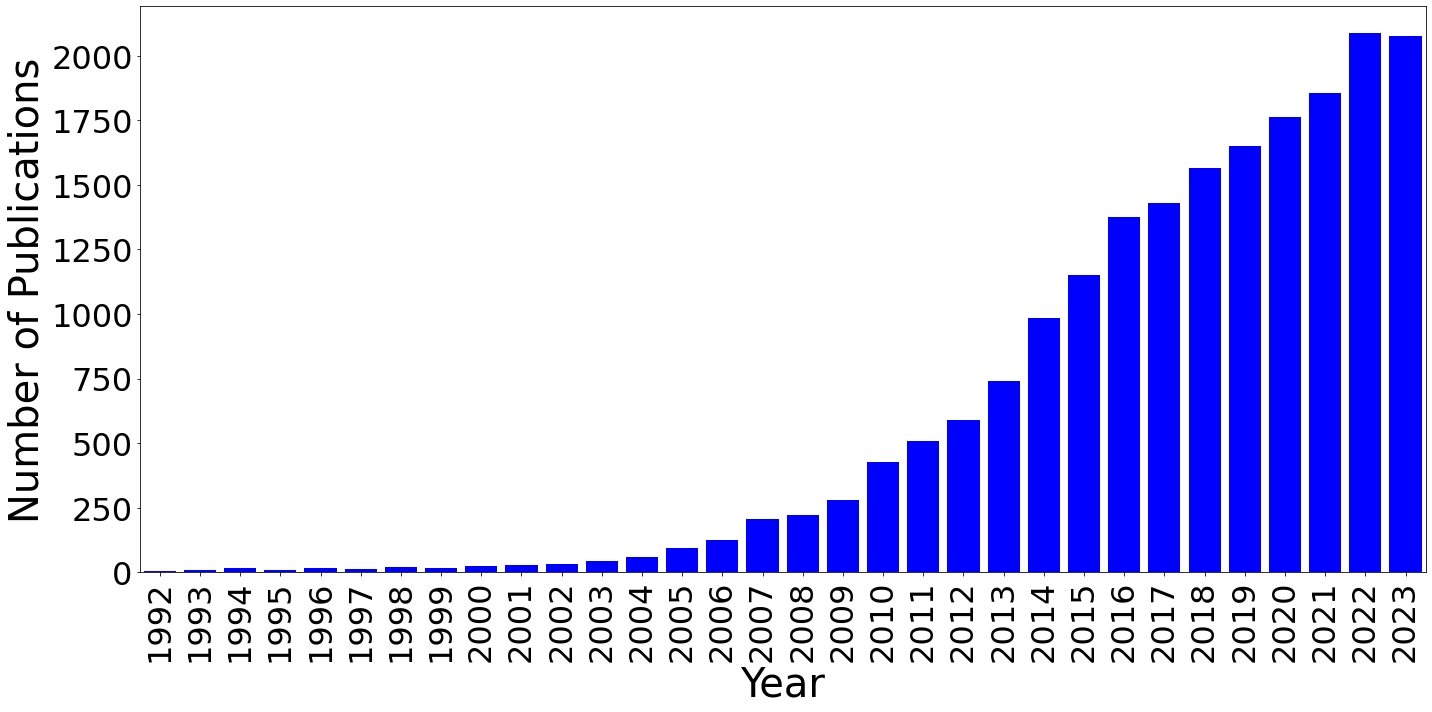

In [6]:
import matplotlib.pyplot as plt

# Assuming data_df is already created with the 'Year' and 'Number of Publications' columns
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plt.xlim(1991.5,2023.5)
plt.bar(data_df['Year'], data_df['Number of Publications'], color='blue')  # Bar plot
plt.xlabel('Year', fontsize=40)
plt.ylabel('Number of Publications', fontsize=40)
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=data_df['Year'][::1], rotation=90, fontsize=32)  # Rotate the x-axis labels for better readability
plt.yticks(fontsize=32)
plt.tight_layout()  # Adjust subplots to give some padding
plt.show()


Functions for processing the corpus

In [188]:
#def preprocess_materials(materials_column):
#    # Split the strings by commas and newlines, and remove '-' characters
#    tokens = materials_column.replace('\n', ',')#.split(';')
#    # Strip whitespace and remove empty tokens
#    tokens = [token.strip() for token in tokens if token.strip()]
#    return ' '.join(tokens)

def prepare_corpus(df):
    corpus = []
    for index, row in df.iterrows():
        for token in str(row['response']).replace('\n', ';').split(';'):
            corpus.append(token.strip().replace('/', "-").replace("\\", "-"))
    return corpus

import re
def substitute_atomic_symbols(text):
    # Define a dictionary with regex patterns as keys and their replacements as values
    text = str(text)
    atomic_map = {
        # Periodic Table
        r'[Hh]ydrogen'     : 'H' , r'[Hh]elium'       : 'He', r'[Ll]ithium'      : 'Li', 
        r'[Bb]eryllium'    : 'Be', r'[Bb]oron'        : 'B' , 
        #r'[Cc]arbon'       : 'C' , 
        r'[Nn]itrogen'     : 'N' , r'[Oo]xygen'       : 'O' , 
        r'[Ff]luorine'     : 'F' , r'[Nn]eon'         : 'Ne', r'[Ss]odium'       : 'Na', 
        r'[Mm]agnesium'    : 'Mg', r'[Aa]luminum'     : 'Al', r'[Ss]ilicon'      : 'Si', 
        r'[Pp]hosphorus'   : 'P' , r'[Ss]ulfur'       : 'S' , 
        r'[Cc]hlorine'     : 'Cl', r'[Aa]rgon'        : 'Ar', r'[Pp]otassium'    : 'K' , 
        r'[Cc]alcium'      : 'Ca', r'[Ss]candium'     : 'Sc', r'[Tt]itanium'     : 'Ti', 
        r'[Vv]anadium'     : 'V' , r'[Cc]hromium'     : 'Cr', 
        r'[Mm]anganese'    : 'Mn', r'[Ii]ron'         : 'Fe', r'[Cc]obalt'       : 'Co', 
        r'[Nn]ickel'       : 'Ni', r'[Cc]opper'       : 'Cu', r'[Zz]inc'         : 'Zn', 
        r'[Gg]allium'      : 'Ga', r'[Gg]ermanium'    : 'Ge', 
        r'[Aa]rsenic'      : 'As', r'[Ss]elenium'     : 'Se', r'[Bb]romine'      : 'Br', 
        r'[Kk]rypton'      : 'Kr', r'[Rr]ubidium'     : 'Rb', r'[Ss]trontium'    : 'Sr', 
        r'[Yy]ttrium'      : 'Y' , r'[Zz]irconium'    : 'Zr', 
        r'[Nn]iobium'      : 'Nb', r'[Mm]olybdenum'   : 'Mo', r'[Tt]echnetium'   : 'Tc', 
        r'[Rr]uthenium'    : 'Ru', r'[Rr]hodium'      : 'Rh', r'[Pp]alladium'    : 'Pd', 
        r'[Ss]ilver'       : 'Ag', r'[Cc]admium'      : 'Cd', 
        r'[Ii]ndium'       : 'In', r'[Tt]in'          : 'Sn', r'[Aa]ntimony'     : 'Sb', 
        r'[Tt]ellurium'    : 'Te', r'[Ii]odine'       : 'I' , r'[Xx]enon'        : 'Xe', 
        r'[Cc]esium'       : 'Cs', r'[Bb]arium'       : 'Ba', 
        r'[Ll]anthanum'    : 'La', r'[Cc]erium'       : 'Ce', r'[Pp]raseodymium' : 'Pr', 
        r'[Nn]eodymium'    : 'Nd', r'[Pp]romethium'   : 'Pm', r'[Ss]amarium'     : 'Sm', 
        r'[Ee]uropium'     : 'Eu', r'[Gg]adolinium'   : 'Gd', 
        r'[Tt]erbium'      : 'Tb', r'[Dd]ysprosium'   : 'Dy', r'[Hh]olmium'      : 'Ho', 
        r'[Ee]rbium'       : 'Er', r'[Tt]hulium'      : 'Tm', r'[Yy]tterbium'    : 'Yb', 
        r'[Ll]utetium'     : 'Lu', r'[Hh]afnium'      : 'Hf', 
        r'[Tt]antalum'     : 'Ta', r'[Tt]ungsten'     : 'W' , r'[Rr]henium'      : 'Re', 
        r'[Oo]smium'       : 'Os', r'[Ii]ridium'      : 'Ir', r'[Pp]latinum'     : 'Pt', 
        r'[Gg]old'         : 'Au', r'[Mm]ercury'      : 'Hg', 
        r'[Tt]hallium'     : 'Tl', r'[Ll]ead'         : 'Pb', r'[Bb]ismuth'      : 'Bi', 
        r'[Pp]olonium'     : 'Po', r'[Aa]statine'     : 'At', r'[Rr]adon'        : 'Rn', 
        r'[Ff]rancium'     : 'Fr', r'[Rr]adium'       : 'Ra', 
        r'[Aa]ctinium'     : 'Ac', r'[Tt]horium'      : 'Th', r'[Pp]rotactinium' : 'Pa', 
        r'[Uu]ranium'      : 'U' , r'[Nn]eptunium'    : 'Np', r'[Pp]lutonium'    : 'Pu', 
        r'[Aa]mericium'    : 'Am', r'[Cc]urium'       : 'Cm', 
        r'[Bb]erkelium'    : 'Bk', r'[Cc]alifornium'  : 'Cf', r'[Ee]insteinium'  : 'Es', 
        r'[Ff]ermium'      : 'Fm', r'[Mm]endelevium'  : 'Md', r'[Nn]obelium'     : 'No', 
        r'[Ll]awrencium'   : 'Lr', r'[Rr]utherfordium': 'Rf', 
        r'[Dd]ubnium'      : 'Db', r'[Ss]eaborgium'   : 'Sg', r'[Bb]ohrium'      : 'Bh', 
        r'[Hh]assium'      : 'Hs', r'[Mm]eitnerium'   : 'Mt', r'[Dd]armstadtium' : 'Ds', 
        r'[Rr]oentgenium'  : 'Rg', r'[Cc]opernicium'  : 'Cn', 
        r'[Nn]ihonium'     : 'Nh', r'[Ff]lerovium'    : 'Fl', r'[Mm]oscovium'    : 'Mc', 
        r'[Ll]ivermorium'  : 'Lv', r'[Tt]ennessine'   : 'Ts', r'[Oo]ganesson'    : 'Og',
        # Case-sensitive and complex patterns
        r'[Nn]-[Dd]oped\s*[Cc]arbon': 'N-doped Carbon',
        r'[Nn]itrogendoped\s*[Cc]arbon': 'N-doped Carbon',
        r'[Nn]itrogen\s*[Dd]oped\s*[Cc]arbon': 'N-doped Carbon',
        r'[Ff][Ee][Nn][Cc]\s*catalysts?': 'FeNC',
        r'[Ss]ingle\s*[Aa]tom\s*[Cc]atalyst(s)?': 'Single Atom Catalysts',
        r'[Aa]u\s*[Nn]anoparticle(s)?': 'Au Nanoparticles',
        r'[Pp]t\s*[Nn]anoparticle(s)?': 'Pt Nanoparticles',
        r'Platinum (pt)': 'Pt',
        r'Pt \(111\)': 'Pt',
        r'[Mm][Oo][Ff][Ss]': 'Metal Organic Frameworks', 
        r'[Mm]etalorganic [Ff]ramework(s)? \(mofs\)': 'Metal Organic Frameworks',
        r'[Mm]etalorganic [Ff]ramework(s)?': 'Metal Organic Frameworks',
        r'[Mm]etal-[Oo]rganic [Ff]ramework(s)?': 'Metal Organic Frameworks',
        r'[Pp]t[/-][Cc]\s*[Cc]atalyst?': 'Pt/C',
        r'[Rr][Gg][Oo]([Ss])?': 'Reduced Graphene Oxide',
        r'[Rr]educe\s*[Gg]rafene\s*[Oo]xide(s)?': 'Reduced Graphene Oxide',
        r'[Rr]educed [Oo]xide [Gg]raphene(s)?': 'Reduced Graphene Oxide',
        r'[Cc][Nn][Tt](s)?': 'Carbon Nanotubes',
        r'[Cc]arbon\s*[Nn]anotube(s)?': 'CNTs',
        r'[Cc]arbon\s*[Nn]anotubess': 'CNTs',
        r'C nanotubes': 'CNTs',
        r'MW(\s)?[Cc]arbon\s*[Nn]anotube': 'Carbon Nanotubes',
        r'[Ss]ingleatom\s*[Cc]atalyst(s)?':  'Single Atom Catalysts',
        r'[Ss]ingle\s*[Aa]tom\s*[Cc]atalyst(s)?':  'Single Atom Catalysts',
        r'[Ss]ingle-[Aa]tom\s*[Cc]atalyst(s)?':  'Single Atom Catalysts',
        r'[Aa]u [Nn][Pp](s)?': 'Au Nanoparticles',
        r'[Pp]t [Nn][Pp](s)?': 'Pt Nanoparticles',
        r'[Aa]u [Nn]anoparticle(s)?': 'Au Nanoparticles',
        r'[Pp]t [Nn]anoparticle(s)?': 'Pt Nanoparticles',
        r'[Gg]raphene': 'Graphene',
        r'[Cc]arbon\s*[Bb]lack': 'Carbon Black',
        r'^[Cc]$': 'Carbon',
        r'carbon': 'Carbon',
        r'\s\+\s': '-',
        r' alloy(s)?': '',
        r'\([012][012][012]\)': '',
        r'Pt[-\s][Bb]lack': 'Pt Black'
    }

    # The substitute function applies the correct replacement for each pattern found
    def substitute(match):
        # The match object contains the entire matched text
        matched_text = match.group(0)
        # Find the correct replacement for the matched pattern
        for pattern, replacement in atomic_map.items():
            if re.fullmatch(pattern, matched_text):
                return replacement
        return matched_text  # Return the original if no replacement is found (fallback)

    # Compile a large regex from all the keys in the atomic_map
    combined_pattern = '|'.join(atomic_map.keys())
    
    # Substitute all matches found in the text
    return re.sub(combined_pattern, substitute, text)

def substitute2(text):
    text = str(text)
    atomic_map = {
        r'[Cc]arbon\s*[Nn]anotubess': 'Carbon Nanotubes',
        r'-C$': '',
        r'FeN4': 'Fe-N',
        r'FeNx': 'Fe-N',
        r'-N-4$': '-N',
        r'Fe-N-Carbon': 'Fe-N',
        r'Fe-N4': 'Fe-N',  
        r'PtCo': 'Pt-Co',
        r'PtCu': 'Pt-Cu',
        r'Fe-CN': 'Fe-NC',
        r'FeNC': 'Fe-NC',
    }

    def substitute(match):
        matched_text = match.group(0)
        for pattern, replacement in atomic_map.items():
            if re.fullmatch(pattern, matched_text):
                return replacement
        return matched_text  # Return the original if no replacement is found (fallback)

    combined_pattern = '|'.join(atomic_map.keys())
    
    return re.sub(combined_pattern, substitute, text)

def filter_corpus(corpus):
    filtered_corpus = []

    items_to_remove = ['Oxygen reduction reaction',
                   'Oxygen reduction reaction (orr)', 
                   'Orr', 
                   'Hydrogen peroxide',
                   'Catalyst',
                   'Catalysts',
                   'Electrocatalysts',
                   'Oxygen',
                   'O2',
                   'O',
                   'Metal',
                   ' ',
                   '',
                   'H2o2',
                   'Transition metal',
                   'None',
                   'catalysts',
                   'M',
                   'Nation'
                   ]
    
    for word in corpus:
        #print(word, '|', substitute_atomic_symbols(word))
        new_word = substitute_atomic_symbols(word)
        new_word2 = substitute2(new_word)

        filtered_corpus.append(new_word2)
    
    corpus2 = [item for item in filtered_corpus if item not in items_to_remove]
    return corpus2

import matplotlib.pyplot as plt
from collections import Counter
import csv

def plot_corpus(corpus2, year):
    # Count the frequencies
    frequency = Counter(corpus2)
#    for item in frequency:
#        frequency[item] = 100*frequency[item]/len(corpus2)
    
    # Select the top 30 most common strings
    top_30 = frequency.most_common(50)

    # Prepare data for plotting
    labels, values = zip(*top_30)

    # Create a bar chart
    plt.figure(figsize=(10, 8))
    plt.bar(labels, values)
    #plt.xlabel('Strings')
    plt.ylabel('Frequency')
    plt.title('Top 30 Most Frequent Strings')
    plt.xticks(rotation=90)  # Rotate labels to make them readable
    plt.show()
    #print(labels)
    #print(frequency)
    filename = 'materials_llama3_'+str(year)+'.csv'

    with open(filename, 'w', newline='') as f:
        w = csv.writer(f)
        # Write header row with 'Year' column
        w.writerow(['Material', 'Frequency', 'Year'])
        # Iterate over frequency dictionary and write each item to the file
        for material, freq in frequency.items():
            w.writerow([material, freq, year])

Process and filter by year

1992 6


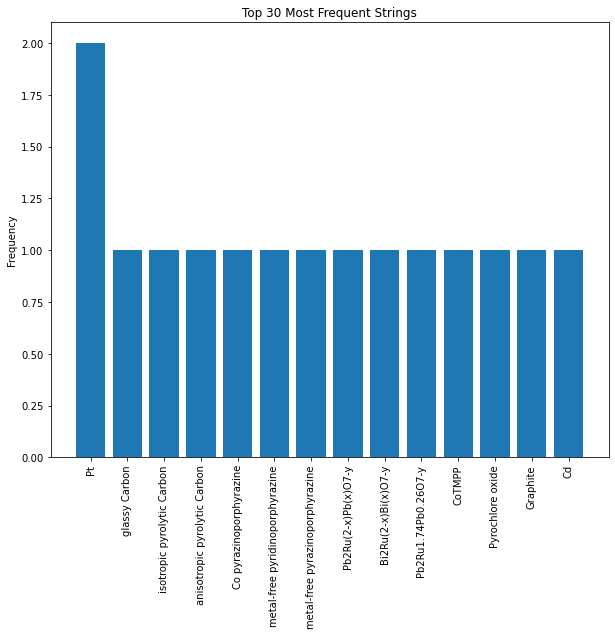

1993 7


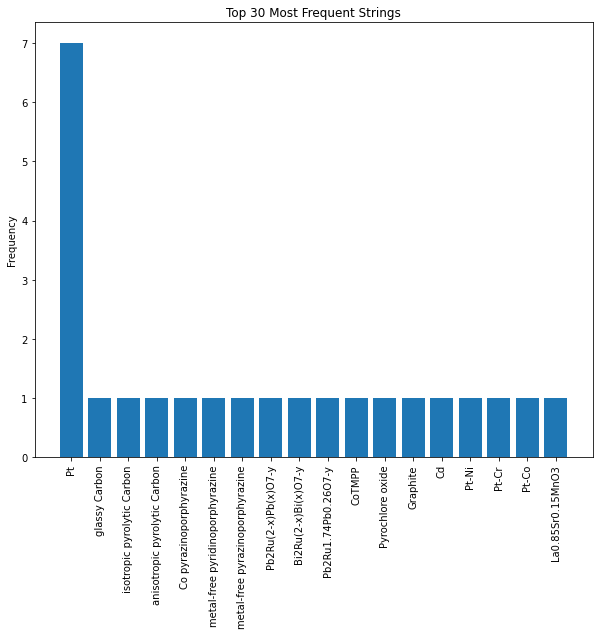

1994 16


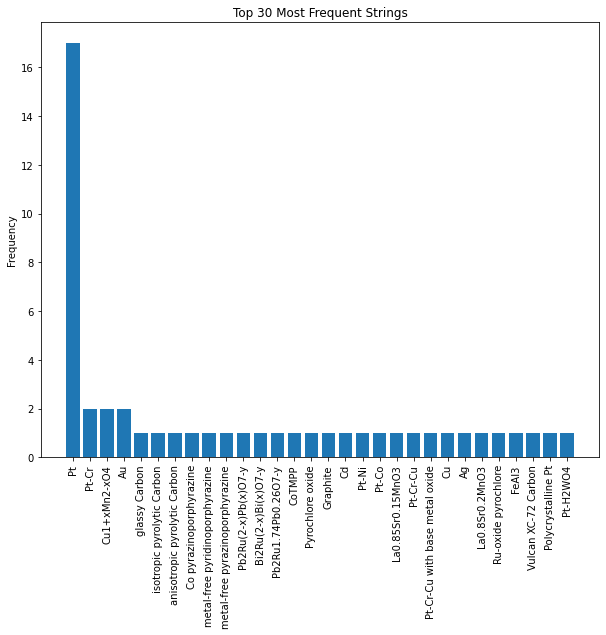

1995 10


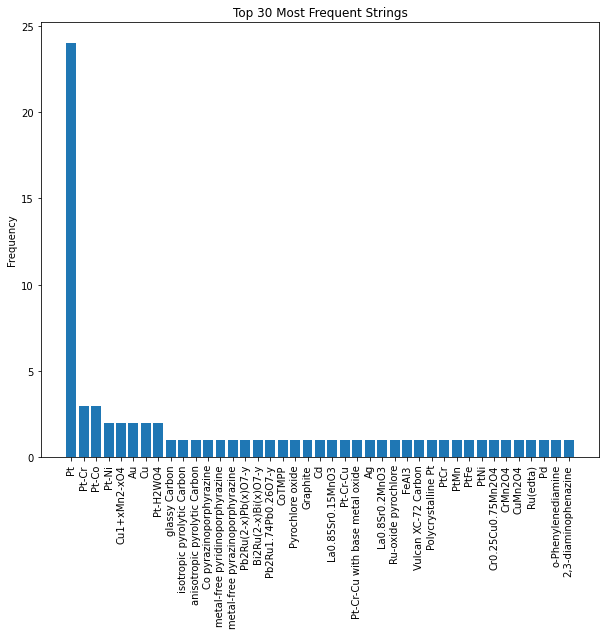

1996 17


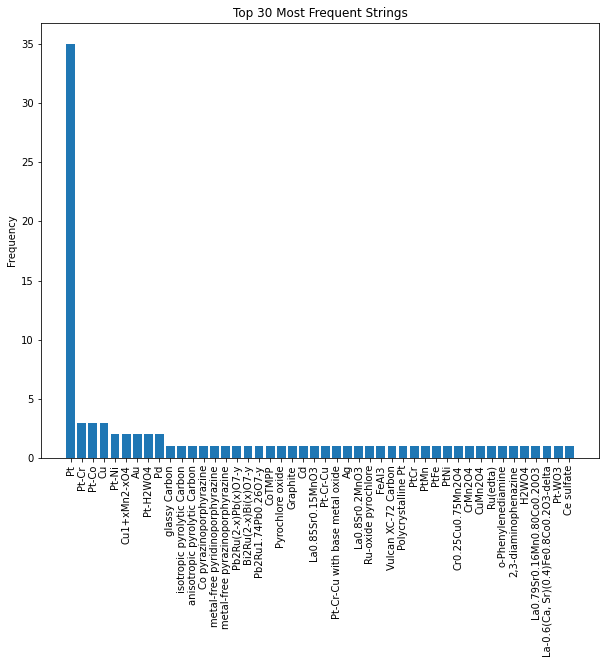

1997 13


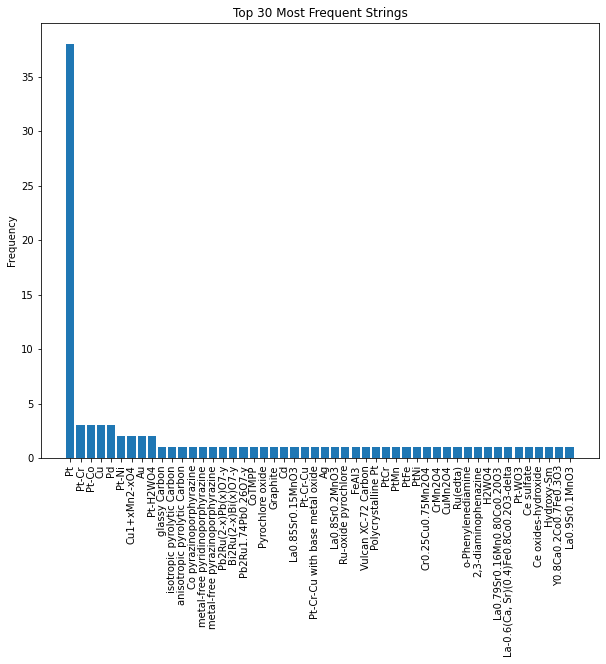

1998 20


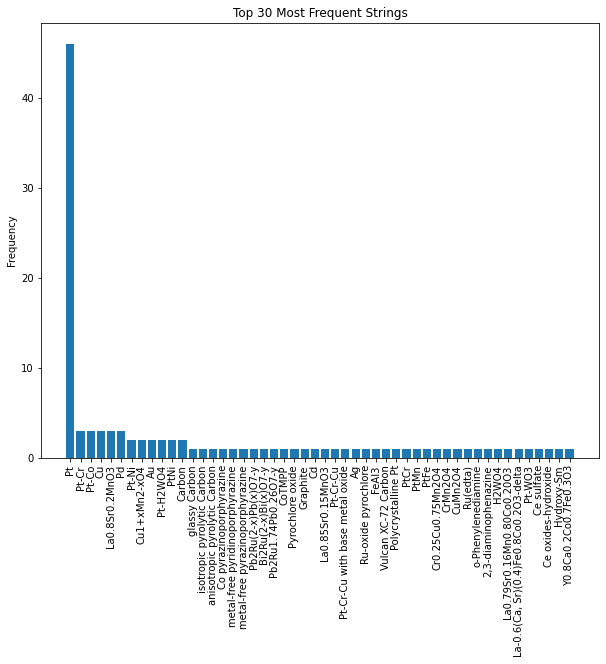

1999 16


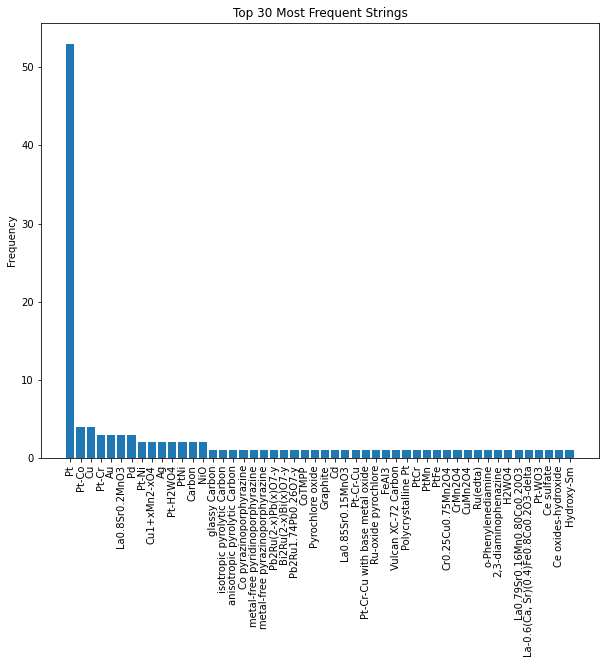

2000 24


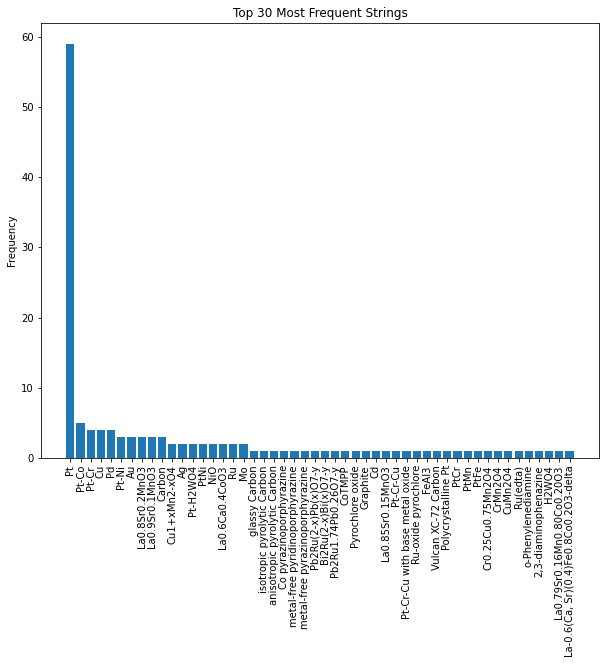

2001 27


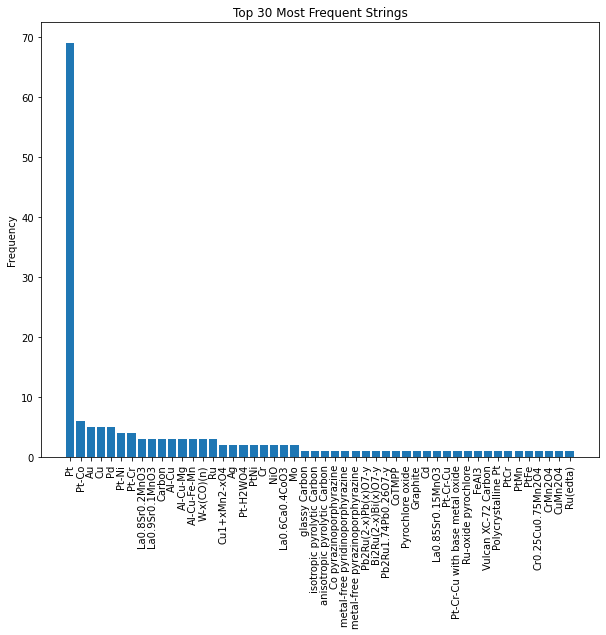

2002 32


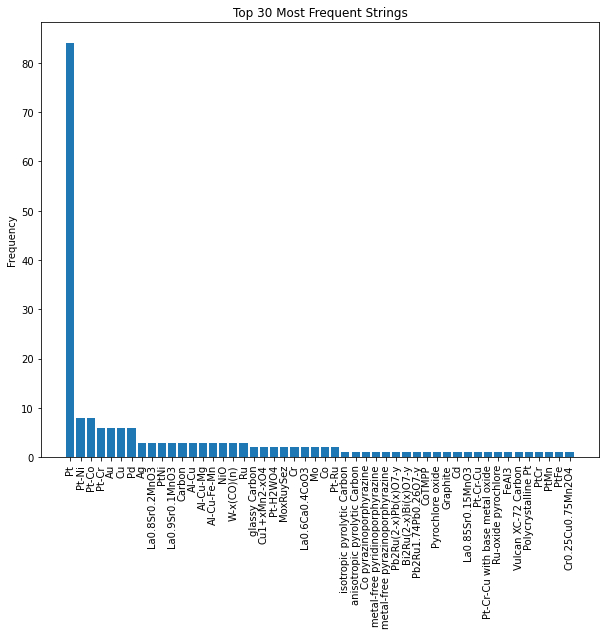

2003 44


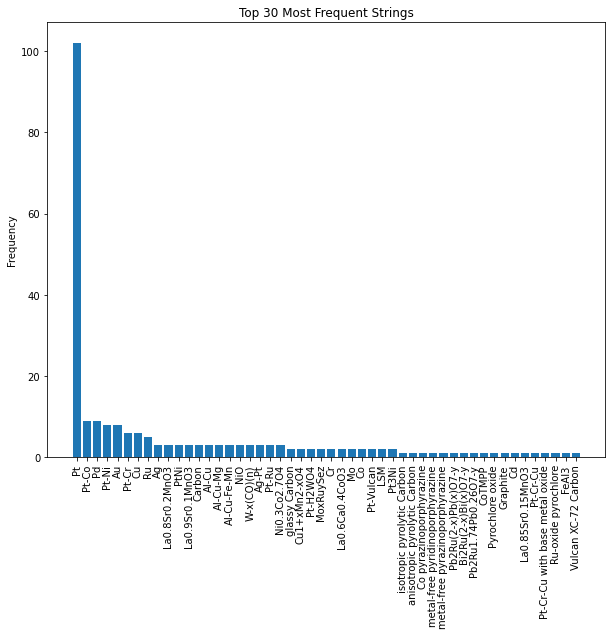

2004 60


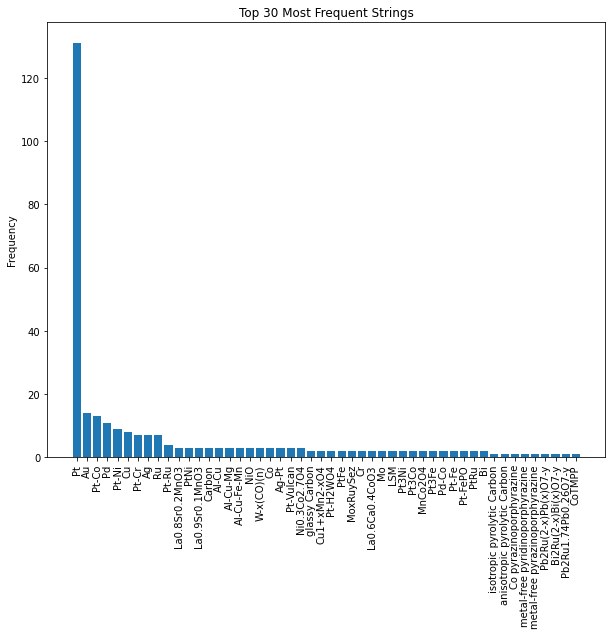

2005 95


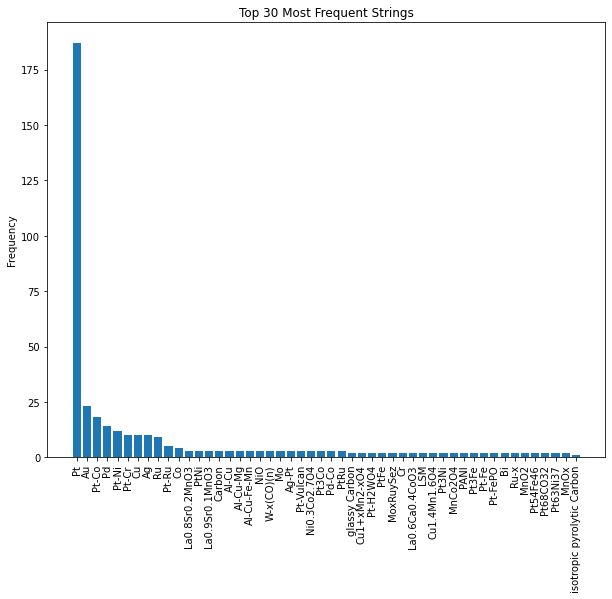

2006 125


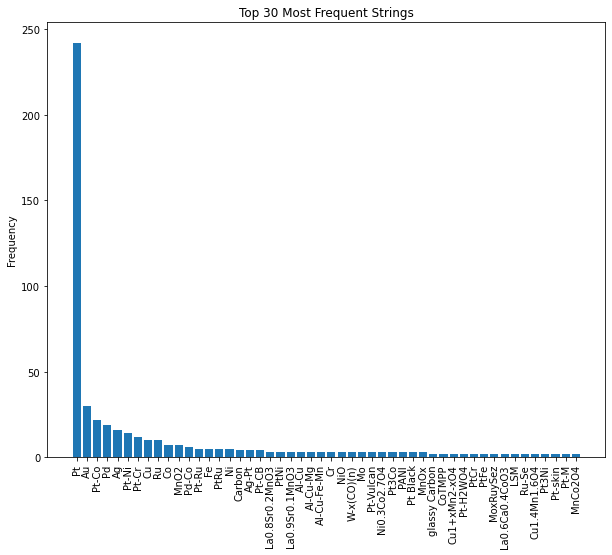

2007 208


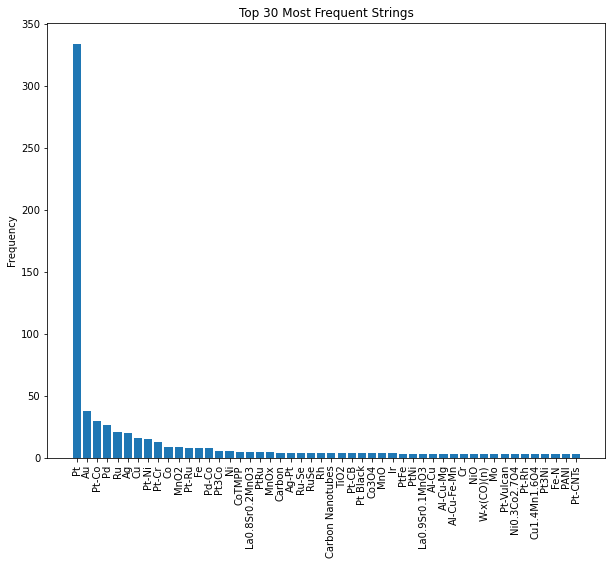

2008 223


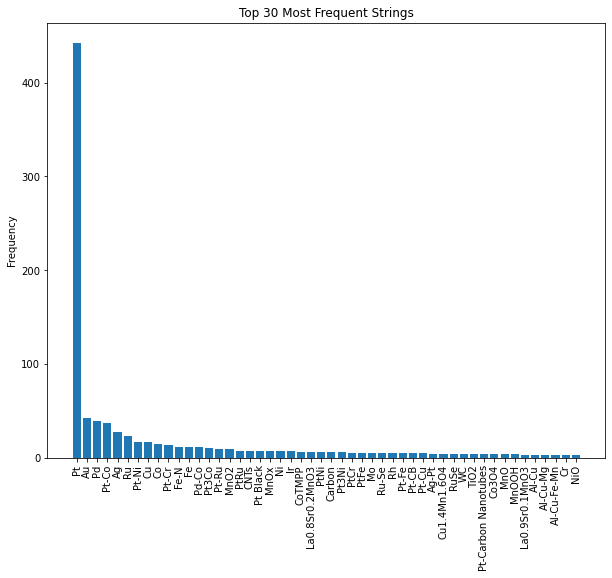

2009 279


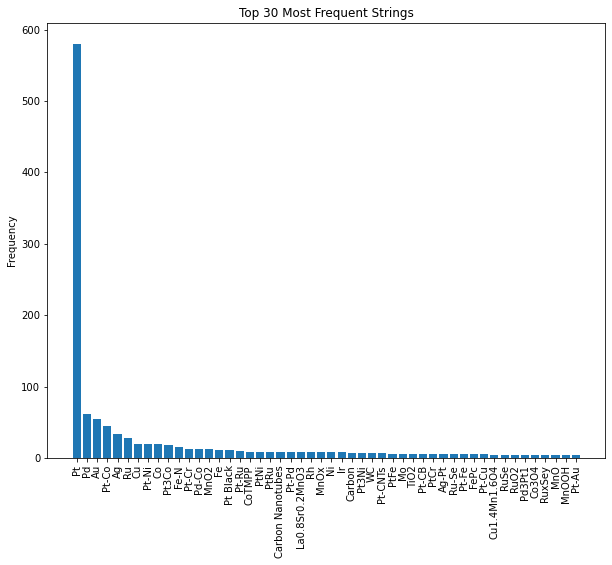

2010 428


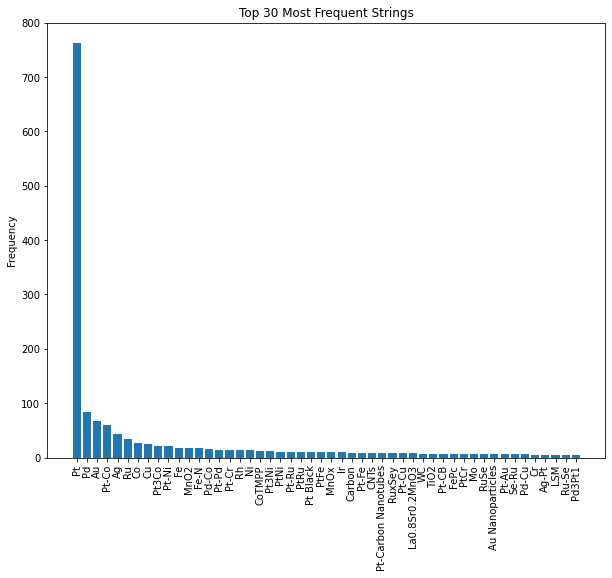

2011 510


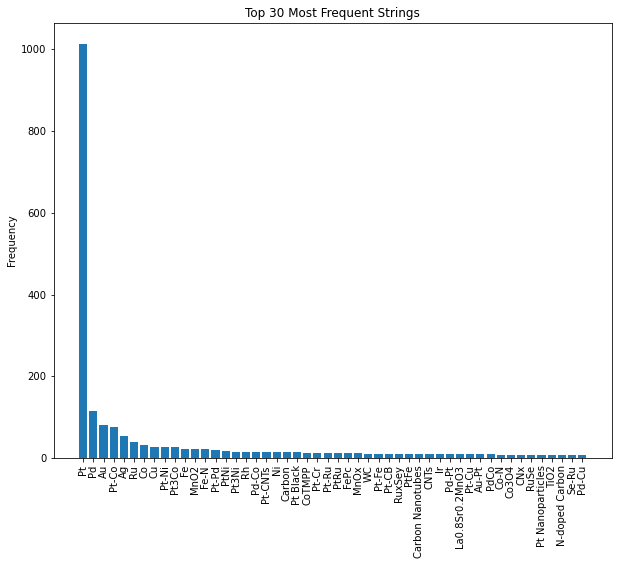

2012 589


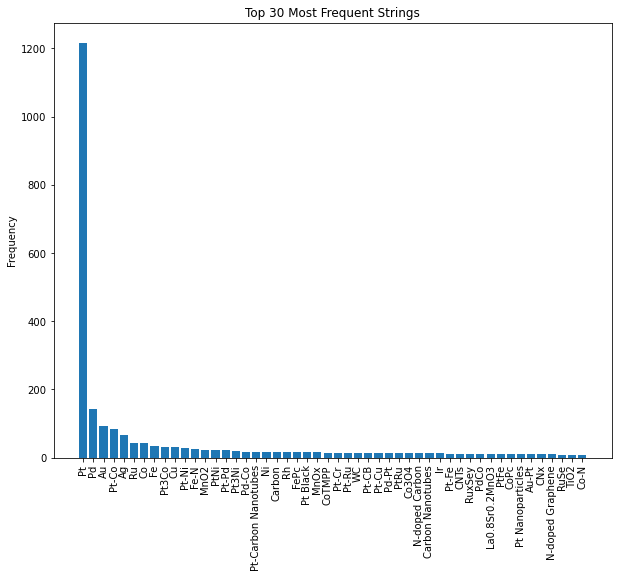

2013 740


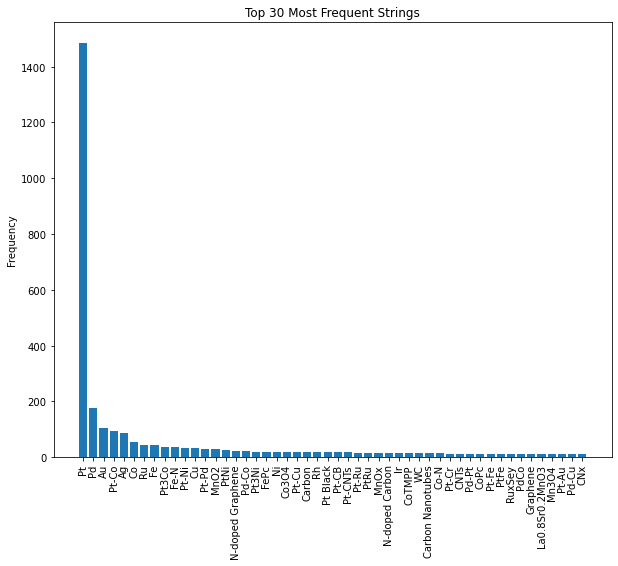

2014 984


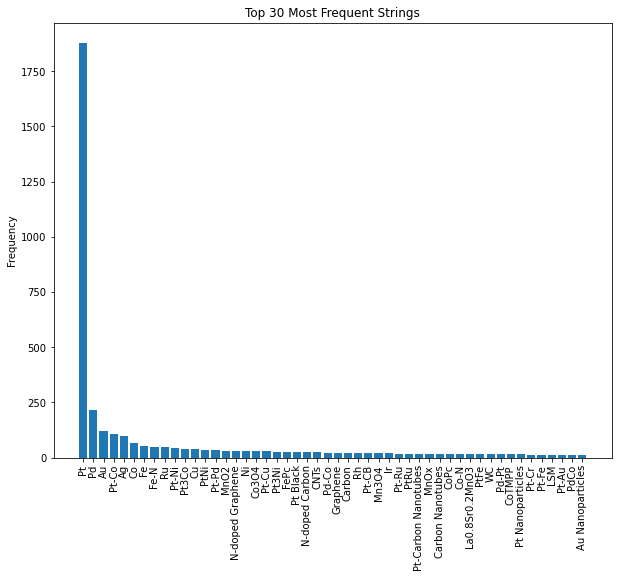

2015 1150


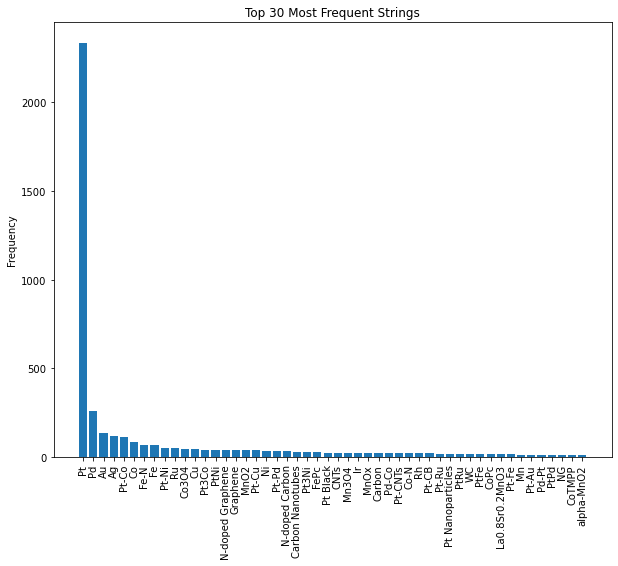

2016 1377


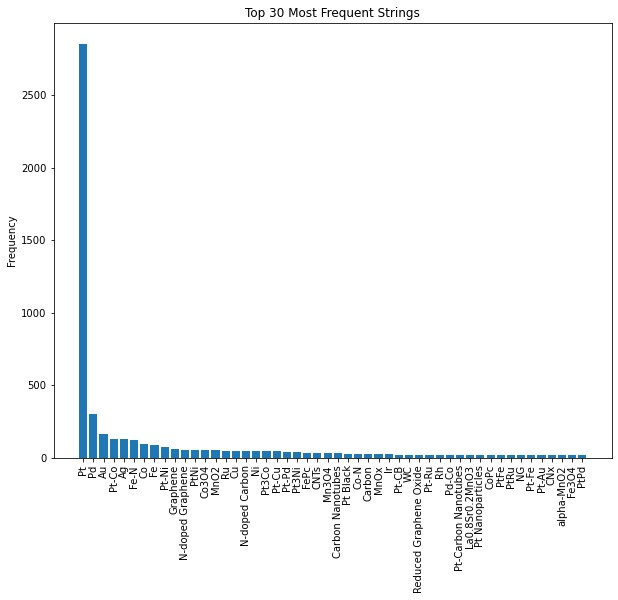

2017 1431


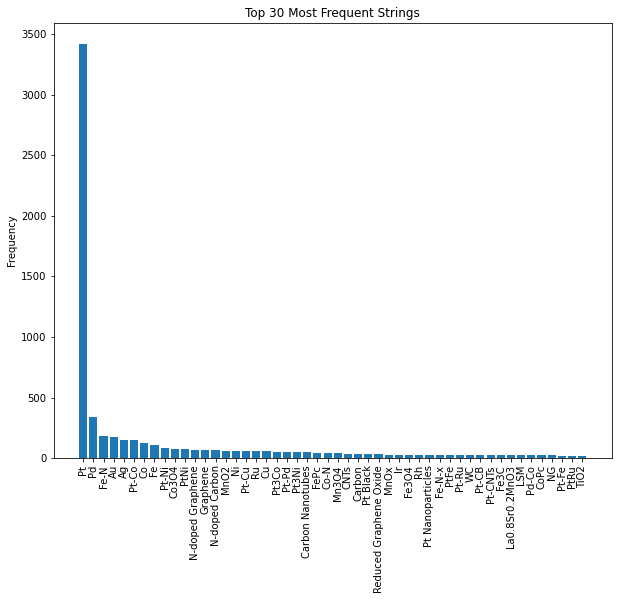

2018 1567


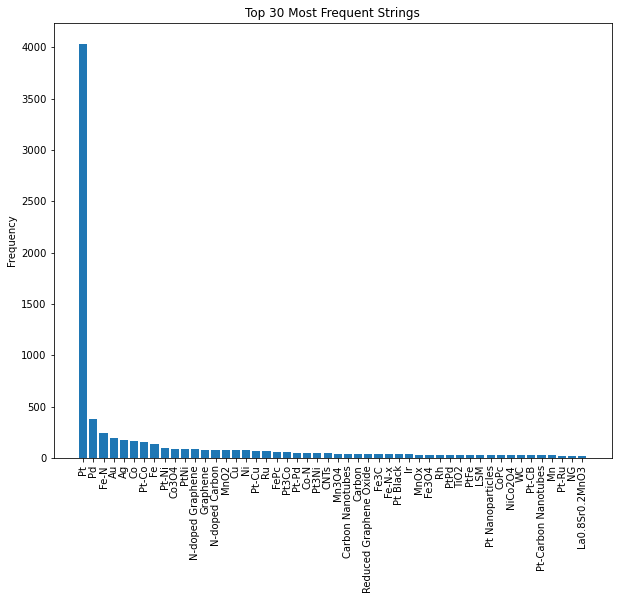

2019 1652


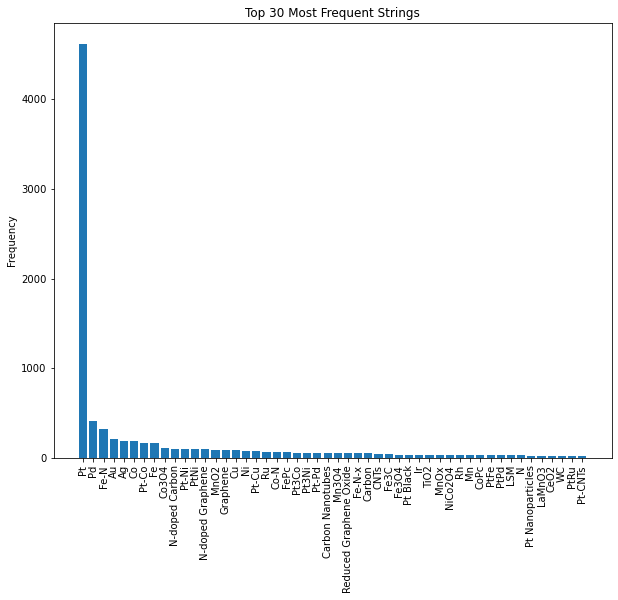

2020 1762


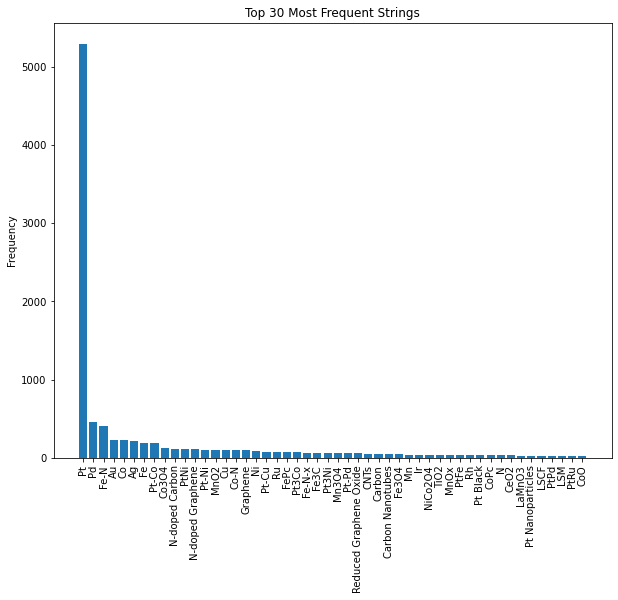

2021 1855


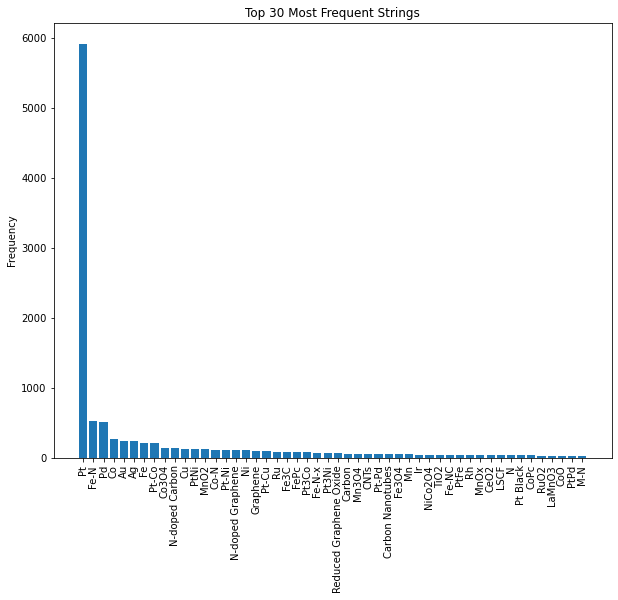

2022 2087


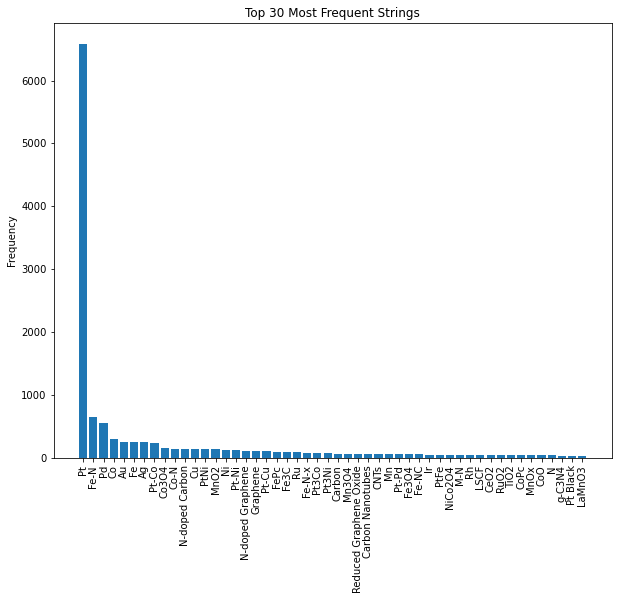

2023 2076


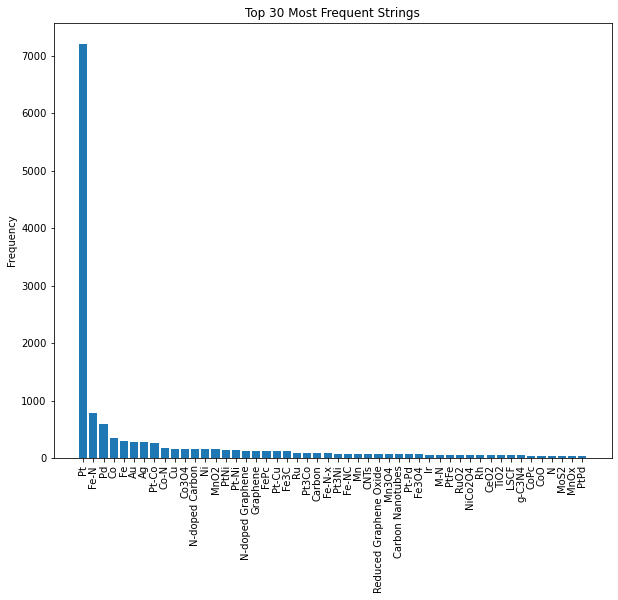

In [189]:
filtered_corpus = []

year = 1991.0
for i in range(0,32):
    year = year + 1
    filtered_df = df_with_responses[df_with_responses['Publication Year'] == year]
    print(int(year), len(filtered_df))
    corpus = prepare_corpus(filtered_df)
    #print(corpus)
    for word in corpus:
        #print('word1', word)
        word = substitute_atomic_symbols(word)
        #print('word2', word)
        if word is not None:
            filtered_corpus.append(word)
    filtered_corpus = filter_corpus(filtered_corpus)
    #print(filtered_corpus)
    plot_corpus(filtered_corpus, int(year))
    
    

# Plotting the analysis by year

Starting in 2006, as it is the first year with more than 100 papers

In [190]:
#list_files = ['materials_llama3_1992', 'materials_llama3_1993', 'materials_llama3_1994', 'materials_llama3_1995', 'materials_llama3_1996', 'materials_llama3_1997', 'materials_llama3_1998', 'materials_llama3_1999', 'materials_llama3_2000', 'materials_llama3_2001', 'materials_llama3_2002', 'materials_llama3_2003', 'materials_llama3_2004', 'materials_llama3_2005', 'materials_llama3_2006', 'materials_llama3_2007', 'materials_llama3_2008', 'materials_llama3_2009', 'materials_llama3_2010', 'materials_llama3_2011', 'materials_llama3_2012', 'materials_llama3_2013', 'materials_llama3_2014', 'materials_llama3_2015', 'materials_llama3_2016', 'materials_llama3_2017', 'materials_llama3_2018', 'materials_llama3_2019', 'materials_llama3_2020', 'materials_llama3_2021', 'materials_llama3_2022', 'materials_llama3_2023']
list_files = ['materials_llama3_2006', 'materials_llama3_2007', 'materials_llama3_2008', 'materials_llama3_2009', 'materials_llama3_2010', 'materials_llama3_2011', 'materials_llama3_2012', 'materials_llama3_2013', 'materials_llama3_2014', 'materials_llama3_2015', 'materials_llama3_2016', 'materials_llama3_2017', 'materials_llama3_2018', 'materials_llama3_2019', 'materials_llama3_2020', 'materials_llama3_2021', 'materials_llama3_2022', 'materials_llama3_2023']

In [191]:
list_dfs = []

for item in list_files:
    filename = item + '.csv'
    df = pd.read_csv(filename)
    df.name = item
    list_dfs.append(df)

In [192]:
for df in list_dfs:
    df['Frequency'] = 100*df['Frequency']/(df['Frequency'].sum())

# Filter by a frequency cut for a number of years

In [193]:
# Assuming list_dfs is your list of DataFrame objects

# Initialize a dictionary to count occurrences of high frequencies for each material
frequency_count = {}
frequency_cut = 0.6
years_cut = 4  # Change this to 3 to require that the frequency threshold is met in at least three different years

# Loop through each DataFrame in the list
for df in list_dfs:
    # Find materials in this DataFrame with a frequency greater than 0.7
    high_freq_materials = df[df['Frequency'] > frequency_cut]['Material']

    # Update frequency counts for these materials
    for material in high_freq_materials:
        if material in frequency_count:
            frequency_count[material] += 1
        else:
            frequency_count[material] = 1

# Compile a list of materials that meet the frequency criteria in at least 3 DataFrames
materials_above_threshold = [material for material, count in frequency_count.items() if count >= years_cut]

# Create a new list of DataFrames, filtered to only include materials from the materials_above_threshold list
filtered_dfs = [df[df['Material'].isin(materials_above_threshold)] for df in list_dfs]

# Now you have a list of DataFrames where each DataFrame is filtered to only include relevant materials
print("Number of DataFrames in the new list:", len(filtered_dfs))
print("Number of Materials", len(materials_above_threshold))
print("Materials with frequency > 0.7 in at least 3 years:", materials_above_threshold)

#for idx, df in enumerate(filtered_dfs):
#    print(f"DataFrame {idx + 1} contents:")
#    print(len(df))
#materials_above_threshold.remove('Pt')

Number of DataFrames in the new list: 18
Number of Materials 14
Materials with frequency > 0.7 in at least 3 years: ['Pt', 'Pt-Ni', 'Pt-Cr', 'Pt-Co', 'Au', 'Cu', 'Ag', 'Pd', 'Ru', 'Co', 'Fe', 'Pd-Co', 'Pt3Co', 'Fe-N']


## New cutted plot

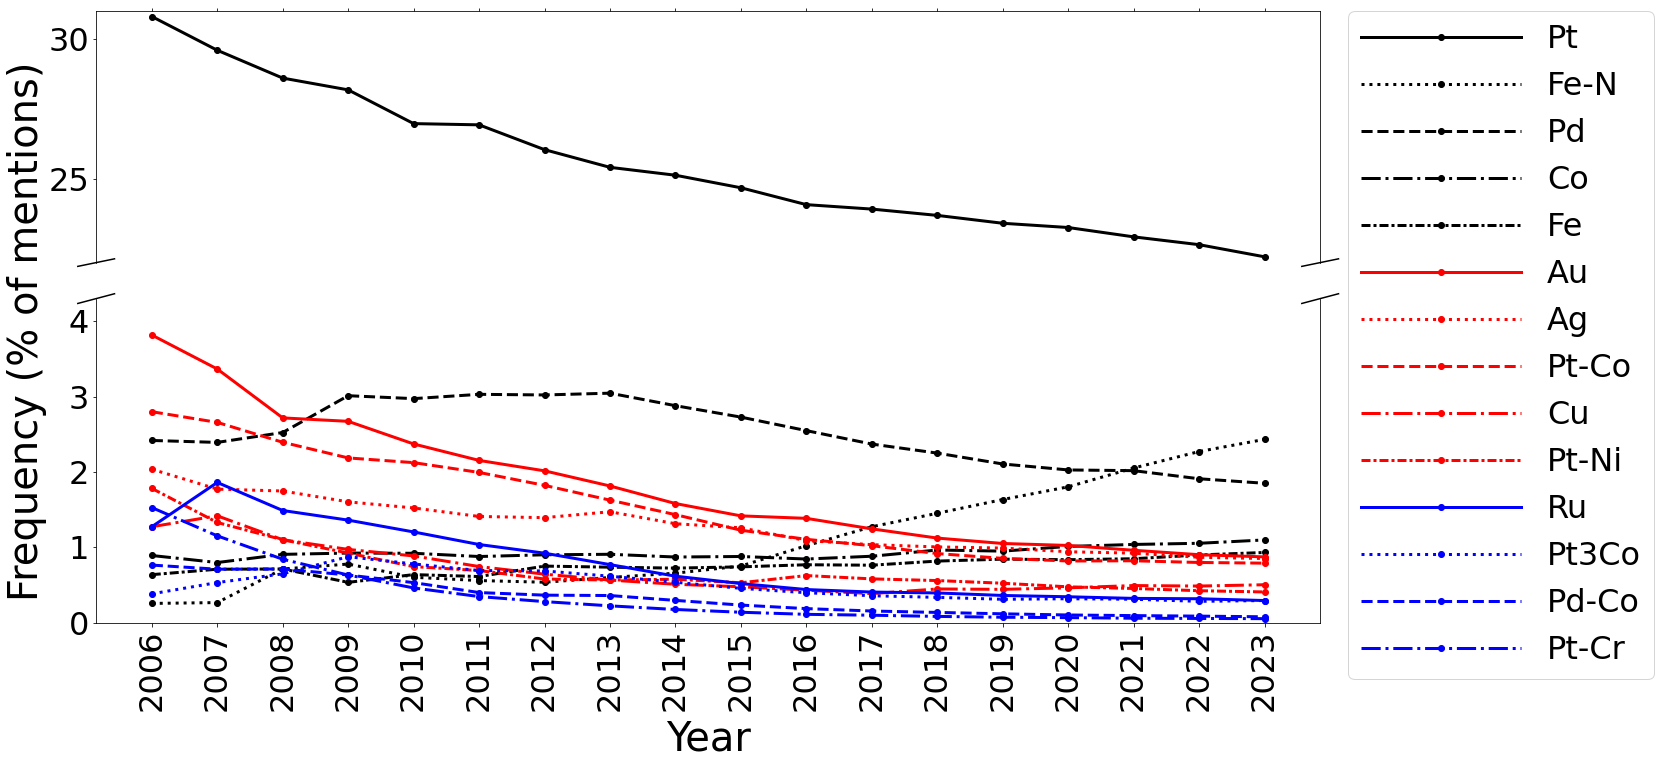

In [194]:
import matplotlib.pyplot as plt
import pandas as pd

years = [str(year) for year in range(2006, 2024)]  # Years from 1992 to 2023

columns = ['Material'] + years
data = []

# Dynamically accessing DataFrames and collecting data
for material in materials_above_threshold:
    row = [material]  # Start row with the material key
    #print(row)
    for year, df in zip(years, filtered_dfs):
        # Dynamically get the DataFrame by its name (assumes DataFrame variables are in the scope)
        #df = globals()[df_name]  # Use globals() or locals() depending on your setup
        freq = df[df['Material'] == material]['Frequency'].sum()  # Change from .values[0] to .sum() in case of multiple entries or none
        row.append(freq)
    data.append(row)

# Create DataFrame from collected data
frequency_df = pd.DataFrame(data, columns=columns)
frequency_df = frequency_df.sort_values(by=['2023'], ascending=False)

# Create the figure
fig = plt.figure(figsize=(20, 10))

# Manually add subplots with specific positions [left, bottom, width, height]
# These values are normalized (0-1) relative to the figure size
ax1 = fig.add_axes([0.1, 0.6, 0.85, 0.35])  # Higher bottom to reduce the vertical space
ax2 = fig.add_axes([0.1, 0.1, 0.85, 0.45])   # Adjust bottom and height to close the gap

# Set the linestyles and colors for simplicity
linestyles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1))] * 8  # Ensure enough styles

color_list = ['black', 'red', 'blue', 'green', 'orange', 
              'purple', 'cyan', 'magenta', 'lime', 'gray', 
              'gold', 'darkred', 'pink']
colors = []
for color in color_list:
    for i in range(0,5):
        colors.append(color)

j = 0
for i, row in frequency_df.iterrows():
    ax1.plot(years, 
             row[1:], 
             marker='o', 
             linestyle=linestyles[j % len(linestyles)], 
             color=colors[j % len(colors)], 
             linewidth=3.0, 
             label=row['Material'])
    ax2.plot(years, 
             row[1:], 
             marker='o', 
             linestyle=linestyles[j % len(linestyles)], 
             color=colors[j % len(colors)], 
             linewidth=3.0, 
             label=row['Material'])
    j += 1

# Set the limits for the y-axes
ax1.set_ylim(22, 31)  # Upper plot shows 20 to 32
ax2.set_ylim(0, 4.3)    # Lower plot shows 0 to 5

# Hide the spines between ax1 and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Adding diagonal lines to indicate the break in the y-axis
d = .015  # how big to make the diagonal lines in axes coordinates
# Diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Set labels, titles, and legend
plt.xlabel('Year', fontsize=40)
plt.ylabel('Frequency (% of mentions)', fontsize=40, labelpad=20)
ax2.xaxis.set_label_coords(0.5,-0.3)
ax2.yaxis.set_label_coords(-0.04,0.9)
plt.xticks(rotation=90, fontsize=32)
plt.yticks(fontsize=32)
ax1.tick_params(axis='both', labelsize=32)  # Set the tick labels to a larger size
ax2.tick_params(axis='both', labelsize=32)  # Set the tick labels to a larger size
ax1.legend(handlelength=5, loc='upper left', bbox_to_anchor=(1.01, 1.06), fontsize=32)

plt.show()


## Old plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of DataFrame names as strings, assumed to be already defined DataFrames
#list_files = ['materials_llama3_1992', 'materials_llama3_1993', 'materials_llama3_1994', 'materials_llama3_1995', 'materials_llama3_1996', 'materials_llama3_1997', 'materials_llama3_1998', 'materials_llama3_1999', 'materials_llama3_2000', 'materials_llama3_2001', 'materials_llama3_2002', 'materials_llama3_2003', 'materials_llama3_2004', 'materials_llama3_2005', 'materials_llama3_2006', 'materials_llama3_2007', 'materials_llama3_2008', 'materials_llama3_2009', 'materials_llama3_2010', 'materials_llama3_2011', 'materials_llama3_2012', 'materials_llama3_2013', 'materials_llama3_2014', 'materials_llama3_2015', 'materials_llama3_2016', 'materials_llama3_2017', 'materials_llama3_2018', 'materials_llama3_2019', 'materials_llama3_2020', 'materials_llama3_2021', 'materials_llama3_2022', 'materials_llama3_2023']
#years = [str(year) for year in range(1992, 2024)]  # Years from 1992 to 2023
years = [str(year) for year in range(2006, 2024)]  # Years from 1992 to 2023

columns = ['Material'] + years
data = []

# Dynamically accessing DataFrames and collecting data
for material in materials_above_threshold:
    row = [material]  # Start row with the material key
    #print(row)
    for year, df in zip(years, filtered_dfs):
        # Dynamically get the DataFrame by its name (assumes DataFrame variables are in the scope)
        #df = globals()[df_name]  # Use globals() or locals() depending on your setup
        freq = df[df['Material'] == material]['Frequency'].sum()  # Change from .values[0] to .sum() in case of multiple entries or none
        row.append(freq)
    data.append(row)

# Create DataFrame from collected data
frequency_df = pd.DataFrame(data, columns=columns)

# Plotting setup
plt.figure(figsize=(20, 10))

linestyles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1)),
             ]
colors = ['black', 'black', 'black', 'black', 'black', 
          'red', 'red', 'red', 'red', 'red', 
          'blue', 'blue', 'blue', 'blue', 'blue',
          'green', 'green', 'green', 'green', 'green',
          'orange', 'orange', 'orange', 'orange', 'orange',
          'purple', 'purple', 'purple', 'purple', 'purple',
          'cyan', 'cyan', 'cyan', 'cyan', 'cyan',
          'magenta', 'magenta','magenta','magenta','magenta',
          'lime', 'lime', 'lime', 'lime', 'lime',
          'gray', 'gray', 'gray', 'gray', 'gray', 
          'gold', 'gold', 'gold', 'gold', 'gold', 
          'darkred', 'darkred', 'darkred', 'darkred', 'darkred', 
          'pink', 'pink', 'pink', 'pink', 'pink',
         ]

for i, row in frequency_df.iterrows():
    #print(i)
    plt.plot(years, row[1:], marker='o', linestyle=linestyles[i], color=colors[i], linewidth=3.0, label=row['Material'])

#print(plt.xlim())
#plt.xlim(-0.70, 17.85)
plt.xlabel('Year', fontsize=40)
plt.ylabel('Frequency (% of mentions)', fontsize=40)
plt.legend(handlelength=5, loc='upper left', bbox_to_anchor=(1, 1), fontsize=26)
plt.xticks(rotation=90, fontsize=32)
plt.yticks(fontsize=32)
#plt.grid(True)
plt.tight_layout()
plt.show()


# Get materials with a rising trend

In [195]:
# Assuming list_dfs is a list of DataFrame objects sorted by year, with the most recent last
start_year = 2006  # The year the first DataFrame corresponds to
end_comparison_year = 2012  # Last year for the comparison period
min_years = 4  # Number of years to consider for a rising trend
frequency_cut = 0.08  # Frequency threshold for the last year

# Initialize a dictionary to store the frequencies of each material for the last 'min_years' years
material_trends = {}

# Collect frequency data for the last 'min_years' DataFrames, including those from 2006 to 2012 if applicable
for i, df in enumerate(list_dfs[-min_years:]):
    current_year = start_year + len(list_dfs) - min_years + i  # Calculate current year based on index
    for index, row in df.iterrows():
        material = row['Material']
        frequency = row['Frequency']
        if material not in material_trends:
            material_trends[material] = []
        material_trends[material].append((current_year, frequency))

# Compile a list of materials that meet all conditions
materials_with_rising_trend = []
for material, records in material_trends.items():
    if len(records) == min_years:
        # Sort records by year to ensure the comparison is chronological
        sorted_records = sorted(records, key=lambda x: x[0])
        # Check if the frequency is increasing each year
        if all(x[1] < y[1] for x, y in zip(sorted_records, sorted_records[1:])):
            # Additional checks: frequency > frequency_cut in the most recent year
            if sorted_records[-1][1] > frequency_cut:
                # Collect all frequencies from 2006 to 2012 from the full list of DataFrames
                early_frequencies = [df[df['Material'] == material]['Frequency'].values for df in list_dfs
                                     if start_year <= int(df['Year'].iloc[0]) <= end_comparison_year]
                # Flatten the list of numpy arrays to a single list of frequencies
                early_frequencies = [freq for sublist in early_frequencies for freq in sublist]
                # Check that the last year's frequency is higher than all from 2006 to 2012
                if all(sorted_records[-1][1] > freq for freq in early_frequencies):
                    materials_with_rising_trend.append(material)

# Filter original DataFrames to include only the materials with rising trends
filtered_dfs = [df[df['Material'].isin(materials_with_rising_trend)] for df in list_dfs]

# Output the results
print("Number of DataFrames in the new list:", len(filtered_dfs))
print("Materials with rising trends over the last 4 years, >0.2 frequency in the last year, and more frequent in 2023 than from 2006 to 2012:", len(materials_with_rising_trend))
print("Materials:", materials_with_rising_trend)

Number of DataFrames in the new list: 18
Materials with rising trends over the last 4 years, >0.2 frequency in the last year, and more frequent in 2023 than from 2006 to 2012: 12
Materials: ['Co', 'Fe-N', 'Fe', 'Co-N', 'Mn', 'M-N', 'Fe3C', 'g-C3N4', 'Mn-N', 'Fe-NC', 'MoS2', 'Cu-N']


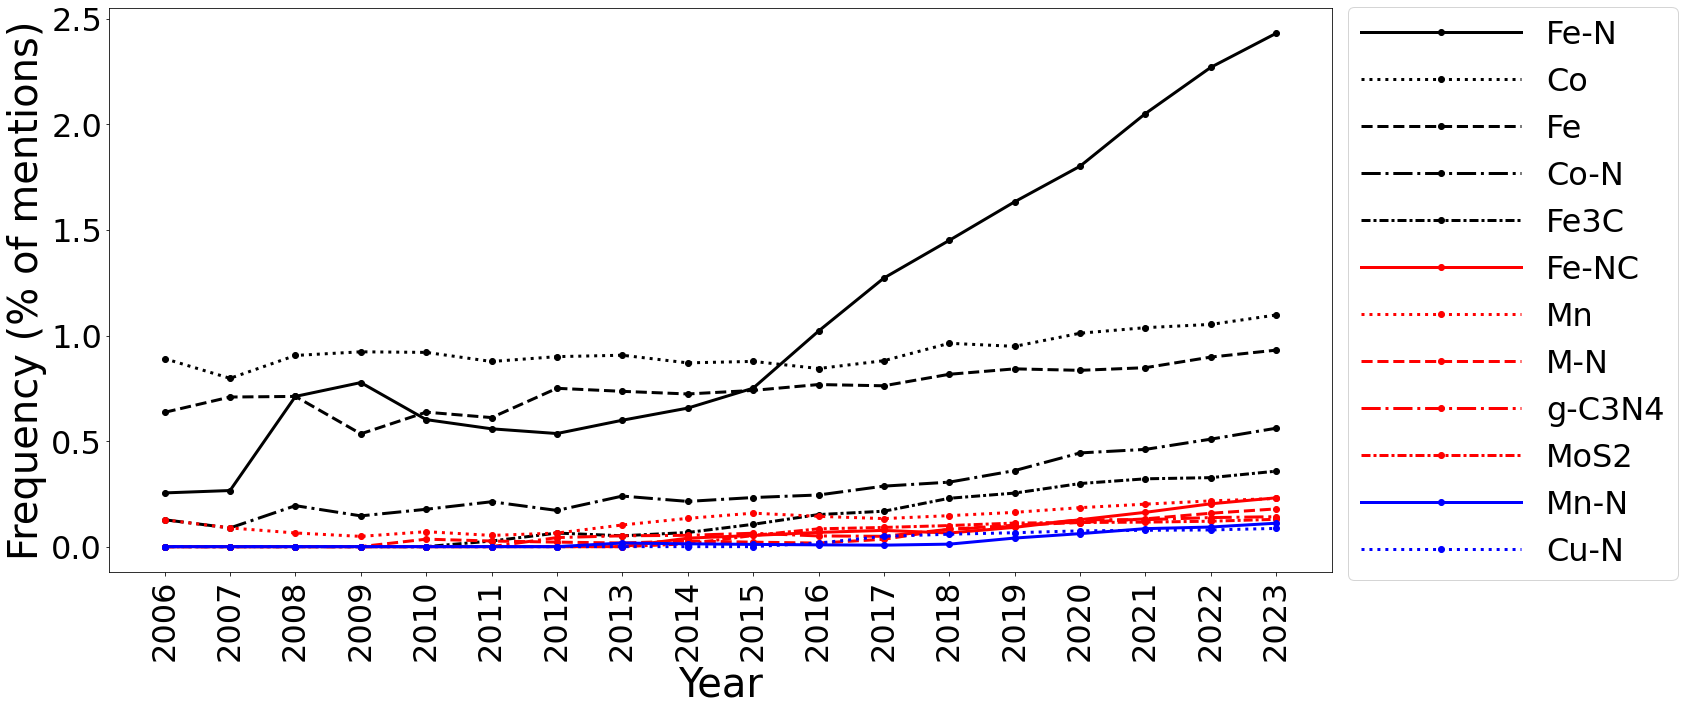

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# List of DataFrame names as strings, assumed to be already defined DataFrames
#list_files = ['materials_llama3_1992', 'materials_llama3_1993', 'materials_llama3_1994', 'materials_llama3_1995', 'materials_llama3_1996', 'materials_llama3_1997', 'materials_llama3_1998', 'materials_llama3_1999', 'materials_llama3_2000', 'materials_llama3_2001', 'materials_llama3_2002', 'materials_llama3_2003', 'materials_llama3_2004', 'materials_llama3_2005', 'materials_llama3_2006', 'materials_llama3_2007', 'materials_llama3_2008', 'materials_llama3_2009', 'materials_llama3_2010', 'materials_llama3_2011', 'materials_llama3_2012', 'materials_llama3_2013', 'materials_llama3_2014', 'materials_llama3_2015', 'materials_llama3_2016', 'materials_llama3_2017', 'materials_llama3_2018', 'materials_llama3_2019', 'materials_llama3_2020', 'materials_llama3_2021', 'materials_llama3_2022', 'materials_llama3_2023']
#years = [str(year) for year in range(1992, 2024)]  # Years from 1992 to 2023
years = [str(year) for year in range(2006, 2024)]  # Years from 1992 to 2023

columns = ['Material'] + years
data = []

# Dynamically accessing DataFrames and collecting data
for material in materials_with_rising_trend:
    row = [material]  # Start row with the material key
    #print(row)
    for year, df in zip(years, filtered_dfs):
        # Dynamically get the DataFrame by its name (assumes DataFrame variables are in the scope)
        #df = globals()[df_name]  # Use globals() or locals() depending on your setup
        freq = df[df['Material'] == material]['Frequency'].sum()  # Change from .values[0] to .sum() in case of multiple entries or none
        row.append(freq)
    data.append(row)

# Create DataFrame from collected data
frequency_df = pd.DataFrame(data, columns=columns)
frequency_df = frequency_df.sort_values(by=['2023'], ascending=False)

# Plotting setup
plt.figure(figsize=(23.5, 10))

linestyles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1))] * 8  # Ensure enough styles

color_list = ['black', 'red', 'blue', 'green', 'orange', 
              'purple', 'cyan', 'magenta', 'lime', 'gray', 
              'gold', 'darkred', 'pink']
colors = []
for color in color_list:
    for i in range(0,5):
        colors.append(color)

j = 0
for i, row in frequency_df.iterrows():
    plt.plot(years, 
             row[1:], 
             marker='o', 
             linestyle=linestyles[j], 
             color=colors[j], 
             linewidth=3.0, 
             label=row['Material'])
    j += 1

plt.xlabel('Year', fontsize=40)
plt.ylabel('Frequency (% of mentions)', fontsize=40)
plt.legend(handlelength=5, loc='upper left', bbox_to_anchor=(1, 1.03), fontsize=32)
plt.xticks(rotation=90, fontsize=32)
plt.yticks(fontsize=32)
#plt.grid(True)
plt.tight_layout()
plt.show()

# Choose Material

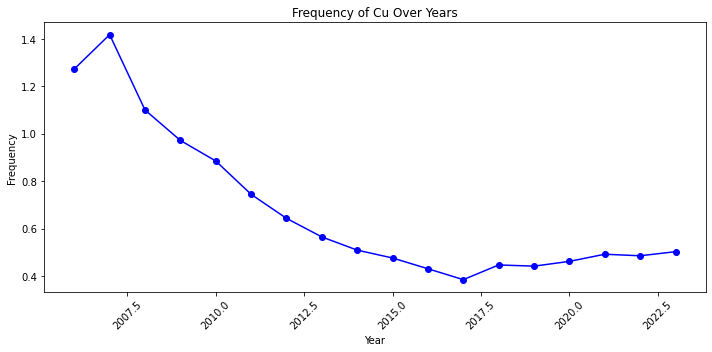

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the material to plot
material_to_plot = 'Cu'  # Replace 'ExampleMaterial' with the name of your material

# Assuming 'list_dfs' is your list of DataFrames and each DataFrame has a 'Year' column
# and is sorted chronologically as mentioned
years = [df['Year'].iloc[0] for df in list_dfs]  # Extract year assuming each df has same 'Year' in all rows
frequencies = [df[df['Material'] == material_to_plot]['Frequency'].sum() for df in list_dfs]  # Sum might be replaced by mean, depending on context

# Create a DataFrame for plotting
data_to_plot = pd.DataFrame({
    'Year': years,
    'Frequency': frequencies
})

# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size as desired
plt.plot(data_to_plot['Year'], data_to_plot['Frequency'], marker='o', linestyle='-', color='b')
plt.title(f'Frequency of {material_to_plot} Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
#plt.ylim(0.0,1.0)
#plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()
